In [2]:
import glob
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
file_pattern = 'C:/Users/Admin/codes/atp_matches/tennis_matches/*.csv'
file_paths = glob.glob(file_pattern)

dataframes = []
for file_path in file_paths:
    dataframe = pd.read_csv(file_path)
    dataframes.append(dataframe)
    
    
final_df = pd.concat(dataframes,ignore_index=True)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [4]:
df = final_df.copy()

In [5]:
ls

 Volume in drive C has no label.
 Volume Serial Number is E0D4-CD26

 Directory of C:\Users\Admin\codes\atp_matches\tennis_matches

04-03-2023  21:23    <DIR>          .
04-03-2023  21:23    <DIR>          ..
03-03-2023  07:44    <DIR>          .ipynb_checkpoints
13-07-2022  13:46           667,991 atp_matches_2010.csv
13-07-2022  13:46           665,378 atp_matches_2011.csv
13-07-2022  13:46           663,572 atp_matches_2012.csv
13-07-2022  13:46           648,670 atp_matches_2013.csv
13-07-2022  13:46           640,297 atp_matches_2014.csv
13-07-2022  13:46           646,002 atp_matches_2015.csv
13-07-2022  13:46           668,615 atp_matches_2016.csv
13-07-2022  13:46           660,212 atp_matches_2017.csv
13-07-2022  13:46           657,339 atp_matches_2018.csv
13-07-2022  13:46           632,722 atp_matches_2019.csv
13-07-2022  13:46           332,201 atp_matches_2020.csv
13-07-2022  13:46           617,925 atp_matches_2021.csv
13-07-2022  13:46           162,431 atp_matches_2022

In [6]:
print(df.shape)
print("==============")
print(df.info())

(34374, 71)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34374 entries, 0 to 34373
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tourney_id                    34274 non-null  object 
 1   tourney_name                  34274 non-null  object 
 2   surface                       34374 non-null  object 
 3   draw_size                     34274 non-null  float64
 4   tourney_level                 34274 non-null  object 
 5   tourney_date                  34374 non-null  object 
 6   match_num                     34274 non-null  float64
 7   winner_id                     34274 non-null  float64
 8   winner_seed                   14705 non-null  object 
 9   winner_entry                  4412 non-null   object 
 10  winner_name                   34274 non-null  object 
 11  winner_hand                   34265 non-null  object 
 12  winner_ht                     32442 non-null  fl

In [7]:
print(df["surface"].unique())
print("====================================")
print(df.isna().sum())

['Hard' 'Clay' 'Carpet' 'Grass' 3 1]
tourney_id                     100
tourney_name                   100
surface                          0
draw_size                      100
tourney_level                  100
                             ...  
player_two_rank              34274
player_one_rank_points       34274
player_two_rank_points       34274
player_one_win_percentage    34274
player_two_win_percentage    34274
Length: 71, dtype: int64


In [8]:
df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points',
       'player_one', 'player_two', 'player_one_ht', 'player_two_ht',
       'player_one_age', 'player_two_age', 'player_one_hand',
       'player_two_hand', 'player_one_ace', 'player_two_ace', 'player_one_df',
       'player_two_df', 'player_one_break_point_saved',
       'player_two_break_point_saved', 

In [9]:
cols = [ 'surface', 
       'tourney_date',  'winner_id', 
       'winner_name', 'winner_hand', 'winner_ht', 'winner_age',
       'loser_id',  'loser_name', 'loser_hand',
       'loser_ht',  'loser_age', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points']

In [10]:
df = df[cols]

In [11]:
df

surface tourney_date  winner_id      winner_name winner_hand  winner_ht  \
0        Hard     20100103   104053.0     Andy Roddick           R      188.0   
1        Hard     20100103   104958.0     Carsten Ball           L      198.0   
2        Hard     20100103   104755.0  Richard Gasquet           R      185.0   
3        Hard     20100103   105051.0    Matthew Ebden           R      188.0   
4        Hard     20100103   104607.0    Tomas Berdych           R      196.0   
...       ...          ...        ...              ...         ...        ...   
34369       3   2022-03-04        NaN              NaN         NaN        NaN   
34370       3   2022-03-04        NaN              NaN         NaN        NaN   
34371       3   2022-03-04        NaN              NaN         NaN        NaN   
34372       3   2022-03-04        NaN              NaN         NaN        NaN   
34373       1   2022-03-04        NaN              NaN         NaN        NaN   

       winner_age  loser_id       loser_name loser_hand  ...  l_1stIn  \
0       27.348392  103429.0     Peter Luczak          R  ...     34.0   
1       22.543463  104999.0    Mischa Zverev          L  ...     34.0   
2       23.548255  103813.0  Jarkko Nieminen          L  ...     58.0   
3       22.108145  103781.0    Jurgen Melzer          L  ...     29.0   
4       24.298426  105194.0     Nick Lindahl          R  ...     41.0   
...           ...       ...              ...        ...  ...      ...   
34369         NaN       NaN              NaN        NaN  ...      NaN   
34370         NaN       NaN              NaN        NaN  ...      NaN   
34371         NaN       NaN              NaN        NaN  ...      NaN   
34372         NaN       NaN              NaN        NaN  ...      NaN   
34373         NaN       NaN              NaN        NaN  ...      NaN   

       l_1stWon  l_2ndWon  l_SvGms  l_bpSaved  l_bpFaced  winner_rank  \
0          29.0      11.0     10.0        3.0        5.0          7.0   
1          22.0      14.0      9.0        7.0       10.0        134.0   
2          38.0      14.0     14.0        7.0       11.0         52.0   
3          16.0      15.0      9.0        2.0        5.0        285.0   
4          26.0      14.0      9.0        6.0        9.0         20.0   
...         ...       ...      ...        ...        ...          ...   
34369       NaN       NaN      NaN        NaN        NaN          NaN   
34370       NaN       NaN      NaN        NaN        NaN          NaN   
34371       NaN       NaN      NaN        NaN        NaN          NaN   
34372       NaN       NaN      NaN        NaN        NaN          NaN   
34373       NaN       NaN      NaN        NaN        NaN          NaN   

       winner_rank_points  loser_rank  loser_rank_points  
0                  4410.0        77.0              598.0  
1                   400.0        78.0              590.0  
2                   850.0        88.0              568.0  
3                   151.0        28.0             1260.0  
4                  1655.0       251.0              179.0  
...                   ...         ...                ...  
34369                 NaN         NaN                NaN  
34370                 NaN         NaN                NaN  
34371                 NaN         NaN                NaN  
34372                 NaN         NaN                NaN  
34373                 NaN         NaN                NaN  

[34374 rows x 34 columns]

In [12]:
df.dropna()

surface tourney_date  winner_id       winner_name winner_hand  \
0        Hard     20100103   104053.0      Andy Roddick           R   
1        Hard     20100103   104958.0      Carsten Ball           L   
2        Hard     20100103   104755.0   Richard Gasquet           R   
3        Hard     20100103   105051.0     Matthew Ebden           R   
4        Hard     20100103   104607.0     Tomas Berdych           R   
...       ...          ...        ...               ...         ...   
34241    Hard     20220304   134770.0       Casper Ruud           R   
34242    Hard     20220304   122330.0  Alexander Bublik           R   
34243    Hard     20220304   122330.0  Alexander Bublik           R   
34245    Hard     20220304   111200.0        Elias Ymer           R   
34252    Clay     20220304   111797.0     Nicolas Jarry           R   

       winner_ht  winner_age  loser_id         loser_name loser_hand  ...  \
0          188.0   27.348392  103429.0       Peter Luczak          R  ...   
1          198.0   22.543463  104999.0      Mischa Zverev          L  ...   
2          185.0   23.548255  103813.0    Jarkko Nieminen          L  ...   
3          188.0   22.108145  103781.0      Jurgen Melzer          L  ...   
4          196.0   24.298426  105194.0       Nick Lindahl          R  ...   
...          ...         ...       ...                ...        ...  ...   
34241      183.0   23.186858  105062.0  Mikhail Kukushkin          R  ...   
34242      196.0   24.700890  126340.0   Viktor Durasovic          R  ...   
34243      196.0   24.700890  134770.0        Casper Ruud          R  ...   
34245      183.0   25.886379  106121.0        Taro Daniel          R  ...   
34252      198.0   26.384668  105641.0          Blaz Rola          L  ...   

       l_1stIn  l_1stWon  l_2ndWon  l_SvGms  l_bpSaved  l_bpFaced  \
0         34.0      29.0      11.0     10.0        3.0        5.0   
1         34.0      22.0      14.0      9.0        7.0       10.0   
2         58.0      38.0      14.0     14.0        7.0       11.0   
3         29.0      16.0      15.0      9.0        2.0        5.0   
4         41.0      26.0      14.0      9.0        6.0        9.0   
...        ...       ...       ...      ...        ...        ...   
34241     34.0      20.0       9.0      8.0        2.0        5.0   
34242     23.0      18.0       4.0      8.0        1.0        4.0   
34243     51.0      39.0      24.0     16.0        2.0        4.0   
34245     37.0      26.0      14.0     11.0        5.0        8.0   
34252     57.0      31.0      20.0     15.0        4.0        8.0   

       winner_rank  winner_rank_points  loser_rank  loser_rank_points  
0              7.0              4410.0        77.0              598.0  
1            134.0               400.0        78.0              590.0  
2             52.0               850.0        88.0              568.0  
3            285.0               151.0        28.0             1260.0  
4             20.0              1655.0       251.0              179.0  
...            ...                 ...         ...                ...  
34241          8.0              3915.0       160.0              386.0  
34242         32.0              1416.0       321.0              143.0  
34243         32.0              1416.0         8.0             3915.0  
34245        133.0               496.0       101.0              660.0  
34252        146.0               457.0       179.0              337.0  

[28437 rows x 34 columns]

In [13]:
#Count of duplicated rows
df[df.duplicated()]

surface tourney_date  winner_id winner_name winner_hand  winner_ht  \
34275       3   2022-02-14        NaN         NaN         NaN        NaN   
34276       3   2022-02-14        NaN         NaN         NaN        NaN   
34277       3   2022-02-14        NaN         NaN         NaN        NaN   
34279       1   2022-02-14        NaN         NaN         NaN        NaN   
34280       1   2022-02-14        NaN         NaN         NaN        NaN   
...       ...          ...        ...         ...         ...        ...   
34369       3   2022-03-04        NaN         NaN         NaN        NaN   
34370       3   2022-03-04        NaN         NaN         NaN        NaN   
34371       3   2022-03-04        NaN         NaN         NaN        NaN   
34372       3   2022-03-04        NaN         NaN         NaN        NaN   
34373       1   2022-03-04        NaN         NaN         NaN        NaN   

       winner_age  loser_id loser_name loser_hand  ...  l_1stIn  l_1stWon  \
34275         NaN       NaN        NaN        NaN  ...      NaN       NaN   
34276         NaN       NaN        NaN        NaN  ...      NaN       NaN   
34277         NaN       NaN        NaN        NaN  ...      NaN       NaN   
34279         NaN       NaN        NaN        NaN  ...      NaN       NaN   
34280         NaN       NaN        NaN        NaN  ...      NaN       NaN   
...           ...       ...        ...        ...  ...      ...       ...   
34369         NaN       NaN        NaN        NaN  ...      NaN       NaN   
34370         NaN       NaN        NaN        NaN  ...      NaN       NaN   
34371         NaN       NaN        NaN        NaN  ...      NaN       NaN   
34372         NaN       NaN        NaN        NaN  ...      NaN       NaN   
34373         NaN       NaN        NaN        NaN  ...      NaN       NaN   

       l_2ndWon  l_SvGms  l_bpSaved  l_bpFaced  winner_rank  \
34275       NaN      NaN        NaN        NaN          NaN   
34276       NaN      NaN        NaN        NaN          NaN   
34277       NaN      NaN        NaN        NaN          NaN   
34279       NaN      NaN        NaN        NaN          NaN   
34280       NaN      NaN        NaN        NaN          NaN   
...         ...      ...        ...        ...          ...   
34369       NaN      NaN        NaN        NaN          NaN   
34370       NaN      NaN        NaN        NaN          NaN   
34371       NaN      NaN        NaN        NaN          NaN   
34372       NaN      NaN        NaN        NaN          NaN   
34373       NaN      NaN        NaN        NaN          NaN   

       winner_rank_points  loser_rank  loser_rank_points  
34275                 NaN         NaN                NaN  
34276                 NaN         NaN                NaN  
34277                 NaN         NaN                NaN  
34279                 NaN         NaN                NaN  
34280                 NaN         NaN                NaN  
...                   ...         ...                ...  
34369                 NaN         NaN                NaN  
34370                 NaN         NaN                NaN  
34371                 NaN         NaN                NaN  
34372                 NaN         NaN                NaN  
34373                 NaN         NaN                NaN  

[94 rows x 34 columns]

In [14]:
df[~df.duplicated()] # ~ (Tilda)is convert the true to false and vice varsa

surface tourney_date  winner_id      winner_name winner_hand  winner_ht  \
0        Hard     20100103   104053.0     Andy Roddick           R      188.0   
1        Hard     20100103   104958.0     Carsten Ball           L      198.0   
2        Hard     20100103   104755.0  Richard Gasquet           R      185.0   
3        Hard     20100103   105051.0    Matthew Ebden           R      188.0   
4        Hard     20100103   104607.0    Tomas Berdych           R      196.0   
...       ...          ...        ...              ...         ...        ...   
34278       1   2022-02-14        NaN              NaN         NaN        NaN   
34306       3   2022-02-21        NaN              NaN         NaN        NaN   
34352       1   2022-02-21        NaN              NaN         NaN        NaN   
34359       3   2022-03-04        NaN              NaN         NaN        NaN   
34362       1   2022-03-04        NaN              NaN         NaN        NaN   

       winner_age  loser_id       loser_name loser_hand  ...  l_1stIn  \
0       27.348392  103429.0     Peter Luczak          R  ...     34.0   
1       22.543463  104999.0    Mischa Zverev          L  ...     34.0   
2       23.548255  103813.0  Jarkko Nieminen          L  ...     58.0   
3       22.108145  103781.0    Jurgen Melzer          L  ...     29.0   
4       24.298426  105194.0     Nick Lindahl          R  ...     41.0   
...           ...       ...              ...        ...  ...      ...   
34278         NaN       NaN              NaN        NaN  ...      NaN   
34306         NaN       NaN              NaN        NaN  ...      NaN   
34352         NaN       NaN              NaN        NaN  ...      NaN   
34359         NaN       NaN              NaN        NaN  ...      NaN   
34362         NaN       NaN              NaN        NaN  ...      NaN   

       l_1stWon  l_2ndWon  l_SvGms  l_bpSaved  l_bpFaced  winner_rank  \
0          29.0      11.0     10.0        3.0        5.0          7.0   
1          22.0      14.0      9.0        7.0       10.0        134.0   
2          38.0      14.0     14.0        7.0       11.0         52.0   
3          16.0      15.0      9.0        2.0        5.0        285.0   
4          26.0      14.0      9.0        6.0        9.0         20.0   
...         ...       ...      ...        ...        ...          ...   
34278       NaN       NaN      NaN        NaN        NaN          NaN   
34306       NaN       NaN      NaN        NaN        NaN          NaN   
34352       NaN       NaN      NaN        NaN        NaN          NaN   
34359       NaN       NaN      NaN        NaN        NaN          NaN   
34362       NaN       NaN      NaN        NaN        NaN          NaN   

       winner_rank_points  loser_rank  loser_rank_points  
0                  4410.0        77.0              598.0  
1                   400.0        78.0              590.0  
2                   850.0        88.0              568.0  
3                   151.0        28.0             1260.0  
4                  1655.0       251.0              179.0  
...                   ...         ...                ...  
34278                 NaN         NaN                NaN  
34306                 NaN         NaN                NaN  
34352                 NaN         NaN                NaN  
34359                 NaN         NaN                NaN  
34362                 NaN         NaN                NaN  

[34280 rows x 34 columns]

In [15]:
def datetimeformat(x):
    x = str(x)
    y = x[:4]
    m = x[4:6]
    d = x[-2:]
    
    x = y+"-"+m+"-"+d
    return x

In [16]:
datetimeformat(20220304)

'2022-03-04'

In [17]:
df["tourney_date"] = df["tourney_date"].apply(datetimeformat)

In [18]:
df

surface tourney_date  winner_id      winner_name winner_hand  winner_ht  \
0        Hard   2010-01-03   104053.0     Andy Roddick           R      188.0   
1        Hard   2010-01-03   104958.0     Carsten Ball           L      198.0   
2        Hard   2010-01-03   104755.0  Richard Gasquet           R      185.0   
3        Hard   2010-01-03   105051.0    Matthew Ebden           R      188.0   
4        Hard   2010-01-03   104607.0    Tomas Berdych           R      196.0   
...       ...          ...        ...              ...         ...        ...   
34369       3   2022--0-04        NaN              NaN         NaN        NaN   
34370       3   2022--0-04        NaN              NaN         NaN        NaN   
34371       3   2022--0-04        NaN              NaN         NaN        NaN   
34372       3   2022--0-04        NaN              NaN         NaN        NaN   
34373       1   2022--0-04        NaN              NaN         NaN        NaN   

       winner_age  loser_id       loser_name loser_hand  ...  l_1stIn  \
0       27.348392  103429.0     Peter Luczak          R  ...     34.0   
1       22.543463  104999.0    Mischa Zverev          L  ...     34.0   
2       23.548255  103813.0  Jarkko Nieminen          L  ...     58.0   
3       22.108145  103781.0    Jurgen Melzer          L  ...     29.0   
4       24.298426  105194.0     Nick Lindahl          R  ...     41.0   
...           ...       ...              ...        ...  ...      ...   
34369         NaN       NaN              NaN        NaN  ...      NaN   
34370         NaN       NaN              NaN        NaN  ...      NaN   
34371         NaN       NaN              NaN        NaN  ...      NaN   
34372         NaN       NaN              NaN        NaN  ...      NaN   
34373         NaN       NaN              NaN        NaN  ...      NaN   

       l_1stWon  l_2ndWon  l_SvGms  l_bpSaved  l_bpFaced  winner_rank  \
0          29.0      11.0     10.0        3.0        5.0          7.0   
1          22.0      14.0      9.0        7.0       10.0        134.0   
2          38.0      14.0     14.0        7.0       11.0         52.0   
3          16.0      15.0      9.0        2.0        5.0        285.0   
4          26.0      14.0      9.0        6.0        9.0         20.0   
...         ...       ...      ...        ...        ...          ...   
34369       NaN       NaN      NaN        NaN        NaN          NaN   
34370       NaN       NaN      NaN        NaN        NaN          NaN   
34371       NaN       NaN      NaN        NaN        NaN          NaN   
34372       NaN       NaN      NaN        NaN        NaN          NaN   
34373       NaN       NaN      NaN        NaN        NaN          NaN   

       winner_rank_points  loser_rank  loser_rank_points  
0                  4410.0        77.0              598.0  
1                   400.0        78.0              590.0  
2                   850.0        88.0              568.0  
3                   151.0        28.0             1260.0  
4                  1655.0       251.0              179.0  
...                   ...         ...                ...  
34369                 NaN         NaN                NaN  
34370                 NaN         NaN                NaN  
34371                 NaN         NaN                NaN  
34372                 NaN         NaN                NaN  
34373                 NaN         NaN                NaN  

[34374 rows x 34 columns]

In [19]:
df = df.dropna()

In [20]:
df["tourney_date"] = pd.to_datetime(df["tourney_date"])

In [21]:
df.dtypes

surface                       object
tourney_date          datetime64[ns]
winner_id                    float64
winner_name                   object
winner_hand                   object
winner_ht                    float64
winner_age                   float64
loser_id                     float64
loser_name                    object
loser_hand                    object
loser_ht                     float64
loser_age                    float64
w_ace                        float64
w_df                         float64
w_svpt                       float64
w_1stIn                      float64
w_1stWon                     float64
w_2ndWon                     float64
w_SvGms                      float64
w_bpSaved                    float64
w_bpFaced                    float64
l_ace                        float64
l_df                         float64
l_svpt                       float64
l_1stIn                      float64
l_1stWon                     float64
l_2ndWon                     float64
l

In [22]:
df.columns

Index(['surface', 'tourney_date', 'winner_id', 'winner_name', 'winner_hand',
       'winner_ht', 'winner_age', 'loser_id', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_age', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn',
       'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace',
       'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms',
       'l_bpSaved', 'l_bpFaced', 'winner_rank', 'winner_rank_points',
       'loser_rank', 'loser_rank_points'],
      dtype='object')

In [23]:
df.columns

Index(['surface', 'tourney_date', 'winner_id', 'winner_name', 'winner_hand',
       'winner_ht', 'winner_age', 'loser_id', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_age', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn',
       'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace',
       'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms',
       'l_bpSaved', 'l_bpFaced', 'winner_rank', 'winner_rank_points',
       'loser_rank', 'loser_rank_points'],
      dtype='object')

In [24]:
df['player_one'] = ''
df['player_two'] = ''
df['player_one_ht'] = float(0)
df['player_two_ht'] = float(0)
df['player_one_age'] = float(0)
df['player_two_age'] = float(0)
df['player_one_hand'] = ''
df['player_two_hand'] = ''
df['player_one_ace'] = float(0)
df['player_two_ace'] = float(0)
df['player_one_df'] = float(0)
df['player_two_df'] = float(0)
df['player_one_first_serve_made'] = float(0)
df['player_two_first_serve_made']= float(0)
df['player_one_first_serve_won'] = float(0)
df['player_two_first_serve_won'] = float(0)
df['player_one_break_point_saved'] = float(0)
df['player_two_break_point_saved'] = float(0)
df['player_one_break_point_faced'] = float(0)
df['player_two_break_point_faced'] = float(0)
df['player_one_rank'] = float(0)
df['player_two_rank'] = float(0)
df['player_one_rank_points'] = float(0)
df['player_two_rank_points'] = float(0)
df['FTR'] = ''

In [25]:
new_dataset = df.copy()

In [26]:
count = 0
for index, row in new_dataset.iterrows():
    name = [row["winner_name"],row["loser_name"]]
    print(name)
    name.sort()
    print(name)
    if row["winner_name"] == name[0]:
        new_dataset.at[index,'player_one'] = name[0]
        
        new_dataset.at[index,'player_one_ht'] = row["winner_ht"]
        new_dataset.at[index,'player_one_age'] = row["winner_age"]
        new_dataset.at[index,'player_one_hand'] = row["winner_hand"]
        new_dataset.at[index,'player_one_ace'] = row["w_ace"]
        new_dataset.at[index,'player_one_df'] = row["w_df"]
        new_dataset.at[index,'player_one_rank'] = row["winner_rank"]
        new_dataset.at[index,'player_one_rank_points'] = row["winner_rank_points"]
        new_dataset.at[index,'player_one_first_serve_made'] =row["w_1stIn"]
        new_dataset.at[index,'player_one_first_serve_won'] = row["w_1stWon"]
        new_dataset.at[index,'player_one_break_point_saved'] = row["w_bpSaved"]
        new_dataset.at[index,'player_one_break_point_faced'] = row["w_bpFaced"]
       
        new_dataset.at[index,'FTR'] = 'W'
        new_dataset.at[index,'player_two'] = name[1]
        
        new_dataset.at[index,'player_two_ht'] = row["loser_ht"]
        new_dataset.at[index,'player_two_age'] = row["loser_age"]
        new_dataset.at[index,'player_two_hand'] = row["loser_hand"]
        new_dataset.at[index,'player_two_ace'] = row["l_ace"]
        new_dataset.at[index,'player_two_df'] = row["l_df"]
        new_dataset.at[index,'player_two_rank'] = row["loser_rank"]
        new_dataset.at[index,'player_two_rank_points'] = row["loser_rank_points"]
        new_dataset.at[index,'player_two_first_serve_made'] =row["l_1stIn"]
        new_dataset.at[index,'player_two_first_serve_won'] = row["l_1stWon"]
        new_dataset.at[index,'player_two_break_point_saved'] = row["l_bpSaved"]
        new_dataset.at[index,'player_two_break_point_faced'] = row["l_bpFaced"]
       

        
        print("Iteration completed for  " + name[0] + " " + name[1])
        count += 1
    elif row["loser_name"] == name[0]:
        new_dataset.at[index,'player_one'] = name[0]

        new_dataset.at[index,'player_two_ht'] = row["winner_ht"]
        new_dataset.at[index,'player_two_age'] = row["winner_age"]
        new_dataset.at[index,'player_two_hand'] = row["winner_hand"]
        new_dataset.at[index,'player_two_ace'] = row["w_ace"]
        new_dataset.at[index,'player_two_df'] = row["w_df"]
        new_dataset.at[index,'player_two_rank'] = row["winner_rank"]
        new_dataset.at[index,'player_two_rank_points'] = row["winner_rank_points"]
        new_dataset.at[index,'player_two_first_serve_made'] =row["w_1stIn"]
        new_dataset.at[index,'player_two_first_serve_won'] = row["w_1stWon"]
        new_dataset.at[index,'player_two_break_point_saved'] = row["w_bpSaved"]
        new_dataset.at[index,'player_two_break_point_faced'] = row["w_bpFaced"]
    
       
        
        new_dataset.at[index,'FTR'] = 'L'
        new_dataset.at[index,'player_two'] = name[1]
       
        new_dataset.at[index,'player_one_ht'] = row["loser_ht"]
        new_dataset.at[index,'player_one_age'] = row["loser_age"]
        new_dataset.at[index,'player_one_hand'] = row["loser_hand"]
        new_dataset.at[index,'player_one_ace'] = row["l_ace"]
        new_dataset.at[index,'player_one_df'] = row["l_df"]
        new_dataset.at[index,'player_one_rank'] = row["loser_rank"]
        new_dataset.at[index,'player_one_rank_points'] = row["loser_rank_points"]
        new_dataset.at[index,'player_one_first_serve_made'] =row["l_1stIn"]
        new_dataset.at[index,'player_one_first_serve_won'] = row["l_1stWon"]
        new_dataset.at[index,'player_one_break_point_saved'] = row["l_bpSaved"]
        new_dataset.at[index,'player_one_break_point_faced'] = row["l_bpFaced"]
   
       
        
       
        print("Iteration completed for  " + name[0] + " " + name[1])
        count += 1
print("count - ", count)

['Andy Roddick', 'Peter Luczak']
['Andy Roddick', 'Peter Luczak']
Iteration completed for  Andy Roddick Peter Luczak
['Carsten Ball', 'Mischa Zverev']
['Carsten Ball', 'Mischa Zverev']
Iteration completed for  Carsten Ball Mischa Zverev
['Richard Gasquet', 'Jarkko Nieminen']
['Jarkko Nieminen', 'Richard Gasquet']
Iteration completed for  Jarkko Nieminen Richard Gasquet
['Matthew Ebden', 'Jurgen Melzer']
['Jurgen Melzer', 'Matthew Ebden']
Iteration completed for  Jurgen Melzer Matthew Ebden
['Tomas Berdych', 'Nick Lindahl']
['Nick Lindahl', 'Tomas Berdych']
Iteration completed for  Nick Lindahl Tomas Berdych
['Marcos Baghdatis', 'Mardy Fish']
['Marcos Baghdatis', 'Mardy Fish']
Iteration completed for  Marcos Baghdatis Mardy Fish
['Harel Levy', 'Michael Llodra']
['Harel Levy', 'Michael Llodra']
Iteration completed for  Harel Levy Michael Llodra
['Thomaz Bellucci', 'Juan Ignacio Chela']
['Juan Ignacio Chela', 'Thomaz Bellucci']
Iteration completed for  Juan Ignacio Chela Thomaz Bellucci
[

Iteration completed for  Albert Montanes John Isner
['Arnaud Clement', 'Philipp Kohlschreiber']
['Arnaud Clement', 'Philipp Kohlschreiber']
Iteration completed for  Arnaud Clement Philipp Kohlschreiber
['John Isner', 'Arnaud Clement']
['Arnaud Clement', 'John Isner']
Iteration completed for  Arnaud Clement John Isner
['Potito Starace', 'Frederico Gil']
['Frederico Gil', 'Potito Starace']
Iteration completed for  Frederico Gil Potito Starace
['Richard Gasquet', 'Feliciano Lopez']
['Feliciano Lopez', 'Richard Gasquet']
Iteration completed for  Feliciano Lopez Richard Gasquet
['Benjamin Becker', 'Juan Ignacio Chela']
['Benjamin Becker', 'Juan Ignacio Chela']
Iteration completed for  Benjamin Becker Juan Ignacio Chela
['Julien Benneteau', 'Dudi Sela']
['Dudi Sela', 'Julien Benneteau']
Iteration completed for  Dudi Sela Julien Benneteau
['Pablo Cuevas', 'Michael Llodra']
['Michael Llodra', 'Pablo Cuevas']
Iteration completed for  Michael Llodra Pablo Cuevas
['Leonardo Mayer', 'Igor Andreev'

['Lukasz Kubot', 'Santiago Giraldo']
['Lukasz Kubot', 'Santiago Giraldo']
Iteration completed for  Lukasz Kubot Santiago Giraldo
['Jo-Wilfried Tsonga', 'Taylor Dent']
['Jo-Wilfried Tsonga', 'Taylor Dent']
Iteration completed for  Jo-Wilfried Tsonga Taylor Dent
['Tommy Haas', 'Janko Tipsarevic']
['Janko Tipsarevic', 'Tommy Haas']
Iteration completed for  Janko Tipsarevic Tommy Haas
['Nicolas Almagro', 'Benjamin Becker']
['Benjamin Becker', 'Nicolas Almagro']
Iteration completed for  Benjamin Becker Nicolas Almagro
['Alejandro Falla', 'Marcel Granollers']
['Alejandro Falla', 'Marcel Granollers']
Iteration completed for  Alejandro Falla Marcel Granollers
['Andy Roddick', 'Thomaz Bellucci']
['Andy Roddick', 'Thomaz Bellucci']
Iteration completed for  Andy Roddick Thomaz Bellucci
['Feliciano Lopez', 'Rainer Schuettler']
['Feliciano Lopez', 'Rainer Schuettler']
Iteration completed for  Feliciano Lopez Rainer Schuettler
['Evgeny Korolev', 'Tomas Berdych']
['Evgeny Korolev', 'Tomas Berdych']
I

Iteration completed for  Michael Berrer Viktor Troicki
['Philipp Petzschner', 'Lukas Lacko']
['Lukas Lacko', 'Philipp Petzschner']
Iteration completed for  Lukas Lacko Philipp Petzschner
['Marin Cilic', 'Jurgen Melzer']
['Jurgen Melzer', 'Marin Cilic']
Iteration completed for  Jurgen Melzer Marin Cilic
['Michael Berrer', 'Philipp Petzschner']
['Michael Berrer', 'Philipp Petzschner']
Iteration completed for  Michael Berrer Philipp Petzschner
['Marin Cilic', 'Michael Berrer']
['Marin Cilic', 'Michael Berrer']
Iteration completed for  Marin Cilic Michael Berrer
['Juan Carlos Ferrero', 'Eduardo Schwank']
['Eduardo Schwank', 'Juan Carlos Ferrero']
Iteration completed for  Eduardo Schwank Juan Carlos Ferrero
['Nicolas Massu', 'Rogerio Dutra Silva']
['Nicolas Massu', 'Rogerio Dutra Silva']
Iteration completed for  Nicolas Massu Rogerio Dutra Silva
['Juan Ignacio Chela', 'Peter Luczak']
['Juan Ignacio Chela', 'Peter Luczak']
Iteration completed for  Juan Ignacio Chela Peter Luczak
['Carlos Ber

['Fernando Verdasco', 'Andy Roddick']
['Andy Roddick', 'Fernando Verdasco']
Iteration completed for  Andy Roddick Fernando Verdasco
['David Ferrer', 'Simon Greul']
['David Ferrer', 'Simon Greul']
Iteration completed for  David Ferrer Simon Greul
['Frederico Gil', 'Peter Luczak']
['Frederico Gil', 'Peter Luczak']
Iteration completed for  Frederico Gil Peter Luczak
['Marcel Granollers', 'Diego Junqueira']
['Diego Junqueira', 'Marcel Granollers']
Iteration completed for  Diego Junqueira Marcel Granollers
['Igor Andreev', 'Fabio Fognini']
['Fabio Fognini', 'Igor Andreev']
Iteration completed for  Fabio Fognini Igor Andreev
['Daniel Gimeno Traver', 'Nicolas Almagro']
['Daniel Gimeno Traver', 'Nicolas Almagro']
Iteration completed for  Daniel Gimeno Traver Nicolas Almagro
['David Nalbandian', 'Potito Starace']
['David Nalbandian', 'Potito Starace']
Iteration completed for  David Nalbandian Potito Starace
['Pablo Andujar', 'Oscar Hernandez']
['Oscar Hernandez', 'Pablo Andujar']
Iteration comp

Iteration completed for  David Ferrer Fernando Gonzalez
['David Ferrer', 'Juan Carlos Ferrero']
['David Ferrer', 'Juan Carlos Ferrero']
Iteration completed for  David Ferrer Juan Carlos Ferrero
['Teymuraz Gabashvili', 'Tommy Haas']
['Teymuraz Gabashvili', 'Tommy Haas']
Iteration completed for  Teymuraz Gabashvili Tommy Haas
['Ernests Gulbis', 'Ryan Harrison']
['Ernests Gulbis', 'Ryan Harrison']
Iteration completed for  Ernests Gulbis Ryan Harrison
['Leonardo Mayer', 'Kevin Anderson']
['Kevin Anderson', 'Leonardo Mayer']
Iteration completed for  Kevin Anderson Leonardo Mayer
['Florian Mayer', 'Nick Lindahl']
['Florian Mayer', 'Nick Lindahl']
Iteration completed for  Florian Mayer Nick Lindahl
['Benjamin Becker', 'Kei Nishikori']
['Benjamin Becker', 'Kei Nishikori']
Iteration completed for  Benjamin Becker Kei Nishikori
['Wayne Odesnik', 'Rajeev Ram']
['Rajeev Ram', 'Wayne Odesnik']
Iteration completed for  Rajeev Ram Wayne Odesnik
['Jarkko Nieminen', 'Paolo Lorenzi']
['Jarkko Nieminen',

Iteration completed for  David Nalbandian Jurgen Melzer
['Thiemo De Bakker', 'Janko Tipsarevic']
['Janko Tipsarevic', 'Thiemo De Bakker']
Iteration completed for  Janko Tipsarevic Thiemo De Bakker
['Andy Roddick', 'Yen Hsun Lu']
['Andy Roddick', 'Yen Hsun Lu']
Iteration completed for  Andy Roddick Yen Hsun Lu
['Andy Murray', 'Andreas Seppi']
['Andreas Seppi', 'Andy Murray']
Iteration completed for  Andreas Seppi Andy Murray
['Michael Russell', 'Igor Andreev']
['Igor Andreev', 'Michael Russell']
Iteration completed for  Igor Andreev Michael Russell
['Nicolas Almagro', 'Ivo Karlovic']
['Ivo Karlovic', 'Nicolas Almagro']
Iteration completed for  Ivo Karlovic Nicolas Almagro
['James Blake', 'David Ferrer']
['David Ferrer', 'James Blake']
Iteration completed for  David Ferrer James Blake
['Jo-Wilfried Tsonga', 'Marinko Matosevic']
['Jo-Wilfried Tsonga', 'Marinko Matosevic']
Iteration completed for  Jo-Wilfried Tsonga Marinko Matosevic
['Albert Montanes', 'Ricardo Mello']
['Albert Montanes',

Iteration completed for  David Ferrer Ivo Karlovic
['Rafael Nadal', 'David Nalbandian']
['David Nalbandian', 'Rafael Nadal']
Iteration completed for  David Nalbandian Rafael Nadal
['Andy Roddick', 'Sergiy Stakhovsky']
['Andy Roddick', 'Sergiy Stakhovsky']
Iteration completed for  Andy Roddick Sergiy Stakhovsky
['Benjamin Becker', 'Tommy Robredo']
['Benjamin Becker', 'Tommy Robredo']
Iteration completed for  Benjamin Becker Tommy Robredo
['Nicolas Almagro', 'Jeremy Chardy']
['Jeremy Chardy', 'Nicolas Almagro']
Iteration completed for  Jeremy Chardy Nicolas Almagro
['Thomaz Bellucci', 'Olivier Rochus']
['Olivier Rochus', 'Thomaz Bellucci']
Iteration completed for  Olivier Rochus Thomaz Bellucci
['Tomas Berdych', 'Roger Federer']
['Roger Federer', 'Tomas Berdych']
Iteration completed for  Roger Federer Tomas Berdych
['Fernando Verdasco', 'Marin Cilic']
['Fernando Verdasco', 'Marin Cilic']
Iteration completed for  Fernando Verdasco Marin Cilic
['Mikhail Youzhny', 'Mardy Fish']
['Mardy Fish

Iteration completed for  Fernando Verdasco Novak Djokovic
['Rafael Nadal', 'David Ferrer']
['David Ferrer', 'Rafael Nadal']
Iteration completed for  David Ferrer Rafael Nadal
['Rafael Nadal', 'Fernando Verdasco']
['Fernando Verdasco', 'Rafael Nadal']
Iteration completed for  Fernando Verdasco Rafael Nadal
['Guillermo Garcia Lopez', 'Christophe Rochus']
['Christophe Rochus', 'Guillermo Garcia Lopez']
Iteration completed for  Christophe Rochus Guillermo Garcia Lopez
['Victor Hanescu', 'Andreas Beck']
['Andreas Beck', 'Victor Hanescu']
Iteration completed for  Andreas Beck Victor Hanescu
['Thomaz Bellucci', 'Jarkko Nieminen']
['Jarkko Nieminen', 'Thomaz Bellucci']
Iteration completed for  Jarkko Nieminen Thomaz Bellucci
['Simone Bolelli', 'Tommy Robredo']
['Simone Bolelli', 'Tommy Robredo']
Iteration completed for  Simone Bolelli Tommy Robredo
['Alberto Martin', 'Mikhail Kukushkin']
['Alberto Martin', 'Mikhail Kukushkin']
Iteration completed for  Alberto Martin Mikhail Kukushkin
['Marcel 

Iteration completed for  Daniel Koellerer Philipp Petzschner
['Tomas Berdych', 'Pere Riba']
['Pere Riba', 'Tomas Berdych']
Iteration completed for  Pere Riba Tomas Berdych
['Jan Hajek', 'Benjamin Becker']
['Benjamin Becker', 'Jan Hajek']
Iteration completed for  Benjamin Becker Jan Hajek
['Mikhail Youzhny', 'Andreas Beck']
['Andreas Beck', 'Mikhail Youzhny']
Iteration completed for  Andreas Beck Mikhail Youzhny
['Marin Cilic', 'Nicolas Almagro']
['Marin Cilic', 'Nicolas Almagro']
Iteration completed for  Marin Cilic Nicolas Almagro
['Marcos Baghdatis', 'Philipp Kohlschreiber']
['Marcos Baghdatis', 'Philipp Kohlschreiber']
Iteration completed for  Marcos Baghdatis Philipp Kohlschreiber
['Philipp Petzschner', 'Tomas Berdych']
['Philipp Petzschner', 'Tomas Berdych']
Iteration completed for  Philipp Petzschner Tomas Berdych
['Mikhail Youzhny', 'Jan Hajek']
['Jan Hajek', 'Mikhail Youzhny']
Iteration completed for  Jan Hajek Mikhail Youzhny
['Marin Cilic', 'Marcos Baghdatis']
['Marcos Baghda

Iteration completed for  Carsten Ball Tomas Berdych
['Juan Monaco', 'Viktor Troicki']
['Juan Monaco', 'Viktor Troicki']
Iteration completed for  Juan Monaco Viktor Troicki
['Nicolas Almagro', 'Robby Ginepri']
['Nicolas Almagro', 'Robby Ginepri']
Iteration completed for  Nicolas Almagro Robby Ginepri
['Olivier Rochus', 'Adrian Mannarino']
['Adrian Mannarino', 'Olivier Rochus']
Iteration completed for  Adrian Mannarino Olivier Rochus
['Richard Gasquet', 'Lukas Lacko']
['Lukas Lacko', 'Richard Gasquet']
Iteration completed for  Lukas Lacko Richard Gasquet
['Alexandr Dolgopolov', 'Albert Montanes']
['Albert Montanes', 'Alexandr Dolgopolov']
Iteration completed for  Albert Montanes Alexandr Dolgopolov
['Marco Chiudinelli', 'Fabio Fognini']
['Fabio Fognini', 'Marco Chiudinelli']
Iteration completed for  Fabio Fognini Marco Chiudinelli
['Potito Starace', 'Steve Darcis']
['Potito Starace', 'Steve Darcis']
Iteration completed for  Potito Starace Steve Darcis
['Lukasz Kubot', 'Gianni Mina']
['Gi

Iteration completed for  Mikhail Youzhny Viktor Troicki
['Jo-Wilfried Tsonga', 'Thiemo De Bakker']
['Jo-Wilfried Tsonga', 'Thiemo De Bakker']
Iteration completed for  Jo-Wilfried Tsonga Thiemo De Bakker
['Teymuraz Gabashvili', 'Andy Roddick']
['Andy Roddick', 'Teymuraz Gabashvili']
Iteration completed for  Andy Roddick Teymuraz Gabashvili
['Jurgen Melzer', 'David Ferrer']
['David Ferrer', 'Jurgen Melzer']
Iteration completed for  David Ferrer Jurgen Melzer
['Robby Ginepri', 'Juan Carlos Ferrero']
['Juan Carlos Ferrero', 'Robby Ginepri']
Iteration completed for  Juan Carlos Ferrero Robby Ginepri
['Novak Djokovic', 'Victor Hanescu']
['Novak Djokovic', 'Victor Hanescu']
Iteration completed for  Novak Djokovic Victor Hanescu
['Fernando Verdasco', 'Philipp Kohlschreiber']
['Fernando Verdasco', 'Philipp Kohlschreiber']
Iteration completed for  Fernando Verdasco Philipp Kohlschreiber
['Nicolas Almagro', 'Alexandr Dolgopolov']
['Alexandr Dolgopolov', 'Nicolas Almagro']
Iteration completed for 

Iteration completed for  Dudi Sela Julien Benneteau
['Guillermo Garcia Lopez', 'Fabio Fognini']
['Fabio Fognini', 'Guillermo Garcia Lopez']
Iteration completed for  Fabio Fognini Guillermo Garcia Lopez
['Michael Llodra', 'Stephane Robert']
['Michael Llodra', 'Stephane Robert']
Iteration completed for  Michael Llodra Stephane Robert
['Gilles Simon', 'Andrey Kuznetsov']
['Andrey Kuznetsov', 'Gilles Simon']
Iteration completed for  Andrey Kuznetsov Gilles Simon
['Alexandr Dolgopolov', 'Yen Hsun Lu']
['Alexandr Dolgopolov', 'Yen Hsun Lu']
Iteration completed for  Alexandr Dolgopolov Yen Hsun Lu
['James Ward', 'Rainer Schuettler']
['James Ward', 'Rainer Schuettler']
Iteration completed for  James Ward Rainer Schuettler
['Denis Istomin', 'Illya Marchenko']
['Denis Istomin', 'Illya Marchenko']
Iteration completed for  Denis Istomin Illya Marchenko
['Guillermo Garcia Lopez', 'Julien Benneteau']
['Guillermo Garcia Lopez', 'Julien Benneteau']
Iteration completed for  Guillermo Garcia Lopez Julie

Iteration completed for  James Blake Robin Haase
['Rafael Nadal', 'Kei Nishikori']
['Kei Nishikori', 'Rafael Nadal']
Iteration completed for  Kei Nishikori Rafael Nadal
['Roger Federer', 'Ilija Bozoljac']
['Ilija Bozoljac', 'Roger Federer']
Iteration completed for  Ilija Bozoljac Roger Federer
['Arnaud Clement', 'Peter Luczak']
['Arnaud Clement', 'Peter Luczak']
Iteration completed for  Arnaud Clement Peter Luczak
['Feliciano Lopez', 'Ricardas Berankis']
['Feliciano Lopez', 'Ricardas Berankis']
Iteration completed for  Feliciano Lopez Ricardas Berankis
['Jurgen Melzer', 'Viktor Troicki']
['Jurgen Melzer', 'Viktor Troicki']
Iteration completed for  Jurgen Melzer Viktor Troicki
['Tomas Berdych', 'Benjamin Becker']
['Benjamin Becker', 'Tomas Berdych']
Iteration completed for  Benjamin Becker Tomas Berdych
['Denis Istomin', 'Rainer Schuettler']
['Denis Istomin', 'Rainer Schuettler']
Iteration completed for  Denis Istomin Rainer Schuettler
['Victor Hanescu', 'Marsel Ilhan']
['Marsel Ilhan',

Iteration completed for  David Ferrer Robin Soderling
['Nicolas Almagro', 'Tommy Robredo']
['Nicolas Almagro', 'Tommy Robredo']
Iteration completed for  Nicolas Almagro Tommy Robredo
['Nicolas Almagro', 'Robin Soderling']
['Nicolas Almagro', 'Robin Soderling']
Iteration completed for  Nicolas Almagro Robin Soderling
['Daniel Gimeno Traver', 'Jeremy Chardy']
['Daniel Gimeno Traver', 'Jeremy Chardy']
Iteration completed for  Daniel Gimeno Traver Jeremy Chardy
['Bjorn Phau', 'Victor Crivoi']
['Bjorn Phau', 'Victor Crivoi']
Iteration completed for  Bjorn Phau Victor Crivoi
['Marco Chiudinelli', 'Victor Hanescu']
['Marco Chiudinelli', 'Victor Hanescu']
Iteration completed for  Marco Chiudinelli Victor Hanescu
['Guillermo Garcia Lopez', 'Ivan Navarro']
['Guillermo Garcia Lopez', 'Ivan Navarro']
Iteration completed for  Guillermo Garcia Lopez Ivan Navarro
['Florian Mayer', 'Philipp Kohlschreiber']
['Florian Mayer', 'Philipp Kohlschreiber']
Iteration completed for  Florian Mayer Philipp Kohlsc

Iteration completed for  James Blake Leonardo Mayer
['Benjamin Becker', 'Giovanni Lapentti']
['Benjamin Becker', 'Giovanni Lapentti']
Iteration completed for  Benjamin Becker Giovanni Lapentti
['Janko Tipsarevic', 'Santiago Giraldo']
['Janko Tipsarevic', 'Santiago Giraldo']
Iteration completed for  Janko Tipsarevic Santiago Giraldo
['Somdev Devvarman', 'Steve Johnson']
['Somdev Devvarman', 'Steve Johnson']
Iteration completed for  Somdev Devvarman Steve Johnson
['Ryan Sweeting', 'Kristof Vliegen']
['Kristof Vliegen', 'Ryan Sweeting']
Iteration completed for  Kristof Vliegen Ryan Sweeting
['Rainer Schuettler', 'Horacio Zeballos']
['Horacio Zeballos', 'Rainer Schuettler']
Iteration completed for  Horacio Zeballos Rainer Schuettler
['Robby Ginepri', 'Ilija Bozoljac']
['Ilija Bozoljac', 'Robby Ginepri']
Iteration completed for  Ilija Bozoljac Robby Ginepri
['Kevin Anderson', 'Illya Marchenko']
['Illya Marchenko', 'Kevin Anderson']
Iteration completed for  Illya Marchenko Kevin Anderson
['A

Iteration completed for  Michael Berrer Xavier Malisse
['Thiemo De Bakker', 'Feliciano Lopez']
['Feliciano Lopez', 'Thiemo De Bakker']
Iteration completed for  Feliciano Lopez Thiemo De Bakker
['Gael Monfils', 'Somdev Devvarman']
['Gael Monfils', 'Somdev Devvarman']
Iteration completed for  Gael Monfils Somdev Devvarman
['David Nalbandian', 'David Ferrer']
['David Ferrer', 'David Nalbandian']
Iteration completed for  David Ferrer David Nalbandian
['Tommy Robredo', 'Jarkko Nieminen']
['Jarkko Nieminen', 'Tommy Robredo']
Iteration completed for  Jarkko Nieminen Tommy Robredo
['Ernests Gulbis', 'Thomaz Bellucci']
['Ernests Gulbis', 'Thomaz Bellucci']
Iteration completed for  Ernests Gulbis Thomaz Bellucci
['Sergiy Stakhovsky', 'Richard Gasquet']
['Richard Gasquet', 'Sergiy Stakhovsky']
Iteration completed for  Richard Gasquet Sergiy Stakhovsky
['Alexandr Dolgopolov', 'Philipp Petzschner']
['Alexandr Dolgopolov', 'Philipp Petzschner']
Iteration completed for  Alexandr Dolgopolov Philipp Pe

Iteration completed for  Mardy Fish Roger Federer
['Igor Andreev', 'Arnaud Clement']
['Arnaud Clement', 'Igor Andreev']
Iteration completed for  Arnaud Clement Igor Andreev
['Donald Young', 'Stephane Robert']
['Donald Young', 'Stephane Robert']
Iteration completed for  Donald Young Stephane Robert
['Peter Luczak', 'Leonardo Mayer']
['Leonardo Mayer', 'Peter Luczak']
Iteration completed for  Leonardo Mayer Peter Luczak
['Taylor Dent', 'Eduardo Schwank']
['Eduardo Schwank', 'Taylor Dent']
Iteration completed for  Eduardo Schwank Taylor Dent
['Illya Marchenko', 'Andreas Beck']
['Andreas Beck', 'Illya Marchenko']
Iteration completed for  Andreas Beck Illya Marchenko
['Evgeny Korolev', 'Frederico Gil']
['Evgeny Korolev', 'Frederico Gil']
Iteration completed for  Evgeny Korolev Frederico Gil
['Mikhail Kukushkin', 'Simon Greul']
['Mikhail Kukushkin', 'Simon Greul']
Iteration completed for  Mikhail Kukushkin Simon Greul
['Jan Hajek', 'Dustin Brown']
['Dustin Brown', 'Jan Hajek']
Iteration comp

Iteration completed for  Benjamin Becker David Ferrer
['Daniel Gimeno Traver', 'Jeremy Chardy']
['Daniel Gimeno Traver', 'Jeremy Chardy']
Iteration completed for  Daniel Gimeno Traver Jeremy Chardy
['David Nalbandian', 'Florent Serra']
['David Nalbandian', 'Florent Serra']
Iteration completed for  David Nalbandian Florent Serra
['Fernando Verdasco', 'Adrian Mannarino']
['Adrian Mannarino', 'Fernando Verdasco']
Iteration completed for  Adrian Mannarino Fernando Verdasco
['Andy Murray', 'Dustin Brown']
['Andy Murray', 'Dustin Brown']
Iteration completed for  Andy Murray Dustin Brown
['Stan Wawrinka', 'Juan Ignacio Chela']
['Juan Ignacio Chela', 'Stan Wawrinka']
Iteration completed for  Juan Ignacio Chela Stan Wawrinka
['Sam Querrey', 'Marcel Granollers']
['Marcel Granollers', 'Sam Querrey']
Iteration completed for  Marcel Granollers Sam Querrey
['Nicolas Almagro', 'Guillermo Garcia Lopez']
['Guillermo Garcia Lopez', 'Nicolas Almagro']
Iteration completed for  Guillermo Garcia Lopez Nicol

Iteration completed for  Juan Martin del Potro Olivier Rochus
['Rainer Schuettler', 'Ricardo Mello']
['Rainer Schuettler', 'Ricardo Mello']
Iteration completed for  Rainer Schuettler Ricardo Mello
['Florent Serra', 'Teymuraz Gabashvili']
['Florent Serra', 'Teymuraz Gabashvili']
Iteration completed for  Florent Serra Teymuraz Gabashvili
['Guillermo Garcia Lopez', 'Michael Berrer']
['Guillermo Garcia Lopez', 'Michael Berrer']
Iteration completed for  Guillermo Garcia Lopez Michael Berrer
['Viktor Troicki', 'Marco Chiudinelli']
['Marco Chiudinelli', 'Viktor Troicki']
Iteration completed for  Marco Chiudinelli Viktor Troicki
['Jarkko Nieminen', 'Danai Udomchoke']
['Danai Udomchoke', 'Jarkko Nieminen']
Iteration completed for  Danai Udomchoke Jarkko Nieminen
['Dudi Sela', 'Konstantin Kravchuk']
['Dudi Sela', 'Konstantin Kravchuk']
Iteration completed for  Dudi Sela Konstantin Kravchuk
['Thiemo De Bakker', 'Marc Lopez']
['Marc Lopez', 'Thiemo De Bakker']
Iteration completed for  Marc Lopez T

Iteration completed for  Alexandr Dolgopolov Sergiy Stakhovsky
['Marcos Baghdatis', 'Potito Starace']
['Marcos Baghdatis', 'Potito Starace']
Iteration completed for  Marcos Baghdatis Potito Starace
['Igor Kunitsyn', 'Andrey Golubev']
['Andrey Golubev', 'Igor Kunitsyn']
Iteration completed for  Andrey Golubev Igor Kunitsyn
['Denis Istomin', 'Paul Henri Mathieu']
['Denis Istomin', 'Paul Henri Mathieu']
Iteration completed for  Denis Istomin Paul Henri Mathieu
['Pablo Cuevas', 'Radek Stepanek']
['Pablo Cuevas', 'Radek Stepanek']
Iteration completed for  Pablo Cuevas Radek Stepanek
['Viktor Troicki', 'Horacio Zeballos']
['Horacio Zeballos', 'Viktor Troicki']
Iteration completed for  Horacio Zeballos Viktor Troicki
['Marcos Baghdatis', 'Alexandr Dolgopolov']
['Alexandr Dolgopolov', 'Marcos Baghdatis']
Iteration completed for  Alexandr Dolgopolov Marcos Baghdatis
['Denis Istomin', 'Igor Kunitsyn']
['Denis Istomin', 'Igor Kunitsyn']
Iteration completed for  Denis Istomin Igor Kunitsyn
['Vikto

Iteration completed for  Alexandr Dolgopolov Dmitry Tursunov
['Mikhail Kukushkin', 'Janko Tipsarevic']
['Janko Tipsarevic', 'Mikhail Kukushkin']
Iteration completed for  Janko Tipsarevic Mikhail Kukushkin
['Illya Marchenko', 'Benjamin Becker']
['Benjamin Becker', 'Illya Marchenko']
Iteration completed for  Benjamin Becker Illya Marchenko
['Mikhail Youzhny', 'Dmitry Tursunov']
['Dmitry Tursunov', 'Mikhail Youzhny']
Iteration completed for  Dmitry Tursunov Mikhail Youzhny
['Mikhail Kukushkin', 'Illya Marchenko']
['Illya Marchenko', 'Mikhail Kukushkin']
Iteration completed for  Illya Marchenko Mikhail Kukushkin
['Mikhail Kukushkin', 'Mikhail Youzhny']
['Mikhail Kukushkin', 'Mikhail Youzhny']
Iteration completed for  Mikhail Kukushkin Mikhail Youzhny
['Lukasz Kubot', 'James Blake']
['James Blake', 'Lukasz Kubot']
Iteration completed for  James Blake Lukasz Kubot
['Tobias Kamke', 'Matthias Bachinger']
['Matthias Bachinger', 'Tobias Kamke']
Iteration completed for  Matthias Bachinger Tobias 

Iteration completed for  Andy Murray Robin Soderling
['Rafael Nadal', 'Andy Murray']
['Andy Murray', 'Rafael Nadal']
Iteration completed for  Andy Murray Rafael Nadal
['Rafael Nadal', 'Andy Roddick']
['Andy Roddick', 'Rafael Nadal']
Iteration completed for  Andy Roddick Rafael Nadal
['Rafael Nadal', 'Novak Djokovic']
['Novak Djokovic', 'Rafael Nadal']
Iteration completed for  Novak Djokovic Rafael Nadal
['Rafael Nadal', 'Tomas Berdych']
['Rafael Nadal', 'Tomas Berdych']
Iteration completed for  Rafael Nadal Tomas Berdych
['Novak Djokovic', 'Tomas Berdych']
['Novak Djokovic', 'Tomas Berdych']
Iteration completed for  Novak Djokovic Tomas Berdych
['Novak Djokovic', 'Andy Roddick']
['Andy Roddick', 'Novak Djokovic']
Iteration completed for  Andy Roddick Novak Djokovic
['Tomas Berdych', 'Andy Roddick']
['Andy Roddick', 'Tomas Berdych']
Iteration completed for  Andy Roddick Tomas Berdych
['Robin Soderling', 'Ryan Harrison']
['Robin Soderling', 'Ryan Harrison']
Iteration completed for  Robin

['Adrian Mannarino', 'Juan Monaco']
Iteration completed for  Adrian Mannarino Juan Monaco
['Arnaud Clement', 'Xavier Malisse']
['Arnaud Clement', 'Xavier Malisse']
Iteration completed for  Arnaud Clement Xavier Malisse
['Victor Hanescu', 'Kevin Anderson']
['Kevin Anderson', 'Victor Hanescu']
Iteration completed for  Kevin Anderson Victor Hanescu
['David Ferrer', 'Tobias Kamke']
['David Ferrer', 'Tobias Kamke']
Iteration completed for  David Ferrer Tobias Kamke
['Philipp Kohlschreiber', 'Marcel Granollers']
['Marcel Granollers', 'Philipp Kohlschreiber']
Iteration completed for  Marcel Granollers Philipp Kohlschreiber
['Santiago Giraldo', 'Albert Montanes']
['Albert Montanes', 'Santiago Giraldo']
Iteration completed for  Albert Montanes Santiago Giraldo
['Thomaz Bellucci', 'Tommy Robredo']
['Thomaz Bellucci', 'Tommy Robredo']
Iteration completed for  Thomaz Bellucci Tommy Robredo
['David Nalbandian', 'Philipp Petzschner']
['David Nalbandian', 'Philipp Petzschner']
Iteration completed for

['Marin Cilic', 'Santiago Giraldo']
['Marin Cilic', 'Santiago Giraldo']
Iteration completed for  Marin Cilic Santiago Giraldo
['Mikhail Youzhny', 'Blaz Kavcic']
['Blaz Kavcic', 'Mikhail Youzhny']
Iteration completed for  Blaz Kavcic Mikhail Youzhny
['Milos Raonic', 'Michael Llodra']
['Michael Llodra', 'Milos Raonic']
Iteration completed for  Michael Llodra Milos Raonic
['Ricardas Berankis', 'David Nalbandian']
['David Nalbandian', 'Ricardas Berankis']
Iteration completed for  David Nalbandian Ricardas Berankis
['David Ferrer', 'Michael Russell']
['David Ferrer', 'Michael Russell']
Iteration completed for  David Ferrer Michael Russell
['Robin Soderling', 'Gilles Muller']
['Gilles Muller', 'Robin Soderling']
Iteration completed for  Gilles Muller Robin Soderling
['Jan Hernych', 'Thomaz Bellucci']
['Jan Hernych', 'Thomaz Bellucci']
Iteration completed for  Jan Hernych Thomaz Bellucci
['Alexandr Dolgopolov', 'Benjamin Becker']
['Alexandr Dolgopolov', 'Benjamin Becker']
Iteration completed 

Iteration completed for  Blaz Kavcic Mischa Zverev
['Michael Berrer', 'Nikola Mektic']
['Michael Berrer', 'Nikola Mektic']
Iteration completed for  Michael Berrer Nikola Mektic
['Philipp Petzschner', 'Jan Hajek']
['Jan Hajek', 'Philipp Petzschner']
Iteration completed for  Jan Hajek Philipp Petzschner
['Alex Bogomolov Jr', 'Antonio Veic']
['Alex Bogomolov Jr', 'Antonio Veic']
Iteration completed for  Alex Bogomolov Jr Antonio Veic
['Lukas Lacko', 'Marsel Ilhan']
['Lukas Lacko', 'Marsel Ilhan']
Iteration completed for  Lukas Lacko Marsel Ilhan
['Ivan Dodig', 'Marcel Granollers']
['Ivan Dodig', 'Marcel Granollers']
Iteration completed for  Ivan Dodig Marcel Granollers
['Illya Marchenko', 'Dusan Lajovic']
['Dusan Lajovic', 'Illya Marchenko']
Iteration completed for  Dusan Lajovic Illya Marchenko
['Daniel Brands', 'Ivo Karlovic']
['Daniel Brands', 'Ivo Karlovic']
Iteration completed for  Daniel Brands Ivo Karlovic
['Marin Cilic', 'Igor Kunitsyn']
['Igor Kunitsyn', 'Marin Cilic']
Iteration 

Iteration completed for  Brian Dabul Lleyton Hewitt
['Ricardas Berankis', 'Donald Young']
['Donald Young', 'Ricardas Berankis']
Iteration completed for  Donald Young Ricardas Berankis
['Milos Raonic', 'James Blake']
['James Blake', 'Milos Raonic']
Iteration completed for  James Blake Milos Raonic
['Tim Smyczek', 'Kei Nishikori']
['Kei Nishikori', 'Tim Smyczek']
Iteration completed for  Kei Nishikori Tim Smyczek
['Gael Monfils', 'Robert Kendrick']
['Gael Monfils', 'Robert Kendrick']
Iteration completed for  Gael Monfils Robert Kendrick
['Fernando Verdasco', 'Denis Istomin']
['Denis Istomin', 'Fernando Verdasco']
Iteration completed for  Denis Istomin Fernando Verdasco
['Juan Martin del Potro', 'Lleyton Hewitt']
['Juan Martin del Potro', 'Lleyton Hewitt']
Iteration completed for  Juan Martin del Potro Lleyton Hewitt
['Milos Raonic', 'Ricardas Berankis']
['Milos Raonic', 'Ricardas Berankis']
Iteration completed for  Milos Raonic Ricardas Berankis
['Gael Monfils', 'Tim Smyczek']
['Gael Mon

['Juan Martin del Potro', 'Ricardas Berankis']
Iteration completed for  Juan Martin del Potro Ricardas Berankis
['Teymuraz Gabashvili', 'John Isner']
['John Isner', 'Teymuraz Gabashvili']
Iteration completed for  John Isner Teymuraz Gabashvili
['Adrian Mannarino', 'Leonardo Mayer']
['Adrian Mannarino', 'Leonardo Mayer']
Iteration completed for  Adrian Mannarino Leonardo Mayer
['Alejandro Falla', 'Jan Hajek']
['Alejandro Falla', 'Jan Hajek']
Iteration completed for  Alejandro Falla Jan Hajek
['Ricardo Mello', 'Rainer Schuettler']
['Rainer Schuettler', 'Ricardo Mello']
Iteration completed for  Rainer Schuettler Ricardo Mello
['Mardy Fish', 'Bjorn Phau']
['Bjorn Phau', 'Mardy Fish']
Iteration completed for  Bjorn Phau Mardy Fish
['Ivan Dodig', 'Dudi Sela']
['Dudi Sela', 'Ivan Dodig']
Iteration completed for  Dudi Sela Ivan Dodig
['Janko Tipsarevic', 'Blaz Kavcic']
['Blaz Kavcic', 'Janko Tipsarevic']
Iteration completed for  Blaz Kavcic Janko Tipsarevic
['Ryan Sweeting', 'Sam Querrey']
['R

Iteration completed for  Ernests Gulbis Yen Hsun Lu
['Novak Djokovic', 'Andrey Golubev']
['Andrey Golubev', 'Novak Djokovic']
Iteration completed for  Andrey Golubev Novak Djokovic
['Tomas Berdych', 'Lukasz Kubot']
['Lukasz Kubot', 'Tomas Berdych']
Iteration completed for  Lukasz Kubot Tomas Berdych
['Thomaz Bellucci', 'Benjamin Becker']
['Benjamin Becker', 'Thomaz Bellucci']
Iteration completed for  Benjamin Becker Thomaz Bellucci
['Marin Cilic', 'Florent Serra']
['Florent Serra', 'Marin Cilic']
Iteration completed for  Florent Serra Marin Cilic
['Stan Wawrinka', 'Nikolay Davydenko']
['Nikolay Davydenko', 'Stan Wawrinka']
Iteration completed for  Nikolay Davydenko Stan Wawrinka
['Milos Raonic', 'Mardy Fish']
['Mardy Fish', 'Milos Raonic']
Iteration completed for  Mardy Fish Milos Raonic
['Ryan Harrison', 'Guillermo Garcia Lopez']
['Guillermo Garcia Lopez', 'Ryan Harrison']
Iteration completed for  Guillermo Garcia Lopez Ryan Harrison
['Juan Ignacio Chela', 'Philipp Petzschner']
['Juan

Iteration completed for  Gilles Simon Janko Tipsarevic
['David Ferrer', 'Marcel Granollers']
['David Ferrer', 'Marcel Granollers']
Iteration completed for  David Ferrer Marcel Granollers
['Mardy Fish', 'Juan Martin del Potro']
['Juan Martin del Potro', 'Mardy Fish']
Iteration completed for  Juan Martin del Potro Mardy Fish
['Kevin Anderson', 'John Isner']
['John Isner', 'Kevin Anderson']
Iteration completed for  John Isner Kevin Anderson
['Novak Djokovic', 'Viktor Troicki']
['Novak Djokovic', 'Viktor Troicki']
Iteration completed for  Novak Djokovic Viktor Troicki
['Rafael Nadal', 'Tomas Berdych']
['Rafael Nadal', 'Tomas Berdych']
Iteration completed for  Rafael Nadal Tomas Berdych
['Roger Federer', 'Gilles Simon']
['Gilles Simon', 'Roger Federer']
Iteration completed for  Gilles Simon Roger Federer
['Mardy Fish', 'David Ferrer']
['David Ferrer', 'Mardy Fish']
Iteration completed for  David Ferrer Mardy Fish
['Novak Djokovic', 'Kevin Anderson']
['Kevin Anderson', 'Novak Djokovic']
Iter

Iteration completed for  Daniel Gimeno Traver Potito Starace
['Albert Ramos', 'Ruben Ramirez Hidalgo']
['Albert Ramos', 'Ruben Ramirez Hidalgo']
Iteration completed for  Albert Ramos Ruben Ramirez Hidalgo
['Santiago Giraldo', 'Thomaz Bellucci']
['Santiago Giraldo', 'Thomaz Bellucci']
Iteration completed for  Santiago Giraldo Thomaz Bellucci
['Richard Gasquet', 'Juan Ignacio Chela']
['Juan Ignacio Chela', 'Richard Gasquet']
Iteration completed for  Juan Ignacio Chela Richard Gasquet
['Blaz Kavcic', 'Tobias Kamke']
['Blaz Kavcic', 'Tobias Kamke']
Iteration completed for  Blaz Kavcic Tobias Kamke
['Robin Haase', 'Flavio Cipolla']
['Flavio Cipolla', 'Robin Haase']
Iteration completed for  Flavio Cipolla Robin Haase
['Ivan Dodig', 'Vincent Millot']
['Ivan Dodig', 'Vincent Millot']
Iteration completed for  Ivan Dodig Vincent Millot
['Simon Greul', 'Robert Kendrick']
['Robert Kendrick', 'Simon Greul']
Iteration completed for  Robert Kendrick Simon Greul
['Milos Raonic', 'Radek Stepanek']
['Mi

['Novak Djokovic', 'Blaz Kavcic']
['Blaz Kavcic', 'Novak Djokovic']
Iteration completed for  Blaz Kavcic Novak Djokovic
['Janko Tipsarevic', 'Somdev Devvarman']
['Janko Tipsarevic', 'Somdev Devvarman']
Iteration completed for  Janko Tipsarevic Somdev Devvarman
['Feliciano Lopez', 'Albert Montanes']
['Albert Montanes', 'Feliciano Lopez']
Iteration completed for  Albert Montanes Feliciano Lopez
['Filippo Volandri', 'Marcel Granollers']
['Filippo Volandri', 'Marcel Granollers']
Iteration completed for  Filippo Volandri Marcel Granollers
['Feliciano Lopez', 'Filippo Volandri']
['Feliciano Lopez', 'Filippo Volandri']
Iteration completed for  Feliciano Lopez Filippo Volandri
['Novak Djokovic', 'Feliciano Lopez']
['Feliciano Lopez', 'Novak Djokovic']
Iteration completed for  Feliciano Lopez Novak Djokovic
['Jeremy Chardy', 'Adrian Mannarino']
['Adrian Mannarino', 'Jeremy Chardy']
Iteration completed for  Adrian Mannarino Jeremy Chardy
['Alejandro Falla', 'Pablo Andujar']
['Alejandro Falla', '

Iteration completed for  Albert Montanes Richard Gasquet
['Jarkko Nieminen', 'Adrian Mannarino']
['Adrian Mannarino', 'Jarkko Nieminen']
Iteration completed for  Adrian Mannarino Jarkko Nieminen
['Sergiy Stakhovsky', 'Victor Hanescu']
['Sergiy Stakhovsky', 'Victor Hanescu']
Iteration completed for  Sergiy Stakhovsky Victor Hanescu
['Juan Monaco', 'Andreas Seppi']
['Andreas Seppi', 'Juan Monaco']
Iteration completed for  Andreas Seppi Juan Monaco
['Florian Mayer', 'Andrey Golubev']
['Andrey Golubev', 'Florian Mayer']
Iteration completed for  Andrey Golubev Florian Mayer
['Juan Ignacio Chela', 'John Isner']
['John Isner', 'Juan Ignacio Chela']
Iteration completed for  John Isner Juan Ignacio Chela
['Gilles Simon', 'Andy Roddick']
['Andy Roddick', 'Gilles Simon']
Iteration completed for  Andy Roddick Gilles Simon
['Viktor Troicki', 'Nikolay Davydenko']
['Nikolay Davydenko', 'Viktor Troicki']
Iteration completed for  Nikolay Davydenko Viktor Troicki
['Potito Starace', 'Alexandr Dolgopolov'

Iteration completed for  Lukasz Kubot Nicolas Almagro
['Carlos Berlocq', 'Bernard Tomic']
['Bernard Tomic', 'Carlos Berlocq']
Iteration completed for  Bernard Tomic Carlos Berlocq
['Alejandro Falla', 'Potito Starace']
['Alejandro Falla', 'Potito Starace']
Iteration completed for  Alejandro Falla Potito Starace
['Florian Mayer', 'Igor Kunitsyn']
['Florian Mayer', 'Igor Kunitsyn']
Iteration completed for  Florian Mayer Igor Kunitsyn
['Kevin Anderson', 'Nicolas Mahut']
['Kevin Anderson', 'Nicolas Mahut']
Iteration completed for  Kevin Anderson Nicolas Mahut
['Juan Ignacio Chela', 'Tim Smyczek']
['Juan Ignacio Chela', 'Tim Smyczek']
Iteration completed for  Juan Ignacio Chela Tim Smyczek
['Lukas Rosol', 'Edouard Roger Vasselin']
['Edouard Roger Vasselin', 'Lukas Rosol']
Iteration completed for  Edouard Roger Vasselin Lukas Rosol
['Jurgen Melzer', 'Andreas Beck']
['Andreas Beck', 'Jurgen Melzer']
Iteration completed for  Andreas Beck Jurgen Melzer
['David Ferrer', 'Jarkko Nieminen']
['David

Iteration completed for  Alexandr Dolgopolov Philipp Kohlschreiber
['Gael Monfils', 'Ivan Dodig']
['Gael Monfils', 'Ivan Dodig']
Iteration completed for  Gael Monfils Ivan Dodig
['Florian Mayer', 'Yen Hsun Lu']
['Florian Mayer', 'Yen Hsun Lu']
Iteration completed for  Florian Mayer Yen Hsun Lu
['Milos Raonic', 'Tobias Kamke']
['Milos Raonic', 'Tobias Kamke']
Iteration completed for  Milos Raonic Tobias Kamke
['Philipp Petzschner', 'Daniel Gimeno Traver']
['Daniel Gimeno Traver', 'Philipp Petzschner']
Iteration completed for  Daniel Gimeno Traver Philipp Petzschner
['Viktor Troicki', 'Igor Andreev']
['Igor Andreev', 'Viktor Troicki']
Iteration completed for  Igor Andreev Viktor Troicki
['Tomas Berdych', 'Jan Hernych']
['Jan Hernych', 'Tomas Berdych']
Iteration completed for  Jan Hernych Tomas Berdych
['Philipp Kohlschreiber', 'Lleyton Hewitt']
['Lleyton Hewitt', 'Philipp Kohlschreiber']
Iteration completed for  Lleyton Hewitt Philipp Kohlschreiber
['Gael Monfils', 'Florian Mayer']
['Flo

Iteration completed for  Kei Nishikori Lleyton Hewitt
['Igor Andreev', 'Teymuraz Gabashvili']
['Igor Andreev', 'Teymuraz Gabashvili']
Iteration completed for  Igor Andreev Teymuraz Gabashvili
['Bernard Tomic', 'Nikolay Davydenko']
['Bernard Tomic', 'Nikolay Davydenko']
Iteration completed for  Bernard Tomic Nikolay Davydenko
['Florian Mayer', 'Daniel Evans']
['Daniel Evans', 'Florian Mayer']
Iteration completed for  Daniel Evans Florian Mayer
['Xavier Malisse', 'Mischa Zverev']
['Mischa Zverev', 'Xavier Malisse']
Iteration completed for  Mischa Zverev Xavier Malisse
['Dmitry Tursunov', 'Ernests Gulbis']
['Dmitry Tursunov', 'Ernests Gulbis']
Iteration completed for  Dmitry Tursunov Ernests Gulbis
['Jurgen Melzer', 'Alejandro Falla']
['Alejandro Falla', 'Jurgen Melzer']
Iteration completed for  Alejandro Falla Jurgen Melzer
['Viktor Troicki', 'Maximo Gonzalez']
['Maximo Gonzalez', 'Viktor Troicki']
Iteration completed for  Maximo Gonzalez Viktor Troicki
['Yen Hsun Lu', 'Tommy Robredo']
[

Iteration completed for  Cedrik Marcel Stebe Pablo Andujar
['Lukasz Kubot', 'Santiago Giraldo']
['Lukasz Kubot', 'Santiago Giraldo']
Iteration completed for  Lukasz Kubot Santiago Giraldo
['Juan Carlos Ferrero', 'Federico Delbonis']
['Federico Delbonis', 'Juan Carlos Ferrero']
Iteration completed for  Federico Delbonis Juan Carlos Ferrero
['Pablo Andujar', 'Lukasz Kubot']
['Lukasz Kubot', 'Pablo Andujar']
Iteration completed for  Lukasz Kubot Pablo Andujar
['Juan Carlos Ferrero', 'Pablo Andujar']
['Juan Carlos Ferrero', 'Pablo Andujar']
Iteration completed for  Juan Carlos Ferrero Pablo Andujar
['Nicolas Mahut', 'Ricardas Berankis']
['Nicolas Mahut', 'Ricardas Berankis']
Iteration completed for  Nicolas Mahut Ricardas Berankis
['Tatsuma Ito', 'Michael Berrer']
['Michael Berrer', 'Tatsuma Ito']
Iteration completed for  Michael Berrer Tatsuma Ito
['Somdev Devvarman', 'Ryan Sweeting']
['Ryan Sweeting', 'Somdev Devvarman']
Iteration completed for  Ryan Sweeting Somdev Devvarman
['Ryan Harr

Iteration completed for  Alex Bogomolov Jr Thomaz Bellucci
['Ernests Gulbis', 'Juan Martin del Potro']
['Ernests Gulbis', 'Juan Martin del Potro']
Iteration completed for  Ernests Gulbis Juan Martin del Potro
['Mardy Fish', 'Ryan Harrison']
['Mardy Fish', 'Ryan Harrison']
Iteration completed for  Mardy Fish Ryan Harrison
['Ernests Gulbis', 'Alex Bogomolov Jr']
['Alex Bogomolov Jr', 'Ernests Gulbis']
Iteration completed for  Alex Bogomolov Jr Ernests Gulbis
['Ernests Gulbis', 'Mardy Fish']
['Ernests Gulbis', 'Mardy Fish']
Iteration completed for  Ernests Gulbis Mardy Fish
['Potito Starace', 'Thiemo De Bakker']
['Potito Starace', 'Thiemo De Bakker']
Iteration completed for  Potito Starace Thiemo De Bakker
['Olivier Rochus', 'Sergiy Stakhovsky']
['Olivier Rochus', 'Sergiy Stakhovsky']
Iteration completed for  Olivier Rochus Sergiy Stakhovsky
['Fabio Fognini', 'Rui Machado']
['Fabio Fognini', 'Rui Machado']
Iteration completed for  Fabio Fognini Rui Machado
['Robin Haase', 'Simone Vagnozzi

Iteration completed for  Ivo Karlovic Tomas Berdych
['Janko Tipsarevic', 'Ivan Dodig']
['Ivan Dodig', 'Janko Tipsarevic']
Iteration completed for  Ivan Dodig Janko Tipsarevic
['Novak Djokovic', 'Gael Monfils']
['Gael Monfils', 'Novak Djokovic']
Iteration completed for  Gael Monfils Novak Djokovic
['Jo-Wilfried Tsonga', 'Nicolas Almagro']
['Jo-Wilfried Tsonga', 'Nicolas Almagro']
Iteration completed for  Jo-Wilfried Tsonga Nicolas Almagro
['Mardy Fish', 'Stan Wawrinka']
['Mardy Fish', 'Stan Wawrinka']
Iteration completed for  Mardy Fish Stan Wawrinka
['Janko Tipsarevic', 'Tomas Berdych']
['Janko Tipsarevic', 'Tomas Berdych']
Iteration completed for  Janko Tipsarevic Tomas Berdych
['Novak Djokovic', 'Jo-Wilfried Tsonga']
['Jo-Wilfried Tsonga', 'Novak Djokovic']
Iteration completed for  Jo-Wilfried Tsonga Novak Djokovic
['Mardy Fish', 'Janko Tipsarevic']
['Janko Tipsarevic', 'Mardy Fish']
Iteration completed for  Janko Tipsarevic Mardy Fish
['Novak Djokovic', 'Mardy Fish']
['Mardy Fish', 

Iteration completed for  Dudi Sela Thomaz Bellucci
['Bernard Tomic', 'Michael Yani']
['Bernard Tomic', 'Michael Yani']
Iteration completed for  Bernard Tomic Michael Yani
['Marin Cilic', 'Ryan Harrison']
['Marin Cilic', 'Ryan Harrison']
Iteration completed for  Marin Cilic Ryan Harrison
['Radek Stepanek', 'Philipp Kohlschreiber']
['Philipp Kohlschreiber', 'Radek Stepanek']
Iteration completed for  Philipp Kohlschreiber Radek Stepanek
['Juan Monaco', 'Andreas Seppi']
['Andreas Seppi', 'Juan Monaco']
Iteration completed for  Andreas Seppi Juan Monaco
['Alejandro Falla', 'Viktor Troicki']
['Alejandro Falla', 'Viktor Troicki']
Iteration completed for  Alejandro Falla Viktor Troicki
['Jo-Wilfried Tsonga', 'Yen Hsun Lu']
['Jo-Wilfried Tsonga', 'Yen Hsun Lu']
Iteration completed for  Jo-Wilfried Tsonga Yen Hsun Lu
['Sergei Bubka', 'Andreas Haider Maurer']
['Andreas Haider Maurer', 'Sergei Bubka']
Iteration completed for  Andreas Haider Maurer Sergei Bubka
['Marsel Ilhan', 'Frank Dancevic']
['

Iteration completed for  Pere Riba Potito Starace
['Albert Ramos', 'Victor Hanescu']
['Albert Ramos', 'Victor Hanescu']
Iteration completed for  Albert Ramos Victor Hanescu
['Carlos Berlocq', 'Andreas Haider Maurer']
['Andreas Haider Maurer', 'Carlos Berlocq']
Iteration completed for  Andreas Haider Maurer Carlos Berlocq
['Juan Ignacio Chela', 'Florent Serra']
['Florent Serra', 'Juan Ignacio Chela']
Iteration completed for  Florent Serra Juan Ignacio Chela
['Andreas Seppi', 'Igor Andreev']
['Andreas Seppi', 'Igor Andreev']
Iteration completed for  Andreas Seppi Igor Andreev
['Pablo Andujar', 'Marius Copil']
['Marius Copil', 'Pablo Andujar']
Iteration completed for  Marius Copil Pablo Andujar
['Alessandro Giannessi', 'Frederico Gil']
['Alessandro Giannessi', 'Frederico Gil']
Iteration completed for  Alessandro Giannessi Frederico Gil
['Joao Souza', 'Adrian Ungur']
['Adrian Ungur', 'Joao Souza']
Iteration completed for  Adrian Ungur Joao Souza
['Filippo Volandri', 'Marcel Granollers']
['

Iteration completed for  Fernando Verdasco Flavio Cipolla
['Ivan Ljubicic', 'Florian Mayer']
['Florian Mayer', 'Ivan Ljubicic']
Iteration completed for  Florian Mayer Ivan Ljubicic
['Mikhail Youzhny', 'Feliciano Lopez']
['Feliciano Lopez', 'Mikhail Youzhny']
Iteration completed for  Feliciano Lopez Mikhail Youzhny
['Kevin Anderson', 'Albert Montanes']
['Albert Montanes', 'Kevin Anderson']
Iteration completed for  Albert Montanes Kevin Anderson
['Marin Cilic', 'Fabio Fognini']
['Fabio Fognini', 'Marin Cilic']
Iteration completed for  Fabio Fognini Marin Cilic
['Jo-Wilfried Tsonga', 'Juan Carlos Ferrero']
['Jo-Wilfried Tsonga', 'Juan Carlos Ferrero']
Iteration completed for  Jo-Wilfried Tsonga Juan Carlos Ferrero
['Tomas Berdych', 'Fernando Verdasco']
['Fernando Verdasco', 'Tomas Berdych']
Iteration completed for  Fernando Verdasco Tomas Berdych
['Ivan Ljubicic', 'Mikhail Youzhny']
['Ivan Ljubicic', 'Mikhail Youzhny']
Iteration completed for  Ivan Ljubicic Mikhail Youzhny
['Marin Cilic',

Iteration completed for  Adrian Mannarino Mikhail Youzhny
['Marin Cilic', 'Andreas Seppi']
['Andreas Seppi', 'Marin Cilic']
Iteration completed for  Andreas Seppi Marin Cilic
['Alex Bogomolov Jr', 'Dusan Lajovic']
['Alex Bogomolov Jr', 'Dusan Lajovic']
Iteration completed for  Alex Bogomolov Jr Dusan Lajovic
['Janko Tipsarevic', 'Potito Starace']
['Janko Tipsarevic', 'Potito Starace']
Iteration completed for  Janko Tipsarevic Potito Starace
['Marin Cilic', 'Mikhail Youzhny']
['Marin Cilic', 'Mikhail Youzhny']
Iteration completed for  Marin Cilic Mikhail Youzhny
['Janko Tipsarevic', 'Alex Bogomolov Jr']
['Alex Bogomolov Jr', 'Janko Tipsarevic']
Iteration completed for  Alex Bogomolov Jr Janko Tipsarevic
['Marin Cilic', 'Janko Tipsarevic']
['Janko Tipsarevic', 'Marin Cilic']
Iteration completed for  Janko Tipsarevic Marin Cilic
['Jarkko Nieminen', 'Robin Haase']
['Jarkko Nieminen', 'Robin Haase']
Iteration completed for  Jarkko Nieminen Robin Haase
['Xavier Malisse', 'Albert Ramos']
['Al

['Gael Monfils', 'Pablo Andujar']
['Gael Monfils', 'Pablo Andujar']
Iteration completed for  Gael Monfils Pablo Andujar
['Juan Martin del Potro', 'Kevin Anderson']
['Juan Martin del Potro', 'Kevin Anderson']
Iteration completed for  Juan Martin del Potro Kevin Anderson
['Sam Querrey', 'Jo-Wilfried Tsonga']
['Jo-Wilfried Tsonga', 'Sam Querrey']
Iteration completed for  Jo-Wilfried Tsonga Sam Querrey
['David Ferrer', 'Nikolay Davydenko']
['David Ferrer', 'Nikolay Davydenko']
Iteration completed for  David Ferrer Nikolay Davydenko
['Juan Monaco', 'Juan Carlos Ferrero']
['Juan Carlos Ferrero', 'Juan Monaco']
Iteration completed for  Juan Carlos Ferrero Juan Monaco
['Marcel Granollers', 'Gael Monfils']
['Gael Monfils', 'Marcel Granollers']
Iteration completed for  Gael Monfils Marcel Granollers
['Juan Martin del Potro', 'Sam Querrey']
['Juan Martin del Potro', 'Sam Querrey']
Iteration completed for  Juan Martin del Potro Sam Querrey
['Juan Monaco', 'David Ferrer']
['David Ferrer', 'Juan Mon

Iteration completed for  Jarkko Nieminen Radek Stepanek
['Alexandr Dolgopolov', 'Igor Andreev']
['Alexandr Dolgopolov', 'Igor Andreev']
Iteration completed for  Alexandr Dolgopolov Igor Andreev
['Santiago Giraldo', 'Philipp Petzschner']
['Philipp Petzschner', 'Santiago Giraldo']
Iteration completed for  Philipp Petzschner Santiago Giraldo
['Gilles Simon', 'James Duckworth']
['Gilles Simon', 'James Duckworth']
Iteration completed for  Gilles Simon James Duckworth
['Andy Murray', 'Marcos Baghdatis']
['Andy Murray', 'Marcos Baghdatis']
Iteration completed for  Andy Murray Marcos Baghdatis
['Bernard Tomic', 'Denis Istomin']
['Bernard Tomic', 'Denis Istomin']
Iteration completed for  Bernard Tomic Denis Istomin
['Alexandr Dolgopolov', 'Radek Stepanek']
['Alexandr Dolgopolov', 'Radek Stepanek']
Iteration completed for  Alexandr Dolgopolov Radek Stepanek
['Gilles Simon', 'Santiago Giraldo']
['Gilles Simon', 'Santiago Giraldo']
Iteration completed for  Gilles Simon Santiago Giraldo
['Andy Murr

Iteration completed for  Olivier Rochus Philipp Kohlschreiber
['David Ferrer', 'Olivier Rochus']
['David Ferrer', 'Olivier Rochus']
Iteration completed for  David Ferrer Olivier Rochus
['Lukasz Kubot', 'Ivan Dodig']
['Ivan Dodig', 'Lukasz Kubot']
Iteration completed for  Ivan Dodig Lukasz Kubot
['Marcos Baghdatis', 'Dmitry Tursunov']
['Dmitry Tursunov', 'Marcos Baghdatis']
Iteration completed for  Dmitry Tursunov Marcos Baghdatis
['Matthew Ebden', 'Marcel Granollers']
['Marcel Granollers', 'Matthew Ebden']
Iteration completed for  Marcel Granollers Matthew Ebden
['Julien Benneteau', 'Andreas Seppi']
['Andreas Seppi', 'Julien Benneteau']
Iteration completed for  Andreas Seppi Julien Benneteau
['Alex Bogomolov Jr', 'Robin Haase']
['Alex Bogomolov Jr', 'Robin Haase']
Iteration completed for  Alex Bogomolov Jr Robin Haase
['Viktor Troicki', 'Lleyton Hewitt']
['Lleyton Hewitt', 'Viktor Troicki']
Iteration completed for  Lleyton Hewitt Viktor Troicki
['Ryan Sweeting', 'Gilles Muller']
['Gill

Iteration completed for  Andy Murray Edouard Roger Vasselin
['Michael Llodra', 'Alex Bogomolov Jr']
['Alex Bogomolov Jr', 'Michael Llodra']
Iteration completed for  Alex Bogomolov Jr Michael Llodra
['Mikhail Kukushkin', 'Viktor Troicki']
['Mikhail Kukushkin', 'Viktor Troicki']
Iteration completed for  Mikhail Kukushkin Viktor Troicki
['Gael Monfils', 'Thomaz Bellucci']
['Gael Monfils', 'Thomaz Bellucci']
Iteration completed for  Gael Monfils Thomaz Bellucci
['Julien Benneteau', 'Gilles Simon']
['Gilles Simon', 'Julien Benneteau']
Iteration completed for  Gilles Simon Julien Benneteau
['Kei Nishikori', 'Matthew Ebden']
['Kei Nishikori', 'Matthew Ebden']
Iteration completed for  Kei Nishikori Matthew Ebden
['Frederico Gil', 'Marcel Granollers']
['Frederico Gil', 'Marcel Granollers']
Iteration completed for  Frederico Gil Marcel Granollers
['Jo-Wilfried Tsonga', 'Ricardo Mello']
['Jo-Wilfried Tsonga', 'Ricardo Mello']
Iteration completed for  Jo-Wilfried Tsonga Ricardo Mello
['Alejandro F

Iteration completed for  Andreas Seppi Daniel Brands
['Mikhail Youzhny', 'Sergiy Stakhovsky']
['Mikhail Youzhny', 'Sergiy Stakhovsky']
Iteration completed for  Mikhail Youzhny Sergiy Stakhovsky
['Grega Zemlja', 'Antonio Veic']
['Antonio Veic', 'Grega Zemlja']
Iteration completed for  Antonio Veic Grega Zemlja
['Dudi Sela', 'Andreas Beck']
['Andreas Beck', 'Dudi Sela']
Iteration completed for  Andreas Beck Dudi Sela
['Ivo Karlovic', 'Blaz Kavcic']
['Blaz Kavcic', 'Ivo Karlovic']
Iteration completed for  Blaz Kavcic Ivo Karlovic
['Marcos Baghdatis', 'Lukas Rosol']
['Lukas Rosol', 'Marcos Baghdatis']
Iteration completed for  Lukas Rosol Marcos Baghdatis
['Guillermo Garcia Lopez', 'Daniel Evans']
['Daniel Evans', 'Guillermo Garcia Lopez']
Iteration completed for  Daniel Evans Guillermo Garcia Lopez
['Ivan Dodig', 'Marsel Ilhan']
['Ivan Dodig', 'Marsel Ilhan']
Iteration completed for  Ivan Dodig Marsel Ilhan
['Matthias Bachinger', 'Izak Van Der Merwe']
['Izak Van Der Merwe', 'Matthias Bachi

Iteration completed for  Kei Nishikori Victor Hanescu
['Igor Andreev', 'Fernando Verdasco']
['Fernando Verdasco', 'Igor Andreev']
Iteration completed for  Fernando Verdasco Igor Andreev
['Nicolas Almagro', 'Federico Delbonis']
['Federico Delbonis', 'Nicolas Almagro']
Iteration completed for  Federico Delbonis Nicolas Almagro
['David Ferrer', 'Fernando Gonzalez']
['David Ferrer', 'Fernando Gonzalez']
Iteration completed for  David Ferrer Fernando Gonzalez
['David Nalbandian', 'Carlos Berlocq']
['Carlos Berlocq', 'David Nalbandian']
Iteration completed for  Carlos Berlocq David Nalbandian
['Stan Wawrinka', 'Kei Nishikori']
['Kei Nishikori', 'Stan Wawrinka']
Iteration completed for  Kei Nishikori Stan Wawrinka
['Nicolas Almagro', 'Igor Andreev']
['Igor Andreev', 'Nicolas Almagro']
Iteration completed for  Igor Andreev Nicolas Almagro
['David Ferrer', 'David Nalbandian']
['David Ferrer', 'David Nalbandian']
Iteration completed for  David Ferrer David Nalbandian
['Nicolas Almagro', 'Stan Wa

['Ernests Gulbis', 'Alejandro Falla']
['Alejandro Falla', 'Ernests Gulbis']
Iteration completed for  Alejandro Falla Ernests Gulbis
['Steve Darcis', 'Viktor Troicki']
['Steve Darcis', 'Viktor Troicki']
Iteration completed for  Steve Darcis Viktor Troicki
['Philipp Kohlschreiber', 'Olivier Rochus']
['Olivier Rochus', 'Philipp Kohlschreiber']
Iteration completed for  Olivier Rochus Philipp Kohlschreiber
['Ivan Dodig', 'Matthias Bachinger']
['Ivan Dodig', 'Matthias Bachinger']
Iteration completed for  Ivan Dodig Matthias Bachinger
['Dudi Sela', 'Denis Kudla']
['Denis Kudla', 'Dudi Sela']
Iteration completed for  Denis Kudla Dudi Sela
['Jarkko Nieminen', 'Marin Cilic']
['Jarkko Nieminen', 'Marin Cilic']
Iteration completed for  Jarkko Nieminen Marin Cilic
['John Isner', 'Ryan Sweeting']
['John Isner', 'Ryan Sweeting']
Iteration completed for  John Isner Ryan Sweeting
['Bernard Tomic', 'Tim Smyczek']
['Bernard Tomic', 'Tim Smyczek']
Iteration completed for  Bernard Tomic Tim Smyczek
['Andy 

['Kei Nishikori', 'Santiago Giraldo']
Iteration completed for  Kei Nishikori Santiago Giraldo
['Andy Roddick', 'Lukasz Kubot']
['Andy Roddick', 'Lukasz Kubot']
Iteration completed for  Andy Roddick Lukasz Kubot
['Tomas Berdych', 'Sergiy Stakhovsky']
['Sergiy Stakhovsky', 'Tomas Berdych']
Iteration completed for  Sergiy Stakhovsky Tomas Berdych
['Guillermo Garcia Lopez', 'Andy Murray']
['Andy Murray', 'Guillermo Garcia Lopez']
Iteration completed for  Andy Murray Guillermo Garcia Lopez
['Ryan Harrison', 'Viktor Troicki']
['Ryan Harrison', 'Viktor Troicki']
Iteration completed for  Ryan Harrison Viktor Troicki
['Stan Wawrinka', 'Robby Ginepri']
['Robby Ginepri', 'Stan Wawrinka']
Iteration completed for  Robby Ginepri Stan Wawrinka
['Gilles Simon', 'Dudi Sela']
['Dudi Sela', 'Gilles Simon']
Iteration completed for  Dudi Sela Gilles Simon
['John Isner', 'Frederico Gil']
['Frederico Gil', 'John Isner']
Iteration completed for  Frederico Gil John Isner
['Juan Monaco', 'Nicolas Mahut']
['Juan

Iteration completed for  Benjamin Becker Julien Benneteau
['David Ferrer', 'Bernard Tomic']
['Bernard Tomic', 'David Ferrer']
Iteration completed for  Bernard Tomic David Ferrer
['Roger Federer', 'Ryan Harrison']
['Roger Federer', 'Ryan Harrison']
Iteration completed for  Roger Federer Ryan Harrison
['Andy Roddick', 'Gilles Muller']
['Andy Roddick', 'Gilles Muller']
Iteration completed for  Andy Roddick Gilles Muller
['Juan Monaco', 'Yen Hsun Lu']
['Juan Monaco', 'Yen Hsun Lu']
Iteration completed for  Juan Monaco Yen Hsun Lu
['Gael Monfils', 'Sergei Bubka']
['Gael Monfils', 'Sergei Bubka']
Iteration completed for  Gael Monfils Sergei Bubka
['Nicolas Almagro', 'David Goffin']
['David Goffin', 'Nicolas Almagro']
Iteration completed for  David Goffin Nicolas Almagro
['Fernando Verdasco', 'Bjorn Phau']
['Bjorn Phau', 'Fernando Verdasco']
Iteration completed for  Bjorn Phau Fernando Verdasco
['Kevin Anderson', 'Sam Querrey']
['Kevin Anderson', 'Sam Querrey']
Iteration completed for  Kevin 

Iteration completed for  Jarkko Nieminen Rafael Nadal
['Novak Djokovic', 'Alexandr Dolgopolov']
['Alexandr Dolgopolov', 'Novak Djokovic']
Iteration completed for  Alexandr Dolgopolov Novak Djokovic
['Robin Haase', 'Thomaz Bellucci']
['Robin Haase', 'Thomaz Bellucci']
Iteration completed for  Robin Haase Thomaz Bellucci
['Andy Murray', 'Julien Benneteau']
['Andy Murray', 'Julien Benneteau']
Iteration completed for  Andy Murray Julien Benneteau
['Tomas Berdych', 'Kei Nishikori']
['Kei Nishikori', 'Tomas Berdych']
Iteration completed for  Kei Nishikori Tomas Berdych
['Gilles Simon', 'Janko Tipsarevic']
['Gilles Simon', 'Janko Tipsarevic']
Iteration completed for  Gilles Simon Janko Tipsarevic
['Jo-Wilfried Tsonga', 'Fernando Verdasco']
['Fernando Verdasco', 'Jo-Wilfried Tsonga']
Iteration completed for  Fernando Verdasco Jo-Wilfried Tsonga
['Stan Wawrinka', 'Nicolas Almagro']
['Nicolas Almagro', 'Stan Wawrinka']
Iteration completed for  Nicolas Almagro Stan Wawrinka
['Rafael Nadal', 'Mikh

Iteration completed for  Denis Istomin Paul Henri Mathieu
['Joao Sousa', 'Gastao Elias']
['Gastao Elias', 'Joao Sousa']
Iteration completed for  Gastao Elias Joao Sousa
['Bjorn Phau', 'Frederico Gil']
['Bjorn Phau', 'Frederico Gil']
Iteration completed for  Bjorn Phau Frederico Gil
['Flavio Cipolla', 'Diego Junqueira']
['Diego Junqueira', 'Flavio Cipolla']
Iteration completed for  Diego Junqueira Flavio Cipolla
['Paolo Lorenzi', 'Edouard Roger Vasselin']
['Edouard Roger Vasselin', 'Paolo Lorenzi']
Iteration completed for  Edouard Roger Vasselin Paolo Lorenzi
['Juan Martin del Potro', 'Rui Machado']
['Juan Martin del Potro', 'Rui Machado']
Iteration completed for  Juan Martin del Potro Rui Machado
['Albert Montanes', 'Bobby Reynolds']
['Albert Montanes', 'Bobby Reynolds']
Iteration completed for  Albert Montanes Bobby Reynolds
['Stan Wawrinka', 'Ivan Navarro']
['Ivan Navarro', 'Stan Wawrinka']
Iteration completed for  Ivan Navarro Stan Wawrinka
['Joao Sousa', 'Denis Istomin']
['Denis Is

Iteration completed for  Juan Ignacio Chela Radek Stepanek
['Juan Monaco', 'Adrian Ungur']
['Adrian Ungur', 'Juan Monaco']
Iteration completed for  Adrian Ungur Juan Monaco
['Juan Martin del Potro', 'Michael Llodra']
['Juan Martin del Potro', 'Michael Llodra']
Iteration completed for  Juan Martin del Potro Michael Llodra
['Mikhail Youzhny', 'Thomaz Bellucci']
['Mikhail Youzhny', 'Thomaz Bellucci']
Iteration completed for  Mikhail Youzhny Thomaz Bellucci
['Viktor Troicki', 'Filippo Volandri']
['Filippo Volandri', 'Viktor Troicki']
Iteration completed for  Filippo Volandri Viktor Troicki
['Carlos Berlocq', 'Blaz Kavcic']
['Blaz Kavcic', 'Carlos Berlocq']
Iteration completed for  Blaz Kavcic Carlos Berlocq
['Juan Carlos Ferrero', 'Kevin Anderson']
['Juan Carlos Ferrero', 'Kevin Anderson']
Iteration completed for  Juan Carlos Ferrero Kevin Anderson
['Gael Monfils', 'Alex Bogomolov Jr']
['Alex Bogomolov Jr', 'Gael Monfils']
Iteration completed for  Alex Bogomolov Jr Gael Monfils
['John Isne

Iteration completed for  Leonardo Mayer Tatsuma Ito
['Ryan Harrison', 'Tatsuma Ito']
['Ryan Harrison', 'Tatsuma Ito']
Iteration completed for  Ryan Harrison Tatsuma Ito
['Leonardo Mayer', 'Ryan Harrison']
['Leonardo Mayer', 'Ryan Harrison']
Iteration completed for  Leonardo Mayer Ryan Harrison
['Leonardo Mayer', 'Radek Stepanek']
['Leonardo Mayer', 'Radek Stepanek']
Iteration completed for  Leonardo Mayer Radek Stepanek
['Tomas Berdych', 'Go Soeda']
['Go Soeda', 'Tomas Berdych']
Iteration completed for  Go Soeda Tomas Berdych
['Carlos Berlocq', 'Go Soeda']
['Carlos Berlocq', 'Go Soeda']
Iteration completed for  Carlos Berlocq Go Soeda
['Go Soeda', 'Andy Roddick']
['Andy Roddick', 'Go Soeda']
Iteration completed for  Andy Roddick Go Soeda
['Florian Mayer', 'Igor Andreev']
['Florian Mayer', 'Igor Andreev']
Iteration completed for  Florian Mayer Igor Andreev
['Janko Tipsarevic', 'Alex Bogomolov Jr']
['Alex Bogomolov Jr', 'Janko Tipsarevic']
Iteration completed for  Alex Bogomolov Jr Janko

Iteration completed for  Juan Martin del Potro Tomas Berdych
['David Ferrer', 'Marcel Granollers']
['David Ferrer', 'Marcel Granollers']
Iteration completed for  David Ferrer Marcel Granollers
['Andy Murray', 'Richard Gasquet']
['Andy Murray', 'Richard Gasquet']
Iteration completed for  Andy Murray Richard Gasquet
['Nicolas Almagro', 'Janko Tipsarevic']
['Janko Tipsarevic', 'Nicolas Almagro']
Iteration completed for  Janko Tipsarevic Nicolas Almagro
['Rafael Nadal', 'Juan Monaco']
['Juan Monaco', 'Rafael Nadal']
Iteration completed for  Juan Monaco Rafael Nadal
['Novak Djokovic', 'Jo-Wilfried Tsonga']
['Jo-Wilfried Tsonga', 'Novak Djokovic']
Iteration completed for  Jo-Wilfried Tsonga Novak Djokovic
['Roger Federer', 'Juan Martin del Potro']
['Juan Martin del Potro', 'Roger Federer']
Iteration completed for  Juan Martin del Potro Roger Federer
['David Ferrer', 'Andy Murray']
['Andy Murray', 'David Ferrer']
Iteration completed for  Andy Murray David Ferrer
['Rafael Nadal', 'Nicolas Alma

Iteration completed for  Denis Istomin Marcel Granollers
['Steve Darcis', 'Marinko Matosevic']
['Marinko Matosevic', 'Steve Darcis']
Iteration completed for  Marinko Matosevic Steve Darcis
['Andy Roddick', 'Fabio Fognini']
['Andy Roddick', 'Fabio Fognini']
Iteration completed for  Andy Roddick Fabio Fognini
['Andreas Seppi', 'Philipp Kohlschreiber']
['Andreas Seppi', 'Philipp Kohlschreiber']
Iteration completed for  Andreas Seppi Philipp Kohlschreiber
['Ryan Harrison', 'Denis Istomin']
['Denis Istomin', 'Ryan Harrison']
Iteration completed for  Denis Istomin Ryan Harrison
['Andy Roddick', 'Steve Darcis']
['Andy Roddick', 'Steve Darcis']
Iteration completed for  Andy Roddick Steve Darcis
['Andreas Seppi', 'Ryan Harrison']
['Andreas Seppi', 'Ryan Harrison']
Iteration completed for  Andreas Seppi Ryan Harrison
['Andy Roddick', 'Andreas Seppi']
['Andreas Seppi', 'Andy Roddick']
Iteration completed for  Andreas Seppi Andy Roddick
['Novak Djokovic', 'Juan Carlos Ferrero']
['Juan Carlos Ferre

Iteration completed for  Fernando Verdasco Grega Zemlja
['Xavier Malisse', 'Gilles Simon']
['Gilles Simon', 'Xavier Malisse']
Iteration completed for  Gilles Simon Xavier Malisse
['Alejandro Falla', 'Nicolas Mahut']
['Alejandro Falla', 'Nicolas Mahut']
Iteration completed for  Alejandro Falla Nicolas Mahut
['Denis Istomin', 'Igor Andreev']
['Denis Istomin', 'Igor Andreev']
Iteration completed for  Denis Istomin Igor Andreev
['Janko Tipsarevic', 'Ryan Sweeting']
['Janko Tipsarevic', 'Ryan Sweeting']
Iteration completed for  Janko Tipsarevic Ryan Sweeting
['David Ferrer', 'Kenny De Schepper']
['David Ferrer', 'Kenny De Schepper']
Iteration completed for  David Ferrer Kenny De Schepper
['Andy Roddick', 'Bjorn Phau']
['Andy Roddick', 'Bjorn Phau']
Iteration completed for  Andy Roddick Bjorn Phau
['Kei Nishikori', 'Florent Serra']
['Florent Serra', 'Kei Nishikori']
Iteration completed for  Florent Serra Kei Nishikori
['Juan Martin del Potro', 'Go Soeda']
['Go Soeda', 'Juan Martin del Potro'

Iteration completed for  Carlos Berlocq Ivan Dodig
['Fabio Fognini', 'Karol Beck']
['Fabio Fognini', 'Karol Beck']
Iteration completed for  Fabio Fognini Karol Beck
['Wayne Odesnik', 'Edouard Roger Vasselin']
['Edouard Roger Vasselin', 'Wayne Odesnik']
Iteration completed for  Edouard Roger Vasselin Wayne Odesnik
['Blaz Kavcic', 'Antonio Veic']
['Antonio Veic', 'Blaz Kavcic']
Iteration completed for  Antonio Veic Blaz Kavcic
['Fernando Verdasco', 'Ernests Gulbis']
['Ernests Gulbis', 'Fernando Verdasco']
Iteration completed for  Ernests Gulbis Fernando Verdasco
['Andrey Kuznetsov', 'Mate Pavic']
['Andrey Kuznetsov', 'Mate Pavic']
Iteration completed for  Andrey Kuznetsov Mate Pavic
['Marcel Granollers', 'Potito Starace']
['Marcel Granollers', 'Potito Starace']
Iteration completed for  Marcel Granollers Potito Starace
['Matthias Bachinger', 'Martin Klizan']
['Martin Klizan', 'Matthias Bachinger']
Iteration completed for  Martin Klizan Matthias Bachinger
['Alexandr Dolgopolov', 'Fabio Fog

Iteration completed for  Igor Sijsling Sam Querrey
['Marinko Matosevic', 'Michael Russell']
['Marinko Matosevic', 'Michael Russell']
Iteration completed for  Marinko Matosevic Michael Russell
['Ricardas Berankis', 'Nicolas Mahut']
['Nicolas Mahut', 'Ricardas Berankis']
Iteration completed for  Nicolas Mahut Ricardas Berankis
['Rajeev Ram', 'Leonardo Mayer']
['Leonardo Mayer', 'Rajeev Ram']
Iteration completed for  Leonardo Mayer Rajeev Ram
['Sam Querrey', 'Xavier Malisse']
['Sam Querrey', 'Xavier Malisse']
Iteration completed for  Sam Querrey Xavier Malisse
['Ricardas Berankis', 'Marinko Matosevic']
['Marinko Matosevic', 'Ricardas Berankis']
Iteration completed for  Marinko Matosevic Ricardas Berankis
['Sam Querrey', 'Rajeev Ram']
['Rajeev Ram', 'Sam Querrey']
Iteration completed for  Rajeev Ram Sam Querrey
['Sam Querrey', 'Ricardas Berankis']
['Ricardas Berankis', 'Sam Querrey']
Iteration completed for  Ricardas Berankis Sam Querrey
['Roger Federer', 'Alejandro Falla']
['Alejandro Fal

Iteration completed for  Brian Baker Florent Serra
['Kevin Anderson', 'Jurgen Zopp']
['Jurgen Zopp', 'Kevin Anderson']
Iteration completed for  Jurgen Zopp Kevin Anderson
['James Blake', 'Pablo Andujar']
['James Blake', 'Pablo Andujar']
Iteration completed for  James Blake Pablo Andujar
['Marco Chiudinelli', 'Horacio Zeballos']
['Horacio Zeballos', 'Marco Chiudinelli']
Iteration completed for  Horacio Zeballos Marco Chiudinelli
['Ruben Ramirez Hidalgo', 'Matthew Ebden']
['Matthew Ebden', 'Ruben Ramirez Hidalgo']
Iteration completed for  Matthew Ebden Ruben Ramirez Hidalgo
['Alexandr Dolgopolov', 'Flavio Cipolla']
['Alexandr Dolgopolov', 'Flavio Cipolla']
Iteration completed for  Alexandr Dolgopolov Flavio Cipolla
['Mardy Fish', 'Ricardas Berankis']
['Mardy Fish', 'Ricardas Berankis']
Iteration completed for  Mardy Fish Ricardas Berankis
['Xavier Malisse', 'Jeremy Chardy']
['Jeremy Chardy', 'Xavier Malisse']
Iteration completed for  Jeremy Chardy Xavier Malisse
['Tommy Haas', 'Leonardo 

['Marin Cilic', 'Jesse Levine']
['Jesse Levine', 'Marin Cilic']
Iteration completed for  Jesse Levine Marin Cilic
['Nikolay Davydenko', 'Florian Mayer']
['Florian Mayer', 'Nikolay Davydenko']
Iteration completed for  Florian Mayer Nikolay Davydenko
['Novak Djokovic', 'Andreas Seppi']
['Andreas Seppi', 'Novak Djokovic']
Iteration completed for  Andreas Seppi Novak Djokovic
['Roger Federer', 'Bernard Tomic']
['Bernard Tomic', 'Roger Federer']
Iteration completed for  Bernard Tomic Roger Federer
['Mardy Fish', 'Radek Stepanek']
['Mardy Fish', 'Radek Stepanek']
Iteration completed for  Mardy Fish Radek Stepanek
['Stan Wawrinka', 'Kei Nishikori']
['Kei Nishikori', 'Stan Wawrinka']
Iteration completed for  Kei Nishikori Stan Wawrinka
['Milos Raonic', 'Tomas Berdych']
['Milos Raonic', 'Tomas Berdych']
Iteration completed for  Milos Raonic Tomas Berdych
['Juan Martin del Potro', 'Viktor Troicki']
['Juan Martin del Potro', 'Viktor Troicki']
Iteration completed for  Juan Martin del Potro Viktor 

Iteration completed for  Daniel Gimeno Traver Igor Sijsling
['David Ferrer', 'Kevin Anderson']
['David Ferrer', 'Kevin Anderson']
Iteration completed for  David Ferrer Kevin Anderson
['Juan Martin del Potro', 'Florent Serra']
['Florent Serra', 'Juan Martin del Potro']
Iteration completed for  Florent Serra Juan Martin del Potro
['Ryan Harrison', 'Benjamin Becker']
['Benjamin Becker', 'Ryan Harrison']
Iteration completed for  Benjamin Becker Ryan Harrison
['Leonardo Mayer', 'Lukasz Kubot']
['Leonardo Mayer', 'Lukasz Kubot']
Iteration completed for  Leonardo Mayer Lukasz Kubot
['Tommy Robredo', 'Andreas Seppi']
['Andreas Seppi', 'Tommy Robredo']
Iteration completed for  Andreas Seppi Tommy Robredo
['Bernard Tomic', 'Carlos Berlocq']
['Bernard Tomic', 'Carlos Berlocq']
Iteration completed for  Bernard Tomic Carlos Berlocq
['Fabio Fognini', 'Edouard Roger Vasselin']
['Edouard Roger Vasselin', 'Fabio Fognini']
Iteration completed for  Edouard Roger Vasselin Fabio Fognini
['Guillermo Garcia 

['Mikhail Youzhny', 'Vasek Pospisil']
['Mikhail Youzhny', 'Vasek Pospisil']
Iteration completed for  Mikhail Youzhny Vasek Pospisil
['Rajeev Ram', 'Matthias Bachinger']
['Matthias Bachinger', 'Rajeev Ram']
Iteration completed for  Matthias Bachinger Rajeev Ram
['Guillermo Garcia Lopez', 'Evgeny Donskoy']
['Evgeny Donskoy', 'Guillermo Garcia Lopez']
Iteration completed for  Evgeny Donskoy Guillermo Garcia Lopez
['Martin Klizan', 'Mikhail Elgin']
['Martin Klizan', 'Mikhail Elgin']
Iteration completed for  Martin Klizan Mikhail Elgin
['Simone Bolelli', 'Horacio Zeballos']
['Horacio Zeballos', 'Simone Bolelli']
Iteration completed for  Horacio Zeballos Simone Bolelli
['Ricardas Berankis', 'Philipp Petzschner']
['Philipp Petzschner', 'Ricardas Berankis']
Iteration completed for  Philipp Petzschner Ricardas Berankis
['Roberto Bautista Agut', 'Yen Hsun Lu']
['Roberto Bautista Agut', 'Yen Hsun Lu']
Iteration completed for  Roberto Bautista Agut Yen Hsun Lu
['Fabio Fognini', 'Tobias Kamke']
['F

Iteration completed for  David Ferrer Yen Hsun Lu
['Novak Djokovic', 'Carlos Berlocq']
['Carlos Berlocq', 'Novak Djokovic']
Iteration completed for  Carlos Berlocq Novak Djokovic
['Jurgen Melzer', 'Alexandr Dolgopolov']
['Alexandr Dolgopolov', 'Jurgen Melzer']
Iteration completed for  Alexandr Dolgopolov Jurgen Melzer
['Florian Mayer', 'Marius Copil']
['Florian Mayer', 'Marius Copil']
Iteration completed for  Florian Mayer Marius Copil
['Ze Zhang', 'Richard Gasquet']
['Richard Gasquet', 'Ze Zhang']
Iteration completed for  Richard Gasquet Ze Zhang
['Mikhail Youzhny', 'Kevin Anderson']
['Kevin Anderson', 'Mikhail Youzhny']
Iteration completed for  Kevin Anderson Mikhail Youzhny
['Sam Querrey', 'Andreas Seppi']
['Andreas Seppi', 'Sam Querrey']
Iteration completed for  Andreas Seppi Sam Querrey
['Feliciano Lopez', 'Yen Hsun Lu']
['Feliciano Lopez', 'Yen Hsun Lu']
Iteration completed for  Feliciano Lopez Yen Hsun Lu
['Novak Djokovic', 'Jurgen Melzer']
['Jurgen Melzer', 'Novak Djokovic']
It

Iteration completed for  Bjorn Phau Denis Istomin
['Lukas Rosol', 'Daniel Gimeno Traver']
['Daniel Gimeno Traver', 'Lukas Rosol']
Iteration completed for  Daniel Gimeno Traver Lukas Rosol
['Malek Jaziri', 'Rajeev Ram']
['Malek Jaziri', 'Rajeev Ram']
Iteration completed for  Malek Jaziri Rajeev Ram
['Tatsuma Ito', 'Roberto Bautista Agut']
['Roberto Bautista Agut', 'Tatsuma Ito']
Iteration completed for  Roberto Bautista Agut Tatsuma Ito
['Konstantin Kravchuk', 'Evgeny Korolev']
['Evgeny Korolev', 'Konstantin Kravchuk']
Iteration completed for  Evgeny Korolev Konstantin Kravchuk
['Igor Sijsling', 'Michael Berrer']
['Igor Sijsling', 'Michael Berrer']
Iteration completed for  Igor Sijsling Michael Berrer
['Edouard Roger Vasselin', 'Alexandr Dolgopolov']
['Alexandr Dolgopolov', 'Edouard Roger Vasselin']
Iteration completed for  Alexandr Dolgopolov Edouard Roger Vasselin
['Ivo Karlovic', 'Alex Bogomolov Jr']
['Alex Bogomolov Jr', 'Ivo Karlovic']
Iteration completed for  Alex Bogomolov Jr Ivo

['Kevin Anderson', 'Jarkko Nieminen']
['Jarkko Nieminen', 'Kevin Anderson']
Iteration completed for  Jarkko Nieminen Kevin Anderson
['Brian Baker', 'Radek Stepanek']
['Brian Baker', 'Radek Stepanek']
Iteration completed for  Brian Baker Radek Stepanek
['Juan Martin del Potro', 'Alejandro Falla']
['Alejandro Falla', 'Juan Martin del Potro']
Iteration completed for  Alejandro Falla Juan Martin del Potro
['Roger Federer', 'Thomaz Bellucci']
['Roger Federer', 'Thomaz Bellucci']
Iteration completed for  Roger Federer Thomaz Bellucci
['Benoit Paire', 'Lukasz Kubot']
['Benoit Paire', 'Lukasz Kubot']
Iteration completed for  Benoit Paire Lukasz Kubot
['Paul Henri Mathieu', 'Nikolay Davydenko']
['Nikolay Davydenko', 'Paul Henri Mathieu']
Iteration completed for  Nikolay Davydenko Paul Henri Mathieu
['Grigor Dimitrov', 'Julien Benneteau']
['Grigor Dimitrov', 'Julien Benneteau']
Iteration completed for  Grigor Dimitrov Julien Benneteau
['Mikhail Youzhny', 'Matthew Ebden']
['Matthew Ebden', 'Mikha

Iteration completed for  Grigor Dimitrov Marcos Baghdatis
['Andy Murray', 'Grigor Dimitrov']
['Andy Murray', 'Grigor Dimitrov']
Iteration completed for  Andy Murray Grigor Dimitrov
['Somdev Devvarman', 'Jan Hajek']
['Jan Hajek', 'Somdev Devvarman']
Iteration completed for  Jan Hajek Somdev Devvarman
['Roberto Bautista Agut', 'Blaz Kavcic']
['Blaz Kavcic', 'Roberto Bautista Agut']
Iteration completed for  Blaz Kavcic Roberto Bautista Agut
['Matthias Bachinger', 'Yen Hsun Lu']
['Matthias Bachinger', 'Yen Hsun Lu']
Iteration completed for  Matthias Bachinger Yen Hsun Lu
['Sergiy Stakhovsky', 'Ruben Bemelmans']
['Ruben Bemelmans', 'Sergiy Stakhovsky']
Iteration completed for  Ruben Bemelmans Sergiy Stakhovsky
['Dudi Sela', 'Rajeev Ram']
['Dudi Sela', 'Rajeev Ram']
Iteration completed for  Dudi Sela Rajeev Ram
['Benoit Paire', 'Flavio Cipolla']
['Benoit Paire', 'Flavio Cipolla']
Iteration completed for  Benoit Paire Flavio Cipolla
['Robin Haase', 'Yuki Bhambri']
['Robin Haase', 'Yuki Bhambr

Iteration completed for  Bernard Tomic Kevin Anderson
['Novak Djokovic', 'Paul Henri Mathieu']
['Novak Djokovic', 'Paul Henri Mathieu']
Iteration completed for  Novak Djokovic Paul Henri Mathieu
['Ryan Harrison', 'Santiago Giraldo']
['Ryan Harrison', 'Santiago Giraldo']
Iteration completed for  Ryan Harrison Santiago Giraldo
['Feliciano Lopez', 'Arnau Brugues Davi']
['Arnau Brugues Davi', 'Feliciano Lopez']
Iteration completed for  Arnau Brugues Davi Feliciano Lopez
['Radek Stepanek', 'Viktor Troicki']
['Radek Stepanek', 'Viktor Troicki']
Iteration completed for  Radek Stepanek Viktor Troicki
['Brian Baker', 'Alex Bogomolov Jr']
['Alex Bogomolov Jr', 'Brian Baker']
Iteration completed for  Alex Bogomolov Jr Brian Baker
['Tobias Kamke', 'Flavio Cipolla']
['Flavio Cipolla', 'Tobias Kamke']
Iteration completed for  Flavio Cipolla Tobias Kamke
['Stan Wawrinka', 'Cedrik Marcel Stebe']
['Cedrik Marcel Stebe', 'Stan Wawrinka']
Iteration completed for  Cedrik Marcel Stebe Stan Wawrinka
['Andre

Iteration completed for  Andreas Seppi Marin Cilic
['Gilles Simon', 'Gael Monfils']
['Gael Monfils', 'Gilles Simon']
Iteration completed for  Gael Monfils Gilles Simon
['Andy Murray', 'Ricardas Berankis']
['Andy Murray', 'Ricardas Berankis']
Iteration completed for  Andy Murray Ricardas Berankis
['Jo-Wilfried Tsonga', 'Blaz Kavcic']
['Blaz Kavcic', 'Jo-Wilfried Tsonga']
Iteration completed for  Blaz Kavcic Jo-Wilfried Tsonga
['Richard Gasquet', 'Ivan Dodig']
['Ivan Dodig', 'Richard Gasquet']
Iteration completed for  Ivan Dodig Richard Gasquet
['Milos Raonic', 'Philipp Kohlschreiber']
['Milos Raonic', 'Philipp Kohlschreiber']
Iteration completed for  Milos Raonic Philipp Kohlschreiber
['Roger Federer', 'Bernard Tomic']
['Bernard Tomic', 'Roger Federer']
Iteration completed for  Bernard Tomic Roger Federer
['Novak Djokovic', 'Stan Wawrinka']
['Novak Djokovic', 'Stan Wawrinka']
Iteration completed for  Novak Djokovic Stan Wawrinka
['Tomas Berdych', 'Kevin Anderson']
['Kevin Anderson', 'To

Iteration completed for  Lleyton Hewitt Sam Querrey
['Alejandro Falla', 'Marinko Matosevic']
['Alejandro Falla', 'Marinko Matosevic']
Iteration completed for  Alejandro Falla Marinko Matosevic
['Steve Johnson', 'Tim Smyczek']
['Steve Johnson', 'Tim Smyczek']
Iteration completed for  Steve Johnson Tim Smyczek
['Tommy Haas', 'Jesse Levine']
['Jesse Levine', 'Tommy Haas']
Iteration completed for  Jesse Levine Tommy Haas
['Xavier Malisse', 'Matthew Ebden']
['Matthew Ebden', 'Xavier Malisse']
Iteration completed for  Matthew Ebden Xavier Malisse
['John Isner', 'Vasek Pospisil']
['John Isner', 'Vasek Pospisil']
Iteration completed for  John Isner Vasek Pospisil
['Milos Raonic', 'Denis Istomin']
['Denis Istomin', 'Milos Raonic']
Iteration completed for  Denis Istomin Milos Raonic
['Sam Querrey', 'Alejandro Falla']
['Alejandro Falla', 'Sam Querrey']
Iteration completed for  Alejandro Falla Sam Querrey
['Tommy Haas', 'Steve Johnson']
['Steve Johnson', 'Tommy Haas']
Iteration completed for  Stev

['Kei Nishikori', 'Feliciano Lopez']
['Feliciano Lopez', 'Kei Nishikori']
Iteration completed for  Feliciano Lopez Kei Nishikori
['David Ferrer', 'Antonio Veic']
['Antonio Veic', 'David Ferrer']
Iteration completed for  Antonio Veic David Ferrer
['Wayne Odesnik', 'Lukasz Kubot']
['Lukasz Kubot', 'Wayne Odesnik']
Iteration completed for  Lukasz Kubot Wayne Odesnik
['Pablo Andujar', 'Dusan Lajovic']
['Dusan Lajovic', 'Pablo Andujar']
Iteration completed for  Dusan Lajovic Pablo Andujar
['Paolo Lorenzi', 'Benoit Paire']
['Benoit Paire', 'Paolo Lorenzi']
Iteration completed for  Benoit Paire Paolo Lorenzi
['Fabio Fognini', 'Stan Wawrinka']
['Fabio Fognini', 'Stan Wawrinka']
Iteration completed for  Fabio Fognini Stan Wawrinka
['Aljaz Bedene', 'David Nalbandian']
['Aljaz Bedene', 'David Nalbandian']
Iteration completed for  Aljaz Bedene David Nalbandian
['Santiago Giraldo', 'Ruben Ramirez Hidalgo']
['Ruben Ramirez Hidalgo', 'Santiago Giraldo']
Iteration completed for  Ruben Ramirez Hidalgo 

['Jerzy Janowicz', 'Richard Gasquet']
Iteration completed for  Jerzy Janowicz Richard Gasquet
['Gilles Simon', 'Benoit Paire']
['Benoit Paire', 'Gilles Simon']
Iteration completed for  Benoit Paire Gilles Simon
['Kevin Anderson', 'Jarkko Nieminen']
['Jarkko Nieminen', 'Kevin Anderson']
Iteration completed for  Jarkko Nieminen Kevin Anderson
['Ernests Gulbis', 'Andreas Seppi']
['Andreas Seppi', 'Ernests Gulbis']
Iteration completed for  Andreas Seppi Ernests Gulbis
['Stan Wawrinka', 'Lleyton Hewitt']
['Lleyton Hewitt', 'Stan Wawrinka']
Iteration completed for  Lleyton Hewitt Stan Wawrinka
['Roger Federer', 'Ivan Dodig']
['Ivan Dodig', 'Roger Federer']
Iteration completed for  Ivan Dodig Roger Federer
['Novak Djokovic', 'Sam Querrey']
['Novak Djokovic', 'Sam Querrey']
Iteration completed for  Novak Djokovic Sam Querrey
['Jo-Wilfried Tsonga', 'Milos Raonic']
['Jo-Wilfried Tsonga', 'Milos Raonic']
Iteration completed for  Jo-Wilfried Tsonga Milos Raonic
['Andy Murray', 'Carlos Berlocq']
['

['Andy Murray', 'Andreas Seppi']
['Andreas Seppi', 'Andy Murray']
Iteration completed for  Andreas Seppi Andy Murray
['Tommy Haas', 'Gilles Simon']
['Gilles Simon', 'Tommy Haas']
Iteration completed for  Gilles Simon Tommy Haas
['David Ferrer', 'Jurgen Melzer']
['David Ferrer', 'Jurgen Melzer']
Iteration completed for  David Ferrer Jurgen Melzer
['Richard Gasquet', 'Tomas Berdych']
['Richard Gasquet', 'Tomas Berdych']
Iteration completed for  Richard Gasquet Tomas Berdych
['Andy Murray', 'Marin Cilic']
['Andy Murray', 'Marin Cilic']
Iteration completed for  Andy Murray Marin Cilic
['David Ferrer', 'Tommy Haas']
['David Ferrer', 'Tommy Haas']
Iteration completed for  David Ferrer Tommy Haas
['Andy Murray', 'Richard Gasquet']
['Andy Murray', 'Richard Gasquet']
Iteration completed for  Andy Murray Richard Gasquet
['Andy Murray', 'David Ferrer']
['Andy Murray', 'David Ferrer']
Iteration completed for  Andy Murray David Ferrer
['Edouard Roger Vasselin', 'Albert Montanes']
['Albert Montanes'

Iteration completed for  Fabio Fognini Novak Djokovic
['Rafael Nadal', 'Jo-Wilfried Tsonga']
['Jo-Wilfried Tsonga', 'Rafael Nadal']
Iteration completed for  Jo-Wilfried Tsonga Rafael Nadal
['Novak Djokovic', 'Rafael Nadal']
['Novak Djokovic', 'Rafael Nadal']
Iteration completed for  Novak Djokovic Rafael Nadal
['Dmitry Tursunov', 'Denis Istomin']
['Denis Istomin', 'Dmitry Tursunov']
Iteration completed for  Denis Istomin Dmitry Tursunov
['Pablo Carreno Busta', 'Robin Haase']
['Pablo Carreno Busta', 'Robin Haase']
Iteration completed for  Pablo Carreno Busta Robin Haase
['Albert Montanes', 'Ricardas Berankis']
['Albert Montanes', 'Ricardas Berankis']
Iteration completed for  Albert Montanes Ricardas Berankis
['Andrey Kuznetsov', 'Igor Sijsling']
['Andrey Kuznetsov', 'Igor Sijsling']
Iteration completed for  Andrey Kuznetsov Igor Sijsling
['Ivan Dodig', 'Aljaz Bedene']
['Aljaz Bedene', 'Ivan Dodig']
Iteration completed for  Aljaz Bedene Ivan Dodig
['Blaz Kavcic', 'Alejandro Falla']
['Ale

Iteration completed for  Philipp Kohlschreiber Viktor Troicki
['Tommy Haas', 'Florian Mayer']
['Florian Mayer', 'Tommy Haas']
Iteration completed for  Florian Mayer Tommy Haas
['Ivan Dodig', 'Alexandr Dolgopolov']
['Alexandr Dolgopolov', 'Ivan Dodig']
Iteration completed for  Alexandr Dolgopolov Ivan Dodig
['Philipp Kohlschreiber', 'Daniel Brands']
['Daniel Brands', 'Philipp Kohlschreiber']
Iteration completed for  Daniel Brands Philipp Kohlschreiber
['Tommy Haas', 'Ivan Dodig']
['Ivan Dodig', 'Tommy Haas']
Iteration completed for  Ivan Dodig Tommy Haas
['Tommy Haas', 'Philipp Kohlschreiber']
['Philipp Kohlschreiber', 'Tommy Haas']
Iteration completed for  Philipp Kohlschreiber Tommy Haas
['Santiago Giraldo', 'Martin Klizan']
['Martin Klizan', 'Santiago Giraldo']
Iteration completed for  Martin Klizan Santiago Giraldo
['Stan Wawrinka', 'Marius Copil']
['Marius Copil', 'Stan Wawrinka']
Iteration completed for  Marius Copil Stan Wawrinka
['Milos Raonic', 'Nikolay Davydenko']
['Milos Raon

Iteration completed for  Blaz Kavcic Ivan Dodig
['Guido Pella', 'Janko Tipsarevic']
['Guido Pella', 'Janko Tipsarevic']
Iteration completed for  Guido Pella Janko Tipsarevic
['Viktor Troicki', 'Grega Zemlja']
['Grega Zemlja', 'Viktor Troicki']
Iteration completed for  Grega Zemlja Viktor Troicki
['Juan Monaco', 'Andre Ghem']
['Andre Ghem', 'Juan Monaco']
Iteration completed for  Andre Ghem Juan Monaco
['Tobias Kamke', 'Aljaz Bedene']
['Aljaz Bedene', 'Tobias Kamke']
Iteration completed for  Aljaz Bedene Tobias Kamke
['Jan Hajek', 'Daniel Brands']
['Daniel Brands', 'Jan Hajek']
Iteration completed for  Daniel Brands Jan Hajek
['Igor Sijsling', 'Philipp Kohlschreiber']
['Igor Sijsling', 'Philipp Kohlschreiber']
Iteration completed for  Igor Sijsling Philipp Kohlschreiber
['Jarkko Nieminen', 'Roberto Bautista Agut']
['Jarkko Nieminen', 'Roberto Bautista Agut']
Iteration completed for  Jarkko Nieminen Roberto Bautista Agut
['Tommy Haas', 'Ivan Dodig']
['Ivan Dodig', 'Tommy Haas']
Iteration

Iteration completed for  Novak Djokovic Philipp Kohlschreiber
['Tommy Haas', 'Mikhail Youzhny']
['Mikhail Youzhny', 'Tommy Haas']
Iteration completed for  Mikhail Youzhny Tommy Haas
['Rafael Nadal', 'Kei Nishikori']
['Kei Nishikori', 'Rafael Nadal']
Iteration completed for  Kei Nishikori Rafael Nadal
['Stan Wawrinka', 'Richard Gasquet']
['Richard Gasquet', 'Stan Wawrinka']
Iteration completed for  Richard Gasquet Stan Wawrinka
['Tommy Robredo', 'Nicolas Almagro']
['Nicolas Almagro', 'Tommy Robredo']
Iteration completed for  Nicolas Almagro Tommy Robredo
['David Ferrer', 'Kevin Anderson']
['David Ferrer', 'Kevin Anderson']
Iteration completed for  David Ferrer Kevin Anderson
['Jo-Wilfried Tsonga', 'Viktor Troicki']
['Jo-Wilfried Tsonga', 'Viktor Troicki']
Iteration completed for  Jo-Wilfried Tsonga Viktor Troicki
['Roger Federer', 'Gilles Simon']
['Gilles Simon', 'Roger Federer']
Iteration completed for  Gilles Simon Roger Federer
['Novak Djokovic', 'Tommy Haas']
['Novak Djokovic', 'Tom

Iteration completed for  Feliciano Lopez Gilles Simon
['Novak Djokovic', 'Florian Mayer']
['Florian Mayer', 'Novak Djokovic']
Iteration completed for  Florian Mayer Novak Djokovic
['Bobby Reynolds', 'Steve Johnson']
['Bobby Reynolds', 'Steve Johnson']
Iteration completed for  Bobby Reynolds Steve Johnson
['Jan Lennard Struff', 'Blaz Kavcic']
['Blaz Kavcic', 'Jan Lennard Struff']
Iteration completed for  Blaz Kavcic Jan Lennard Struff
['Jeremy Chardy', 'Ryan Harrison']
['Jeremy Chardy', 'Ryan Harrison']
Iteration completed for  Jeremy Chardy Ryan Harrison
['Feliciano Lopez', 'Gilles Simon']
['Feliciano Lopez', 'Gilles Simon']
Iteration completed for  Feliciano Lopez Gilles Simon
['Paul Henri Mathieu', 'Ricardas Berankis']
['Paul Henri Mathieu', 'Ricardas Berankis']
Iteration completed for  Paul Henri Mathieu Ricardas Berankis
['Jimmy Wang', 'Wayne Odesnik']
['Jimmy Wang', 'Wayne Odesnik']
Iteration completed for  Jimmy Wang Wayne Odesnik
['Tommy Haas', 'Dmitry Tursunov']
['Dmitry Tursun

Iteration completed for  Guillermo Garcia Lopez Nicolas Almagro
['Thiemo De Bakker', 'Tomas Berdych']
['Thiemo De Bakker', 'Tomas Berdych']
Iteration completed for  Thiemo De Bakker Tomas Berdych
['Carlos Berlocq', 'Albert Ramos']
['Albert Ramos', 'Carlos Berlocq']
Iteration completed for  Albert Ramos Carlos Berlocq
['Grigor Dimitrov', 'Juan Monaco']
['Grigor Dimitrov', 'Juan Monaco']
Iteration completed for  Grigor Dimitrov Juan Monaco
['Fernando Verdasco', 'Nicolas Almagro']
['Fernando Verdasco', 'Nicolas Almagro']
Iteration completed for  Fernando Verdasco Nicolas Almagro
['Carlos Berlocq', 'Thiemo De Bakker']
['Carlos Berlocq', 'Thiemo De Bakker']
Iteration completed for  Carlos Berlocq Thiemo De Bakker
['Fernando Verdasco', 'Grigor Dimitrov']
['Fernando Verdasco', 'Grigor Dimitrov']
Iteration completed for  Fernando Verdasco Grigor Dimitrov
['Carlos Berlocq', 'Fernando Verdasco']
['Carlos Berlocq', 'Fernando Verdasco']
Iteration completed for  Carlos Berlocq Fernando Verdasco
['T

Iteration completed for  Fabio Fognini Marcel Granollers
['Tommy Haas', 'Carlos Berlocq']
['Carlos Berlocq', 'Tommy Haas']
Iteration completed for  Carlos Berlocq Tommy Haas
['Roger Federer', 'Florian Mayer']
['Florian Mayer', 'Roger Federer']
Iteration completed for  Florian Mayer Roger Federer
['Federico Delbonis', 'Fernando Verdasco']
['Federico Delbonis', 'Fernando Verdasco']
Iteration completed for  Federico Delbonis Fernando Verdasco
['Nicolas Almagro', 'Juan Monaco']
['Juan Monaco', 'Nicolas Almagro']
Iteration completed for  Juan Monaco Nicolas Almagro
['Fabio Fognini', 'Tommy Haas']
['Fabio Fognini', 'Tommy Haas']
Iteration completed for  Fabio Fognini Tommy Haas
['Federico Delbonis', 'Roger Federer']
['Federico Delbonis', 'Roger Federer']
Iteration completed for  Federico Delbonis Roger Federer
['Fabio Fognini', 'Nicolas Almagro']
['Fabio Fognini', 'Nicolas Almagro']
Iteration completed for  Fabio Fognini Nicolas Almagro
['Fabio Fognini', 'Federico Delbonis']
['Fabio Fognini'

['Alejandro Falla', 'Lukas Lacko']
Iteration completed for  Alejandro Falla Lukas Lacko
['Jack Sock', 'Igor Sijsling']
['Igor Sijsling', 'Jack Sock']
Iteration completed for  Igor Sijsling Jack Sock
['Juan Martin del Potro', 'Ryan Harrison']
['Juan Martin del Potro', 'Ryan Harrison']
Iteration completed for  Juan Martin del Potro Ryan Harrison
['Bernard Tomic', 'David Goffin']
['Bernard Tomic', 'David Goffin']
Iteration completed for  Bernard Tomic David Goffin
['Mardy Fish', 'Julien Benneteau']
['Julien Benneteau', 'Mardy Fish']
Iteration completed for  Julien Benneteau Mardy Fish
['Kevin Anderson', 'James Duckworth']
['James Duckworth', 'Kevin Anderson']
Iteration completed for  James Duckworth Kevin Anderson
['Tommy Haas', 'Tim Smyczek']
['Tim Smyczek', 'Tommy Haas']
Iteration completed for  Tim Smyczek Tommy Haas
['Ivan Dodig', 'Tobias Kamke']
['Ivan Dodig', 'Tobias Kamke']
Iteration completed for  Ivan Dodig Tobias Kamke
['Grigor Dimitrov', 'Xavier Malisse']
['Grigor Dimitrov', 'X

['Benjamin Becker', 'Rafael Nadal']
Iteration completed for  Benjamin Becker Rafael Nadal
['Tomas Berdych', 'Jarkko Nieminen']
['Jarkko Nieminen', 'Tomas Berdych']
Iteration completed for  Jarkko Nieminen Tomas Berdych
['Tommy Robredo', 'Stan Wawrinka']
['Stan Wawrinka', 'Tommy Robredo']
Iteration completed for  Stan Wawrinka Tommy Robredo
['Julien Benneteau', 'Radek Stepanek']
['Julien Benneteau', 'Radek Stepanek']
Iteration completed for  Julien Benneteau Radek Stepanek
['Andy Murray', 'Mikhail Youzhny']
['Andy Murray', 'Mikhail Youzhny']
Iteration completed for  Andy Murray Mikhail Youzhny
['Novak Djokovic', 'David Goffin']
['David Goffin', 'Novak Djokovic']
Iteration completed for  David Goffin Novak Djokovic
['John Isner', 'Milos Raonic']
['John Isner', 'Milos Raonic']
Iteration completed for  John Isner Milos Raonic
['Dmitry Tursunov', 'David Ferrer']
['David Ferrer', 'Dmitry Tursunov']
Iteration completed for  David Ferrer Dmitry Tursunov
['Juan Martin del Potro', 'Feliciano Lop

Iteration completed for  Dudi Sela Janko Tipsarevic
['Mikhail Kukushkin', 'Andreas Haider Maurer']
['Andreas Haider Maurer', 'Mikhail Kukushkin']
Iteration completed for  Andreas Haider Maurer Mikhail Kukushkin
['David Ferrer', 'Roberto Bautista Agut']
['David Ferrer', 'Roberto Bautista Agut']
Iteration completed for  David Ferrer Roberto Bautista Agut
['Roger Federer', 'Carlos Berlocq']
['Carlos Berlocq', 'Roger Federer']
Iteration completed for  Carlos Berlocq Roger Federer
['Adrian Mannarino', 'Sam Querrey']
['Adrian Mannarino', 'Sam Querrey']
Iteration completed for  Adrian Mannarino Sam Querrey
['Tommy Robredo', 'Frank Dancevic']
['Frank Dancevic', 'Tommy Robredo']
Iteration completed for  Frank Dancevic Tommy Robredo
['Daniel Evans', 'Bernard Tomic']
['Bernard Tomic', 'Daniel Evans']
Iteration completed for  Bernard Tomic Daniel Evans
['John Isner', 'Gael Monfils']
['Gael Monfils', 'John Isner']
Iteration completed for  Gael Monfils John Isner
['Philipp Kohlschreiber', 'Edouard R

Iteration completed for  Vasek Pospisil Victor Hanescu
['Julien Benneteau', 'Michal Przysiezny']
['Julien Benneteau', 'Michal Przysiezny']
Iteration completed for  Julien Benneteau Michal Przysiezny
['Pablo Andujar', 'Grega Zemlja']
['Grega Zemlja', 'Pablo Andujar']
Iteration completed for  Grega Zemlja Pablo Andujar
['Adrian Mannarino', 'Daniel Brands']
['Adrian Mannarino', 'Daniel Brands']
Iteration completed for  Adrian Mannarino Daniel Brands
['Dmitry Tursunov', 'Rajeev Ram']
['Dmitry Tursunov', 'Rajeev Ram']
Iteration completed for  Dmitry Tursunov Rajeev Ram
['Pablo Carreno Busta', 'Alex Bogomolov Jr']
['Alex Bogomolov Jr', 'Pablo Carreno Busta']
Iteration completed for  Alex Bogomolov Jr Pablo Carreno Busta
['Marcos Baghdatis', 'Carlos Berlocq']
['Carlos Berlocq', 'Marcos Baghdatis']
Iteration completed for  Carlos Berlocq Marcos Baghdatis
['Joao Sousa', 'Pablo Cuevas']
['Joao Sousa', 'Pablo Cuevas']
Iteration completed for  Joao Sousa Pablo Cuevas
['Jurgen Melzer', 'Mischa Zver

Iteration completed for  Andreas Seppi Roger Federer
['David Ferrer', 'Lukas Rosol']
['David Ferrer', 'Lukas Rosol']
Iteration completed for  David Ferrer Lukas Rosol
['Florian Mayer', 'Benoit Paire']
['Benoit Paire', 'Florian Mayer']
Iteration completed for  Benoit Paire Florian Mayer
['Kei Nishikori', 'Jurgen Melzer']
['Jurgen Melzer', 'Kei Nishikori']
Iteration completed for  Jurgen Melzer Kei Nishikori
['Jo-Wilfried Tsonga', 'Pablo Andujar']
['Jo-Wilfried Tsonga', 'Pablo Andujar']
Iteration completed for  Jo-Wilfried Tsonga Pablo Andujar
['Juan Martin del Potro', 'Philipp Kohlschreiber']
['Juan Martin del Potro', 'Philipp Kohlschreiber']
Iteration completed for  Juan Martin del Potro Philipp Kohlschreiber
['Tommy Haas', 'Daniel Brands']
['Daniel Brands', 'Tommy Haas']
Iteration completed for  Daniel Brands Tommy Haas
['Nicolas Almagro', 'Jeremy Chardy']
['Jeremy Chardy', 'Nicolas Almagro']
Iteration completed for  Jeremy Chardy Nicolas Almagro
['Tomas Berdych', 'Feliciano Lopez']
[

Iteration completed for  Denis Istomin Horacio Zeballos
['Roger Federer', 'Adrian Mannarino']
['Adrian Mannarino', 'Roger Federer']
Iteration completed for  Adrian Mannarino Roger Federer
['Kei Nishikori', 'Marco Chiudinelli']
['Kei Nishikori', 'Marco Chiudinelli']
Iteration completed for  Kei Nishikori Marco Chiudinelli
['Ivan Dodig', 'Carlos Berlocq']
['Carlos Berlocq', 'Ivan Dodig']
Iteration completed for  Carlos Berlocq Ivan Dodig
['Vasek Pospisil', 'Robin Haase']
['Robin Haase', 'Vasek Pospisil']
Iteration completed for  Robin Haase Vasek Pospisil
['Ivo Karlovic', 'Tomas Berdych']
['Ivo Karlovic', 'Tomas Berdych']
Iteration completed for  Ivo Karlovic Tomas Berdych
['Juan Martin del Potro', 'Marcos Baghdatis']
['Juan Martin del Potro', 'Marcos Baghdatis']
Iteration completed for  Juan Martin del Potro Marcos Baghdatis
['Paul Henri Mathieu', 'Michael Llodra']
['Michael Llodra', 'Paul Henri Mathieu']
Iteration completed for  Michael Llodra Paul Henri Mathieu
['Edouard Roger Vasseli

['Lleyton Hewitt', 'Roger Federer']
Iteration completed for  Lleyton Hewitt Roger Federer
['Benjamin Becker', 'Julian Reister']
['Benjamin Becker', 'Julian Reister']
Iteration completed for  Benjamin Becker Julian Reister
['Aljaz Bedene', 'Henri Laaksonen']
['Aljaz Bedene', 'Henri Laaksonen']
Iteration completed for  Aljaz Bedene Henri Laaksonen
['Alexander Kudryavtsev', 'Roberto Bautista Agut']
['Alexander Kudryavtsev', 'Roberto Bautista Agut']
Iteration completed for  Alexander Kudryavtsev Roberto Bautista Agut
['Yuki Bhambri', 'Pablo Carreno Busta']
['Pablo Carreno Busta', 'Yuki Bhambri']
Iteration completed for  Pablo Carreno Busta Yuki Bhambri
['Yen Hsun Lu', 'Tim Smyczek']
['Tim Smyczek', 'Yen Hsun Lu']
Iteration completed for  Tim Smyczek Yen Hsun Lu
['Vasek Pospisil', 'Kyle Edmund']
['Kyle Edmund', 'Vasek Pospisil']
Iteration completed for  Kyle Edmund Vasek Pospisil
['Marcel Granollers', 'Radu Albot']
['Marcel Granollers', 'Radu Albot']
Iteration completed for  Marcel Granolle

Iteration completed for  Daniel Brands Gilles Simon
['Fernando Verdasco', 'Ze Zhang']
['Fernando Verdasco', 'Ze Zhang']
Iteration completed for  Fernando Verdasco Ze Zhang
['Teymuraz Gabashvili', 'Sergiy Stakhovsky']
['Sergiy Stakhovsky', 'Teymuraz Gabashvili']
Iteration completed for  Sergiy Stakhovsky Teymuraz Gabashvili
['Blaz Kavcic', 'Radek Stepanek']
['Blaz Kavcic', 'Radek Stepanek']
Iteration completed for  Blaz Kavcic Radek Stepanek
['Roger Federer', 'James Duckworth']
['James Duckworth', 'Roger Federer']
Iteration completed for  James Duckworth Roger Federer
['Tomas Berdych', 'Aleksandr Nedovyesov']
['Aleksandr Nedovyesov', 'Tomas Berdych']
Iteration completed for  Aleksandr Nedovyesov Tomas Berdych
['Kenny De Schepper', 'Di Wu']
['Di Wu', 'Kenny De Schepper']
Iteration completed for  Di Wu Kenny De Schepper
['Damir Dzumhur', 'Jan Hajek']
['Damir Dzumhur', 'Jan Hajek']
Iteration completed for  Damir Dzumhur Jan Hajek
['Ivan Dodig', 'Ivo Karlovic']
['Ivan Dodig', 'Ivo Karlovic'

Iteration completed for  Nicolas Almagro Taro Daniel
['Santiago Giraldo', 'Guillermo Garcia Lopez']
['Guillermo Garcia Lopez', 'Santiago Giraldo']
Iteration completed for  Guillermo Garcia Lopez Santiago Giraldo
['Leonardo Mayer', 'Daniel Gimeno Traver']
['Daniel Gimeno Traver', 'Leonardo Mayer']
Iteration completed for  Daniel Gimeno Traver Leonardo Mayer
['Fabio Fognini', 'Nicolas Almagro']
['Fabio Fognini', 'Nicolas Almagro']
Iteration completed for  Fabio Fognini Nicolas Almagro
['Leonardo Mayer', 'Santiago Giraldo']
['Leonardo Mayer', 'Santiago Giraldo']
Iteration completed for  Leonardo Mayer Santiago Giraldo
['Fabio Fognini', 'Leonardo Mayer']
['Fabio Fognini', 'Leonardo Mayer']
Iteration completed for  Fabio Fognini Leonardo Mayer
['Benjamin Becker', 'Jesse Huta Galung']
['Benjamin Becker', 'Jesse Huta Galung']
Iteration completed for  Benjamin Becker Jesse Huta Galung
['Andrey Kuznetsov', 'Sergiy Stakhovsky']
['Andrey Kuznetsov', 'Sergiy Stakhovsky']
Iteration completed for  A

['Nicolas Mahut', 'Kenny De Schepper']
['Kenny De Schepper', 'Nicolas Mahut']
Iteration completed for  Kenny De Schepper Nicolas Mahut
['Julien Benneteau', 'Jesse Huta Galung']
['Jesse Huta Galung', 'Julien Benneteau']
Iteration completed for  Jesse Huta Galung Julien Benneteau
['Jan Lennard Struff', 'David Guez']
['David Guez', 'Jan Lennard Struff']
Iteration completed for  David Guez Jan Lennard Struff
['Michael Llodra', 'Lukas Lacko']
['Lukas Lacko', 'Michael Llodra']
Iteration completed for  Lukas Lacko Michael Llodra
['Sergiy Stakhovsky', 'Daniel Evans']
['Daniel Evans', 'Sergiy Stakhovsky']
Iteration completed for  Daniel Evans Sergiy Stakhovsky
['Nikolay Davydenko', 'Igor Sijsling']
['Igor Sijsling', 'Nikolay Davydenko']
Iteration completed for  Igor Sijsling Nikolay Davydenko
['Richard Gasquet', 'Blaz Kavcic']
['Blaz Kavcic', 'Richard Gasquet']
Iteration completed for  Blaz Kavcic Richard Gasquet
['Ivan Dodig', 'Tobias Kamke']
['Ivan Dodig', 'Tobias Kamke']
Iteration completed 

Iteration completed for  Lukasz Kubot Sergiy Stakhovsky
['Ryan Harrison', 'Andrey Golubev']
['Andrey Golubev', 'Ryan Harrison']
Iteration completed for  Andrey Golubev Ryan Harrison
['Edouard Roger Vasselin', 'Benjamin Becker']
['Benjamin Becker', 'Edouard Roger Vasselin']
Iteration completed for  Benjamin Becker Edouard Roger Vasselin
['Alejandro Falla', 'Federico Delbonis']
['Alejandro Falla', 'Federico Delbonis']
Iteration completed for  Alejandro Falla Federico Delbonis
['Jiri Vesely', 'Igor Sijsling']
['Igor Sijsling', 'Jiri Vesely']
Iteration completed for  Igor Sijsling Jiri Vesely
['Lukas Rosol', 'Dusan Lajovic']
['Dusan Lajovic', 'Lukas Rosol']
Iteration completed for  Dusan Lajovic Lukas Rosol
['Ivo Karlovic', 'Alex Bogomolov Jr']
['Alex Bogomolov Jr', 'Ivo Karlovic']
Iteration completed for  Alex Bogomolov Jr Ivo Karlovic
['Sam Querrey', 'Alex Kuznetsov']
['Alex Kuznetsov', 'Sam Querrey']
Iteration completed for  Alex Kuznetsov Sam Querrey
['Lleyton Hewitt', 'Matthew Ebden']

['Dominic Thiem', 'Lukas Rosol']
Iteration completed for  Dominic Thiem Lukas Rosol
['Julien Benneteau', 'Kyle Edmund']
['Julien Benneteau', 'Kyle Edmund']
Iteration completed for  Julien Benneteau Kyle Edmund
['Ivan Dodig', 'Andrey Golubev']
['Andrey Golubev', 'Ivan Dodig']
Iteration completed for  Andrey Golubev Ivan Dodig
['Jeremy Chardy', 'Juan Monaco']
['Jeremy Chardy', 'Juan Monaco']
Iteration completed for  Jeremy Chardy Juan Monaco
['Rafael Nadal', 'Lleyton Hewitt']
['Lleyton Hewitt', 'Rafael Nadal']
Iteration completed for  Lleyton Hewitt Rafael Nadal
['Denis Istomin', 'Dmitry Tursunov']
['Denis Istomin', 'Dmitry Tursunov']
Iteration completed for  Denis Istomin Dmitry Tursunov
['Roberto Bautista Agut', 'Jerzy Janowicz']
['Jerzy Janowicz', 'Roberto Bautista Agut']
Iteration completed for  Jerzy Janowicz Roberto Bautista Agut
['Fabio Fognini', 'Lukas Lacko']
['Fabio Fognini', 'Lukas Lacko']
Iteration completed for  Fabio Fognini Lukas Lacko
['Milos Raonic', 'Jack Sock']
['Jack 

['Stan Wawrinka', 'Marin Cilic']
['Marin Cilic', 'Stan Wawrinka']
Iteration completed for  Marin Cilic Stan Wawrinka
['Nicolas Almagro', 'Nicolas Mahut']
['Nicolas Almagro', 'Nicolas Mahut']
Iteration completed for  Nicolas Almagro Nicolas Mahut
['Tommy Robredo', 'Julien Benneteau']
['Julien Benneteau', 'Tommy Robredo']
Iteration completed for  Julien Benneteau Tommy Robredo
['Milos Raonic', 'Yen Hsun Lu']
['Milos Raonic', 'Yen Hsun Lu']
Iteration completed for  Milos Raonic Yen Hsun Lu
['Jo-Wilfried Tsonga', 'Philipp Kohlschreiber']
['Jo-Wilfried Tsonga', 'Philipp Kohlschreiber']
Iteration completed for  Jo-Wilfried Tsonga Philipp Kohlschreiber
['Fabio Fognini', 'Roberto Bautista Agut']
['Fabio Fognini', 'Roberto Bautista Agut']
Iteration completed for  Fabio Fognini Roberto Bautista Agut
['Lukas Rosol', 'Michael Llodra']
['Lukas Rosol', 'Michael Llodra']
Iteration completed for  Lukas Rosol Michael Llodra
['Roger Federer', 'Radek Stepanek']
['Radek Stepanek', 'Roger Federer']
Iterati

Iteration completed for  Gastao Elias Victor Hanescu
['Daniel Gimeno Traver', 'Marcel Granollers']
['Daniel Gimeno Traver', 'Marcel Granollers']
Iteration completed for  Daniel Gimeno Traver Marcel Granollers
['Carlos Berlocq', 'Milos Raonic']
['Carlos Berlocq', 'Milos Raonic']
Iteration completed for  Carlos Berlocq Milos Raonic
['Tomas Berdych', 'Victor Hanescu']
['Tomas Berdych', 'Victor Hanescu']
Iteration completed for  Tomas Berdych Victor Hanescu
['Carlos Berlocq', 'Daniel Gimeno Traver']
['Carlos Berlocq', 'Daniel Gimeno Traver']
Iteration completed for  Carlos Berlocq Daniel Gimeno Traver
['Carlos Berlocq', 'Tomas Berdych']
['Carlos Berlocq', 'Tomas Berdych']
Iteration completed for  Carlos Berlocq Tomas Berdych
['Dustin Brown', 'Ivo Karlovic']
['Dustin Brown', 'Ivo Karlovic']
Iteration completed for  Dustin Brown Ivo Karlovic
['Federico Delbonis', 'Nikolay Davydenko']
['Federico Delbonis', 'Nikolay Davydenko']
Iteration completed for  Federico Delbonis Nikolay Davydenko
['Tho

Iteration completed for  Jeremy Chardy Robin Haase
['Mikhail Kukushkin', 'Joao Sousa']
['Joao Sousa', 'Mikhail Kukushkin']
Iteration completed for  Joao Sousa Mikhail Kukushkin
['Ernests Gulbis', 'Alejandro Falla']
['Alejandro Falla', 'Ernests Gulbis']
Iteration completed for  Alejandro Falla Ernests Gulbis
['Tommy Robredo', 'Juan Monaco']
['Juan Monaco', 'Tommy Robredo']
Iteration completed for  Juan Monaco Tommy Robredo
['Philipp Kohlschreiber', 'Jerzy Janowicz']
['Jerzy Janowicz', 'Philipp Kohlschreiber']
Iteration completed for  Jerzy Janowicz Philipp Kohlschreiber
['Radek Stepanek', 'Pablo Andujar']
['Pablo Andujar', 'Radek Stepanek']
Iteration completed for  Pablo Andujar Radek Stepanek
['Rafael Nadal', 'Gilles Simon']
['Gilles Simon', 'Rafael Nadal']
Iteration completed for  Gilles Simon Rafael Nadal
['Mikhail Youzhny', 'Andrey Golubev']
['Andrey Golubev', 'Mikhail Youzhny']
Iteration completed for  Andrey Golubev Mikhail Youzhny
['Jurgen Melzer', 'Marin Cilic']
['Jurgen Melzer'

['Denis Istomin', 'Sergiy Stakhovsky']
['Denis Istomin', 'Sergiy Stakhovsky']
Iteration completed for  Denis Istomin Sergiy Stakhovsky
['Marinko Matosevic', 'Dustin Brown']
['Dustin Brown', 'Marinko Matosevic']
Iteration completed for  Dustin Brown Marinko Matosevic
['Andy Murray', 'Andrey Golubev']
['Andrey Golubev', 'Andy Murray']
Iteration completed for  Andrey Golubev Andy Murray
['Tomas Berdych', 'Peter Polansky']
['Peter Polansky', 'Tomas Berdych']
Iteration completed for  Peter Polansky Tomas Berdych
['Aleksandr Nedovyesov', 'Somdev Devvarman']
['Aleksandr Nedovyesov', 'Somdev Devvarman']
Iteration completed for  Aleksandr Nedovyesov Somdev Devvarman
['Benoit Paire', 'Alejandro Falla']
['Alejandro Falla', 'Benoit Paire']
Iteration completed for  Alejandro Falla Benoit Paire
['Roberto Bautista Agut', 'Paolo Lorenzi']
['Paolo Lorenzi', 'Roberto Bautista Agut']
Iteration completed for  Paolo Lorenzi Roberto Bautista Agut
['Tommy Robredo', 'James Ward']
['James Ward', 'Tommy Robredo

Iteration completed for  Ivo Karlovic Mikhail Youzhny
['Yen Hsun Lu', 'Mate Pavic']
['Mate Pavic', 'Yen Hsun Lu']
Iteration completed for  Mate Pavic Yen Hsun Lu
['Joao Sousa', 'Jan Lennard Struff']
['Jan Lennard Struff', 'Joao Sousa']
Iteration completed for  Jan Lennard Struff Joao Sousa
['Dustin Brown', 'Rafael Nadal']
['Dustin Brown', 'Rafael Nadal']
Iteration completed for  Dustin Brown Rafael Nadal
['Philipp Kohlschreiber', 'Pierre Hugues Herbert']
['Philipp Kohlschreiber', 'Pierre Hugues Herbert']
Iteration completed for  Philipp Kohlschreiber Pierre Hugues Herbert
['Peter Gojowczyk', 'Milos Raonic']
['Milos Raonic', 'Peter Gojowczyk']
Iteration completed for  Milos Raonic Peter Gojowczyk
['Alejandro Falla', 'Robin Haase']
['Alejandro Falla', 'Robin Haase']
Iteration completed for  Alejandro Falla Robin Haase
['Kei Nishikori', 'Gael Monfils']
['Gael Monfils', 'Kei Nishikori']
Iteration completed for  Gael Monfils Kei Nishikori
['Yen Hsun Lu', 'Ivo Karlovic']
['Ivo Karlovic', 'Ye

Iteration completed for  Ivo Karlovic Jeremy Chardy
['Carlos Berlocq', 'Blaz Rola']
['Blaz Rola', 'Carlos Berlocq']
Iteration completed for  Blaz Rola Carlos Berlocq
['Tobias Kamke', 'Daniel Evans']
['Daniel Evans', 'Tobias Kamke']
Iteration completed for  Daniel Evans Tobias Kamke
['Gilles Simon', 'Chris Guccione']
['Chris Guccione', 'Gilles Simon']
Iteration completed for  Chris Guccione Gilles Simon
['Julien Benneteau', 'Yen Hsun Lu']
['Julien Benneteau', 'Yen Hsun Lu']
Iteration completed for  Julien Benneteau Yen Hsun Lu
['Sam Querrey', 'Kyle Edmund']
['Kyle Edmund', 'Sam Querrey']
Iteration completed for  Kyle Edmund Sam Querrey
['Richard Gasquet', 'Bernard Tomic']
['Bernard Tomic', 'Richard Gasquet']
Iteration completed for  Bernard Tomic Richard Gasquet
['Martin Klizan', 'Donald Young']
['Donald Young', 'Martin Klizan']
Iteration completed for  Donald Young Martin Klizan
['Denis Istomin', 'Guillermo Garcia Lopez']
['Denis Istomin', 'Guillermo Garcia Lopez']
Iteration completed 

Iteration completed for  Roger Federer Santiago Giraldo
['Milos Raonic', 'Lukasz Kubot']
['Lukasz Kubot', 'Milos Raonic']
Iteration completed for  Lukasz Kubot Milos Raonic
['Kei Nishikori', 'Simone Bolelli']
['Kei Nishikori', 'Simone Bolelli']
Iteration completed for  Kei Nishikori Simone Bolelli
['Nick Kyrgios', 'Jiri Vesely']
['Jiri Vesely', 'Nick Kyrgios']
Iteration completed for  Jiri Vesely Nick Kyrgios
['Rafael Nadal', 'Mikhail Kukushkin']
['Mikhail Kukushkin', 'Rafael Nadal']
Iteration completed for  Mikhail Kukushkin Rafael Nadal
['Novak Djokovic', 'Jo-Wilfried Tsonga']
['Jo-Wilfried Tsonga', 'Novak Djokovic']
Iteration completed for  Jo-Wilfried Tsonga Novak Djokovic
['Marin Cilic', 'Jeremy Chardy']
['Jeremy Chardy', 'Marin Cilic']
Iteration completed for  Jeremy Chardy Marin Cilic
['Andy Murray', 'Kevin Anderson']
['Andy Murray', 'Kevin Anderson']
Iteration completed for  Andy Murray Kevin Anderson
['Grigor Dimitrov', 'Leonardo Mayer']
['Grigor Dimitrov', 'Leonardo Mayer']
I

['Ivo Karlovic', 'Radek Stepanek']
Iteration completed for  Ivo Karlovic Radek Stepanek
['Bernard Tomic', 'Ivo Karlovic']
['Bernard Tomic', 'Ivo Karlovic']
Iteration completed for  Bernard Tomic Ivo Karlovic
['Mikhail Kukushkin', 'Marsel Ilhan']
['Marsel Ilhan', 'Mikhail Kukushkin']
Iteration completed for  Marsel Ilhan Mikhail Kukushkin
['Juan Monaco', 'Pere Riba']
['Juan Monaco', 'Pere Riba']
Iteration completed for  Juan Monaco Pere Riba
['Dustin Brown', 'Pablo Carreno Busta']
['Dustin Brown', 'Pablo Carreno Busta']
Iteration completed for  Dustin Brown Pablo Carreno Busta
['Pablo Andujar', 'Mate Delic']
['Mate Delic', 'Pablo Andujar']
Iteration completed for  Mate Delic Pablo Andujar
['Jerzy Janowicz', 'Albert Ramos']
['Albert Ramos', 'Jerzy Janowicz']
Iteration completed for  Albert Ramos Jerzy Janowicz
['Tobias Kamke', 'Jarkko Nieminen']
['Jarkko Nieminen', 'Tobias Kamke']
Iteration completed for  Jarkko Nieminen Tobias Kamke
['Benoit Paire', 'Andrey Golubev']
['Andrey Golubev', 

Iteration completed for  Albert Montanes Fabio Fognini
['Borna Coric', 'Horacio Zeballos']
['Borna Coric', 'Horacio Zeballos']
Iteration completed for  Borna Coric Horacio Zeballos
['Teymuraz Gabashvili', 'Joao Sousa']
['Joao Sousa', 'Teymuraz Gabashvili']
Iteration completed for  Joao Sousa Teymuraz Gabashvili
['Pablo Cuevas', 'Andreas Seppi']
['Andreas Seppi', 'Pablo Cuevas']
Iteration completed for  Andreas Seppi Pablo Cuevas
['Lukas Rosol', 'Pere Riba']
['Lukas Rosol', 'Pere Riba']
Iteration completed for  Lukas Rosol Pere Riba
['Marin Cilic', 'Igor Sijsling']
['Igor Sijsling', 'Marin Cilic']
Iteration completed for  Igor Sijsling Marin Cilic
['Tommy Robredo', 'Albert Ramos']
['Albert Ramos', 'Tommy Robredo']
Iteration completed for  Albert Ramos Tommy Robredo
['Fabio Fognini', 'Borna Coric']
['Borna Coric', 'Fabio Fognini']
Iteration completed for  Borna Coric Fabio Fognini
['Pablo Cuevas', 'Teymuraz Gabashvili']
['Pablo Cuevas', 'Teymuraz Gabashvili']
Iteration completed for  Pab

Iteration completed for  Jack Sock Jurgen Melzer
['Julien Benneteau', 'Lleyton Hewitt']
['Julien Benneteau', 'Lleyton Hewitt']
Iteration completed for  Julien Benneteau Lleyton Hewitt
['Ernests Gulbis', 'Joao Sousa']
['Ernests Gulbis', 'Joao Sousa']
Iteration completed for  Ernests Gulbis Joao Sousa
['Feliciano Lopez', 'Roberto Bautista Agut']
['Feliciano Lopez', 'Roberto Bautista Agut']
Iteration completed for  Feliciano Lopez Roberto Bautista Agut
['Tim Smyczek', 'Tobias Kamke']
['Tim Smyczek', 'Tobias Kamke']
Iteration completed for  Tim Smyczek Tobias Kamke
['Yen Hsun Lu', 'Marcel Granollers']
['Marcel Granollers', 'Yen Hsun Lu']
Iteration completed for  Marcel Granollers Yen Hsun Lu
['Michael Russell', 'Nicolas Mahut']
['Michael Russell', 'Nicolas Mahut']
Iteration completed for  Michael Russell Nicolas Mahut
['Ivan Dodig', 'John Isner']
['Ivan Dodig', 'John Isner']
Iteration completed for  Ivan Dodig John Isner
['Malek Jaziri', 'Guillermo Garcia Lopez']
['Guillermo Garcia Lopez',

['Jerzy Janowicz', 'Joao Sousa']
['Jerzy Janowicz', 'Joao Sousa']
Iteration completed for  Jerzy Janowicz Joao Sousa
['Edouard Roger Vasselin', 'Aleksandr Nedovyesov']
['Aleksandr Nedovyesov', 'Edouard Roger Vasselin']
Iteration completed for  Aleksandr Nedovyesov Edouard Roger Vasselin
['Jarkko Nieminen', 'Benjamin Becker']
['Benjamin Becker', 'Jarkko Nieminen']
Iteration completed for  Benjamin Becker Jarkko Nieminen
['David Goffin', 'Leonardo Mayer']
['David Goffin', 'Leonardo Mayer']
Iteration completed for  David Goffin Leonardo Mayer
['Guillermo Garcia Lopez', 'Dustin Brown']
['Dustin Brown', 'Guillermo Garcia Lopez']
Iteration completed for  Dustin Brown Guillermo Garcia Lopez
['Donald Young', 'Frank Dancevic']
['Donald Young', 'Frank Dancevic']
Iteration completed for  Donald Young Frank Dancevic
['Sam Querrey', 'Steve Johnson']
['Sam Querrey', 'Steve Johnson']
Iteration completed for  Sam Querrey Steve Johnson
['Kevin Anderson', 'Adrian Mannarino']
['Adrian Mannarino', 'Kevin 

Iteration completed for  Feliciano Lopez Tatsuma Ito
['Dominic Thiem', 'Ernests Gulbis']
['Dominic Thiem', 'Ernests Gulbis']
Iteration completed for  Dominic Thiem Ernests Gulbis
['Marin Cilic', 'Illya Marchenko']
['Illya Marchenko', 'Marin Cilic']
Iteration completed for  Illya Marchenko Marin Cilic
['Kevin Anderson', 'Jerzy Janowicz']
['Jerzy Janowicz', 'Kevin Anderson']
Iteration completed for  Jerzy Janowicz Kevin Anderson
['Gilles Simon', 'Federico Delbonis']
['Federico Delbonis', 'Gilles Simon']
Iteration completed for  Federico Delbonis Gilles Simon
['Grigor Dimitrov', 'Dudi Sela']
['Dudi Sela', 'Grigor Dimitrov']
Iteration completed for  Dudi Sela Grigor Dimitrov
['David Goffin', 'Joao Sousa']
['David Goffin', 'Joao Sousa']
Iteration completed for  David Goffin Joao Sousa
['Richard Gasquet', 'Paolo Lorenzi']
['Paolo Lorenzi', 'Richard Gasquet']
Iteration completed for  Paolo Lorenzi Richard Gasquet
['Adrian Mannarino', 'Fabio Fognini']
['Adrian Mannarino', 'Fabio Fognini']
Iter

Iteration completed for  Evgeny Donskoy Lukas Lacko
['Viktor Troicki', 'David Ferrer']
['David Ferrer', 'Viktor Troicki']
Iteration completed for  David Ferrer Viktor Troicki
['Santiago Giraldo', 'Thanasi Kokkinakis']
['Santiago Giraldo', 'Thanasi Kokkinakis']
Iteration completed for  Santiago Giraldo Thanasi Kokkinakis
['Tommy Robredo', 'Sam Groth']
['Sam Groth', 'Tommy Robredo']
Iteration completed for  Sam Groth Tommy Robredo
['Andreas Seppi', 'Simone Bolelli']
['Andreas Seppi', 'Simone Bolelli']
Iteration completed for  Andreas Seppi Simone Bolelli
['Juan Monaco', 'Vasek Pospisil']
['Juan Monaco', 'Vasek Pospisil']
Iteration completed for  Juan Monaco Vasek Pospisil
['Richard Gasquet', 'Gilles Muller']
['Gilles Muller', 'Richard Gasquet']
Iteration completed for  Gilles Muller Richard Gasquet
['Lukas Lacko', 'Ricardas Berankis']
['Lukas Lacko', 'Ricardas Berankis']
Iteration completed for  Lukas Lacko Ricardas Berankis
['Andy Murray', 'Somdev Devvarman']
['Andy Murray', 'Somdev Dev

Iteration completed for  Jeremy Chardy Kei Nishikori
['Milos Raonic', 'Denis Istomin']
['Denis Istomin', 'Milos Raonic']
Iteration completed for  Denis Istomin Milos Raonic
['Gilles Simon', 'Steve Johnson']
['Gilles Simon', 'Steve Johnson']
Iteration completed for  Gilles Simon Steve Johnson
['Kei Nishikori', 'Benjamin Becker']
['Benjamin Becker', 'Kei Nishikori']
Iteration completed for  Benjamin Becker Kei Nishikori
['Milos Raonic', 'Gilles Simon']
['Gilles Simon', 'Milos Raonic']
Iteration completed for  Gilles Simon Milos Raonic
['Kei Nishikori', 'Milos Raonic']
['Kei Nishikori', 'Milos Raonic']
Iteration completed for  Kei Nishikori Milos Raonic
['Dominic Thiem', 'Lukas Rosol']
['Dominic Thiem', 'Lukas Rosol']
Iteration completed for  Dominic Thiem Lukas Rosol
['Mikhail Kukushkin', 'Tommy Robredo']
['Mikhail Kukushkin', 'Tommy Robredo']
Iteration completed for  Mikhail Kukushkin Tommy Robredo
['Kevin Anderson', 'James Ward']
['James Ward', 'Kevin Anderson']
Iteration completed for

Iteration completed for  Marius Copil Pierre Hugues Herbert
['Adrian Mannarino', 'Alexandr Dolgopolov']
['Adrian Mannarino', 'Alexandr Dolgopolov']
Iteration completed for  Adrian Mannarino Alexandr Dolgopolov
['Matthias Bachinger', 'Leonardo Mayer']
['Leonardo Mayer', 'Matthias Bachinger']
Iteration completed for  Leonardo Mayer Matthias Bachinger
['Fernando Verdasco', 'Jarkko Nieminen']
['Fernando Verdasco', 'Jarkko Nieminen']
Iteration completed for  Fernando Verdasco Jarkko Nieminen
['Bernard Tomic', 'Kevin Anderson']
['Bernard Tomic', 'Kevin Anderson']
Iteration completed for  Bernard Tomic Kevin Anderson
['Jack Sock', 'Jeremy Chardy']
['Jack Sock', 'Jeremy Chardy']
Iteration completed for  Jack Sock Jeremy Chardy
['Grigor Dimitrov', 'Teymuraz Gabashvili']
['Grigor Dimitrov', 'Teymuraz Gabashvili']
Iteration completed for  Grigor Dimitrov Teymuraz Gabashvili
['Tomas Berdych', 'Marius Copil']
['Marius Copil', 'Tomas Berdych']
Iteration completed for  Marius Copil Tomas Berdych
['Ma

Iteration completed for  Jeremy Chardy Pablo Carreno Busta
['Tommy Robredo', 'Pablo Andujar']
['Pablo Andujar', 'Tommy Robredo']
Iteration completed for  Pablo Andujar Tommy Robredo
['Andy Murray', 'David Ferrer']
['Andy Murray', 'David Ferrer']
Iteration completed for  Andy Murray David Ferrer
['Tommy Robredo', 'Jeremy Chardy']
['Jeremy Chardy', 'Tommy Robredo']
Iteration completed for  Jeremy Chardy Tommy Robredo
['Andy Murray', 'Tommy Robredo']
['Andy Murray', 'Tommy Robredo']
Iteration completed for  Andy Murray Tommy Robredo
['Philipp Kohlschreiber', 'Edouard Roger Vasselin']
['Edouard Roger Vasselin', 'Philipp Kohlschreiber']
Iteration completed for  Edouard Roger Vasselin Philipp Kohlschreiber
['Gael Monfils', 'Joao Sousa']
['Gael Monfils', 'Joao Sousa']
Iteration completed for  Gael Monfils Joao Sousa
['Pablo Cuevas', 'Leonardo Mayer']
['Leonardo Mayer', 'Pablo Cuevas']
Iteration completed for  Leonardo Mayer Pablo Cuevas
['Julien Benneteau', 'Yen Hsun Lu']
['Julien Benneteau',

Iteration completed for  Andreas Haider Maurer Marcel Granollers
['Yen Hsun Lu', 'Somdev Devvarman']
['Somdev Devvarman', 'Yen Hsun Lu']
Iteration completed for  Somdev Devvarman Yen Hsun Lu
['Peter Gojowczyk', 'Alejandro Falla']
['Alejandro Falla', 'Peter Gojowczyk']
Iteration completed for  Alejandro Falla Peter Gojowczyk
['Guillermo Garcia Lopez', 'Evgeny Donskoy']
['Evgeny Donskoy', 'Guillermo Garcia Lopez']
Iteration completed for  Evgeny Donskoy Guillermo Garcia Lopez
['Tatsuma Ito', 'Ramkumar Ramanathan']
['Ramkumar Ramanathan', 'Tatsuma Ito']
Iteration completed for  Ramkumar Ramanathan Tatsuma Ito
['Aljaz Bedene', 'Lukas Lacko']
['Aljaz Bedene', 'Lukas Lacko']
Iteration completed for  Aljaz Bedene Lukas Lacko
['Stan Wawrinka', 'Borna Coric']
['Borna Coric', 'Stan Wawrinka']
Iteration completed for  Borna Coric Stan Wawrinka
['Gilles Muller', 'Elias Ymer']
['Elias Ymer', 'Gilles Muller']
Iteration completed for  Elias Ymer Gilles Muller
['David Goffin', 'Ricardas Berankis']
['D

['Mikhail Kukushkin', 'Leonardo Mayer']
['Leonardo Mayer', 'Mikhail Kukushkin']
Iteration completed for  Leonardo Mayer Mikhail Kukushkin
['Viktor Troicki', 'Gilles Muller']
['Gilles Muller', 'Viktor Troicki']
Iteration completed for  Gilles Muller Viktor Troicki
['Viktor Troicki', 'Mikhail Kukushkin']
['Mikhail Kukushkin', 'Viktor Troicki']
Iteration completed for  Mikhail Kukushkin Viktor Troicki
['Albert Ramos', 'Paolo Lorenzi']
['Albert Ramos', 'Paolo Lorenzi']
Iteration completed for  Albert Ramos Paolo Lorenzi
['Yen Hsun Lu', 'Juan Monaco']
['Juan Monaco', 'Yen Hsun Lu']
Iteration completed for  Juan Monaco Yen Hsun Lu
['Adrian Mannarino', 'Federico Delbonis']
['Adrian Mannarino', 'Federico Delbonis']
Iteration completed for  Adrian Mannarino Federico Delbonis
['Alejandro Falla', 'Jose Rubin Statham']
['Alejandro Falla', 'Jose Rubin Statham']
Iteration completed for  Alejandro Falla Jose Rubin Statham
['Kenny De Schepper', 'Santiago Giraldo']
['Kenny De Schepper', 'Santiago Giral

Iteration completed for  Federico Delbonis Nick Kyrgios
['Ivo Karlovic', 'Ruben Bemelmans']
['Ivo Karlovic', 'Ruben Bemelmans']
Iteration completed for  Ivo Karlovic Ruben Bemelmans
['Jeremy Chardy', 'Borna Coric']
['Borna Coric', 'Jeremy Chardy']
Iteration completed for  Borna Coric Jeremy Chardy
['Andreas Seppi', 'Denis Istomin']
['Andreas Seppi', 'Denis Istomin']
Iteration completed for  Andreas Seppi Denis Istomin
['Simone Bolelli', 'Juan Monaco']
['Juan Monaco', 'Simone Bolelli']
Iteration completed for  Juan Monaco Simone Bolelli
['Roger Federer', 'Yen Hsun Lu']
['Roger Federer', 'Yen Hsun Lu']
Iteration completed for  Roger Federer Yen Hsun Lu
['Novak Djokovic', 'Andrey Kuznetsov']
['Andrey Kuznetsov', 'Novak Djokovic']
Iteration completed for  Andrey Kuznetsov Novak Djokovic
['Fernando Verdasco', 'Go Soeda']
['Fernando Verdasco', 'Go Soeda']
Iteration completed for  Fernando Verdasco Go Soeda
['John Isner', 'Andreas Haider Maurer']
['Andreas Haider Maurer', 'John Isner']
Iterat

Iteration completed for  Illya Marchenko Viktor Troicki
['Andreas Seppi', 'Robin Haase']
['Andreas Seppi', 'Robin Haase']
Iteration completed for  Andreas Seppi Robin Haase
['James Ward', 'Antonio Veic']
['Antonio Veic', 'James Ward']
Iteration completed for  Antonio Veic James Ward
['Ricardas Berankis', 'Lukas Lacko']
['Lukas Lacko', 'Ricardas Berankis']
Iteration completed for  Lukas Lacko Ricardas Berankis
['Marcel Granollers', 'Jurgen Melzer']
['Jurgen Melzer', 'Marcel Granollers']
Iteration completed for  Jurgen Melzer Marcel Granollers
['Ivan Dodig', 'Mate Delic']
['Ivan Dodig', 'Mate Delic']
Iteration completed for  Ivan Dodig Mate Delic
['Igor Sijsling', 'Frank Dancevic']
['Frank Dancevic', 'Igor Sijsling']
Iteration completed for  Frank Dancevic Igor Sijsling
['Marcos Baghdatis', 'Ivo Karlovic']
['Ivo Karlovic', 'Marcos Baghdatis']
Iteration completed for  Ivo Karlovic Marcos Baghdatis
['Mikhail Youzhny', 'Sergiy Stakhovsky']
['Mikhail Youzhny', 'Sergiy Stakhovsky']
Iteration 

Iteration completed for  Pablo Cuevas Santiago Giraldo
['Yen Hsun Lu', 'Sam Groth']
['Sam Groth', 'Yen Hsun Lu']
Iteration completed for  Sam Groth Yen Hsun Lu
['Denis Kudla', 'Lukas Lacko']
['Denis Kudla', 'Lukas Lacko']
Iteration completed for  Denis Kudla Lukas Lacko
['Ivo Karlovic', 'Dustin Brown']
['Dustin Brown', 'Ivo Karlovic']
Iteration completed for  Dustin Brown Ivo Karlovic
['Thanasi Kokkinakis', 'Filip Krajinovic']
['Filip Krajinovic', 'Thanasi Kokkinakis']
Iteration completed for  Filip Krajinovic Thanasi Kokkinakis
['Andrey Rublev', 'Dudi Sela']
['Andrey Rublev', 'Dudi Sela']
Iteration completed for  Andrey Rublev Dudi Sela
['Steve Johnson', 'Mikhail Kukushkin']
['Mikhail Kukushkin', 'Steve Johnson']
Iteration completed for  Mikhail Kukushkin Steve Johnson
['Donald Young', 'Ivan Dodig']
['Donald Young', 'Ivan Dodig']
Iteration completed for  Donald Young Ivan Dodig
['Alexandr Dolgopolov', 'Teymuraz Gabashvili']
['Alexandr Dolgopolov', 'Teymuraz Gabashvili']
Iteration comp

['Andreas Haider Maurer', 'Robin Haase']
['Andreas Haider Maurer', 'Robin Haase']
Iteration completed for  Andreas Haider Maurer Robin Haase
['Alexandr Dolgopolov', 'Sam Groth']
['Alexandr Dolgopolov', 'Sam Groth']
Iteration completed for  Alexandr Dolgopolov Sam Groth
['Kevin Anderson', 'Dustin Brown']
['Dustin Brown', 'Kevin Anderson']
Iteration completed for  Dustin Brown Kevin Anderson
['Steve Johnson', 'Ivan Dodig']
['Ivan Dodig', 'Steve Johnson']
Iteration completed for  Ivan Dodig Steve Johnson
['Ivo Karlovic', 'Teymuraz Gabashvili']
['Ivo Karlovic', 'Teymuraz Gabashvili']
Iteration completed for  Ivo Karlovic Teymuraz Gabashvili
['Dusan Lajovic', 'Thanasi Kokkinakis']
['Dusan Lajovic', 'Thanasi Kokkinakis']
Iteration completed for  Dusan Lajovic Thanasi Kokkinakis
['Ryan Harrison', 'Donald Young']
['Donald Young', 'Ryan Harrison']
Iteration completed for  Donald Young Ryan Harrison
['Grigor Dimitrov', 'Filip Krajinovic']
['Filip Krajinovic', 'Grigor Dimitrov']
Iteration complet

['Jarkko Nieminen', 'Thiemo De Bakker']
['Jarkko Nieminen', 'Thiemo De Bakker']
Iteration completed for  Jarkko Nieminen Thiemo De Bakker
['James Duckworth', 'Dominic Thiem']
['Dominic Thiem', 'James Duckworth']
Iteration completed for  Dominic Thiem James Duckworth
['Simone Bolelli', 'Thomaz Bellucci']
['Simone Bolelli', 'Thomaz Bellucci']
Iteration completed for  Simone Bolelli Thomaz Bellucci
['Alexandr Dolgopolov', 'Frank Dancevic']
['Alexandr Dolgopolov', 'Frank Dancevic']
Iteration completed for  Alexandr Dolgopolov Frank Dancevic
['Andrey Golubev', 'Dustin Brown']
['Andrey Golubev', 'Dustin Brown']
Iteration completed for  Andrey Golubev Dustin Brown
['Nick Kyrgios', 'Denis Kudla']
['Denis Kudla', 'Nick Kyrgios']
Iteration completed for  Denis Kudla Nick Kyrgios
['Malek Jaziri', 'Tatsuma Ito']
['Malek Jaziri', 'Tatsuma Ito']
Iteration completed for  Malek Jaziri Tatsuma Ito
['Michael Berrer', 'Victor Estrella']
['Michael Berrer', 'Victor Estrella']
Iteration completed for  Micha

Iteration completed for  Andrey Rublev Pablo Carreno Busta
['Jurgen Melzer', 'Ryan Harrison']
['Jurgen Melzer', 'Ryan Harrison']
Iteration completed for  Jurgen Melzer Ryan Harrison
['Teymuraz Gabashvili', 'Pablo Andujar']
['Pablo Andujar', 'Teymuraz Gabashvili']
Iteration completed for  Pablo Andujar Teymuraz Gabashvili
['Carlos Berlocq', 'Thanasi Kokkinakis']
['Carlos Berlocq', 'Thanasi Kokkinakis']
Iteration completed for  Carlos Berlocq Thanasi Kokkinakis
['Albert Ramos', 'Joao Sousa']
['Albert Ramos', 'Joao Sousa']
Iteration completed for  Albert Ramos Joao Sousa
['Jack Sock', 'Go Soeda']
['Go Soeda', 'Jack Sock']
Iteration completed for  Go Soeda Jack Sock
['Dominic Thiem', 'Diego Schwartzman']
['Diego Schwartzman', 'Dominic Thiem']
Iteration completed for  Diego Schwartzman Dominic Thiem
['Sam Querrey', 'Victor Estrella']
['Sam Querrey', 'Victor Estrella']
Iteration completed for  Sam Querrey Victor Estrella
['Jarkko Nieminen', 'Marinko Matosevic']
['Jarkko Nieminen', 'Marinko M

Iteration completed for  Aljaz Bedene Maximo Gonzalez
['Andreas Haider Maurer', 'Jan Lennard Struff']
['Andreas Haider Maurer', 'Jan Lennard Struff']
Iteration completed for  Andreas Haider Maurer Jan Lennard Struff
['Pablo Andujar', 'Tobias Kamke']
['Pablo Andujar', 'Tobias Kamke']
Iteration completed for  Pablo Andujar Tobias Kamke
['Damir Dzumhur', 'Paul Henri Mathieu']
['Damir Dzumhur', 'Paul Henri Mathieu']
Iteration completed for  Damir Dzumhur Paul Henri Mathieu
['Carlos Berlocq', 'Pablo Carreno Busta']
['Carlos Berlocq', 'Pablo Carreno Busta']
Iteration completed for  Carlos Berlocq Pablo Carreno Busta
['Nicolas Almagro', 'Taro Daniel']
['Nicolas Almagro', 'Taro Daniel']
Iteration completed for  Nicolas Almagro Taro Daniel
['Dustin Brown', 'Andrey Kuznetsov']
['Andrey Kuznetsov', 'Dustin Brown']
Iteration completed for  Andrey Kuznetsov Dustin Brown
['Lamine Ouahab', 'Guillermo Garcia Lopez']
['Guillermo Garcia Lopez', 'Lamine Ouahab']
Iteration completed for  Guillermo Garcia 

Iteration completed for  Feliciano Lopez Marsel Ilhan
['Pablo Andujar', 'Leonardo Mayer']
['Leonardo Mayer', 'Pablo Andujar']
Iteration completed for  Leonardo Mayer Pablo Andujar
['Fabio Fognini', 'Andrey Rublev']
['Andrey Rublev', 'Fabio Fognini']
Iteration completed for  Andrey Rublev Fabio Fognini
['Rafael Nadal', 'Nicolas Almagro']
['Nicolas Almagro', 'Rafael Nadal']
Iteration completed for  Nicolas Almagro Rafael Nadal
['Kei Nishikori', 'Santiago Giraldo']
['Kei Nishikori', 'Santiago Giraldo']
Iteration completed for  Kei Nishikori Santiago Giraldo
['Roberto Bautista Agut', 'Pablo Cuevas']
['Pablo Cuevas', 'Roberto Bautista Agut']
Iteration completed for  Pablo Cuevas Roberto Bautista Agut
['Martin Klizan', 'Victor Estrella']
['Martin Klizan', 'Victor Estrella']
Iteration completed for  Martin Klizan Victor Estrella
['Tommy Robredo', 'Marcel Granollers']
['Marcel Granollers', 'Tommy Robredo']
Iteration completed for  Marcel Granollers Tommy Robredo
['Philipp Kohlschreiber', 'Beno

Iteration completed for  Diego Schwartzman Thomaz Bellucci
['Roberto Bautista Agut', 'Marcel Granollers']
['Marcel Granollers', 'Roberto Bautista Agut']
Iteration completed for  Marcel Granollers Roberto Bautista Agut
['Feliciano Lopez', 'Nick Kyrgios']
['Feliciano Lopez', 'Nick Kyrgios']
Iteration completed for  Feliciano Lopez Nick Kyrgios
['Viktor Troicki', 'Bernard Tomic']
['Bernard Tomic', 'Viktor Troicki']
Iteration completed for  Bernard Tomic Viktor Troicki
['Jiri Vesely', 'Ernests Gulbis']
['Ernests Gulbis', 'Jiri Vesely']
Iteration completed for  Ernests Gulbis Jiri Vesely
['Jeremy Chardy', 'Lukas Rosol']
['Jeremy Chardy', 'Lukas Rosol']
Iteration completed for  Jeremy Chardy Lukas Rosol
['Jo-Wilfried Tsonga', 'Sam Querrey']
['Jo-Wilfried Tsonga', 'Sam Querrey']
Iteration completed for  Jo-Wilfried Tsonga Sam Querrey
['Guillermo Garcia Lopez', 'Marin Cilic']
['Guillermo Garcia Lopez', 'Marin Cilic']
Iteration completed for  Guillermo Garcia Lopez Marin Cilic
['Alexandr Dolgop

Iteration completed for  Feliciano Lopez Teymuraz Gabashvili
['Jo-Wilfried Tsonga', 'Christian Lindell']
['Christian Lindell', 'Jo-Wilfried Tsonga']
Iteration completed for  Christian Lindell Jo-Wilfried Tsonga
['Dudi Sela', 'Mikhail Kukushkin']
['Dudi Sela', 'Mikhail Kukushkin']
Iteration completed for  Dudi Sela Mikhail Kukushkin
['Pablo Andujar', 'Albert Ramos']
['Albert Ramos', 'Pablo Andujar']
Iteration completed for  Albert Ramos Pablo Andujar
['Philipp Kohlschreiber', 'Go Soeda']
['Go Soeda', 'Philipp Kohlschreiber']
Iteration completed for  Go Soeda Philipp Kohlschreiber
['Fabio Fognini', 'Tatsuma Ito']
['Fabio Fognini', 'Tatsuma Ito']
Iteration completed for  Fabio Fognini Tatsuma Ito
['Benoit Paire', 'Gastao Elias']
['Benoit Paire', 'Gastao Elias']
Iteration completed for  Benoit Paire Gastao Elias
['Radek Stepanek', 'Ivan Dodig']
['Ivan Dodig', 'Radek Stepanek']
Iteration completed for  Ivan Dodig Radek Stepanek
['Tomas Berdych', 'Yoshihito Nishioka']
['Tomas Berdych', 'Yosh

Iteration completed for  Florian Mayer Jan Lennard Struff
['Steve Johnson', 'Bernard Tomic']
['Bernard Tomic', 'Steve Johnson']
Iteration completed for  Bernard Tomic Steve Johnson
['Tomas Berdych', 'Victor Estrella']
['Tomas Berdych', 'Victor Estrella']
Iteration completed for  Tomas Berdych Victor Estrella
['Borna Coric', 'Donald Young']
['Borna Coric', 'Donald Young']
Iteration completed for  Borna Coric Donald Young
['Alexander Zverev', 'Jarkko Nieminen']
['Alexander Zverev', 'Jarkko Nieminen']
Iteration completed for  Alexander Zverev Jarkko Nieminen
['Ivo Karlovic', 'Santiago Giraldo']
['Ivo Karlovic', 'Santiago Giraldo']
Iteration completed for  Ivo Karlovic Santiago Giraldo
['Tommy Robredo', 'Ricardas Berankis']
['Ricardas Berankis', 'Tommy Robredo']
Iteration completed for  Ricardas Berankis Tommy Robredo
['Andreas Seppi', 'Tommy Haas']
['Andreas Seppi', 'Tommy Haas']
Iteration completed for  Andreas Seppi Tommy Haas
['Mikhail Kukushkin', 'Jiri Vesely']
['Jiri Vesely', 'Mikhai

Iteration completed for  Lukas Lacko Steve Johnson
['Nick Kyrgios', 'Diego Schwartzman']
['Diego Schwartzman', 'Nick Kyrgios']
Iteration completed for  Diego Schwartzman Nick Kyrgios
['Juan Monaco', 'Florian Mayer']
['Florian Mayer', 'Juan Monaco']
Iteration completed for  Florian Mayer Juan Monaco
['Tommy Haas', 'Dusan Lajovic']
['Dusan Lajovic', 'Tommy Haas']
Iteration completed for  Dusan Lajovic Tommy Haas
['Milos Raonic', 'Daniel Gimeno Traver']
['Daniel Gimeno Traver', 'Milos Raonic']
Iteration completed for  Daniel Gimeno Traver Milos Raonic
['Jiri Vesely', 'Paolo Lorenzi']
['Jiri Vesely', 'Paolo Lorenzi']
Iteration completed for  Jiri Vesely Paolo Lorenzi
['Vasek Pospisil', 'Vincent Millot']
['Vasek Pospisil', 'Vincent Millot']
Iteration completed for  Vasek Pospisil Vincent Millot
['Fabio Fognini', 'Tim Smyczek']
['Fabio Fognini', 'Tim Smyczek']
Iteration completed for  Fabio Fognini Tim Smyczek
['Viktor Troicki', 'Aleksandr Nedovyesov']
['Aleksandr Nedovyesov', 'Viktor Troick

['Adrian Mannarino', 'Edouard Roger Vasselin']
['Adrian Mannarino', 'Edouard Roger Vasselin']
Iteration completed for  Adrian Mannarino Edouard Roger Vasselin
['Tatsuma Ito', 'Steve Johnson']
['Steve Johnson', 'Tatsuma Ito']
Iteration completed for  Steve Johnson Tatsuma Ito
['Jan Hernych', 'Alejandro Falla']
['Alejandro Falla', 'Jan Hernych']
Iteration completed for  Alejandro Falla Jan Hernych
['Jack Sock', 'Lukas Lacko']
['Jack Sock', 'Lukas Lacko']
Iteration completed for  Jack Sock Lukas Lacko
['Dustin Brown', 'Sam Querrey']
['Dustin Brown', 'Sam Querrey']
Iteration completed for  Dustin Brown Sam Querrey
['Ivo Karlovic', 'Malek Jaziri']
['Ivo Karlovic', 'Malek Jaziri']
Iteration completed for  Ivo Karlovic Malek Jaziri
['Rajeev Ram', 'Adrian Mannarino']
['Adrian Mannarino', 'Rajeev Ram']
Iteration completed for  Adrian Mannarino Rajeev Ram
['Jack Sock', 'Jan Hernych']
['Jack Sock', 'Jan Hernych']
Iteration completed for  Jack Sock Jan Hernych
['Ivo Karlovic', 'Dustin Brown']
['Du

Iteration completed for  Guillermo Garcia Lopez Jaume Munar
['Fabio Fognini', 'Jeremy Chardy']
['Fabio Fognini', 'Jeremy Chardy']
Iteration completed for  Fabio Fognini Jeremy Chardy
['Albert Ramos', 'Nicolas Almagro']
['Albert Ramos', 'Nicolas Almagro']
Iteration completed for  Albert Ramos Nicolas Almagro
['Aljaz Bedene', 'Daniel Gimeno Traver']
['Aljaz Bedene', 'Daniel Gimeno Traver']
Iteration completed for  Aljaz Bedene Daniel Gimeno Traver
['Roberto Bautista Agut', 'Borna Coric']
['Borna Coric', 'Roberto Bautista Agut']
Iteration completed for  Borna Coric Roberto Bautista Agut
['Juan Monaco', 'Ernests Gulbis']
['Ernests Gulbis', 'Juan Monaco']
Iteration completed for  Ernests Gulbis Juan Monaco
['Benoit Paire', 'Philipp Kohlschreiber']
['Benoit Paire', 'Philipp Kohlschreiber']
Iteration completed for  Benoit Paire Philipp Kohlschreiber
['Tommy Robredo', 'Alexander Zverev']
['Alexander Zverev', 'Tommy Robredo']
Iteration completed for  Alexander Zverev Tommy Robredo
['Rafael Nada

['Thomaz Bellucci', 'Tomas Berdych']
Iteration completed for  Thomaz Bellucci Tomas Berdych
['Marin Cilic', 'Joao Sousa']
['Joao Sousa', 'Marin Cilic']
Iteration completed for  Joao Sousa Marin Cilic
['Richard Gasquet', 'Thanasi Kokkinakis']
['Richard Gasquet', 'Thanasi Kokkinakis']
Iteration completed for  Richard Gasquet Thanasi Kokkinakis
['Grigor Dimitrov', 'Vasek Pospisil']
['Grigor Dimitrov', 'Vasek Pospisil']
Iteration completed for  Grigor Dimitrov Vasek Pospisil
['Andy Murray', 'Mardy Fish']
['Andy Murray', 'Mardy Fish']
Iteration completed for  Andy Murray Mardy Fish
['Rafael Nadal', 'Jeremy Chardy']
['Jeremy Chardy', 'Rafael Nadal']
Iteration completed for  Jeremy Chardy Rafael Nadal
['Feliciano Lopez', 'Andreas Seppi']
['Andreas Seppi', 'Feliciano Lopez']
Iteration completed for  Andreas Seppi Feliciano Lopez
['Kevin Anderson', 'Jack Sock']
['Jack Sock', 'Kevin Anderson']
Iteration completed for  Jack Sock Kevin Anderson
['Roger Federer', 'Roberto Bautista Agut']
['Roberto 

Iteration completed for  Andreas Haider Maurer Novak Djokovic
['Andreas Seppi', 'Teymuraz Gabashvili']
['Andreas Seppi', 'Teymuraz Gabashvili']
Iteration completed for  Andreas Seppi Teymuraz Gabashvili
['Roberto Bautista Agut', 'Pablo Carreno Busta']
['Pablo Carreno Busta', 'Roberto Bautista Agut']
Iteration completed for  Pablo Carreno Busta Roberto Bautista Agut
['David Goffin', 'Ricardas Berankis']
['David Goffin', 'Ricardas Berankis']
Iteration completed for  David Goffin Ricardas Berankis
['Milos Raonic', 'Fernando Verdasco']
['Fernando Verdasco', 'Milos Raonic']
Iteration completed for  Fernando Verdasco Milos Raonic
['Feliciano Lopez', 'Mardy Fish']
['Feliciano Lopez', 'Mardy Fish']
Iteration completed for  Feliciano Lopez Mardy Fish
['Fabio Fognini', 'Pablo Cuevas']
['Fabio Fognini', 'Pablo Cuevas']
Iteration completed for  Fabio Fognini Pablo Cuevas
['Rafael Nadal', 'Diego Schwartzman']
['Diego Schwartzman', 'Rafael Nadal']
Iteration completed for  Diego Schwartzman Rafael Na

Iteration completed for  Matthew Ebden Victor Estrella
['Adrian Mannarino', 'Lucas Pouille']
['Adrian Mannarino', 'Lucas Pouille']
Iteration completed for  Adrian Mannarino Lucas Pouille
['Lukas Rosol', 'Denis Istomin']
['Denis Istomin', 'Lukas Rosol']
Iteration completed for  Denis Istomin Lukas Rosol
['Aljaz Bedene', 'Mikhail Youzhny']
['Aljaz Bedene', 'Mikhail Youzhny']
Iteration completed for  Aljaz Bedene Mikhail Youzhny
['Hyeon Chung', 'Di Wu']
['Di Wu', 'Hyeon Chung']
Iteration completed for  Di Wu Hyeon Chung
['John Millman', 'Ernests Gulbis']
['Ernests Gulbis', 'John Millman']
Iteration completed for  Ernests Gulbis John Millman
['Jiri Vesely', 'Zhizhen Zhang']
['Jiri Vesely', 'Zhizhen Zhang']
Iteration completed for  Jiri Vesely Zhizhen Zhang
['Tommy Robredo', 'Hiroki Moriya']
['Hiroki Moriya', 'Tommy Robredo']
Iteration completed for  Hiroki Moriya Tommy Robredo
['Simone Bolelli', 'Victor Estrella']
['Simone Bolelli', 'Victor Estrella']
Iteration completed for  Simone Bolell

Iteration completed for  Jo-Wilfried Tsonga Kevin Anderson
['Novak Djokovic', 'Andy Murray']
['Andy Murray', 'Novak Djokovic']
Iteration completed for  Andy Murray Novak Djokovic
['Jo-Wilfried Tsonga', 'Rafael Nadal']
['Jo-Wilfried Tsonga', 'Rafael Nadal']
Iteration completed for  Jo-Wilfried Tsonga Rafael Nadal
['Novak Djokovic', 'Jo-Wilfried Tsonga']
['Jo-Wilfried Tsonga', 'Novak Djokovic']
Iteration completed for  Jo-Wilfried Tsonga Novak Djokovic
['Denis Istomin', 'Aljaz Bedene']
['Aljaz Bedene', 'Denis Istomin']
Iteration completed for  Aljaz Bedene Denis Istomin
['Andrey Kuznetsov', 'Radu Albot']
['Andrey Kuznetsov', 'Radu Albot']
Iteration completed for  Andrey Kuznetsov Radu Albot
['Mikhail Kukushkin', 'Andrey Rublev']
['Andrey Rublev', 'Mikhail Kukushkin']
Iteration completed for  Andrey Rublev Mikhail Kukushkin
['Teymuraz Gabashvili', 'Cem Ilkel']
['Cem Ilkel', 'Teymuraz Gabashvili']
Iteration completed for  Cem Ilkel Teymuraz Gabashvili
['Ricardas Berankis', 'Malek Jaziri']


Iteration completed for  Martin Klizan Steve Johnson
['Daniel Brands', 'Albert Montanes']
['Albert Montanes', 'Daniel Brands']
Iteration completed for  Albert Montanes Daniel Brands
['Vasek Pospisil', 'Aljaz Bedene']
['Aljaz Bedene', 'Vasek Pospisil']
Iteration completed for  Aljaz Bedene Vasek Pospisil
['Pablo Cuevas', 'Bernard Tomic']
['Bernard Tomic', 'Pablo Cuevas']
Iteration completed for  Bernard Tomic Pablo Cuevas
['Joao Sousa', 'Benoit Paire']
['Benoit Paire', 'Joao Sousa']
Iteration completed for  Benoit Paire Joao Sousa
['Roberto Bautista Agut', 'Andrey Rublev']
['Andrey Rublev', 'Roberto Bautista Agut']
Iteration completed for  Andrey Rublev Roberto Bautista Agut
['Mischa Zverev', 'Fabio Fognini']
['Fabio Fognini', 'Mischa Zverev']
Iteration completed for  Fabio Fognini Mischa Zverev
['Guillermo Garcia Lopez', 'Taro Daniel']
['Guillermo Garcia Lopez', 'Taro Daniel']
Iteration completed for  Guillermo Garcia Lopez Taro Daniel
['Steve Johnson', 'Feliciano Lopez']
['Feliciano L

Iteration completed for  Pablo Andujar Robin Haase
['Benoit Paire', 'Michael Venus']
['Benoit Paire', 'Michael Venus']
Iteration completed for  Benoit Paire Michael Venus
['Lukas Rosol', 'Guillermo Garcia Lopez']
['Guillermo Garcia Lopez', 'Lukas Rosol']
Iteration completed for  Guillermo Garcia Lopez Lukas Rosol
['Jo-Wilfried Tsonga', 'Philipp Kohlschreiber']
['Jo-Wilfried Tsonga', 'Philipp Kohlschreiber']
Iteration completed for  Jo-Wilfried Tsonga Philipp Kohlschreiber
['Fabio Fognini', 'Thiemo De Bakker']
['Fabio Fognini', 'Thiemo De Bakker']
Iteration completed for  Fabio Fognini Thiemo De Bakker
['John Isner', 'Sam Querrey']
['John Isner', 'Sam Querrey']
Iteration completed for  John Isner Sam Querrey
['Roberto Bautista Agut', 'Donald Young']
['Donald Young', 'Roberto Bautista Agut']
Iteration completed for  Donald Young Roberto Bautista Agut
['Jack Sock', 'Vasek Pospisil']
['Jack Sock', 'Vasek Pospisil']
Iteration completed for  Jack Sock Vasek Pospisil
['Kevin Anderson', 'Robin

['Jo-Wilfried Tsonga', 'Pierre Hugues Herbert']
Iteration completed for  Jo-Wilfried Tsonga Pierre Hugues Herbert
['Kei Nishikori', 'Guillermo Garcia Lopez']
['Guillermo Garcia Lopez', 'Kei Nishikori']
Iteration completed for  Guillermo Garcia Lopez Kei Nishikori
['Roger Federer', 'Grigor Dimitrov']
['Grigor Dimitrov', 'Roger Federer']
Iteration completed for  Grigor Dimitrov Roger Federer
['David Goffin', 'Dominic Thiem']
['David Goffin', 'Dominic Thiem']
Iteration completed for  David Goffin Dominic Thiem
['Roberto Bautista Agut', 'Marin Cilic']
['Marin Cilic', 'Roberto Bautista Agut']
Iteration completed for  Marin Cilic Roberto Bautista Agut
['Tomas Berdych', 'Nick Kyrgios']
['Nick Kyrgios', 'Tomas Berdych']
Iteration completed for  Nick Kyrgios Tomas Berdych
['Andrey Kuznetsov', 'Dudi Sela']
['Andrey Kuznetsov', 'Dudi Sela']
Iteration completed for  Andrey Kuznetsov Dudi Sela
['Gael Monfils', 'Stephane Robert']
['Gael Monfils', 'Stephane Robert']
Iteration completed for  Gael Monf

['David Ferrer', 'Pablo Cuevas']
Iteration completed for  David Ferrer Pablo Cuevas
['Nicolas Almagro', 'Jo-Wilfried Tsonga']
['Jo-Wilfried Tsonga', 'Nicolas Almagro']
Iteration completed for  Jo-Wilfried Tsonga Nicolas Almagro
['Dominic Thiem', 'Dusan Lajovic']
['Dominic Thiem', 'Dusan Lajovic']
Iteration completed for  Dominic Thiem Dusan Lajovic
['Rafael Nadal', 'Paolo Lorenzi']
['Paolo Lorenzi', 'Rafael Nadal']
Iteration completed for  Paolo Lorenzi Rafael Nadal
['Nicolas Almagro', 'David Ferrer']
['David Ferrer', 'Nicolas Almagro']
Iteration completed for  David Ferrer Nicolas Almagro
['Dominic Thiem', 'Rafael Nadal']
['Dominic Thiem', 'Rafael Nadal']
Iteration completed for  Dominic Thiem Rafael Nadal
['Dominic Thiem', 'Nicolas Almagro']
['Dominic Thiem', 'Nicolas Almagro']
Iteration completed for  Dominic Thiem Nicolas Almagro
['Benjamin Becker', 'Tommy Paul']
['Benjamin Becker', 'Tommy Paul']
Iteration completed for  Benjamin Becker Tommy Paul
['Marcel Granollers', 'Malek Jazir

Iteration completed for  Dudi Sela Sam Querrey
['Victor Estrella', 'Lucas Gomez']
['Lucas Gomez', 'Victor Estrella']
Iteration completed for  Lucas Gomez Victor Estrella
['Taylor Fritz', 'Jeremy Chardy']
['Jeremy Chardy', 'Taylor Fritz']
Iteration completed for  Jeremy Chardy Taylor Fritz
['Dominic Thiem', 'Damir Dzumhur']
['Damir Dzumhur', 'Dominic Thiem']
Iteration completed for  Damir Dzumhur Dominic Thiem
['Dmitry Tursunov', 'Sam Groth']
['Dmitry Tursunov', 'Sam Groth']
Iteration completed for  Dmitry Tursunov Sam Groth
['Donald Young', 'Gilles Muller']
['Donald Young', 'Gilles Muller']
Iteration completed for  Donald Young Gilles Muller
['Grigor Dimitrov', 'Denis Kudla']
['Denis Kudla', 'Grigor Dimitrov']
Iteration completed for  Denis Kudla Grigor Dimitrov
['Bernard Tomic', 'Rajeev Ram']
['Bernard Tomic', 'Rajeev Ram']
Iteration completed for  Bernard Tomic Rajeev Ram
['Adrian Mannarino', 'Tigre Hank']
['Adrian Mannarino', 'Tigre Hank']
Iteration completed for  Adrian Mannarino T

Iteration completed for  Federico Delbonis Joao Sousa
['Albert Ramos', 'Nick Kyrgios']
['Albert Ramos', 'Nick Kyrgios']
Iteration completed for  Albert Ramos Nick Kyrgios
['Gael Monfils', 'Pablo Carreno Busta']
['Gael Monfils', 'Pablo Carreno Busta']
Iteration completed for  Gael Monfils Pablo Carreno Busta
['Bernard Tomic', 'Rajeev Ram']
['Bernard Tomic', 'Rajeev Ram']
Iteration completed for  Bernard Tomic Rajeev Ram
['Borna Coric', 'Thomaz Bellucci']
['Borna Coric', 'Thomaz Bellucci']
Iteration completed for  Borna Coric Thomaz Bellucci
['Tomas Berdych', 'Juan Martin del Potro']
['Juan Martin del Potro', 'Tomas Berdych']
Iteration completed for  Juan Martin del Potro Tomas Berdych
['Stan Wawrinka', 'Illya Marchenko']
['Illya Marchenko', 'Stan Wawrinka']
Iteration completed for  Illya Marchenko Stan Wawrinka
['Andrey Kuznetsov', 'Jeremy Chardy']
['Andrey Kuznetsov', 'Jeremy Chardy']
Iteration completed for  Andrey Kuznetsov Jeremy Chardy
['Guido Pella', 'Pablo Cuevas']
['Guido Pella'

Iteration completed for  Fernando Verdasco Horacio Zeballos
['Tomas Berdych', 'Steve Johnson']
['Steve Johnson', 'Tomas Berdych']
Iteration completed for  Steve Johnson Tomas Berdych
['Richard Gasquet', 'Benoit Paire']
['Benoit Paire', 'Richard Gasquet']
Iteration completed for  Benoit Paire Richard Gasquet
['Dominic Thiem', 'Yoshihito Nishioka']
['Dominic Thiem', 'Yoshihito Nishioka']
Iteration completed for  Dominic Thiem Yoshihito Nishioka
['Novak Djokovic', 'Joao Sousa']
['Joao Sousa', 'Novak Djokovic']
Iteration completed for  Joao Sousa Novak Djokovic
['Gael Monfils', 'Grigor Dimitrov']
['Gael Monfils', 'Grigor Dimitrov']
Iteration completed for  Gael Monfils Grigor Dimitrov
['Kei Nishikori', 'Roberto Bautista Agut']
['Kei Nishikori', 'Roberto Bautista Agut']
Iteration completed for  Kei Nishikori Roberto Bautista Agut
['Nick Kyrgios', 'Andrey Kuznetsov']
['Andrey Kuznetsov', 'Nick Kyrgios']
Iteration completed for  Andrey Kuznetsov Nick Kyrgios
['Milos Raonic', 'Damir Dzumhur']


['Philipp Kohlschreiber', 'Feliciano Lopez']
['Feliciano Lopez', 'Philipp Kohlschreiber']
Iteration completed for  Feliciano Lopez Philipp Kohlschreiber
['Andrey Kuznetsov', 'Radek Stepanek']
['Andrey Kuznetsov', 'Radek Stepanek']
Iteration completed for  Andrey Kuznetsov Radek Stepanek
['Fabio Fognini', 'Viktor Troicki']
['Fabio Fognini', 'Viktor Troicki']
Iteration completed for  Fabio Fognini Viktor Troicki
['Rafael Nadal', 'Albert Montanes']
['Albert Montanes', 'Rafael Nadal']
Iteration completed for  Albert Montanes Rafael Nadal
['Kei Nishikori', 'Alexandr Dolgopolov']
['Alexandr Dolgopolov', 'Kei Nishikori']
Iteration completed for  Alexandr Dolgopolov Kei Nishikori
['Benoit Paire', 'Malek Jaziri']
['Benoit Paire', 'Malek Jaziri']
Iteration completed for  Benoit Paire Malek Jaziri
['Philipp Kohlschreiber', 'Andrey Kuznetsov']
['Andrey Kuznetsov', 'Philipp Kohlschreiber']
Iteration completed for  Andrey Kuznetsov Philipp Kohlschreiber
['Rafael Nadal', 'Fabio Fognini']
['Fabio Fogn

['Denis Istomin', 'Tomas Berdych']
Iteration completed for  Denis Istomin Tomas Berdych
['Joao Sousa', 'Marcel Granollers']
['Joao Sousa', 'Marcel Granollers']
Iteration completed for  Joao Sousa Marcel Granollers
['Jack Sock', 'Juan Martin del Potro']
['Jack Sock', 'Juan Martin del Potro']
Iteration completed for  Jack Sock Juan Martin del Potro
['Sam Querrey', 'Lucas Pouille']
['Lucas Pouille', 'Sam Querrey']
Iteration completed for  Lucas Pouille Sam Querrey
['Rafael Nadal', 'Andrey Kuznetsov']
['Andrey Kuznetsov', 'Rafael Nadal']
Iteration completed for  Andrey Kuznetsov Rafael Nadal
['Kei Nishikori', 'Fabio Fognini']
['Fabio Fognini', 'Kei Nishikori']
Iteration completed for  Fabio Fognini Kei Nishikori
['Richard Gasquet', 'Fernando Verdasco']
['Fernando Verdasco', 'Richard Gasquet']
Iteration completed for  Fernando Verdasco Richard Gasquet
['Pablo Cuevas', 'Gael Monfils']
['Gael Monfils', 'Pablo Cuevas']
Iteration completed for  Gael Monfils Pablo Cuevas
['Nick Kyrgios', 'Stan W

Iteration completed for  Pablo Carreno Busta Stan Wawrinka
['Marin Cilic', 'David Ferrer']
['David Ferrer', 'Marin Cilic']
Iteration completed for  David Ferrer Marin Cilic
['Stan Wawrinka', 'Lukas Rosol']
['Lukas Rosol', 'Stan Wawrinka']
Iteration completed for  Lukas Rosol Stan Wawrinka
['Stan Wawrinka', 'Marin Cilic']
['Marin Cilic', 'Stan Wawrinka']
Iteration completed for  Marin Cilic Stan Wawrinka
['Taylor Fritz', 'Illya Marchenko']
['Illya Marchenko', 'Taylor Fritz']
Iteration completed for  Illya Marchenko Taylor Fritz
['Marcel Granollers', 'Brian Baker']
['Brian Baker', 'Marcel Granollers']
Iteration completed for  Brian Baker Marcel Granollers
['Alexander Zverev', 'Kyle Edmund']
['Alexander Zverev', 'Kyle Edmund']
Iteration completed for  Alexander Zverev Kyle Edmund
['Diego Schwartzman', 'Fernando Verdasco']
['Diego Schwartzman', 'Fernando Verdasco']
Iteration completed for  Diego Schwartzman Fernando Verdasco
['Victor Estrella', 'Denis Kudla']
['Denis Kudla', 'Victor Estrel

Iteration completed for  Nick Kyrgios Richard Gasquet
['John Isner', 'Teymuraz Gabashvili']
['John Isner', 'Teymuraz Gabashvili']
Iteration completed for  John Isner Teymuraz Gabashvili
['Andy Murray', 'Ivo Karlovic']
['Andy Murray', 'Ivo Karlovic']
Iteration completed for  Andy Murray Ivo Karlovic
['Novak Djokovic', 'Roberto Bautista Agut']
['Novak Djokovic', 'Roberto Bautista Agut']
Iteration completed for  Novak Djokovic Roberto Bautista Agut
['Tomas Berdych', 'David Ferrer']
['David Ferrer', 'Tomas Berdych']
Iteration completed for  David Ferrer Tomas Berdych
['Dominic Thiem', 'Marcel Granollers']
['Dominic Thiem', 'Marcel Granollers']
Iteration completed for  Dominic Thiem Marcel Granollers
['David Goffin', 'Ernests Gulbis']
['David Goffin', 'Ernests Gulbis']
Iteration completed for  David Goffin Ernests Gulbis
['Albert Ramos', 'Milos Raonic']
['Albert Ramos', 'Milos Raonic']
Iteration completed for  Albert Ramos Milos Raonic
['Stan Wawrinka', 'Viktor Troicki']
['Stan Wawrinka', '

Iteration completed for  Aljaz Bedene Andy Murray
['Bernard Tomic', 'Gilles Muller']
['Bernard Tomic', 'Gilles Muller']
Iteration completed for  Bernard Tomic Gilles Muller
['Milos Raonic', 'Roberto Bautista Agut']
['Milos Raonic', 'Roberto Bautista Agut']
Iteration completed for  Milos Raonic Roberto Bautista Agut
['Marin Cilic', 'Steve Johnson']
['Marin Cilic', 'Steve Johnson']
Iteration completed for  Marin Cilic Steve Johnson
['Andy Murray', 'Kyle Edmund']
['Andy Murray', 'Kyle Edmund']
Iteration completed for  Andy Murray Kyle Edmund
['Milos Raonic', 'Bernard Tomic']
['Bernard Tomic', 'Milos Raonic']
Iteration completed for  Bernard Tomic Milos Raonic
['Andy Murray', 'Marin Cilic']
['Andy Murray', 'Marin Cilic']
Iteration completed for  Andy Murray Marin Cilic
['Andy Murray', 'Milos Raonic']
['Andy Murray', 'Milos Raonic']
Iteration completed for  Andy Murray Milos Raonic
['Stephane Robert', 'Brydan Klein']
['Brydan Klein', 'Stephane Robert']
Iteration completed for  Brydan Klein 

Iteration completed for  Albert Ramos Richard Gasquet
['Jo-Wilfried Tsonga', 'John Isner']
['Jo-Wilfried Tsonga', 'John Isner']
Iteration completed for  Jo-Wilfried Tsonga John Isner
['Nick Kyrgios', 'Feliciano Lopez']
['Feliciano Lopez', 'Nick Kyrgios']
Iteration completed for  Feliciano Lopez Nick Kyrgios
['Andy Murray', 'John Millman']
['Andy Murray', 'John Millman']
Iteration completed for  Andy Murray John Millman
['Sam Querrey', 'Nicolas Mahut']
['Nicolas Mahut', 'Sam Querrey']
Iteration completed for  Nicolas Mahut Sam Querrey
['Milos Raonic', 'David Goffin']
['David Goffin', 'Milos Raonic']
Iteration completed for  David Goffin Milos Raonic
['Roger Federer', 'Steve Johnson']
['Roger Federer', 'Steve Johnson']
Iteration completed for  Roger Federer Steve Johnson
['Marin Cilic', 'Kei Nishikori']
['Kei Nishikori', 'Marin Cilic']
Iteration completed for  Kei Nishikori Marin Cilic
['Tomas Berdych', 'Jiri Vesely']
['Jiri Vesely', 'Tomas Berdych']
Iteration completed for  Jiri Vesely 

['Paul Henri Mathieu', 'Albert Ramos']
['Albert Ramos', 'Paul Henri Mathieu']
Iteration completed for  Albert Ramos Paul Henri Mathieu
['Dustin Brown', 'Mikhail Youzhny']
['Dustin Brown', 'Mikhail Youzhny']
Iteration completed for  Dustin Brown Mikhail Youzhny
['Feliciano Lopez', 'Elias Ymer']
['Elias Ymer', 'Feliciano Lopez']
Iteration completed for  Elias Ymer Feliciano Lopez
['Robin Haase', 'Paul Henri Mathieu']
['Paul Henri Mathieu', 'Robin Haase']
Iteration completed for  Paul Henri Mathieu Robin Haase
['Feliciano Lopez', 'Dustin Brown']
['Dustin Brown', 'Feliciano Lopez']
Iteration completed for  Dustin Brown Feliciano Lopez
['Feliciano Lopez', 'Robin Haase']
['Feliciano Lopez', 'Robin Haase']
Iteration completed for  Feliciano Lopez Robin Haase
['Karen Khachanov', 'Filippo Volandri']
['Filippo Volandri', 'Karen Khachanov']
Iteration completed for  Filippo Volandri Karen Khachanov
['Mischa Zverev', 'Facundo Bagnis']
['Facundo Bagnis', 'Mischa Zverev']
Iteration completed for  Fac

Iteration completed for  Grigor Dimitrov Ivo Karlovic
['Gael Monfils', 'David Goffin']
['David Goffin', 'Gael Monfils']
Iteration completed for  David Goffin Gael Monfils
['Tomas Berdych', 'Ryan Harrison']
['Ryan Harrison', 'Tomas Berdych']
Iteration completed for  Ryan Harrison Tomas Berdych
['Novak Djokovic', 'Radek Stepanek']
['Novak Djokovic', 'Radek Stepanek']
Iteration completed for  Novak Djokovic Radek Stepanek
['Stan Wawrinka', 'Kevin Anderson']
['Kevin Anderson', 'Stan Wawrinka']
Iteration completed for  Kevin Anderson Stan Wawrinka
['Kei Nishikori', 'Grigor Dimitrov']
['Grigor Dimitrov', 'Kei Nishikori']
Iteration completed for  Grigor Dimitrov Kei Nishikori
['Gael Monfils', 'Milos Raonic']
['Gael Monfils', 'Milos Raonic']
Iteration completed for  Gael Monfils Milos Raonic
['Novak Djokovic', 'Tomas Berdych']
['Novak Djokovic', 'Tomas Berdych']
Iteration completed for  Novak Djokovic Tomas Berdych
['Kei Nishikori', 'Stan Wawrinka']
['Kei Nishikori', 'Stan Wawrinka']
Iteration

Iteration completed for  Marcos Baghdatis Vasek Pospisil
['Gael Monfils', 'Pablo Carreno Busta']
['Gael Monfils', 'Pablo Carreno Busta']
Iteration completed for  Gael Monfils Pablo Carreno Busta
['Nicolas Mahut', 'Roberto Bautista Agut']
['Nicolas Mahut', 'Roberto Bautista Agut']
Iteration completed for  Nicolas Mahut Roberto Bautista Agut
['Yuichi Sugita', 'Alexander Zverev']
['Alexander Zverev', 'Yuichi Sugita']
Iteration completed for  Alexander Zverev Yuichi Sugita
['John Isner', 'Fabio Fognini']
['Fabio Fognini', 'John Isner']
Iteration completed for  Fabio Fognini John Isner
['Mikhail Youzhny', 'Taylor Fritz']
['Mikhail Youzhny', 'Taylor Fritz']
Iteration completed for  Mikhail Youzhny Taylor Fritz
['Bernard Tomic', 'Joao Sousa']
['Bernard Tomic', 'Joao Sousa']
Iteration completed for  Bernard Tomic Joao Sousa
['David Goffin', 'Nikoloz Basilashvili']
['David Goffin', 'Nikoloz Basilashvili']
Iteration completed for  David Goffin Nikoloz Basilashvili
['Richard Gasquet', 'Adrian Man

Iteration completed for  Diego Schwartzman Juan Martin del Potro
['Fabio Fognini', 'Teymuraz Gabashvili']
['Fabio Fognini', 'Teymuraz Gabashvili']
Iteration completed for  Fabio Fognini Teymuraz Gabashvili
['David Ferrer', 'Alexandr Dolgopolov']
['Alexandr Dolgopolov', 'David Ferrer']
Iteration completed for  Alexandr Dolgopolov David Ferrer
['Nick Kyrgios', 'Aljaz Bedene']
['Aljaz Bedene', 'Nick Kyrgios']
Iteration completed for  Aljaz Bedene Nick Kyrgios
['Horacio Zeballos', 'Florian Mayer']
['Florian Mayer', 'Horacio Zeballos']
Iteration completed for  Florian Mayer Horacio Zeballos
['Illya Marchenko', 'Ivan Dodig']
['Illya Marchenko', 'Ivan Dodig']
Iteration completed for  Illya Marchenko Ivan Dodig
['Damir Dzumhur', 'Bernard Tomic']
['Bernard Tomic', 'Damir Dzumhur']
Iteration completed for  Bernard Tomic Damir Dzumhur
['Alexander Zverev', 'Daniel Brands']
['Alexander Zverev', 'Daniel Brands']
Iteration completed for  Alexander Zverev Daniel Brands
['Daniel Evans', 'Rajeev Ram']
[

Iteration completed for  Paolo Lorenzi Tomas Berdych
['Roberto Bautista Agut', 'Joao Sousa']
['Joao Sousa', 'Roberto Bautista Agut']
Iteration completed for  Joao Sousa Roberto Bautista Agut
['Stan Wawrinka', 'Viktor Troicki']
['Stan Wawrinka', 'Viktor Troicki']
Iteration completed for  Stan Wawrinka Viktor Troicki
['Alexander Zverev', 'Tomas Berdych']
['Alexander Zverev', 'Tomas Berdych']
Iteration completed for  Alexander Zverev Tomas Berdych
['Stan Wawrinka', 'Roberto Bautista Agut']
['Roberto Bautista Agut', 'Stan Wawrinka']
Iteration completed for  Roberto Bautista Agut Stan Wawrinka
['Alexander Zverev', 'Stan Wawrinka']
['Alexander Zverev', 'Stan Wawrinka']
Iteration completed for  Alexander Zverev Stan Wawrinka
['Kevin Anderson', 'Jordan Thompson']
['Jordan Thompson', 'Kevin Anderson']
Iteration completed for  Jordan Thompson Kevin Anderson
['Marcos Baghdatis', 'Pablo Carreno Busta']
['Marcos Baghdatis', 'Pablo Carreno Busta']
Iteration completed for  Marcos Baghdatis Pablo Carr

Iteration completed for  Marcel Granollers Yuichi Sugita
['Mischa Zverev', 'Ze Zhang']
['Mischa Zverev', 'Ze Zhang']
Iteration completed for  Mischa Zverev Ze Zhang
['Nick Kyrgios', 'Sam Querrey']
['Nick Kyrgios', 'Sam Querrey']
Iteration completed for  Nick Kyrgios Sam Querrey
['Grigor Dimitrov', 'Richard Gasquet']
['Grigor Dimitrov', 'Richard Gasquet']
Iteration completed for  Grigor Dimitrov Richard Gasquet
['Vasek Pospisil', 'Ivo Karlovic']
['Ivo Karlovic', 'Vasek Pospisil']
Iteration completed for  Ivo Karlovic Vasek Pospisil
['Fabio Fognini', 'Albert Ramos']
['Albert Ramos', 'Fabio Fognini']
Iteration completed for  Albert Ramos Fabio Fognini
['Andy Murray', 'Steve Johnson']
['Andy Murray', 'Steve Johnson']
Iteration completed for  Andy Murray Steve Johnson
['Lucas Pouille', 'Nicolas Almagro']
['Lucas Pouille', 'Nicolas Almagro']
Iteration completed for  Lucas Pouille Nicolas Almagro
['David Goffin', 'Benoit Paire']
['Benoit Paire', 'David Goffin']
Iteration completed for  Benoit

Iteration completed for  Grigor Dimitrov Kevin Anderson
['Juan Martin del Potro', 'Ivo Karlovic']
['Ivo Karlovic', 'Juan Martin del Potro']
Iteration completed for  Ivo Karlovic Juan Martin del Potro
['Alexander Zverev', 'Tobias Kamke']
['Alexander Zverev', 'Tobias Kamke']
Iteration completed for  Alexander Zverev Tobias Kamke
['Jack Sock', 'Gastao Elias']
['Gastao Elias', 'Jack Sock']
Iteration completed for  Gastao Elias Jack Sock
['Juan Martin del Potro', 'Grigor Dimitrov']
['Grigor Dimitrov', 'Juan Martin del Potro']
Iteration completed for  Grigor Dimitrov Juan Martin del Potro
['Jack Sock', 'Alexander Zverev']
['Alexander Zverev', 'Jack Sock']
Iteration completed for  Alexander Zverev Jack Sock
['Juan Martin del Potro', 'Jack Sock']
['Jack Sock', 'Juan Martin del Potro']
Iteration completed for  Jack Sock Juan Martin del Potro
['Ricardas Berankis', 'Milos Raonic']
['Milos Raonic', 'Ricardas Berankis']
Iteration completed for  Milos Raonic Ricardas Berankis
['Federico Delbonis', '

['Novak Djokovic', 'Dominic Thiem']
['Dominic Thiem', 'Novak Djokovic']
Iteration completed for  Dominic Thiem Novak Djokovic
['Novak Djokovic', 'David Goffin']
['David Goffin', 'Novak Djokovic']
Iteration completed for  David Goffin Novak Djokovic
['Novak Djokovic', 'Milos Raonic']
['Milos Raonic', 'Novak Djokovic']
Iteration completed for  Milos Raonic Novak Djokovic
['Marin Cilic', 'Kei Nishikori']
['Kei Nishikori', 'Marin Cilic']
Iteration completed for  Kei Nishikori Marin Cilic
['Stan Wawrinka', 'Marin Cilic']
['Marin Cilic', 'Stan Wawrinka']
Iteration completed for  Marin Cilic Stan Wawrinka
['Kei Nishikori', 'Stan Wawrinka']
['Kei Nishikori', 'Stan Wawrinka']
Iteration completed for  Kei Nishikori Stan Wawrinka
['Andy Murray', 'Marin Cilic']
['Andy Murray', 'Marin Cilic']
Iteration completed for  Andy Murray Marin Cilic
['Andy Murray', 'Kei Nishikori']
['Andy Murray', 'Kei Nishikori']
Iteration completed for  Andy Murray Kei Nishikori
['Andy Murray', 'Stan Wawrinka']
['Andy Mur

Iteration completed for  Nikoloz Basilashvili Philipp Kohlschreiber
['Alexander Zverev', 'Robin Haase']
['Alexander Zverev', 'Robin Haase']
Iteration completed for  Alexander Zverev Robin Haase
['Frances Tiafoe', 'Mikhail Kukushkin']
['Frances Tiafoe', 'Mikhail Kukushkin']
Iteration completed for  Frances Tiafoe Mikhail Kukushkin
['Marcos Baghdatis', 'Mikhail Youzhny']
['Marcos Baghdatis', 'Mikhail Youzhny']
Iteration completed for  Marcos Baghdatis Mikhail Youzhny
['Rafael Nadal', 'Florian Mayer']
['Florian Mayer', 'Rafael Nadal']
Iteration completed for  Florian Mayer Rafael Nadal
['Roberto Bautista Agut', 'Guido Pella']
['Guido Pella', 'Roberto Bautista Agut']
Iteration completed for  Guido Pella Roberto Bautista Agut
['Gilles Muller', 'Taylor Fritz']
['Gilles Muller', 'Taylor Fritz']
Iteration completed for  Gilles Muller Taylor Fritz
['Milos Raonic', 'Dustin Brown']
['Dustin Brown', 'Milos Raonic']
Iteration completed for  Dustin Brown Milos Raonic
['Dominic Thiem', 'Jan Lennard S

['Steve Darcis', 'Alexander Zverev']
['Alexander Zverev', 'Steve Darcis']
Iteration completed for  Alexander Zverev Steve Darcis
['Ruben Bemelmans', 'Mischa Zverev']
['Mischa Zverev', 'Ruben Bemelmans']
Iteration completed for  Mischa Zverev Ruben Bemelmans
['Daniel Evans', 'Denis Shapovalov']
['Daniel Evans', 'Denis Shapovalov']
Iteration completed for  Daniel Evans Denis Shapovalov
['Vasek Pospisil', 'Kyle Edmund']
['Kyle Edmund', 'Vasek Pospisil']
Iteration completed for  Kyle Edmund Vasek Pospisil
['Vasek Pospisil', 'Daniel Evans']
['Daniel Evans', 'Vasek Pospisil']
Iteration completed for  Daniel Evans Vasek Pospisil
['Kyle Edmund', 'Denis Shapovalov']
['Denis Shapovalov', 'Kyle Edmund']
Iteration completed for  Denis Shapovalov Kyle Edmund
['Jordan Thompson', 'Jiri Vesely']
['Jiri Vesely', 'Jordan Thompson']
Iteration completed for  Jiri Vesely Jordan Thompson
['Jiri Vesely', 'Sam Groth']
['Jiri Vesely', 'Sam Groth']
Iteration completed for  Jiri Vesely Sam Groth
['Franko Skugor'

Iteration completed for  Andrey Kuznetsov David Goffin
['Robin Haase', 'Florian Mayer']
['Florian Mayer', 'Robin Haase']
Iteration completed for  Florian Mayer Robin Haase
['Denis Istomin', 'Aljaz Bedene']
['Aljaz Bedene', 'Denis Istomin']
Iteration completed for  Aljaz Bedene Denis Istomin
['Grigor Dimitrov', 'Mischa Zverev']
['Grigor Dimitrov', 'Mischa Zverev']
Iteration completed for  Grigor Dimitrov Mischa Zverev
['Philipp Kohlschreiber', 'Lucas Pouille']
['Lucas Pouille', 'Philipp Kohlschreiber']
Iteration completed for  Lucas Pouille Philipp Kohlschreiber
['Martin Klizan', 'Fernando Verdasco']
['Fernando Verdasco', 'Martin Klizan']
Iteration completed for  Fernando Verdasco Martin Klizan
['Richard Gasquet', 'Viktor Troicki']
['Richard Gasquet', 'Viktor Troicki']
Iteration completed for  Richard Gasquet Viktor Troicki
['Tomas Berdych', 'Marius Copil']
['Marius Copil', 'Tomas Berdych']
Iteration completed for  Marius Copil Tomas Berdych
['Jo-Wilfried Tsonga', 'Stefanos Tsitsipas']


['Gael Monfils', 'Mohamed Safwat']
['Gael Monfils', 'Mohamed Safwat']
Iteration completed for  Gael Monfils Mohamed Safwat
['Daniel Evans', 'Dustin Brown']
['Daniel Evans', 'Dustin Brown']
Iteration completed for  Daniel Evans Dustin Brown
['Fernando Verdasco', 'Andreas Seppi']
['Andreas Seppi', 'Fernando Verdasco']
Iteration completed for  Andreas Seppi Fernando Verdasco
['Roberto Bautista Agut', 'Karen Khachanov']
['Karen Khachanov', 'Roberto Bautista Agut']
Iteration completed for  Karen Khachanov Roberto Bautista Agut
['Lucas Pouille', 'Adam Pavlasek']
['Adam Pavlasek', 'Lucas Pouille']
Iteration completed for  Adam Pavlasek Lucas Pouille
['Marius Copil', 'Jan Lennard Struff']
['Jan Lennard Struff', 'Marius Copil']
Iteration completed for  Jan Lennard Struff Marius Copil
['Evgeny Donskoy', 'Mikhail Youzhny']
['Evgeny Donskoy', 'Mikhail Youzhny']
Iteration completed for  Evgeny Donskoy Mikhail Youzhny
['Roger Federer', 'Benoit Paire']
['Benoit Paire', 'Roger Federer']
Iteration comp

Iteration completed for  Andy Murray Vasek Pospisil
['Novak Djokovic', 'Juan Martin del Potro']
['Juan Martin del Potro', 'Novak Djokovic']
Iteration completed for  Juan Martin del Potro Novak Djokovic
['Nick Kyrgios', 'Alexander Zverev']
['Alexander Zverev', 'Nick Kyrgios']
Iteration completed for  Alexander Zverev Nick Kyrgios
['Roger Federer', 'Steve Johnson']
['Roger Federer', 'Steve Johnson']
Iteration completed for  Roger Federer Steve Johnson
['Rafael Nadal', 'Fernando Verdasco']
['Fernando Verdasco', 'Rafael Nadal']
Iteration completed for  Fernando Verdasco Rafael Nadal
['Kei Nishikori', 'Gilles Muller']
['Gilles Muller', 'Kei Nishikori']
Iteration completed for  Gilles Muller Kei Nishikori
['Donald Young', 'Lucas Pouille']
['Donald Young', 'Lucas Pouille']
Iteration completed for  Donald Young Lucas Pouille
['Jack Sock', 'Grigor Dimitrov']
['Grigor Dimitrov', 'Jack Sock']
Iteration completed for  Grigor Dimitrov Jack Sock
['Malek Jaziri', 'Taylor Fritz']
['Malek Jaziri', 'Tay

Iteration completed for  Andreas Seppi David Goffin
['David Goffin', 'Paolo Lorenzi']
['David Goffin', 'Paolo Lorenzi']
Iteration completed for  David Goffin Paolo Lorenzi
['Novak Djokovic', 'Albert Ramos']
['Albert Ramos', 'Novak Djokovic']
Iteration completed for  Albert Ramos Novak Djokovic
['Viktor Troicki', 'Pablo Carreno Busta']
['Pablo Carreno Busta', 'Viktor Troicki']
Iteration completed for  Pablo Carreno Busta Viktor Troicki
['Dusan Lajovic', 'Jaume Munar']
['Dusan Lajovic', 'Jaume Munar']
Iteration completed for  Dusan Lajovic Jaume Munar
['Leonardo Mayer', 'Adam Pavlasek']
['Adam Pavlasek', 'Leonardo Mayer']
Iteration completed for  Adam Pavlasek Leonardo Mayer
['Thiago Monteiro', 'Donald Young']
['Donald Young', 'Thiago Monteiro']
Iteration completed for  Donald Young Thiago Monteiro
['Horacio Zeballos', 'Rogerio Dutra Silva']
['Horacio Zeballos', 'Rogerio Dutra Silva']
Iteration completed for  Horacio Zeballos Rogerio Dutra Silva
['Thomaz Bellucci', 'Frances Tiafoe']
['Fr

Iteration completed for  David Ferrer Kevin Anderson
['Hyeon Chung', 'Philipp Kohlschreiber']
['Hyeon Chung', 'Philipp Kohlschreiber']
Iteration completed for  Hyeon Chung Philipp Kohlschreiber
['Alexander Zverev', 'Nicolas Almagro']
['Alexander Zverev', 'Nicolas Almagro']
Iteration completed for  Alexander Zverev Nicolas Almagro
['Pablo Carreno Busta', 'Andreas Seppi']
['Andreas Seppi', 'Pablo Carreno Busta']
Iteration completed for  Andreas Seppi Pablo Carreno Busta
['Yuichi Sugita', 'Richard Gasquet']
['Richard Gasquet', 'Yuichi Sugita']
Iteration completed for  Richard Gasquet Yuichi Sugita
['Daniel Evans', 'Mischa Zverev']
['Daniel Evans', 'Mischa Zverev']
Iteration completed for  Daniel Evans Mischa Zverev
['Dominic Thiem', 'Kyle Edmund']
['Dominic Thiem', 'Kyle Edmund']
Iteration completed for  Dominic Thiem Kyle Edmund
['Roberto Bautista Agut', 'Jan Lennard Struff']
['Jan Lennard Struff', 'Roberto Bautista Agut']
Iteration completed for  Jan Lennard Struff Roberto Bautista Agut

Iteration completed for  Feliciano Lopez Novak Djokovic
['Kei Nishikori', 'David Ferrer']
['David Ferrer', 'Kei Nishikori']
Iteration completed for  David Ferrer Kei Nishikori
['Rafael Nadal', 'Nick Kyrgios']
['Nick Kyrgios', 'Rafael Nadal']
Iteration completed for  Nick Kyrgios Rafael Nadal
['David Goffin', 'Milos Raonic']
['David Goffin', 'Milos Raonic']
Iteration completed for  David Goffin Milos Raonic
['Alexander Zverev', 'Tomas Berdych']
['Alexander Zverev', 'Tomas Berdych']
Iteration completed for  Alexander Zverev Tomas Berdych
['Pablo Cuevas', 'Benoit Paire']
['Benoit Paire', 'Pablo Cuevas']
Iteration completed for  Benoit Paire Pablo Cuevas
['Dominic Thiem', 'Grigor Dimitrov']
['Dominic Thiem', 'Grigor Dimitrov']
Iteration completed for  Dominic Thiem Grigor Dimitrov
['Borna Coric', 'Andy Murray']
['Andy Murray', 'Borna Coric']
Iteration completed for  Andy Murray Borna Coric
['Rafael Nadal', 'David Goffin']
['David Goffin', 'Rafael Nadal']
Iteration completed for  David Goff

Iteration completed for  Jack Sock Jiri Vesely
['Aljaz Bedene', 'Ryan Harrison']
['Aljaz Bedene', 'Ryan Harrison']
Iteration completed for  Aljaz Bedene Ryan Harrison
['Mikhail Kukushkin', 'Tennys Sandgren']
['Mikhail Kukushkin', 'Tennys Sandgren']
Iteration completed for  Mikhail Kukushkin Tennys Sandgren
['Roberto Bautista Agut', 'John Millman']
['John Millman', 'Roberto Bautista Agut']
Iteration completed for  John Millman Roberto Bautista Agut
['Nikoloz Basilashvili', 'Gilles Simon']
['Gilles Simon', 'Nikoloz Basilashvili']
Iteration completed for  Gilles Simon Nikoloz Basilashvili
['Viktor Troicki', 'Evgeny Donskoy']
['Evgeny Donskoy', 'Viktor Troicki']
Iteration completed for  Evgeny Donskoy Viktor Troicki
['Robin Haase', 'Alex De Minaur']
['Alex De Minaur', 'Robin Haase']
Iteration completed for  Alex De Minaur Robin Haase
['Rafael Nadal', 'Benoit Paire']
['Benoit Paire', 'Rafael Nadal']
Iteration completed for  Benoit Paire Rafael Nadal
['Dominic Thiem', 'Bernard Tomic']
['Bern

Iteration completed for  Mischa Zverev Tommy Haas
['Lucas Pouille', 'Benoit Paire']
['Benoit Paire', 'Lucas Pouille']
Iteration completed for  Benoit Paire Lucas Pouille
['Feliciano Lopez', 'Mischa Zverev']
['Feliciano Lopez', 'Mischa Zverev']
Iteration completed for  Feliciano Lopez Mischa Zverev
['Lucas Pouille', 'Feliciano Lopez']
['Feliciano Lopez', 'Lucas Pouille']
Iteration completed for  Feliciano Lopez Lucas Pouille
['Robin Haase', 'David Ferrer']
['David Ferrer', 'Robin Haase']
Iteration completed for  David Ferrer Robin Haase
['Bernard Tomic', 'Tommy Haas']
['Bernard Tomic', 'Tommy Haas']
Iteration completed for  Bernard Tomic Tommy Haas
['Richard Gasquet', 'Gael Monfils']
['Gael Monfils', 'Richard Gasquet']
Iteration completed for  Gael Monfils Richard Gasquet
['Alexander Zverev', 'Paolo Lorenzi']
['Alexander Zverev', 'Paolo Lorenzi']
Iteration completed for  Alexander Zverev Paolo Lorenzi
['Philipp Kohlschreiber', 'Joao Sousa']
['Joao Sousa', 'Philipp Kohlschreiber']
Iterat

Iteration completed for  Frances Tiafoe Robin Haase
['Alexander Zverev', 'Evgeny Donskoy']
['Alexander Zverev', 'Evgeny Donskoy']
Iteration completed for  Alexander Zverev Evgeny Donskoy
['Grigor Dimitrov', 'Diego Schwartzman']
['Diego Schwartzman', 'Grigor Dimitrov']
Iteration completed for  Diego Schwartzman Grigor Dimitrov
['Marcos Baghdatis', 'James Ward']
['James Ward', 'Marcos Baghdatis']
Iteration completed for  James Ward Marcos Baghdatis
['Dudi Sela', 'Marcel Granollers']
['Dudi Sela', 'Marcel Granollers']
Iteration completed for  Dudi Sela Marcel Granollers
['John Isner', 'Taylor Fritz']
['John Isner', 'Taylor Fritz']
Iteration completed for  John Isner Taylor Fritz
['Mischa Zverev', 'Bernard Tomic']
['Bernard Tomic', 'Mischa Zverev']
Iteration completed for  Bernard Tomic Mischa Zverev
['Mikhail Kukushkin', 'Taro Daniel']
['Mikhail Kukushkin', 'Taro Daniel']
Iteration completed for  Mikhail Kukushkin Taro Daniel
['Dusan Lajovic', 'Stefanos Tsitsipas']
['Dusan Lajovic', 'Stef

Iteration completed for  Andrey Rublev Ivan Dodig
['Andrey Rublev', 'Paolo Lorenzi']
['Andrey Rublev', 'Paolo Lorenzi']
Iteration completed for  Andrey Rublev Paolo Lorenzi
['Donald Young', 'Tim Smyczek']
['Donald Young', 'Tim Smyczek']
Iteration completed for  Donald Young Tim Smyczek
['Malek Jaziri', 'Reilly Opelka']
['Malek Jaziri', 'Reilly Opelka']
Iteration completed for  Malek Jaziri Reilly Opelka
['Tommy Paul', 'Hyeon Chung']
['Hyeon Chung', 'Tommy Paul']
Iteration completed for  Hyeon Chung Tommy Paul
['John Millman', 'Frances Tiafoe']
['Frances Tiafoe', 'John Millman']
Iteration completed for  Frances Tiafoe John Millman
['Kyle Edmund', 'Marcos Baghdatis']
['Kyle Edmund', 'Marcos Baghdatis']
Iteration completed for  Kyle Edmund Marcos Baghdatis
['Peter Gojowczyk', 'Guido Pella']
['Guido Pella', 'Peter Gojowczyk']
Iteration completed for  Guido Pella Peter Gojowczyk
['Dudi Sela', 'Konstantin Kravchuk']
['Dudi Sela', 'Konstantin Kravchuk']
Iteration completed for  Dudi Sela Kons

Iteration completed for  Dmitry Tursunov Gilles Muller
['Tommy Paul', 'Lucas Pouille']
['Lucas Pouille', 'Tommy Paul']
Iteration completed for  Lucas Pouille Tommy Paul
['Grigor Dimitrov', 'Kyle Edmund']
['Grigor Dimitrov', 'Kyle Edmund']
Iteration completed for  Grigor Dimitrov Kyle Edmund
['Daniil Medvedev', 'Steve Johnson']
['Daniil Medvedev', 'Steve Johnson']
Iteration completed for  Daniil Medvedev Steve Johnson
['Tennys Sandgren', 'Nick Kyrgios']
['Nick Kyrgios', 'Tennys Sandgren']
Iteration completed for  Nick Kyrgios Tennys Sandgren
['Alexander Zverev', 'Jordan Thompson']
['Alexander Zverev', 'Jordan Thompson']
Iteration completed for  Alexander Zverev Jordan Thompson
['Jack Sock', 'Marius Copil']
['Jack Sock', 'Marius Copil']
Iteration completed for  Jack Sock Marius Copil
['Marcos Baghdatis', 'Ryan Harrison']
['Marcos Baghdatis', 'Ryan Harrison']
Iteration completed for  Marcos Baghdatis Ryan Harrison
['Milos Raonic', 'Nicolas Mahut']
['Milos Raonic', 'Nicolas Mahut']
Iterati

Iteration completed for  Paolo Lorenzi Taylor Fritz
['Roberto Bautista Agut', 'Marcos Baghdatis']
['Marcos Baghdatis', 'Roberto Bautista Agut']
Iteration completed for  Marcos Baghdatis Roberto Bautista Agut
['Damir Dzumhur', 'Hyeon Chung']
['Damir Dzumhur', 'Hyeon Chung']
Iteration completed for  Damir Dzumhur Hyeon Chung
['Kyle Edmund', 'Steve Johnson']
['Kyle Edmund', 'Steve Johnson']
Iteration completed for  Kyle Edmund Steve Johnson
['Jan Lennard Struff', 'Borna Coric']
['Borna Coric', 'Jan Lennard Struff']
Iteration completed for  Borna Coric Jan Lennard Struff
['Roberto Bautista Agut', 'Taylor Fritz']
['Roberto Bautista Agut', 'Taylor Fritz']
Iteration completed for  Roberto Bautista Agut Taylor Fritz
['Damir Dzumhur', 'Kyle Edmund']
['Damir Dzumhur', 'Kyle Edmund']
Iteration completed for  Damir Dzumhur Kyle Edmund
['Roberto Bautista Agut', 'Jan Lennard Struff']
['Jan Lennard Struff', 'Roberto Bautista Agut']
Iteration completed for  Jan Lennard Struff Roberto Bautista Agut
['R

['Juan Martin del Potro', 'Roberto Bautista Agut']
['Juan Martin del Potro', 'Roberto Bautista Agut']
Iteration completed for  Juan Martin del Potro Roberto Bautista Agut
['Dominic Thiem', 'Adrian Mannarino']
['Adrian Mannarino', 'Dominic Thiem']
Iteration completed for  Adrian Mannarino Dominic Thiem
['Sam Querrey', 'Radu Albot']
['Radu Albot', 'Sam Querrey']
Iteration completed for  Radu Albot Sam Querrey
['Mischa Zverev', 'John Isner']
['John Isner', 'Mischa Zverev']
Iteration completed for  John Isner Mischa Zverev
['Kevin Anderson', 'Borna Coric']
['Borna Coric', 'Kevin Anderson']
Iteration completed for  Borna Coric Kevin Anderson
['Denis Shapovalov', 'Kyle Edmund']
['Denis Shapovalov', 'Kyle Edmund']
Iteration completed for  Denis Shapovalov Kyle Edmund
['Pablo Carreno Busta', 'Nicolas Mahut']
['Nicolas Mahut', 'Pablo Carreno Busta']
Iteration completed for  Nicolas Mahut Pablo Carreno Busta
['Lucas Pouille', 'Mikhail Kukushkin']
['Lucas Pouille', 'Mikhail Kukushkin']
Iteration 

Iteration completed for  David Goffin Donald Young
['Henri Laaksonen', 'Zhizhen Zhang']
['Henri Laaksonen', 'Zhizhen Zhang']
Iteration completed for  Henri Laaksonen Zhizhen Zhang
['Alexandr Dolgopolov', 'Dudi Sela']
['Alexandr Dolgopolov', 'Dudi Sela']
Iteration completed for  Alexandr Dolgopolov Dudi Sela
['Damir Dzumhur', 'Alexander Zverev']
['Alexander Zverev', 'Damir Dzumhur']
Iteration completed for  Alexander Zverev Damir Dzumhur
['David Goffin', 'Henri Laaksonen']
['David Goffin', 'Henri Laaksonen']
Iteration completed for  David Goffin Henri Laaksonen
['Alexandr Dolgopolov', 'Damir Dzumhur']
['Alexandr Dolgopolov', 'Damir Dzumhur']
Iteration completed for  Alexandr Dolgopolov Damir Dzumhur
['David Goffin', 'Alexandr Dolgopolov']
['Alexandr Dolgopolov', 'David Goffin']
Iteration completed for  Alexandr Dolgopolov David Goffin
['Alexander Zverev', 'Kyle Edmund']
['Alexander Zverev', 'Kyle Edmund']
Iteration completed for  Alexander Zverev Kyle Edmund
['Fabio Fognini', 'Robin Haa

Iteration completed for  David Goffin Frances Tiafoe
['Jo-Wilfried Tsonga', 'Julien Benneteau']
['Jo-Wilfried Tsonga', 'Julien Benneteau']
Iteration completed for  Jo-Wilfried Tsonga Julien Benneteau
['Ruben Bemelmans', 'Joao Sousa']
['Joao Sousa', 'Ruben Bemelmans']
Iteration completed for  Joao Sousa Ruben Bemelmans
['Diego Schwartzman', 'David Ferrer']
['David Ferrer', 'Diego Schwartzman']
Iteration completed for  David Ferrer Diego Schwartzman
['Stefanos Tsitsipas', 'David Goffin']
['David Goffin', 'Stefanos Tsitsipas']
Iteration completed for  David Goffin Stefanos Tsitsipas
['Jo-Wilfried Tsonga', 'Ruben Bemelmans']
['Jo-Wilfried Tsonga', 'Ruben Bemelmans']
Iteration completed for  Jo-Wilfried Tsonga Ruben Bemelmans
['Diego Schwartzman', 'Stefanos Tsitsipas']
['Diego Schwartzman', 'Stefanos Tsitsipas']
Iteration completed for  Diego Schwartzman Stefanos Tsitsipas
['Jo-Wilfried Tsonga', 'Diego Schwartzman']
['Diego Schwartzman', 'Jo-Wilfried Tsonga']
Iteration completed for  Diego 

Iteration completed for  Jack Sock Kyle Edmund
['Fernando Verdasco', 'Kevin Anderson']
['Fernando Verdasco', 'Kevin Anderson']
Iteration completed for  Fernando Verdasco Kevin Anderson
['Dominic Thiem', 'Peter Gojowczyk']
['Dominic Thiem', 'Peter Gojowczyk']
Iteration completed for  Dominic Thiem Peter Gojowczyk
['Marin Cilic', 'Borna Coric']
['Borna Coric', 'Marin Cilic']
Iteration completed for  Borna Coric Marin Cilic
['Roberto Bautista Agut', 'Jeremy Chardy']
['Jeremy Chardy', 'Roberto Bautista Agut']
Iteration completed for  Jeremy Chardy Roberto Bautista Agut
['Julien Benneteau', 'Jo-Wilfried Tsonga']
['Jo-Wilfried Tsonga', 'Julien Benneteau']
Iteration completed for  Jo-Wilfried Tsonga Julien Benneteau
['David Goffin', 'Adrian Mannarino']
['Adrian Mannarino', 'David Goffin']
Iteration completed for  Adrian Mannarino David Goffin
['Grigor Dimitrov', 'Richard Gasquet']
['Grigor Dimitrov', 'Richard Gasquet']
Iteration completed for  Grigor Dimitrov Richard Gasquet
['John Isner', 'D

Iteration completed for  Hyeon Chung John Isner
['David Ferrer', 'Joao Sousa']
['David Ferrer', 'Joao Sousa']
Iteration completed for  David Ferrer Joao Sousa
['Roberto Bautista Agut', 'Steve Johnson']
['Roberto Bautista Agut', 'Steve Johnson']
Iteration completed for  Roberto Bautista Agut Steve Johnson
['Jiri Vesely', 'Sam Querrey']
['Jiri Vesely', 'Sam Querrey']
Iteration completed for  Jiri Vesely Sam Querrey
['Robin Haase', 'Lukas Lacko']
['Lukas Lacko', 'Robin Haase']
Iteration completed for  Lukas Lacko Robin Haase
['Peter Gojowczyk', 'Jack Sock']
['Jack Sock', 'Peter Gojowczyk']
Iteration completed for  Jack Sock Peter Gojowczyk
['Juan Martin del Potro', 'Karen Khachanov']
['Juan Martin del Potro', 'Karen Khachanov']
Iteration completed for  Juan Martin del Potro Karen Khachanov
['David Ferrer', 'Hyeon Chung']
['David Ferrer', 'Hyeon Chung']
Iteration completed for  David Ferrer Hyeon Chung
['Roberto Bautista Agut', 'Jiri Vesely']
['Jiri Vesely', 'Roberto Bautista Agut']
Iterat

Iteration completed for  Fabio Fognini Tomas Berdych
['Roger Federer', 'Marton Fucsovics']
['Marton Fucsovics', 'Roger Federer']
Iteration completed for  Marton Fucsovics Roger Federer
['Marin Cilic', 'Rafael Nadal']
['Marin Cilic', 'Rafael Nadal']
Iteration completed for  Marin Cilic Rafael Nadal
['Kyle Edmund', 'Grigor Dimitrov']
['Grigor Dimitrov', 'Kyle Edmund']
Iteration completed for  Grigor Dimitrov Kyle Edmund
['Hyeon Chung', 'Tennys Sandgren']
['Hyeon Chung', 'Tennys Sandgren']
Iteration completed for  Hyeon Chung Tennys Sandgren
['Roger Federer', 'Tomas Berdych']
['Roger Federer', 'Tomas Berdych']
Iteration completed for  Roger Federer Tomas Berdych
['Marin Cilic', 'Kyle Edmund']
['Kyle Edmund', 'Marin Cilic']
Iteration completed for  Kyle Edmund Marin Cilic
['Roger Federer', 'Hyeon Chung']
['Hyeon Chung', 'Roger Federer']
Iteration completed for  Hyeon Chung Roger Federer
['Roger Federer', 'Marin Cilic']
['Marin Cilic', 'Roger Federer']
Iteration completed for  Marin Cilic R

Iteration completed for  Dusan Lajovic Facundo Bagnis
['Leonardo Mayer', 'Rogerio Dutra Silva']
['Leonardo Mayer', 'Rogerio Dutra Silva']
Iteration completed for  Leonardo Mayer Rogerio Dutra Silva
['Fernando Verdasco', 'Thiago Monteiro']
['Fernando Verdasco', 'Thiago Monteiro']
Iteration completed for  Fernando Verdasco Thiago Monteiro
['Horacio Zeballos', 'Marco Cecchinato']
['Horacio Zeballos', 'Marco Cecchinato']
Iteration completed for  Horacio Zeballos Marco Cecchinato
['Guillermo Garcia Lopez', 'Pablo Carreno Busta']
['Guillermo Garcia Lopez', 'Pablo Carreno Busta']
Iteration completed for  Guillermo Garcia Lopez Pablo Carreno Busta
['Federico Delbonis', 'Gastao Elias']
['Federico Delbonis', 'Gastao Elias']
Iteration completed for  Federico Delbonis Gastao Elias
['Aljaz Bedene', 'Albert Ramos']
['Albert Ramos', 'Aljaz Bedene']
Iteration completed for  Albert Ramos Aljaz Bedene
['Diego Schwartzman', 'Thomaz Bellucci']
['Diego Schwartzman', 'Thomaz Bellucci']
Iteration completed f

Iteration completed for  Julien Benneteau Karen Khachanov
['Lucas Pouille', 'Ilya Ivashka']
['Ilya Ivashka', 'Lucas Pouille']
Iteration completed for  Ilya Ivashka Lucas Pouille
['Karen Khachanov', 'Tomas Berdych']
['Karen Khachanov', 'Tomas Berdych']
Iteration completed for  Karen Khachanov Tomas Berdych
['Karen Khachanov', 'Lucas Pouille']
['Karen Khachanov', 'Lucas Pouille']
Iteration completed for  Karen Khachanov Lucas Pouille
['Dominic Thiem', 'Dusan Lajovic']
['Dominic Thiem', 'Dusan Lajovic']
Iteration completed for  Dominic Thiem Dusan Lajovic
['Pablo Andujar', 'Gerald Melzer']
['Gerald Melzer', 'Pablo Andujar']
Iteration completed for  Gerald Melzer Pablo Andujar
['Fernando Verdasco', 'Leonardo Mayer']
['Fernando Verdasco', 'Leonardo Mayer']
Iteration completed for  Fernando Verdasco Leonardo Mayer
['Pablo Carreno Busta', 'Marco Cecchinato']
['Marco Cecchinato', 'Pablo Carreno Busta']
Iteration completed for  Marco Cecchinato Pablo Carreno Busta
['Aljaz Bedene', 'Andreas Haid

Iteration completed for  Gael Monfils Matthew Ebden
['Taro Daniel', 'Cameron Norrie']
['Cameron Norrie', 'Taro Daniel']
Iteration completed for  Cameron Norrie Taro Daniel
['Leonardo Mayer', 'Victor Estrella']
['Leonardo Mayer', 'Victor Estrella']
Iteration completed for  Leonardo Mayer Victor Estrella
['Tennys Sandgren', 'Nikoloz Basilashvili']
['Nikoloz Basilashvili', 'Tennys Sandgren']
Iteration completed for  Nikoloz Basilashvili Tennys Sandgren
['Alex De Minaur', 'Jan Lennard Struff']
['Alex De Minaur', 'Jan Lennard Struff']
Iteration completed for  Alex De Minaur Jan Lennard Struff
['Joao Sousa', 'Mikhail Youzhny']
['Joao Sousa', 'Mikhail Youzhny']
Iteration completed for  Joao Sousa Mikhail Youzhny
['Felix Auger Aliassime', 'Vasek Pospisil']
['Felix Auger Aliassime', 'Vasek Pospisil']
Iteration completed for  Felix Auger Aliassime Vasek Pospisil
['Dudi Sela', 'Peter Gojowczyk']
['Dudi Sela', 'Peter Gojowczyk']
Iteration completed for  Dudi Sela Peter Gojowczyk
['Marcos Baghdatis

['Jack Sock', 'Yuki Bhambri']
['Jack Sock', 'Yuki Bhambri']
Iteration completed for  Jack Sock Yuki Bhambri
['Borna Coric', 'Leonardo Mayer']
['Borna Coric', 'Leonardo Mayer']
Iteration completed for  Borna Coric Leonardo Mayer
['Denis Shapovalov', 'Damir Dzumhur']
['Damir Dzumhur', 'Denis Shapovalov']
Iteration completed for  Damir Dzumhur Denis Shapovalov
['Sam Querrey', 'Radu Albot']
['Radu Albot', 'Sam Querrey']
Iteration completed for  Radu Albot Sam Querrey
['Nick Kyrgios', 'Dusan Lajovic']
['Dusan Lajovic', 'Nick Kyrgios']
Iteration completed for  Dusan Lajovic Nick Kyrgios
['David Ferrer', 'Evgeny Donskoy']
['David Ferrer', 'Evgeny Donskoy']
Iteration completed for  David Ferrer Evgeny Donskoy
['Alexander Zverev', 'Daniil Medvedev']
['Alexander Zverev', 'Daniil Medvedev']
Iteration completed for  Alexander Zverev Daniil Medvedev
['Kevin Anderson', 'Nikoloz Basilashvili']
['Kevin Anderson', 'Nikoloz Basilashvili']
Iteration completed for  Kevin Anderson Nikoloz Basilashvili
['Ka

Iteration completed for  Guillermo Garcia Lopez Richard Gasquet
['Gilles Simon', 'Roberto Carballes Baena']
['Gilles Simon', 'Roberto Carballes Baena']
Iteration completed for  Gilles Simon Roberto Carballes Baena
['Joao Sousa', 'Mirza Basic']
['Joao Sousa', 'Mirza Basic']
Iteration completed for  Joao Sousa Mirza Basic
['Nikoloz Basilashvili', 'Lamine Ouahab']
['Lamine Ouahab', 'Nikoloz Basilashvili']
Iteration completed for  Lamine Ouahab Nikoloz Basilashvili
['Kyle Edmund', 'Malek Jaziri']
['Kyle Edmund', 'Malek Jaziri']
Iteration completed for  Kyle Edmund Malek Jaziri
['Richard Gasquet', 'Gilles Simon']
['Gilles Simon', 'Richard Gasquet']
Iteration completed for  Gilles Simon Richard Gasquet
['Joao Sousa', 'Nikoloz Basilashvili']
['Joao Sousa', 'Nikoloz Basilashvili']
Iteration completed for  Joao Sousa Nikoloz Basilashvili
['Kyle Edmund', 'Richard Gasquet']
['Kyle Edmund', 'Richard Gasquet']
Iteration completed for  Kyle Edmund Richard Gasquet
['Pablo Andujar', 'Joao Sousa']
['Jo

Iteration completed for  Jeremy Chardy Nikoloz Basilashvili
['Taro Daniel', 'Matteo Berrettini']
['Matteo Berrettini', 'Taro Daniel']
Iteration completed for  Matteo Berrettini Taro Daniel
['Rogerio Dutra Silva', 'Radu Albot']
['Radu Albot', 'Rogerio Dutra Silva']
Iteration completed for  Radu Albot Rogerio Dutra Silva
['Viktor Troicki', 'Bernard Tomic']
['Bernard Tomic', 'Viktor Troicki']
Iteration completed for  Bernard Tomic Viktor Troicki
['Paolo Lorenzi', 'Cem Ilkel']
['Cem Ilkel', 'Paolo Lorenzi']
Iteration completed for  Cem Ilkel Paolo Lorenzi
['Laslo Djere', 'Denis Istomin']
['Denis Istomin', 'Laslo Djere']
Iteration completed for  Denis Istomin Laslo Djere
['Jiri Vesely', 'Daniel Gimeno Traver']
['Daniel Gimeno Traver', 'Jiri Vesely']
Iteration completed for  Daniel Gimeno Traver Jiri Vesely
['Thiago Monteiro', 'Gerald Melzer']
['Gerald Melzer', 'Thiago Monteiro']
Iteration completed for  Gerald Melzer Thiago Monteiro
['Malek Jaziri', 'Marsel Ilhan']
['Malek Jaziri', 'Marsel 

Iteration completed for  Denis Shapovalov Rafael Nadal
['Alexander Zverev', 'David Goffin']
['Alexander Zverev', 'David Goffin']
Iteration completed for  Alexander Zverev David Goffin
['Marin Cilic', 'Pablo Carreno Busta']
['Marin Cilic', 'Pablo Carreno Busta']
Iteration completed for  Marin Cilic Pablo Carreno Busta
['Novak Djokovic', 'Kei Nishikori']
['Kei Nishikori', 'Novak Djokovic']
Iteration completed for  Kei Nishikori Novak Djokovic
['Rafael Nadal', 'Fabio Fognini']
['Fabio Fognini', 'Rafael Nadal']
Iteration completed for  Fabio Fognini Rafael Nadal
['Alexander Zverev', 'Marin Cilic']
['Alexander Zverev', 'Marin Cilic']
Iteration completed for  Alexander Zverev Marin Cilic
['Rafael Nadal', 'Novak Djokovic']
['Novak Djokovic', 'Rafael Nadal']
Iteration completed for  Novak Djokovic Rafael Nadal
['Rafael Nadal', 'Alexander Zverev']
['Alexander Zverev', 'Rafael Nadal']
Iteration completed for  Alexander Zverev Rafael Nadal
['Tennys Sandgren', 'Andreas Haider Maurer']
['Andreas Ha

Iteration completed for  Damir Dzumhur Radu Albot
['Alexander Zverev', 'Dusan Lajovic']
['Alexander Zverev', 'Dusan Lajovic']
Iteration completed for  Alexander Zverev Dusan Lajovic
['Rafael Nadal', 'Richard Gasquet']
['Rafael Nadal', 'Richard Gasquet']
Iteration completed for  Rafael Nadal Richard Gasquet
['Diego Schwartzman', 'Borna Coric']
['Borna Coric', 'Diego Schwartzman']
Iteration completed for  Borna Coric Diego Schwartzman
['Kevin Anderson', 'Mischa Zverev']
['Kevin Anderson', 'Mischa Zverev']
Iteration completed for  Kevin Anderson Mischa Zverev
['Marin Cilic', 'Steve Johnson']
['Marin Cilic', 'Steve Johnson']
Iteration completed for  Marin Cilic Steve Johnson
['Fabio Fognini', 'Kyle Edmund']
['Fabio Fognini', 'Kyle Edmund']
Iteration completed for  Fabio Fognini Kyle Edmund
['John Isner', 'Pierre Hugues Herbert']
['John Isner', 'Pierre Hugues Herbert']
Iteration completed for  John Isner Pierre Hugues Herbert
['Juan Martin del Potro', 'Albert Ramos']
['Albert Ramos', 'Juan 

Iteration completed for  Adrian Mannarino Novak Djokovic
['Jeremy Chardy', 'Frances Tiafoe']
['Frances Tiafoe', 'Jeremy Chardy']
Iteration completed for  Frances Tiafoe Jeremy Chardy
['Nick Kyrgios', 'Feliciano Lopez']
['Feliciano Lopez', 'Nick Kyrgios']
Iteration completed for  Feliciano Lopez Nick Kyrgios
['Marin Cilic', 'Sam Querrey']
['Marin Cilic', 'Sam Querrey']
Iteration completed for  Marin Cilic Sam Querrey
['Novak Djokovic', 'Jeremy Chardy']
['Jeremy Chardy', 'Novak Djokovic']
Iteration completed for  Jeremy Chardy Novak Djokovic
['Marin Cilic', 'Nick Kyrgios']
['Marin Cilic', 'Nick Kyrgios']
Iteration completed for  Marin Cilic Nick Kyrgios
['Marin Cilic', 'Novak Djokovic']
['Marin Cilic', 'Novak Djokovic']
Iteration completed for  Marin Cilic Novak Djokovic
['Marius Copil', 'Cem Ilkel']
['Cem Ilkel', 'Marius Copil']
Iteration completed for  Cem Ilkel Marius Copil
['Pierre Hugues Herbert', 'Federico Delbonis']
['Federico Delbonis', 'Pierre Hugues Herbert']
Iteration complete

['Rafael Nadal', 'Alex De Minaur']
['Alex De Minaur', 'Rafael Nadal']
Iteration completed for  Alex De Minaur Rafael Nadal
['Roger Federer', 'Adrian Mannarino']
['Adrian Mannarino', 'Roger Federer']
Iteration completed for  Adrian Mannarino Roger Federer
['Kevin Anderson', 'Gael Monfils']
['Gael Monfils', 'Kevin Anderson']
Iteration completed for  Gael Monfils Kevin Anderson
['John Isner', 'Stefanos Tsitsipas']
['John Isner', 'Stefanos Tsitsipas']
Iteration completed for  John Isner Stefanos Tsitsipas
['Novak Djokovic', 'Karen Khachanov']
['Karen Khachanov', 'Novak Djokovic']
Iteration completed for  Karen Khachanov Novak Djokovic
['Kei Nishikori', 'Ernests Gulbis']
['Ernests Gulbis', 'Kei Nishikori']
Iteration completed for  Ernests Gulbis Kei Nishikori
['Juan Martin del Potro', 'Gilles Simon']
['Gilles Simon', 'Juan Martin del Potro']
Iteration completed for  Gilles Simon Juan Martin del Potro
['Rafael Nadal', 'Jiri Vesely']
['Jiri Vesely', 'Rafael Nadal']
Iteration completed for  Ji

Iteration completed for  Damir Dzumhur Jozef Kovalik
['Thiago Monteiro', 'Gilles Simon']
['Gilles Simon', 'Thiago Monteiro']
Iteration completed for  Gilles Simon Thiago Monteiro
['Fernando Verdasco', 'Dusan Lajovic']
['Dusan Lajovic', 'Fernando Verdasco']
Iteration completed for  Dusan Lajovic Fernando Verdasco
['Nikoloz Basilashvili', 'Philipp Kohlschreiber']
['Nikoloz Basilashvili', 'Philipp Kohlschreiber']
Iteration completed for  Nikoloz Basilashvili Philipp Kohlschreiber
['Pablo Cuevas', 'Marton Fucsovics']
['Marton Fucsovics', 'Pablo Cuevas']
Iteration completed for  Marton Fucsovics Pablo Cuevas
['Aljaz Bedene', 'Henri Laaksonen']
['Aljaz Bedene', 'Henri Laaksonen']
Iteration completed for  Aljaz Bedene Henri Laaksonen
['Pablo Carreno Busta', 'Florian Mayer']
['Florian Mayer', 'Pablo Carreno Busta']
Iteration completed for  Florian Mayer Pablo Carreno Busta
['Richard Gasquet', 'Benoit Paire']
['Benoit Paire', 'Richard Gasquet']
Iteration completed for  Benoit Paire Richard Gasq

['Daniil Medvedev', 'Jack Sock']
['Daniil Medvedev', 'Jack Sock']
Iteration completed for  Daniil Medvedev Jack Sock
['Novak Djokovic', 'Mirza Basic']
['Mirza Basic', 'Novak Djokovic']
Iteration completed for  Mirza Basic Novak Djokovic
['Peter Polansky', 'Matthew Ebden']
['Matthew Ebden', 'Peter Polansky']
Iteration completed for  Matthew Ebden Peter Polansky
['Stefanos Tsitsipas', 'Damir Dzumhur']
['Damir Dzumhur', 'Stefanos Tsitsipas']
Iteration completed for  Damir Dzumhur Stefanos Tsitsipas
['Evgeny Donskoy', 'Andrey Rublev']
['Andrey Rublev', 'Evgeny Donskoy']
Iteration completed for  Andrey Rublev Evgeny Donskoy
['Ilya Ivashka', 'Yuichi Sugita']
['Ilya Ivashka', 'Yuichi Sugita']
Iteration completed for  Ilya Ivashka Yuichi Sugita
['Milos Raonic', 'David Goffin']
['David Goffin', 'Milos Raonic']
Iteration completed for  David Goffin Milos Raonic
['Frances Tiafoe', 'Marco Cecchinato']
['Frances Tiafoe', 'Marco Cecchinato']
Iteration completed for  Frances Tiafoe Marco Cecchinato
[

Iteration completed for  Alex De Minaur Daniil Medvedev
['Pablo Carreno Busta', 'Peter Gojowczyk']
['Pablo Carreno Busta', 'Peter Gojowczyk']
Iteration completed for  Pablo Carreno Busta Peter Gojowczyk
['Hyeon Chung', 'Matteo Berrettini']
['Hyeon Chung', 'Matteo Berrettini']
Iteration completed for  Hyeon Chung Matteo Berrettini
['Kyle Edmund', 'Roberto Carballes Baena']
['Kyle Edmund', 'Roberto Carballes Baena']
Iteration completed for  Kyle Edmund Roberto Carballes Baena
['Steve Johnson', 'Jaume Munar']
['Jaume Munar', 'Steve Johnson']
Iteration completed for  Jaume Munar Steve Johnson
['Taro Daniel', 'Dominik Koepfer']
['Dominik Koepfer', 'Taro Daniel']
Iteration completed for  Dominik Koepfer Taro Daniel
['Nicolas Jarry', 'Jan Lennard Struff']
['Jan Lennard Struff', 'Nicolas Jarry']
Iteration completed for  Jan Lennard Struff Nicolas Jarry
['Ryan Harrison', 'Filip Krajinovic']
['Filip Krajinovic', 'Ryan Harrison']
Iteration completed for  Filip Krajinovic Ryan Harrison
['Pablo Car

Iteration completed for  Daniel Evans Denis Istomin
['Yoshihito Nishioka', 'Mirza Basic']
['Mirza Basic', 'Yoshihito Nishioka']
Iteration completed for  Mirza Basic Yoshihito Nishioka
['Laslo Djere', 'Ramkumar Ramanathan']
['Laslo Djere', 'Ramkumar Ramanathan']
Iteration completed for  Laslo Djere Ramkumar Ramanathan
['Henri Laaksonen', 'Markus Eriksson']
['Henri Laaksonen', 'Markus Eriksson']
Iteration completed for  Henri Laaksonen Markus Eriksson
['Borna Coric', 'Steve Johnson']
['Borna Coric', 'Steve Johnson']
Iteration completed for  Borna Coric Steve Johnson
['Marin Cilic', 'Frances Tiafoe']
['Frances Tiafoe', 'Marin Cilic']
Iteration completed for  Frances Tiafoe Marin Cilic
['Sam Querrey', 'Marin Cilic']
['Marin Cilic', 'Sam Querrey']
Iteration completed for  Marin Cilic Sam Querrey
['Borna Coric', 'Frances Tiafoe']
['Borna Coric', 'Frances Tiafoe']
Iteration completed for  Borna Coric Frances Tiafoe
['Benoit Paire', 'Pablo Carreno Busta']
['Benoit Paire', 'Pablo Carreno Busta'

Iteration completed for  Denis Kudla Richard Gasquet
['Kei Nishikori', 'Yuichi Sugita']
['Kei Nishikori', 'Yuichi Sugita']
Iteration completed for  Kei Nishikori Yuichi Sugita
['Benoit Paire', 'Nicolas Jarry']
['Benoit Paire', 'Nicolas Jarry']
Iteration completed for  Benoit Paire Nicolas Jarry
['Alex De Minaur', 'Gilles Simon']
['Alex De Minaur', 'Gilles Simon']
Iteration completed for  Alex De Minaur Gilles Simon
['Stefanos Tsitsipas', 'Taro Daniel']
['Stefanos Tsitsipas', 'Taro Daniel']
Iteration completed for  Stefanos Tsitsipas Taro Daniel
['Milos Raonic', 'Adrian Mannarino']
['Adrian Mannarino', 'Milos Raonic']
Iteration completed for  Adrian Mannarino Milos Raonic
['Martin Klizan', 'Steve Johnson']
['Martin Klizan', 'Steve Johnson']
Iteration completed for  Martin Klizan Steve Johnson
['Daniil Medvedev', 'Diego Schwartzman']
['Daniil Medvedev', 'Diego Schwartzman']
Iteration completed for  Daniil Medvedev Diego Schwartzman
['Denis Shapovalov', 'Hyeon Chung']
['Denis Shapovalov',

['Denis Kudla', 'Guillermo Garcia Lopez']
['Denis Kudla', 'Guillermo Garcia Lopez']
Iteration completed for  Denis Kudla Guillermo Garcia Lopez
['Hyeon Chung', 'Taylor Fritz']
['Hyeon Chung', 'Taylor Fritz']
Iteration completed for  Hyeon Chung Taylor Fritz
['John Millman', 'Alexei Popyrin']
['Alexei Popyrin', 'John Millman']
Iteration completed for  Alexei Popyrin John Millman
['Philipp Kohlschreiber', 'Alex De Minaur']
['Alex De Minaur', 'Philipp Kohlschreiber']
Iteration completed for  Alex De Minaur Philipp Kohlschreiber
['Fernando Verdasco', 'Matthew Ebden']
['Fernando Verdasco', 'Matthew Ebden']
Iteration completed for  Fernando Verdasco Matthew Ebden
['Denis Shapovalov', 'Peter Polansky']
['Denis Shapovalov', 'Peter Polansky']
Iteration completed for  Denis Shapovalov Peter Polansky
['Ernests Gulbis', 'Mikael Ymer']
['Ernests Gulbis', 'Mikael Ymer']
Iteration completed for  Ernests Gulbis Mikael Ymer
['Tennys Sandgren', 'Lucas Pouille']
['Lucas Pouille', 'Tennys Sandgren']
Itera

Iteration completed for  Kevin Anderson Nikoloz Basilashvili
['John Isner', 'Mikhail Kukushkin']
['John Isner', 'Mikhail Kukushkin']
Iteration completed for  John Isner Mikhail Kukushkin
['Karen Khachanov', 'Matthew Ebden']
['Karen Khachanov', 'Matthew Ebden']
Iteration completed for  Karen Khachanov Matthew Ebden
['Diego Schwartzman', 'Feliciano Lopez']
['Diego Schwartzman', 'Feliciano Lopez']
Iteration completed for  Diego Schwartzman Feliciano Lopez
['Alexander Zverev', 'Frances Tiafoe']
['Alexander Zverev', 'Frances Tiafoe']
Iteration completed for  Alexander Zverev Frances Tiafoe
['Dominic Thiem', 'Gilles Simon']
['Dominic Thiem', 'Gilles Simon']
Iteration completed for  Dominic Thiem Gilles Simon
['Borna Coric', 'Daniil Medvedev']
['Borna Coric', 'Daniil Medvedev']
Iteration completed for  Borna Coric Daniil Medvedev
['Jack Sock', 'Richard Gasquet']
['Jack Sock', 'Richard Gasquet']
Iteration completed for  Jack Sock Richard Gasquet
['Malek Jaziri', 'Fernando Verdasco']
['Fernando

Iteration completed for  Benoit Paire Gilles Simon
['Ivo Karlovic', 'Ernests Gulbis']
['Ernests Gulbis', 'Ivo Karlovic']
Iteration completed for  Ernests Gulbis Ivo Karlovic
['Kevin Anderson', 'Laslo Djere']
['Kevin Anderson', 'Laslo Djere']
Iteration completed for  Kevin Anderson Laslo Djere
['Jaume Munar', 'Simone Bolelli']
['Jaume Munar', 'Simone Bolelli']
Iteration completed for  Jaume Munar Simone Bolelli
['Gilles Simon', 'Ilya Ivashka']
['Gilles Simon', 'Ilya Ivashka']
Iteration completed for  Gilles Simon Ilya Ivashka
['Benoit Paire', 'Jiri Vesely']
['Benoit Paire', 'Jiri Vesely']
Iteration completed for  Benoit Paire Jiri Vesely
['Malek Jaziri', 'Ramkumar Ramanathan']
['Malek Jaziri', 'Ramkumar Ramanathan']
Iteration completed for  Malek Jaziri Ramkumar Ramanathan
['Ivo Karlovic', 'Evgeny Donskoy']
['Evgeny Donskoy', 'Ivo Karlovic']
Iteration completed for  Evgeny Donskoy Ivo Karlovic
['Ernests Gulbis', 'Hyeon Chung']
['Ernests Gulbis', 'Hyeon Chung']
Iteration completed for  E

Iteration completed for  Milos Raonic Nick Kyrgios
['Milos Raonic', 'Stan Wawrinka']
['Milos Raonic', 'Stan Wawrinka']
Iteration completed for  Milos Raonic Stan Wawrinka
['Milos Raonic', 'Pierre Hugues Herbert']
['Milos Raonic', 'Pierre Hugues Herbert']
Iteration completed for  Milos Raonic Pierre Hugues Herbert
['Diego Schwartzman', 'Denis Kudla']
['Denis Kudla', 'Diego Schwartzman']
Iteration completed for  Denis Kudla Diego Schwartzman
['Grigor Dimitrov', 'Pablo Cuevas']
['Grigor Dimitrov', 'Pablo Cuevas']
Iteration completed for  Grigor Dimitrov Pablo Cuevas
['David Goffin', 'Cristian Garin']
['Cristian Garin', 'David Goffin']
Iteration completed for  Cristian Garin David Goffin
['David Goffin', 'Marius Copil']
['David Goffin', 'Marius Copil']
Iteration completed for  David Goffin Marius Copil
['Roberto Bautista Agut', 'Andy Murray']
['Andy Murray', 'Roberto Bautista Agut']
Iteration completed for  Andy Murray Roberto Bautista Agut
['Roberto Bautista Agut', 'John Millman']
['John 

Iteration completed for  Lorenzo Sonego Nicolas Jarry
['Roberto Carballes Baena', 'Taro Daniel']
['Roberto Carballes Baena', 'Taro Daniel']
Iteration completed for  Roberto Carballes Baena Taro Daniel
['Cristian Garin', 'Felix Auger Aliassime']
['Cristian Garin', 'Felix Auger Aliassime']
Iteration completed for  Cristian Garin Felix Auger Aliassime
['Leonardo Mayer', 'Dusan Lajovic']
['Dusan Lajovic', 'Leonardo Mayer']
Iteration completed for  Dusan Lajovic Leonardo Mayer
['Jaume Munar', 'Federico Delbonis']
['Federico Delbonis', 'Jaume Munar']
Iteration completed for  Federico Delbonis Jaume Munar
['Reilly Opelka', 'John Isner']
['John Isner', 'Reilly Opelka']
Iteration completed for  John Isner Reilly Opelka
['John Isner', 'Jordan Thompson']
['John Isner', 'Jordan Thompson']
Iteration completed for  John Isner Jordan Thompson
['Reilly Opelka', 'Guillermo Garcia Lopez']
['Guillermo Garcia Lopez', 'Reilly Opelka']
Iteration completed for  Guillermo Garcia Lopez Reilly Opelka
['John Isn

['Casper Ruud', 'Joao Sousa']
['Casper Ruud', 'Joao Sousa']
Iteration completed for  Casper Ruud Joao Sousa
['Aljaz Bedene', 'Thiago Monteiro']
['Aljaz Bedene', 'Thiago Monteiro']
Iteration completed for  Aljaz Bedene Thiago Monteiro
['Hugo Dellien', 'Roberto Carballes Baena']
['Hugo Dellien', 'Roberto Carballes Baena']
Iteration completed for  Hugo Dellien Roberto Carballes Baena
['Albert Ramos', 'Federico Delbonis']
['Albert Ramos', 'Federico Delbonis']
Iteration completed for  Albert Ramos Federico Delbonis
['Jaume Munar', 'Cameron Norrie']
['Cameron Norrie', 'Jaume Munar']
Iteration completed for  Cameron Norrie Jaume Munar
['Felix Auger Aliassime', 'Cristian Garin']
['Cristian Garin', 'Felix Auger Aliassime']
Iteration completed for  Cristian Garin Felix Auger Aliassime
['Laslo Djere', 'Dominic Thiem']
['Dominic Thiem', 'Laslo Djere']
Iteration completed for  Dominic Thiem Laslo Djere
['Casper Ruud', 'Carlos Berlocq']
['Carlos Berlocq', 'Casper Ruud']
Iteration completed for  Carl

Iteration completed for  Felix Auger Aliassime Stefanos Tsitsipas
['Yoshihito Nishioka', 'Roberto Bautista Agut']
['Roberto Bautista Agut', 'Yoshihito Nishioka']
Iteration completed for  Roberto Bautista Agut Yoshihito Nishioka
['Kei Nishikori', 'Adrian Mannarino']
['Adrian Mannarino', 'Kei Nishikori']
Iteration completed for  Adrian Mannarino Kei Nishikori
['Hubert Hurkacz', 'Lucas Pouille']
['Hubert Hurkacz', 'Lucas Pouille']
Iteration completed for  Hubert Hurkacz Lucas Pouille
['Denis Shapovalov', 'Steve Johnson']
['Denis Shapovalov', 'Steve Johnson']
Iteration completed for  Denis Shapovalov Steve Johnson
['Marin Cilic', 'Dusan Lajovic']
['Dusan Lajovic', 'Marin Cilic']
Iteration completed for  Dusan Lajovic Marin Cilic
['Radu Albot', 'Fabio Fognini']
['Fabio Fognini', 'Radu Albot']
Iteration completed for  Fabio Fognini Radu Albot
['Kyle Edmund', 'Nicolas Jarry']
['Kyle Edmund', 'Nicolas Jarry']
Iteration completed for  Kyle Edmund Nicolas Jarry
['Stan Wawrinka', 'Marton Fucsovic

Iteration completed for  Mikhail Kukushkin Stefanos Tsitsipas
['Dominic Thiem', 'Martin Klizan']
['Dominic Thiem', 'Martin Klizan']
Iteration completed for  Dominic Thiem Martin Klizan
['Dusan Lajovic', 'David Goffin']
['David Goffin', 'Dusan Lajovic']
Iteration completed for  David Goffin Dusan Lajovic
['Cameron Norrie', 'Marton Fucsovics']
['Cameron Norrie', 'Marton Fucsovics']
Iteration completed for  Cameron Norrie Marton Fucsovics
['Lorenzo Sonego', 'Karen Khachanov']
['Karen Khachanov', 'Lorenzo Sonego']
Iteration completed for  Karen Khachanov Lorenzo Sonego
['Pierre Hugues Herbert', 'Kei Nishikori']
['Kei Nishikori', 'Pierre Hugues Herbert']
Iteration completed for  Kei Nishikori Pierre Hugues Herbert
['Borna Coric', 'Jaume Munar']
['Borna Coric', 'Jaume Munar']
Iteration completed for  Borna Coric Jaume Munar
['Alexander Zverev', 'Felix Auger Aliassime']
['Alexander Zverev', 'Felix Auger Aliassime']
Iteration completed for  Alexander Zverev Felix Auger Aliassime
['Guido Pella'

['Marco Cecchinato', 'Marton Fucsovics']
Iteration completed for  Marco Cecchinato Marton Fucsovics
['Roberto Bautista Agut', 'Guido Pella']
['Guido Pella', 'Roberto Bautista Agut']
Iteration completed for  Guido Pella Roberto Bautista Agut
['Matteo Berrettini', 'Philipp Kohlschreiber']
['Matteo Berrettini', 'Philipp Kohlschreiber']
Iteration completed for  Matteo Berrettini Philipp Kohlschreiber
['Cristian Garin', 'Diego Schwartzman']
['Cristian Garin', 'Diego Schwartzman']
Iteration completed for  Cristian Garin Diego Schwartzman
['Marco Cecchinato', 'Martin Klizan']
['Marco Cecchinato', 'Martin Klizan']
Iteration completed for  Marco Cecchinato Martin Klizan
['Marton Fucsovics', 'Thiago Monteiro']
['Marton Fucsovics', 'Thiago Monteiro']
Iteration completed for  Marton Fucsovics Thiago Monteiro
['Guido Pella', 'Taro Daniel']
['Guido Pella', 'Taro Daniel']
Iteration completed for  Guido Pella Taro Daniel
['Matteo Berrettini', 'Denis Kudla']
['Denis Kudla', 'Matteo Berrettini']
Iterati

Iteration completed for  Daniil Medvedev Nick Kyrgios
['Casper Ruud', 'Daniel Evans']
['Casper Ruud', 'Daniel Evans']
Iteration completed for  Casper Ruud Daniel Evans
['David Goffin', 'Stan Wawrinka']
['David Goffin', 'Stan Wawrinka']
Iteration completed for  David Goffin Stan Wawrinka
['Matteo Berrettini', 'Lucas Pouille']
['Lucas Pouille', 'Matteo Berrettini']
Iteration completed for  Lucas Pouille Matteo Berrettini
['Diego Schwartzman', 'Yoshihito Nishioka']
['Diego Schwartzman', 'Yoshihito Nishioka']
Iteration completed for  Diego Schwartzman Yoshihito Nishioka
['Albert Ramos', 'Gael Monfils']
['Albert Ramos', 'Gael Monfils']
Iteration completed for  Albert Ramos Gael Monfils
['Jan Lennard Struff', 'Grigor Dimitrov']
['Grigor Dimitrov', 'Jan Lennard Struff']
Iteration completed for  Grigor Dimitrov Jan Lennard Struff
['Taylor Fritz', 'Guido Pella']
['Guido Pella', 'Taylor Fritz']
Iteration completed for  Guido Pella Taylor Fritz
['Jannik Sinner', 'Steve Johnson']
['Jannik Sinner',

Iteration completed for  Jo-Wilfried Tsonga Kei Nishikori
['Laslo Djere', 'Alexei Popyrin']
['Alexei Popyrin', 'Laslo Djere']
Iteration completed for  Alexei Popyrin Laslo Djere
['Pablo Carreno Busta', 'Alex De Minaur']
['Alex De Minaur', 'Pablo Carreno Busta']
Iteration completed for  Alex De Minaur Pablo Carreno Busta
['Benoit Paire', 'Pierre Hugues Herbert']
['Benoit Paire', 'Pierre Hugues Herbert']
Iteration completed for  Benoit Paire Pierre Hugues Herbert
['Corentin Moutet', 'Guido Pella']
['Corentin Moutet', 'Guido Pella']
Iteration completed for  Corentin Moutet Guido Pella
['David Goffin', 'Miomir Kecmanovic']
['David Goffin', 'Miomir Kecmanovic']
Iteration completed for  David Goffin Miomir Kecmanovic
['Rafael Nadal', 'Yannick Maden']
['Rafael Nadal', 'Yannick Maden']
Iteration completed for  Rafael Nadal Yannick Maden
['Novak Djokovic', 'Salvatore Caruso']
['Novak Djokovic', 'Salvatore Caruso']
Iteration completed for  Novak Djokovic Salvatore Caruso
['Jan Lennard Struff', '

Iteration completed for  Miomir Kecmanovic Viktor Troicki
['Jordan Thompson', 'Damir Dzumhur']
['Damir Dzumhur', 'Jordan Thompson']
Iteration completed for  Damir Dzumhur Jordan Thompson
['Pablo Carreno Busta', 'Bernard Tomic']
['Bernard Tomic', 'Pablo Carreno Busta']
Iteration completed for  Bernard Tomic Pablo Carreno Busta
['Lorenzo Sonego', 'Adrian Mannarino']
['Adrian Mannarino', 'Lorenzo Sonego']
Iteration completed for  Adrian Mannarino Lorenzo Sonego
['Viktor Troicki', 'Benoit Paire']
['Benoit Paire', 'Viktor Troicki']
Iteration completed for  Benoit Paire Viktor Troicki
['Miomir Kecmanovic', 'Ugo Humbert']
['Miomir Kecmanovic', 'Ugo Humbert']
Iteration completed for  Miomir Kecmanovic Ugo Humbert
['Jordan Thompson', 'Bradley Klahn']
['Bradley Klahn', 'Jordan Thompson']
Iteration completed for  Bradley Klahn Jordan Thompson
['Bernard Tomic', 'Peter Gojowczyk']
['Bernard Tomic', 'Peter Gojowczyk']
Iteration completed for  Bernard Tomic Peter Gojowczyk
['Pablo Carreno Busta', 'Ke

['Albert Ramos', 'Roberto Carballes Baena']
Iteration completed for  Albert Ramos Roberto Carballes Baena
['Jeremy Chardy', 'Cristian Garin']
['Cristian Garin', 'Jeremy Chardy']
Iteration completed for  Cristian Garin Jeremy Chardy
['Nicolas Jarry', 'Mikael Ymer']
['Mikael Ymer', 'Nicolas Jarry']
Iteration completed for  Mikael Ymer Nicolas Jarry
['Federico Delbonis', 'Pablo Cuevas']
['Federico Delbonis', 'Pablo Cuevas']
Iteration completed for  Federico Delbonis Pablo Cuevas
['Joao Sousa', 'Elias Ymer']
['Elias Ymer', 'Joao Sousa']
Iteration completed for  Elias Ymer Joao Sousa
['Richard Gasquet', 'Dennis Novak']
['Dennis Novak', 'Richard Gasquet']
Iteration completed for  Dennis Novak Richard Gasquet
['Roberto Carballes Baena', 'Damir Dzumhur']
['Damir Dzumhur', 'Roberto Carballes Baena']
Iteration completed for  Damir Dzumhur Roberto Carballes Baena
['Albert Ramos', 'Fernando Verdasco']
['Albert Ramos', 'Fernando Verdasco']
Iteration completed for  Albert Ramos Fernando Verdasco
['J

Iteration completed for  Andrey Rublev Casper Ruud
['Pablo Carreno Busta', 'Jan Lennard Struff']
['Jan Lennard Struff', 'Pablo Carreno Busta']
Iteration completed for  Jan Lennard Struff Pablo Carreno Busta
['Jeremy Chardy', 'Richard Gasquet']
['Jeremy Chardy', 'Richard Gasquet']
Iteration completed for  Jeremy Chardy Richard Gasquet
['Filip Krajinovic', 'Martin Klizan']
['Filip Krajinovic', 'Martin Klizan']
Iteration completed for  Filip Krajinovic Martin Klizan
['Alexander Zverev', 'Federico Delbonis']
['Alexander Zverev', 'Federico Delbonis']
Iteration completed for  Alexander Zverev Federico Delbonis
['Dominic Thiem', 'Pablo Cuevas']
['Dominic Thiem', 'Pablo Cuevas']
Iteration completed for  Dominic Thiem Pablo Cuevas
['Marton Fucsovics', 'Philipp Kohlschreiber']
['Marton Fucsovics', 'Philipp Kohlschreiber']
Iteration completed for  Marton Fucsovics Philipp Kohlschreiber
['Casper Ruud', 'Robin Haase']
['Casper Ruud', 'Robin Haase']
Iteration completed for  Casper Ruud Robin Haase
[

Iteration completed for  Jan Lennard Struff Jo-Wilfried Tsonga
['Cameron Norrie', 'Marton Fucsovics']
['Cameron Norrie', 'Marton Fucsovics']
Iteration completed for  Cameron Norrie Marton Fucsovics
['Kyle Edmund', 'Nick Kyrgios']
['Kyle Edmund', 'Nick Kyrgios']
Iteration completed for  Kyle Edmund Nick Kyrgios
['Cristian Garin', 'Laslo Djere']
['Cristian Garin', 'Laslo Djere']
Iteration completed for  Cristian Garin Laslo Djere
['John Isner', 'Jordan Thompson']
['John Isner', 'Jordan Thompson']
Iteration completed for  John Isner Jordan Thompson
['Marin Cilic', 'Bradley Klahn']
['Bradley Klahn', 'Marin Cilic']
Iteration completed for  Bradley Klahn Marin Cilic
['John Millman', 'Feliciano Lopez']
['Feliciano Lopez', 'John Millman']
Iteration completed for  Feliciano Lopez John Millman
['Denis Shapovalov', 'Pierre Hugues Herbert']
['Denis Shapovalov', 'Pierre Hugues Herbert']
Iteration completed for  Denis Shapovalov Pierre Hugues Herbert
['Daniil Medvedev', 'David Goffin']
['Daniil Medv

Iteration completed for  Duck Hee Lee Hubert Hurkacz
['Sam Querrey', 'Roberto Carballes Baena']
['Roberto Carballes Baena', 'Sam Querrey']
Iteration completed for  Roberto Carballes Baena Sam Querrey
['Andrey Rublev', 'Albert Ramos']
['Albert Ramos', 'Andrey Rublev']
Iteration completed for  Albert Ramos Andrey Rublev
['Miomir Kecmanovic', 'Alexei Popyrin']
['Alexei Popyrin', 'Miomir Kecmanovic']
Iteration completed for  Alexei Popyrin Miomir Kecmanovic
['Denis Shapovalov', 'Tennys Sandgren']
['Denis Shapovalov', 'Tennys Sandgren']
Iteration completed for  Denis Shapovalov Tennys Sandgren
['Marius Copil', 'Martin Klizan']
['Marius Copil', 'Martin Klizan']
Iteration completed for  Marius Copil Martin Klizan
['Robin Haase', 'Denis Kudla']
['Denis Kudla', 'Robin Haase']
Iteration completed for  Denis Kudla Robin Haase
['Marco Cecchinato', 'Alexander Bublik']
['Alexander Bublik', 'Marco Cecchinato']
Iteration completed for  Alexander Bublik Marco Cecchinato
['Lloyd Harris', 'Jaume Munar']


Iteration completed for  Nikoloz Basilashvili Yannick Maden
['Gilles Simon', 'Marius Copil']
['Gilles Simon', 'Marius Copil']
Iteration completed for  Gilles Simon Marius Copil
['Richard Gasquet', 'Marcel Granollers']
['Marcel Granollers', 'Richard Gasquet']
Iteration completed for  Marcel Granollers Richard Gasquet
['Gregoire Barrere', 'Hubert Hurkacz']
['Gregoire Barrere', 'Hubert Hurkacz']
Iteration completed for  Gregoire Barrere Hubert Hurkacz
['Fernando Verdasco', 'Steve Darcis']
['Fernando Verdasco', 'Steve Darcis']
Iteration completed for  Fernando Verdasco Steve Darcis
['Filip Krajinovic', 'Peter Gojowczyk']
['Filip Krajinovic', 'Peter Gojowczyk']
Iteration completed for  Filip Krajinovic Peter Gojowczyk
['Pierre Hugues Herbert', 'Jan Lennard Struff']
['Jan Lennard Struff', 'Pierre Hugues Herbert']
Iteration completed for  Jan Lennard Struff Pierre Hugues Herbert
['Jo-Wilfried Tsonga', 'Pablo Andujar']
['Jo-Wilfried Tsonga', 'Pablo Andujar']
Iteration completed for  Jo-Wilfrie

Iteration completed for  David Goffin Hyeon Chung
['Reilly Opelka', 'Yasutaka Uchiyama']
['Reilly Opelka', 'Yasutaka Uchiyama']
Iteration completed for  Reilly Opelka Yasutaka Uchiyama
['John Millman', 'Taro Daniel']
['John Millman', 'Taro Daniel']
Iteration completed for  John Millman Taro Daniel
['Novak Djokovic', 'Go Soeda']
['Go Soeda', 'Novak Djokovic']
Iteration completed for  Go Soeda Novak Djokovic
['Lucas Pouille', 'Yoshihito Nishioka']
['Lucas Pouille', 'Yoshihito Nishioka']
Iteration completed for  Lucas Pouille Yoshihito Nishioka
['David Goffin', 'Denis Shapovalov']
['David Goffin', 'Denis Shapovalov']
Iteration completed for  David Goffin Denis Shapovalov
['Hyeon Chung', 'Marin Cilic']
['Hyeon Chung', 'Marin Cilic']
Iteration completed for  Hyeon Chung Marin Cilic
['Reilly Opelka', 'Gilles Simon']
['Gilles Simon', 'Reilly Opelka']
Iteration completed for  Gilles Simon Reilly Opelka
['Yasutaka Uchiyama', 'Radu Albot']
['Radu Albot', 'Yasutaka Uchiyama']
Iteration completed 

Iteration completed for  Jeremy Chardy Miomir Kecmanovic
['Adrian Mannarino', 'Mikhail Kukushkin']
['Adrian Mannarino', 'Mikhail Kukushkin']
Iteration completed for  Adrian Mannarino Mikhail Kukushkin
['Dusan Lajovic', 'Lukas Rosol']
['Dusan Lajovic', 'Lukas Rosol']
Iteration completed for  Dusan Lajovic Lukas Rosol
['Andreas Seppi', 'Roberto Carballes Baena']
['Andreas Seppi', 'Roberto Carballes Baena']
Iteration completed for  Andreas Seppi Roberto Carballes Baena
['Karen Khachanov', 'Philipp Kohlschreiber']
['Karen Khachanov', 'Philipp Kohlschreiber']
Iteration completed for  Karen Khachanov Philipp Kohlschreiber
['Andrey Rublev', 'Alexander Bublik']
['Alexander Bublik', 'Andrey Rublev']
Iteration completed for  Alexander Bublik Andrey Rublev
['Ivo Karlovic', 'Aljaz Bedene']
['Aljaz Bedene', 'Ivo Karlovic']
Iteration completed for  Aljaz Bedene Ivo Karlovic
['Jeremy Chardy', 'Nicolas Jarry']
['Jeremy Chardy', 'Nicolas Jarry']
Iteration completed for  Jeremy Chardy Nicolas Jarry
['Ad

Iteration completed for  Andreas Seppi Radu Albot
['Jan Lennard Struff', 'Karen Khachanov']
['Jan Lennard Struff', 'Karen Khachanov']
Iteration completed for  Jan Lennard Struff Karen Khachanov
['Jo-Wilfried Tsonga', 'Matteo Berrettini']
['Jo-Wilfried Tsonga', 'Matteo Berrettini']
Iteration completed for  Jo-Wilfried Tsonga Matteo Berrettini
['Stan Wawrinka', 'Marin Cilic']
['Marin Cilic', 'Stan Wawrinka']
Iteration completed for  Marin Cilic Stan Wawrinka
['Rafael Nadal', 'Adrian Mannarino']
['Adrian Mannarino', 'Rafael Nadal']
Iteration completed for  Adrian Mannarino Rafael Nadal
['Corentin Moutet', 'Dusan Lajovic']
['Corentin Moutet', 'Dusan Lajovic']
Iteration completed for  Corentin Moutet Dusan Lajovic
['Kyle Edmund', 'Ricardas Berankis']
['Kyle Edmund', 'Ricardas Berankis']
Iteration completed for  Kyle Edmund Ricardas Berankis
['Alex De Minaur', 'Laslo Djere']
['Alex De Minaur', 'Laslo Djere']
Iteration completed for  Alex De Minaur Laslo Djere
['Taylor Fritz', 'Frances Tiafoe

Iteration completed for  Guido Pella Karen Khachanov
['Daniel Evans', 'Alex De Minaur']
['Alex De Minaur', 'Daniel Evans']
Iteration completed for  Alex De Minaur Daniel Evans
['Nick Kyrgios', 'Cameron Norrie']
['Cameron Norrie', 'Nick Kyrgios']
Iteration completed for  Cameron Norrie Nick Kyrgios
['David Goffin', 'Rafael Nadal']
['David Goffin', 'Rafael Nadal']
Iteration completed for  David Goffin Rafael Nadal
['Roberto Bautista Agut', 'Kimmer Coppejans']
['Kimmer Coppejans', 'Roberto Bautista Agut']
Iteration completed for  Kimmer Coppejans Roberto Bautista Agut
['Novak Djokovic', 'Gael Monfils']
['Gael Monfils', 'Novak Djokovic']
Iteration completed for  Gael Monfils Novak Djokovic
['Benoit Paire', 'Dusan Lajovic']
['Benoit Paire', 'Dusan Lajovic']
Iteration completed for  Benoit Paire Dusan Lajovic
['Novak Djokovic', 'Kevin Anderson']
['Kevin Anderson', 'Novak Djokovic']
Iteration completed for  Kevin Anderson Novak Djokovic
['Dusan Lajovic', 'Lloyd Harris']
['Dusan Lajovic', 'Llo

['Fabio Fognini', 'Guido Pella']
['Fabio Fognini', 'Guido Pella']
Iteration completed for  Fabio Fognini Guido Pella
['Marton Fucsovics', 'Tommy Paul']
['Marton Fucsovics', 'Tommy Paul']
Iteration completed for  Marton Fucsovics Tommy Paul
['Roger Federer', 'John Millman']
['John Millman', 'Roger Federer']
Iteration completed for  John Millman Roger Federer
['Milos Raonic', 'Stefanos Tsitsipas']
['Milos Raonic', 'Stefanos Tsitsipas']
Iteration completed for  Milos Raonic Stefanos Tsitsipas
['Marin Cilic', 'Roberto Bautista Agut']
['Marin Cilic', 'Roberto Bautista Agut']
Iteration completed for  Marin Cilic Roberto Bautista Agut
['Diego Schwartzman', 'Dusan Lajovic']
['Diego Schwartzman', 'Dusan Lajovic']
Iteration completed for  Diego Schwartzman Dusan Lajovic
['Novak Djokovic', 'Yoshihito Nishioka']
['Novak Djokovic', 'Yoshihito Nishioka']
Iteration completed for  Novak Djokovic Yoshihito Nishioka
['Rafael Nadal', 'Nick Kyrgios']
['Nick Kyrgios', 'Rafael Nadal']
Iteration completed fo

Iteration completed for  Frances Tiafoe Ugo Humbert
['Reilly Opelka', 'Soon Woo Kwon']
['Reilly Opelka', 'Soon Woo Kwon']
Iteration completed for  Reilly Opelka Soon Woo Kwon
['Milos Raonic', 'Steve Johnson']
['Milos Raonic', 'Steve Johnson']
Iteration completed for  Milos Raonic Steve Johnson
['Frances Tiafoe', 'Tommy Paul']
['Frances Tiafoe', 'Tommy Paul']
Iteration completed for  Frances Tiafoe Tommy Paul
['Ugo Humbert', 'Miomir Kecmanovic']
['Miomir Kecmanovic', 'Ugo Humbert']
Iteration completed for  Miomir Kecmanovic Ugo Humbert
['Soon Woo Kwon', 'Ryan Harrison']
['Ryan Harrison', 'Soon Woo Kwon']
Iteration completed for  Ryan Harrison Soon Woo Kwon
['Milos Raonic', 'Cedrik Marcel Stebe']
['Cedrik Marcel Stebe', 'Milos Raonic']
Iteration completed for  Cedrik Marcel Stebe Milos Raonic
['Tommy Paul', 'Daniel Elahi Galan']
['Daniel Elahi Galan', 'Tommy Paul']
Iteration completed for  Daniel Elahi Galan Tommy Paul
['Miomir Kecmanovic', 'Jordan Thompson']
['Jordan Thompson', 'Miomir 

Iteration completed for  Daniel Evans Fabio Fognini
['Jan Lennard Struff', 'Roberto Bautista Agut']
['Jan Lennard Struff', 'Roberto Bautista Agut']
Iteration completed for  Jan Lennard Struff Roberto Bautista Agut
['Nikoloz Basilashvili', 'Ricardas Berankis']
['Nikoloz Basilashvili', 'Ricardas Berankis']
Iteration completed for  Nikoloz Basilashvili Ricardas Berankis
['Alexander Bublik', 'Hubert Hurkacz']
['Alexander Bublik', 'Hubert Hurkacz']
Iteration completed for  Alexander Bublik Hubert Hurkacz
['Stefanos Tsitsipas', 'Pablo Carreno Busta']
['Pablo Carreno Busta', 'Stefanos Tsitsipas']
Iteration completed for  Pablo Carreno Busta Stefanos Tsitsipas
['Casper Ruud', 'Albert Ramos']
['Albert Ramos', 'Casper Ruud']
Iteration completed for  Albert Ramos Casper Ruud
['Renzo Olivo', 'Hugo Dellien']
['Hugo Dellien', 'Renzo Olivo']
Iteration completed for  Hugo Dellien Renzo Olivo
['Albert Ramos', 'Thiago Monteiro']
['Albert Ramos', 'Thiago Monteiro']
Iteration completed for  Albert Ramos T

['Andrey Rublev', 'Facundo Bagnis']
Iteration completed for  Andrey Rublev Facundo Bagnis
['Milos Raonic', 'Adrian Mannarino']
['Adrian Mannarino', 'Milos Raonic']
Iteration completed for  Adrian Mannarino Milos Raonic
['Dusan Lajovic', 'Alejandro Davidovich Fokina']
['Alejandro Davidovich Fokina', 'Dusan Lajovic']
Iteration completed for  Alejandro Davidovich Fokina Dusan Lajovic
['Andrey Rublev', 'Stefanos Tsitsipas']
['Andrey Rublev', 'Stefanos Tsitsipas']
Iteration completed for  Andrey Rublev Stefanos Tsitsipas
['Andrey Rublev', 'Casper Ruud']
['Andrey Rublev', 'Casper Ruud']
Iteration completed for  Andrey Rublev Casper Ruud
['Stefanos Tsitsipas', 'Cristian Garin']
['Cristian Garin', 'Stefanos Tsitsipas']
Iteration completed for  Cristian Garin Stefanos Tsitsipas
['Casper Ruud', 'Ugo Humbert']
['Casper Ruud', 'Ugo Humbert']
Iteration completed for  Casper Ruud Ugo Humbert
['Andrey Rublev', 'Roberto Bautista Agut']
['Andrey Rublev', 'Roberto Bautista Agut']
Iteration completed for

Iteration completed for  Gilles Simon Roberto Bautista Agut
['Fernando Verdasco', 'Andy Murray']
['Andy Murray', 'Fernando Verdasco']
Iteration completed for  Andy Murray Fernando Verdasco
['Lloyd Harris', 'Kyle Edmund']
['Kyle Edmund', 'Lloyd Harris']
Iteration completed for  Kyle Edmund Lloyd Harris
['Steve Johnson', 'Filip Krajinovic']
['Filip Krajinovic', 'Steve Johnson']
Iteration completed for  Filip Krajinovic Steve Johnson
['Dennis Novak', 'Jordan Thompson']
['Dennis Novak', 'Jordan Thompson']
Iteration completed for  Dennis Novak Jordan Thompson
['Alejandro Davidovich Fokina', 'Emil Ruusuvuori']
['Alejandro Davidovich Fokina', 'Emil Ruusuvuori']
Iteration completed for  Alejandro Davidovich Fokina Emil Ruusuvuori
['Marin Cilic', 'Marcos Giron']
['Marcos Giron', 'Marin Cilic']
Iteration completed for  Marcos Giron Marin Cilic
['Radu Albot', 'Pierre Hugues Herbert']
['Pierre Hugues Herbert', 'Radu Albot']
Iteration completed for  Pierre Hugues Herbert Radu Albot
['Mischa Zverev'

Iteration completed for  Adrian Mannarino Yoshihito Nishioka
['Stan Wawrinka', 'Tommy Paul']
['Stan Wawrinka', 'Tommy Paul']
Iteration completed for  Stan Wawrinka Tommy Paul
['Andrey Rublev', 'Radu Albot']
['Andrey Rublev', 'Radu Albot']
Iteration completed for  Andrey Rublev Radu Albot
['Diego Schwartzman', 'Richard Gasquet']
['Diego Schwartzman', 'Richard Gasquet']
Iteration completed for  Diego Schwartzman Richard Gasquet
['Alex De Minaur', 'Lorenzo Sonego']
['Alex De Minaur', 'Lorenzo Sonego']
Iteration completed for  Alex De Minaur Lorenzo Sonego
['Daniil Medvedev', 'Kevin Anderson']
['Daniil Medvedev', 'Kevin Anderson']
Iteration completed for  Daniil Medvedev Kevin Anderson
['Marcos Giron', 'Matteo Berrettini']
['Marcos Giron', 'Matteo Berrettini']
Iteration completed for  Marcos Giron Matteo Berrettini
['Milos Raonic', 'Pierre Hugues Herbert']
['Milos Raonic', 'Pierre Hugues Herbert']
Iteration completed for  Milos Raonic Pierre Hugues Herbert
['Ugo Humbert', 'Stefanos Tsitsip

['Alex De Minaur', 'John Millman']
Iteration completed for  Alex De Minaur John Millman
['Daniel Evans', 'Adrian Mannarino']
['Adrian Mannarino', 'Daniel Evans']
Iteration completed for  Adrian Mannarino Daniel Evans
['Matteo Berrettini', 'Andy Murray']
['Andy Murray', 'Matteo Berrettini']
Iteration completed for  Andy Murray Matteo Berrettini
['Denis Shapovalov', 'Frances Tiafoe']
['Denis Shapovalov', 'Frances Tiafoe']
Iteration completed for  Denis Shapovalov Frances Tiafoe
['Alex De Minaur', 'Marin Cilic']
['Alex De Minaur', 'Marin Cilic']
Iteration completed for  Alex De Minaur Marin Cilic
['Matteo Berrettini', 'Daniel Evans']
['Daniel Evans', 'Matteo Berrettini']
Iteration completed for  Daniel Evans Matteo Berrettini
['Cameron Norrie', 'Denis Shapovalov']
['Cameron Norrie', 'Denis Shapovalov']
Iteration completed for  Cameron Norrie Denis Shapovalov
['Matteo Berrettini', 'Alex De Minaur']
['Alex De Minaur', 'Matteo Berrettini']
Iteration completed for  Alex De Minaur Matteo Berre

Iteration completed for  Dennis Novak Jannik Sinner
['Casper Ruud', 'Lorenzo Sonego']
['Casper Ruud', 'Lorenzo Sonego']
Iteration completed for  Casper Ruud Lorenzo Sonego
['Diego Schwartzman', 'Gael Monfils']
['Diego Schwartzman', 'Gael Monfils']
Iteration completed for  Diego Schwartzman Gael Monfils
['Frances Tiafoe', 'Stefanos Tsitsipas']
['Frances Tiafoe', 'Stefanos Tsitsipas']
Iteration completed for  Frances Tiafoe Stefanos Tsitsipas
['Alexander Zverev', 'Felix Auger Aliassime']
['Alexander Zverev', 'Felix Auger Aliassime']
Iteration completed for  Alexander Zverev Felix Auger Aliassime
['Carlos Alcaraz', 'Matteo Berrettini']
['Carlos Alcaraz', 'Matteo Berrettini']
Iteration completed for  Carlos Alcaraz Matteo Berrettini
['Jannik Sinner', 'Casper Ruud']
['Casper Ruud', 'Jannik Sinner']
Iteration completed for  Casper Ruud Jannik Sinner
['Frances Tiafoe', 'Diego Schwartzman']
['Diego Schwartzman', 'Frances Tiafoe']
Iteration completed for  Diego Schwartzman Frances Tiafoe
['Alex

Iteration completed for  Emil Ruusuvuori Mikael Ymer
['Roberto Bautista Agut', 'Jan Lennard Struff']
['Jan Lennard Struff', 'Roberto Bautista Agut']
Iteration completed for  Jan Lennard Struff Roberto Bautista Agut
['John Isner', 'Felix Auger Aliassime']
['Felix Auger Aliassime', 'John Isner']
Iteration completed for  Felix Auger Aliassime John Isner
['Frances Tiafoe', 'Dusan Lajovic']
['Dusan Lajovic', 'Frances Tiafoe']
Iteration completed for  Dusan Lajovic Frances Tiafoe
['Daniil Medvedev', 'Alexei Popyrin']
['Alexei Popyrin', 'Daniil Medvedev']
Iteration completed for  Alexei Popyrin Daniil Medvedev
['Stefanos Tsitsipas', 'Lorenzo Sonego']
['Lorenzo Sonego', 'Stefanos Tsitsipas']
Iteration completed for  Lorenzo Sonego Stefanos Tsitsipas
['Hubert Hurkacz', 'Milos Raonic']
['Hubert Hurkacz', 'Milos Raonic']
Iteration completed for  Hubert Hurkacz Milos Raonic
['Andrey Rublev', 'Marin Cilic']
['Andrey Rublev', 'Marin Cilic']
Iteration completed for  Andrey Rublev Marin Cilic
['Sebast

Iteration completed for  Karen Khachanov Stefanos Tsitsipas
['Andrey Rublev', 'Jeremy Chardy']
['Andrey Rublev', 'Jeremy Chardy']
Iteration completed for  Andrey Rublev Jeremy Chardy
['Marton Fucsovics', 'Tommy Paul']
['Marton Fucsovics', 'Tommy Paul']
Iteration completed for  Marton Fucsovics Tommy Paul
['Borna Coric', 'Kei Nishikori']
['Borna Coric', 'Kei Nishikori']
Iteration completed for  Borna Coric Kei Nishikori
['Andrey Rublev', 'Stefanos Tsitsipas']
['Andrey Rublev', 'Stefanos Tsitsipas']
Iteration completed for  Andrey Rublev Stefanos Tsitsipas
['Marton Fucsovics', 'Borna Coric']
['Borna Coric', 'Marton Fucsovics']
Iteration completed for  Borna Coric Marton Fucsovics
['Andrey Rublev', 'Marton Fucsovics']
['Andrey Rublev', 'Marton Fucsovics']
Iteration completed for  Andrey Rublev Marton Fucsovics
['Filip Krajinovic', 'Nikoloz Basilashvili']
['Filip Krajinovic', 'Nikoloz Basilashvili']
Iteration completed for  Filip Krajinovic Nikoloz Basilashvili
['Jordan Thompson', 'Benoit 

['Ilya Ivashka', 'Egor Gerasimov']
['Egor Gerasimov', 'Ilya Ivashka']
Iteration completed for  Egor Gerasimov Ilya Ivashka
['Marcos Giron', 'Illya Marchenko']
['Illya Marchenko', 'Marcos Giron']
Iteration completed for  Illya Marchenko Marcos Giron
['Kei Nishikori', 'Sam Querrey']
['Kei Nishikori', 'Sam Querrey']
Iteration completed for  Kei Nishikori Sam Querrey
['Tennys Sandgren', 'James Duckworth']
['James Duckworth', 'Tennys Sandgren']
Iteration completed for  James Duckworth Tennys Sandgren
['Jack Sock', 'Yoshihito Nishioka']
['Jack Sock', 'Yoshihito Nishioka']
Iteration completed for  Jack Sock Yoshihito Nishioka
['Felix Auger Aliassime', 'Andreas Seppi']
['Andreas Seppi', 'Felix Auger Aliassime']
Iteration completed for  Andreas Seppi Felix Auger Aliassime
['John Millman', 'Elias Ymer']
['Elias Ymer', 'John Millman']
Iteration completed for  Elias Ymer John Millman
['Reilly Opelka', 'Daniel Elahi Galan']
['Daniel Elahi Galan', 'Reilly Opelka']
Iteration completed for  Daniel Ela

Iteration completed for  Lorenzo Sonego Tommy Paul
['Felix Auger Aliassime', 'Karen Khachanov']
['Felix Auger Aliassime', 'Karen Khachanov']
Iteration completed for  Felix Auger Aliassime Karen Khachanov
['Matteo Berrettini', 'Albert Ramos']
['Albert Ramos', 'Matteo Berrettini']
Iteration completed for  Albert Ramos Matteo Berrettini
['Alexander Zverev', 'Lloyd Harris']
['Alexander Zverev', 'Lloyd Harris']
Iteration completed for  Alexander Zverev Lloyd Harris
['Guido Pella', 'Fabio Fognini']
['Fabio Fognini', 'Guido Pella']
Iteration completed for  Fabio Fognini Guido Pella
['Diego Schwartzman', 'Frances Tiafoe']
['Diego Schwartzman', 'Frances Tiafoe']
Iteration completed for  Diego Schwartzman Frances Tiafoe
['Casper Ruud', 'Reilly Opelka']
['Casper Ruud', 'Reilly Opelka']
Iteration completed for  Casper Ruud Reilly Opelka
['Benoit Paire', 'Denis Shapovalov']
['Benoit Paire', 'Denis Shapovalov']
Iteration completed for  Benoit Paire Denis Shapovalov
['John Isner', 'Jannik Sinner']
['

Iteration completed for  Marton Fucsovics Vasek Pospisil
['Alexander Bublik', 'Yoshihito Nishioka']
['Alexander Bublik', 'Yoshihito Nishioka']
Iteration completed for  Alexander Bublik Yoshihito Nishioka
['Aslan Karatsev', 'Egor Gerasimov']
['Aslan Karatsev', 'Egor Gerasimov']
Iteration completed for  Aslan Karatsev Egor Gerasimov
['Alexei Popyrin', 'Dennis Novak']
['Alexei Popyrin', 'Dennis Novak']
Iteration completed for  Alexei Popyrin Dennis Novak
['Jeremy Chardy', 'Albert Ramos']
['Albert Ramos', 'Jeremy Chardy']
Iteration completed for  Albert Ramos Jeremy Chardy
['Richard Gasquet', 'Marco Cecchinato']
['Marco Cecchinato', 'Richard Gasquet']
Iteration completed for  Marco Cecchinato Richard Gasquet
['Jan Lennard Struff', 'Mikhail Kukushkin']
['Jan Lennard Struff', 'Mikhail Kukushkin']
Iteration completed for  Jan Lennard Struff Mikhail Kukushkin
['Kei Nishikori', 'Reilly Opelka']
['Kei Nishikori', 'Reilly Opelka']
Iteration completed for  Kei Nishikori Reilly Opelka
['Alejandro D

Iteration completed for  John Isner Salvatore Caruso
['Stefanos Tsitsipas', 'Benoit Paire']
['Benoit Paire', 'Stefanos Tsitsipas']
Iteration completed for  Benoit Paire Stefanos Tsitsipas
['Alexander Zverev', 'Laslo Djere']
['Alexander Zverev', 'Laslo Djere']
Iteration completed for  Alexander Zverev Laslo Djere
['Dominik Koepfer', 'Milos Raonic']
['Dominik Koepfer', 'Milos Raonic']
Iteration completed for  Dominik Koepfer Milos Raonic
['Cameron Norrie', 'Fabio Fognini']
['Cameron Norrie', 'Fabio Fognini']
Iteration completed for  Cameron Norrie Fabio Fognini
['Grigor Dimitrov', 'Miomir Kecmanovic']
['Grigor Dimitrov', 'Miomir Kecmanovic']
Iteration completed for  Grigor Dimitrov Miomir Kecmanovic
['Lorenzo Musetti', 'Frances Tiafoe']
['Frances Tiafoe', 'Lorenzo Musetti']
Iteration completed for  Frances Tiafoe Lorenzo Musetti
['Felix Auger Aliassime', 'Sebastian Korda']
['Felix Auger Aliassime', 'Sebastian Korda']
Iteration completed for  Felix Auger Aliassime Sebastian Korda
['Stefan

Iteration completed for  Aljaz Bedene Diego Schwartzman
['Philipp Kohlschreiber', 'Aslan Karatsev']
['Aslan Karatsev', 'Philipp Kohlschreiber']
Iteration completed for  Aslan Karatsev Philipp Kohlschreiber
['Carlos Alcaraz', 'Nikoloz Basilashvili']
['Carlos Alcaraz', 'Nikoloz Basilashvili']
Iteration completed for  Carlos Alcaraz Nikoloz Basilashvili
['Jan Lennard Struff', 'Facundo Bagnis']
['Facundo Bagnis', 'Jan Lennard Struff']
Iteration completed for  Facundo Bagnis Jan Lennard Struff
['Laslo Djere', 'Miomir Kecmanovic']
['Laslo Djere', 'Miomir Kecmanovic']
Iteration completed for  Laslo Djere Miomir Kecmanovic
['Kei Nishikori', 'Karen Khachanov']
['Karen Khachanov', 'Kei Nishikori']
Iteration completed for  Karen Khachanov Kei Nishikori
['Henri Laaksonen', 'Roberto Bautista Agut']
['Henri Laaksonen', 'Roberto Bautista Agut']
Iteration completed for  Henri Laaksonen Roberto Bautista Agut
['Fabio Fognini', 'Marton Fucsovics']
['Fabio Fognini', 'Marton Fucsovics']
Iteration completed

Iteration completed for  Alexander Bublik Mikhail Kukushkin
['Grigor Dimitrov', 'Fernando Verdasco']
['Fernando Verdasco', 'Grigor Dimitrov']
Iteration completed for  Fernando Verdasco Grigor Dimitrov
['Marin Cilic', 'Salvatore Caruso']
['Marin Cilic', 'Salvatore Caruso']
Iteration completed for  Marin Cilic Salvatore Caruso
['Carlos Alcaraz', 'Yasutaka Uchiyama']
['Carlos Alcaraz', 'Yasutaka Uchiyama']
Iteration completed for  Carlos Alcaraz Yasutaka Uchiyama
['Daniil Medvedev', 'Jan Lennard Struff']
['Daniil Medvedev', 'Jan Lennard Struff']
Iteration completed for  Daniil Medvedev Jan Lennard Struff
['Novak Djokovic', 'Kevin Anderson']
['Kevin Anderson', 'Novak Djokovic']
Iteration completed for  Kevin Anderson Novak Djokovic
['Denis Kudla', 'Andreas Seppi']
['Andreas Seppi', 'Denis Kudla']
Iteration completed for  Andreas Seppi Denis Kudla
['Marton Fucsovics', 'Jiri Vesely']
['Jiri Vesely', 'Marton Fucsovics']
Iteration completed for  Jiri Vesely Marton Fucsovics
['Fabio Fognini', '

Iteration completed for  Alexander Bublik Aljaz Bedene
['Dusan Lajovic', 'Sergiy Stakhovsky']
['Dusan Lajovic', 'Sergiy Stakhovsky']
Iteration completed for  Dusan Lajovic Sergiy Stakhovsky
['Adrian Mannarino', 'Dennis Novak']
['Adrian Mannarino', 'Dennis Novak']
Iteration completed for  Adrian Mannarino Dennis Novak
['Maxime Cressy', 'Taro Daniel']
['Maxime Cressy', 'Taro Daniel']
Iteration completed for  Maxime Cressy Taro Daniel
['Alexander Zverev', 'Marcos Giron']
['Alexander Zverev', 'Marcos Giron']
Iteration completed for  Alexander Zverev Marcos Giron
['Dominic Thiem', 'Mikhail Kukushkin']
['Dominic Thiem', 'Mikhail Kukushkin']
Iteration completed for  Dominic Thiem Mikhail Kukushkin
['Dominik Koepfer', 'Hugo Dellien']
['Dominik Koepfer', 'Hugo Dellien']
Iteration completed for  Dominik Koepfer Hugo Dellien
['Ugo Humbert', 'Yasutaka Uchiyama']
['Ugo Humbert', 'Yasutaka Uchiyama']
Iteration completed for  Ugo Humbert Yasutaka Uchiyama
['Grigor Dimitrov', 'Marin Cilic']
['Grigor D

Iteration completed for  Emil Ruusuvuori Richard Gasquet
['Ilya Ivashka', 'Pablo Carreno Busta']
['Ilya Ivashka', 'Pablo Carreno Busta']
Iteration completed for  Ilya Ivashka Pablo Carreno Busta
['Mikael Ymer', 'Carlos Alcaraz']
['Carlos Alcaraz', 'Mikael Ymer']
Iteration completed for  Carlos Alcaraz Mikael Ymer
['Ilya Ivashka', 'Emil Ruusuvuori']
['Emil Ruusuvuori', 'Ilya Ivashka']
Iteration completed for  Emil Ruusuvuori Ilya Ivashka
['Ilya Ivashka', 'Mikael Ymer']
['Ilya Ivashka', 'Mikael Ymer']
Iteration completed for  Ilya Ivashka Mikael Ymer
['Cameron Norrie', 'Joao Sousa']
['Cameron Norrie', 'Joao Sousa']
Iteration completed for  Cameron Norrie Joao Sousa
['Kevin Anderson', 'Frances Tiafoe']
['Frances Tiafoe', 'Kevin Anderson']
Iteration completed for  Frances Tiafoe Kevin Anderson
['Marin Cilic', 'Carlos Alcaraz']
['Carlos Alcaraz', 'Marin Cilic']
Iteration completed for  Carlos Alcaraz Marin Cilic
['Alejandro Davidovich Fokina', 'Pablo Andujar']
['Alejandro Davidovich Fokina'

['Dusan Lajovic', 'Jan Lennard Struff']
Iteration completed for  Dusan Lajovic Jan Lennard Struff
['Novak Djokovic', 'Alexander Zverev']
['Alexander Zverev', 'Novak Djokovic']
Iteration completed for  Alexander Zverev Novak Djokovic
['Fabio Fognini', 'Pablo Carreno Busta']
['Fabio Fognini', 'Pablo Carreno Busta']
Iteration completed for  Fabio Fognini Pablo Carreno Busta
['Matteo Berrettini', 'Roberto Bautista Agut']
['Matteo Berrettini', 'Roberto Bautista Agut']
Iteration completed for  Matteo Berrettini Roberto Bautista Agut
['Andrey Rublev', 'Jan Lennard Struff']
['Andrey Rublev', 'Jan Lennard Struff']
Iteration completed for  Andrey Rublev Jan Lennard Struff
['Daniil Medvedev', 'Alexander Zverev']
['Alexander Zverev', 'Daniil Medvedev']
Iteration completed for  Alexander Zverev Daniil Medvedev
['Andrey Rublev', 'Fabio Fognini']
['Andrey Rublev', 'Fabio Fognini']
Iteration completed for  Andrey Rublev Fabio Fognini
['Daniil Medvedev', 'Matteo Berrettini']
['Daniil Medvedev', 'Matteo

Iteration completed for  Corentin Moutet Frances Tiafoe
['Egor Gerasimov', 'Lloyd Harris']
['Egor Gerasimov', 'Lloyd Harris']
Iteration completed for  Egor Gerasimov Lloyd Harris
['Marton Fucsovics', 'Marco Cecchinato']
['Marco Cecchinato', 'Marton Fucsovics']
Iteration completed for  Marco Cecchinato Marton Fucsovics
['Adrian Mannarino', 'Mikael Ymer']
['Adrian Mannarino', 'Mikael Ymer']
Iteration completed for  Adrian Mannarino Mikael Ymer
['Emil Ruusuvuori', 'Viktor Troicki']
['Emil Ruusuvuori', 'Viktor Troicki']
Iteration completed for  Emil Ruusuvuori Viktor Troicki
['Gilles Simon', 'Elias Ymer']
['Elias Ymer', 'Gilles Simon']
Iteration completed for  Elias Ymer Gilles Simon
['Jeremy Chardy', 'Marin Cilic']
['Jeremy Chardy', 'Marin Cilic']
Iteration completed for  Jeremy Chardy Marin Cilic
['Alexei Popyrin', 'Tommy Paul']
['Alexei Popyrin', 'Tommy Paul']
Iteration completed for  Alexei Popyrin Tommy Paul
['Corentin Moutet', 'Albert Ramos']
['Albert Ramos', 'Corentin Moutet']
Itera

Iteration completed for  Andreas Seppi Sebastian Korda
['Jaume Munar', 'Benoit Paire']
['Benoit Paire', 'Jaume Munar']
Iteration completed for  Benoit Paire Jaume Munar
['Norbert Gombos', 'Albert Ramos']
['Albert Ramos', 'Norbert Gombos']
Iteration completed for  Albert Ramos Norbert Gombos
['Marco Cecchinato', 'Aljaz Bedene']
['Aljaz Bedene', 'Marco Cecchinato']
Iteration completed for  Aljaz Bedene Marco Cecchinato
['Tommy Paul', 'Jiri Vesely']
['Jiri Vesely', 'Tommy Paul']
Iteration completed for  Jiri Vesely Tommy Paul
['Yoshihito Nishioka', 'Lorenzo Musetti']
['Lorenzo Musetti', 'Yoshihito Nishioka']
Iteration completed for  Lorenzo Musetti Yoshihito Nishioka
['Sebastian Korda', 'Lorenzo Sonego']
['Lorenzo Sonego', 'Sebastian Korda']
Iteration completed for  Lorenzo Sonego Sebastian Korda
['Jaume Munar', 'Richard Gasquet']
['Jaume Munar', 'Richard Gasquet']
Iteration completed for  Jaume Munar Richard Gasquet
['Marco Cecchinato', 'Norbert Gombos']
['Marco Cecchinato', 'Norbert Gom

Iteration completed for  Laslo Djere Marin Cilic
['Karen Khachanov', 'Egor Gerasimov']
['Egor Gerasimov', 'Karen Khachanov']
Iteration completed for  Egor Gerasimov Karen Khachanov
['Tommy Paul', 'Taro Daniel']
['Taro Daniel', 'Tommy Paul']
Iteration completed for  Taro Daniel Tommy Paul
['Thanasi Kokkinakis', 'Frances Tiafoe']
['Frances Tiafoe', 'Thanasi Kokkinakis']
Iteration completed for  Frances Tiafoe Thanasi Kokkinakis
['Mikael Ymer', 'Soon Woo Kwon']
['Mikael Ymer', 'Soon Woo Kwon']
Iteration completed for  Mikael Ymer Soon Woo Kwon
['Laslo Djere', 'Corentin Moutet']
['Corentin Moutet', 'Laslo Djere']
Iteration completed for  Corentin Moutet Laslo Djere
['Marin Cilic', 'Thiago Monteiro']
['Marin Cilic', 'Thiago Monteiro']
Iteration completed for  Marin Cilic Thiago Monteiro
['Egor Gerasimov', 'Gianluca Mager']
['Egor Gerasimov', 'Gianluca Mager']
Iteration completed for  Egor Gerasimov Gianluca Mager
['Karen Khachanov', 'Steve Johnson']
['Karen Khachanov', 'Steve Johnson']
Iter

Iteration completed for  Daniel Elahi Galan Diego Schwartzman
['Albert Ramos', 'Lorenzo Sonego']
['Albert Ramos', 'Lorenzo Sonego']
Iteration completed for  Albert Ramos Lorenzo Sonego
['Daniel Elahi Galan', 'Jaume Munar']
['Daniel Elahi Galan', 'Jaume Munar']
Iteration completed for  Daniel Elahi Galan Jaume Munar
['Lorenzo Sonego', 'Roberto Carballes Baena']
['Lorenzo Sonego', 'Roberto Carballes Baena']
Iteration completed for  Lorenzo Sonego Roberto Carballes Baena
['Daniel Elahi Galan', 'Hugo Dellien']
['Daniel Elahi Galan', 'Hugo Dellien']
Iteration completed for  Daniel Elahi Galan Hugo Dellien
['Jaume Munar', 'Benoit Paire']
['Benoit Paire', 'Jaume Munar']
Iteration completed for  Benoit Paire Jaume Munar
['Albert Ramos', 'Andrej Martin']
['Albert Ramos', 'Andrej Martin']
Iteration completed for  Albert Ramos Andrej Martin
['Alexander Bublik', 'Alexander Zverev']
['Alexander Bublik', 'Alexander Zverev']
Iteration completed for  Alexander Bublik Alexander Zverev
['Alexander Zvere

Iteration completed for  Carlos Alcaraz Fabio Fognini
['Carlos Alcaraz', 'Matteo Berrettini']
['Carlos Alcaraz', 'Matteo Berrettini']
Iteration completed for  Carlos Alcaraz Matteo Berrettini
['Diego Schwartzman', 'Pablo Andujar']
['Diego Schwartzman', 'Pablo Andujar']
Iteration completed for  Diego Schwartzman Pablo Andujar
['Matteo Berrettini', 'Thiago Monteiro']
['Matteo Berrettini', 'Thiago Monteiro']
Iteration completed for  Matteo Berrettini Thiago Monteiro
['Carlos Alcaraz', 'Federico Delbonis']
['Carlos Alcaraz', 'Federico Delbonis']
Iteration completed for  Carlos Alcaraz Federico Delbonis
['Fabio Fognini', 'Pablo Carreno Busta']
['Fabio Fognini', 'Pablo Carreno Busta']
Iteration completed for  Fabio Fognini Pablo Carreno Busta
['Pablo Andujar', 'Albert Ramos']
['Albert Ramos', 'Pablo Andujar']
Iteration completed for  Albert Ramos Pablo Andujar
['Miomir Kecmanovic', 'Lorenzo Sonego']
['Lorenzo Sonego', 'Miomir Kecmanovic']
Iteration completed for  Lorenzo Sonego Miomir Kecman

In [27]:
new_dataset.columns

Index(['surface', 'tourney_date', 'winner_id', 'winner_name', 'winner_hand',
       'winner_ht', 'winner_age', 'loser_id', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_age', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn',
       'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace',
       'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms',
       'l_bpSaved', 'l_bpFaced', 'winner_rank', 'winner_rank_points',
       'loser_rank', 'loser_rank_points', 'player_one', 'player_two',
       'player_one_ht', 'player_two_ht', 'player_one_age', 'player_two_age',
       'player_one_hand', 'player_two_hand', 'player_one_ace',
       'player_two_ace', 'player_one_df', 'player_two_df',
       'player_one_first_serve_made', 'player_two_first_serve_made',
       'player_one_first_serve_won', 'player_two_first_serve_won',
       'player_one_break_point_saved', 'player_two_break_point_saved',
       'player_one_break_point_faced', 'player_two_break_point_faced',
       'player

In [28]:
cols = ['surface', 'tourney_date','player_one', 'player_two',
       'player_one_ht', 'player_two_ht', 'player_one_age', 'player_two_age',
       'player_one_hand', 'player_two_hand', 'player_one_ace',
       'player_two_ace', 'player_one_df', 'player_two_df',
       'player_one_first_serve_made', 'player_two_first_serve_made',
       'player_one_first_serve_won', 'player_two_first_serve_won',
       'player_one_break_point_saved', 'player_two_break_point_saved',
       'player_one_break_point_faced', 'player_two_break_point_faced',
       'player_one_rank', 'player_two_rank', 'player_one_rank_points',
       'player_two_rank_points', 'FTR']

In [29]:
new_dataset = new_dataset[cols]

In [30]:
data = new_dataset.copy()

In [31]:
data

surface tourney_date        player_one         player_two  \
0        Hard   2010-01-03      Andy Roddick       Peter Luczak   
1        Hard   2010-01-03      Carsten Ball      Mischa Zverev   
2        Hard   2010-01-03   Jarkko Nieminen    Richard Gasquet   
3        Hard   2010-01-03     Jurgen Melzer      Matthew Ebden   
4        Hard   2010-01-03      Nick Lindahl      Tomas Berdych   
...       ...          ...               ...                ...   
34241    Hard   2022-03-04       Casper Ruud  Mikhail Kukushkin   
34242    Hard   2022-03-04  Alexander Bublik   Viktor Durasovic   
34243    Hard   2022-03-04  Alexander Bublik        Casper Ruud   
34245    Hard   2022-03-04        Elias Ymer        Taro Daniel   
34252    Clay   2022-03-04         Blaz Rola      Nicolas Jarry   

       player_one_ht  player_two_ht  player_one_age  player_two_age  \
0              188.0          183.0       27.348392       30.346338   
1              198.0          190.0       22.543463       22.370979   
2              185.0          185.0       28.451745       23.548255   
3              183.0          188.0       28.621492       22.108145   
4              183.0          196.0       21.429158       24.298426   
...              ...            ...             ...             ...   
34241          183.0          183.0       23.186858       34.176591   
34242          196.0          185.0       24.700890       24.947296   
34243          196.0          183.0       24.700890       23.186858   
34245          183.0          191.0       25.886379       29.086927   
34252          193.0          198.0       31.400411       26.384668   

      player_one_hand player_two_hand  ...  player_two_first_serve_won  \
0                   R               R  ...                        29.0   
1                   L               L  ...                        22.0   
2                   L               R  ...                        33.0   
3                   L               R  ...                        30.0   
4                   R               R  ...                        24.0   
...               ...             ...  ...                         ...   
34241               R               R  ...                        20.0   
34242               R               R  ...                        18.0   
34243               R               R  ...                        39.0   
34245               R               R  ...                        26.0   
34252               L               R  ...                        44.0   

       player_one_break_point_saved  player_two_break_point_saved  \
0                               3.0                           3.0   
1                               0.0                           7.0   
2                               7.0                           5.0   
3                               2.0                           3.0   
4                               6.0                           1.0   
...                             ...                           ...   
34241                           1.0                           2.0   
34242                           0.0                           1.0   
34243                           4.0                           2.0   
34245                           9.0                           5.0   
34252                           4.0                           3.0   

       player_one_break_point_faced  player_two_break_point_faced  \
0                               3.0                           5.0   
1                               0.0                          10.0   
2                              11.0                           8.0   
3                               5.0                           3.0   
4                               9.0                           1.0   
...                             ...                           ...   
34241                           1.0                           5.0   
34242                           0.0                           4.0   
34243    

In [32]:
data.columns

Index(['surface', 'tourney_date', 'player_one', 'player_two', 'player_one_ht',
       'player_two_ht', 'player_one_age', 'player_two_age', 'player_one_hand',
       'player_two_hand', 'player_one_ace', 'player_two_ace', 'player_one_df',
       'player_two_df', 'player_one_first_serve_made',
       'player_two_first_serve_made', 'player_one_first_serve_won',
       'player_two_first_serve_won', 'player_one_break_point_saved',
       'player_two_break_point_saved', 'player_one_break_point_faced',
       'player_two_break_point_faced', 'player_one_rank', 'player_two_rank',
       'player_one_rank_points', 'player_two_rank_points', 'FTR'],
      dtype='object')

In [33]:
## win_serve_percentage formula = won/first serve made * 100

In [34]:
data["player_one_first_serve_won"]/data["player_one_first_serve_made"]  * 100

0         85.714286
1         76.666667
2         65.517241
3         55.172414
4         63.414634
            ...    
34241     77.419355
34242    100.000000
34243     86.206897
34245     76.000000
34252     54.385965
Length: 28437, dtype: float64

In [35]:
data["player_two_first_serve_won"]/data["player_two_first_serve_made"] * 100

0        85.294118
1        64.705882
2        64.705882
3        85.714286
4        88.888889
           ...    
34241    58.823529
34242    78.260870
34243    76.470588
34245    70.270270
34252    77.192982
Length: 28437, dtype: float64

In [36]:
data["player_one_win_percentage"] = data["player_one_first_serve_won"]/data["player_one_first_serve_made"] * 100
data["player_two_win_percentage"] = data["player_two_first_serve_won"]/data["player_two_first_serve_made"] * 100

In [37]:
data

surface tourney_date        player_one         player_two  \
0        Hard   2010-01-03      Andy Roddick       Peter Luczak   
1        Hard   2010-01-03      Carsten Ball      Mischa Zverev   
2        Hard   2010-01-03   Jarkko Nieminen    Richard Gasquet   
3        Hard   2010-01-03     Jurgen Melzer      Matthew Ebden   
4        Hard   2010-01-03      Nick Lindahl      Tomas Berdych   
...       ...          ...               ...                ...   
34241    Hard   2022-03-04       Casper Ruud  Mikhail Kukushkin   
34242    Hard   2022-03-04  Alexander Bublik   Viktor Durasovic   
34243    Hard   2022-03-04  Alexander Bublik        Casper Ruud   
34245    Hard   2022-03-04        Elias Ymer        Taro Daniel   
34252    Clay   2022-03-04         Blaz Rola      Nicolas Jarry   

       player_one_ht  player_two_ht  player_one_age  player_two_age  \
0              188.0          183.0       27.348392       30.346338   
1              198.0          190.0       22.543463       22.370979   
2              185.0          185.0       28.451745       23.548255   
3              183.0          188.0       28.621492       22.108145   
4              183.0          196.0       21.429158       24.298426   
...              ...            ...             ...             ...   
34241          183.0          183.0       23.186858       34.176591   
34242          196.0          185.0       24.700890       24.947296   
34243          196.0          183.0       24.700890       23.186858   
34245          183.0          191.0       25.886379       29.086927   
34252          193.0          198.0       31.400411       26.384668   

      player_one_hand player_two_hand  ...  player_two_break_point_saved  \
0                   R               R  ...                           3.0   
1                   L               L  ...                           7.0   
2                   L               R  ...                           5.0   
3                   L               R  ...                           3.0   
4                   R               R  ...                           1.0   
...               ...             ...  ...                           ...   
34241               R               R  ...                           2.0   
34242               R               R  ...                           1.0   
34243               R               R  ...                           2.0   
34245               R               R  ...                           5.0   
34252               L               R  ...                           3.0   

       player_one_break_point_faced  player_two_break_point_faced  \
0                               3.0                           5.0   
1                               0.0                          10.0   
2                              11.0                           8.0   
3                               5.0                           3.0   
4                               9.0                           1.0   
...                             ...                           ...   
34241                           1.0                           5.0   
34242                           0.0                           4.0   
34243                           5.0                           4.0   
34245                          10.0                           8.0   
34252                           8.0                           6.0   

       player_one_rank  player_two_rank  player_one_rank_points  \
0                  7.0             77.0                  4410.0   
1                134.0             78.0                   400.0   
2                 88.0             52.0                   568.0   
3                 28.0            285.0                  1260.0   
4                251.0             20.0                   179.0   
...                ...              ...                     ...   
34241              8.0            160.0                  3915.0   
34242             32.0            321.0                  1416.0   
342

In [38]:
data.columns

Index(['surface', 'tourney_date', 'player_one', 'player_two', 'player_one_ht',
       'player_two_ht', 'player_one_age', 'player_two_age', 'player_one_hand',
       'player_two_hand', 'player_one_ace', 'player_two_ace', 'player_one_df',
       'player_two_df', 'player_one_first_serve_made',
       'player_two_first_serve_made', 'player_one_first_serve_won',
       'player_two_first_serve_won', 'player_one_break_point_saved',
       'player_two_break_point_saved', 'player_one_break_point_faced',
       'player_two_break_point_faced', 'player_one_rank', 'player_two_rank',
       'player_one_rank_points', 'player_two_rank_points', 'FTR',
       'player_one_win_percentage', 'player_two_win_percentage'],
      dtype='object')

In [39]:
def drop_columns(data, columns):
    return data.drop(columns=columns)



data = drop_columns(data,['player_one_first_serve_made',
                  'player_two_first_serve_made',
                  'player_one_first_serve_won',
                  'player_two_first_serve_won'])

## df.drop(["player_one_first_serve_made"],axis=1,inplace=True)

In [40]:
data.columns

Index(['surface', 'tourney_date', 'player_one', 'player_two', 'player_one_ht',
       'player_two_ht', 'player_one_age', 'player_two_age', 'player_one_hand',
       'player_two_hand', 'player_one_ace', 'player_two_ace', 'player_one_df',
       'player_two_df', 'player_one_break_point_saved',
       'player_two_break_point_saved', 'player_one_break_point_faced',
       'player_two_break_point_faced', 'player_one_rank', 'player_two_rank',
       'player_one_rank_points', 'player_two_rank_points', 'FTR',
       'player_one_win_percentage', 'player_two_win_percentage'],
      dtype='object')

In [41]:
##df["first_serve_win_percentage"] = df["w_1stWon"] / df["w_1stIn"] * 100

In [42]:
##df["first_serve_lose_percentage"] = df["l_1stWon"] / df["l_1stIn"] * 100

In [44]:
data.to_csv("tennis_full_data.csv",index=False)

In [45]:
q1 = data["player_one_age"].quantile(0.25)
q3 = data["player_one_age"].quantile(0.75)
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr

In [46]:
data[(data["player_one_age"] < low) | (data["player_one_age"] > up)]

surface tourney_date       player_one               player_two  \
24185    Hard   2018-02-12     Ivo Karlovic            Ryan Harrison   
24192    Hard   2018-02-12     Ivo Karlovic              Sam Querrey   
24504    Hard   2018-03-19     Ivo Karlovic           Vasek Pospisil   
24674    Clay   2018-04-09     Ivo Karlovic              Taro Daniel   
24691    Clay   2018-04-09     Ivo Karlovic             Nick Kyrgios   
24694    Clay   2018-04-09     Ivo Karlovic          Tennys Sandgren   
24791    Clay   2018-04-23     Ivo Karlovic            Tommy Robredo   
24807    Clay   2018-04-23     Ivo Karlovic    Roberto Bautista Agut   
24913    Clay   2018-04-30     Ivo Karlovic    Philipp Kohlschreiber   
25051    Clay   2018-05-21     Ivo Karlovic          Peter Gojowczyk   
25234   Grass   2018-06-11     Ivo Karlovic              Robin Haase   
25401   Grass   2018-07-02     Ivo Karlovic          Mikhail Youzhny   
25464   Grass   2018-07-02     Ivo Karlovic       Jan Lennard Struff   
26633    Hard   2018-12-31     Ivo Karlovic           Kevin Anderson   
26780    Hard   2019-01-14     Ivo Karlovic            Kei Nishikori   
26891    Hard   2019-02-04     Ivo Karlovic        Marcel Granollers   
26974    Hard   2019-02-11     Ivo Karlovic               Radu Albot   
27028    Hard   2019-02-18     Ivo Karlovic               Radu Albot   
27252    Hard   2019-03-04     Ivo Karlovic            Matthew Ebden   
27372    Hard   2019-03-18     Ivo Karlovic            Pablo Andujar   
27400    Clay   2019-04-08     Ivo Karlovic            Ryan Harrison   
27858    Clay   2019-05-27     Ivo Karlovic          Jordan Thompson   
28567    Hard   2019-08-12     Ivo Karlovic       Jan Lennard Struff   
29015    Hard   2019-10-14     Ivo Karlovic              Marin Cilic   
29547    Hard   2020-01-20     Ivo Karlovic           Vasek Pospisil   
29788    Hard   2020-02-10     Ivo Karlovic          Jordan Thompson   
30109    Hard   2020-08-31  Feliciano Lopez  Roberto Carballes Baena   
30117    Hard   2020-08-31     Ivo Karlovic          Richard Gasquet   
30199    Clay   2020-09-07  Feliciano Lopez              Guido Pella   
30207    Clay   2020-09-07  Feliciano Lopez    Pierre Hugues Herbert   
30615    Hard   2020-11-02  Feliciano Lopez             Rafael Nadal   
30631    Hard   2020-11-02  Feliciano Lopez         Filip Krajinovic   
30822    Hard   2020-10-19  Feliciano Lopez               Tommy Paul   
30925   Grass   2021-06-14  Feliciano Lopez          Illya Marchenko   
30973    Clay   2021-07-19  Feliciano Lopez              Mikael Ymer   
31374    Hard   2021-10-04  Feliciano Lopez               Tommy Paul   
31678    Hard   2021-08-09  Feliciano Lopez             Lloyd Harris   
31766    Clay   2021-04-19  Feliciano Lopez          Lorenzo Musetti   
31967    Hard   2021-03-08  Feliciano Lopez       Jo-Wilfried Tsonga   
31997    Hard   2021-01-04     Ivo Karlovic            Pablo Andujar   
32007    Hard   2021-01-04     Ivo Karlovic           Roberto Quiroz   
32154    Hard   2021-03-15  Feliciano Lopez        Miomir Kecmanovic   
32720    Hard   2021-02-08  Feliciano Lopez           Lorenzo Sonego   
32804    Hard   2021-08-23  Feliciano Lopez            Lucas Pouille   
32899    Hard   2021-07-19     Ivo Karlovic          Jordan Thompson   
33033   Grass   2021-06-21  Feliciano Lopez          Karen Khachanov   
33076    Hard   2021-02-01  Feliciano Lopez           Kevin Anderson   
33301    Clay   2021-04-05  Feliciano Lopez              Taro Daniel   
33431    Hard   2021-11-26  Feliciano Lopez           Roberto Quiroz   
33739    Hard   2022-01-17  Feliciano Lopez             John Millman   
34007    Hard   2022-02-07  Feliciano Lopez          Jordan Thompson   
34140    Hard   2022-02-21  Feliciano Lopez       Yoshihito Nishioka   

       player_one_ht  player_two_ht  player_one_age  player_two_age  \
24185          208.0          183.0       38.956879       25.768652   
24192          208.0          198.0       38.95

In [47]:
# lets find the index of the outliers
data[(data["player_one_age"] < low) | (data["player_one_age"] > up)].index

Int64Index([24185, 24192, 24504, 24674, 24691, 24694, 24791, 24807, 24913,
            25051, 25234, 25401, 25464, 26633, 26780, 26891, 26974, 27028,
            27252, 27372, 27400, 27858, 28567, 29015, 29547, 29788, 30109,
            30117, 30199, 30207, 30615, 30631, 30822, 30925, 30973, 31374,
            31678, 31766, 31967, 31997, 32007, 32154, 32720, 32804, 32899,
            33033, 33076, 33301, 33431, 33739, 34007, 34140],
           dtype='int64')

In [48]:
data[(data["player_one_age"] > up) | (data["player_one_age"] < low)].any(axis=None)

True

In [49]:
# Lets add functionalty

#q1 = data["player_one_age"].quantile(0.25)
#q3 = data["player_one_age"].quantile(0.75)
#iqr = q3 - q1
#up = q3 + 1.5 * iqr
#low = q1 - 1.5 * iqr

def outlier(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

print(outlier(data, "player_one_age"))
print(outlier(data, "player_two_age"))
print(outlier(data, "player_two_ace"))

(15.466119096499996, 38.9459274469)
(16.565366187550005, 39.114305270349995)
(-8.5, 19.5)


In [50]:
# Lets add check outlier function for further needs (Return Boolean)
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
print(check_outlier(data, "player_one_age"))
print(check_outlier(data, "player_two_age"))
print(check_outlier(data, "player_two_ace"))

True
True
True


In [51]:
data["surface"].unique()

array(['Hard', 'Clay', 'Grass', 'Carpet'], dtype=object)

In [52]:
def get_columns(dataframe, cat_threshold=10, card_threshold=20):
    # Categorical columns
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    num_but_cat_cols = [col for col in dataframe.columns if dataframe[col].nunique() < cat_threshold and 
                        dataframe[col].dtype != "O"]
    cat_but_card_cols = [col for col in dataframe.columns if dataframe[col].nunique() > card_threshold and
                         dataframe[col].dtype == "O"]
    cat_cols = cat_cols + num_but_cat_cols
    cat_cols = [col for col in cat_cols if col not in cat_but_card_cols]

    # Numerical columns
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat_cols]

    # Print some summary information
    print(f"Number of observations: {dataframe.shape[0]}")
    print(f"Number of variables: {dataframe.shape[1]}")
    print(f"Number of categorical columns: {len(cat_cols)}")
    print(f"Number of numerical columns: {len(num_cols)}")
    print(f"Number of categorical columns with high cardinality: {len(cat_but_card_cols)}")
    print(f"Number of numerical columns treated as categorical: {len(num_but_cat_cols)}")

    return cat_cols, num_cols, cat_but_card_cols


cat_cols, num_cols, cat_but_card_cols = get_columns(data)

Number of observations: 28437
Number of variables: 25
Number of categorical columns: 4
Number of numerical columns: 19
Number of categorical columns with high cardinality: 2
Number of numerical columns treated as categorical: 0


In [53]:
get_columns(data)

Number of observations: 28437
Number of variables: 25
Number of categorical columns: 4
Number of numerical columns: 19
Number of categorical columns with high cardinality: 2
Number of numerical columns treated as categorical: 0


(['surface', 'player_one_hand', 'player_two_hand', 'FTR'],
 ['tourney_date',
  'player_one_ht',
  'player_two_ht',
  'player_one_age',
  'player_two_age',
  'player_one_ace',
  'player_two_ace',
  'player_one_df',
  'player_two_df',
  'player_one_break_point_saved',
  'player_two_break_point_saved',
  'player_one_break_point_faced',
  'player_two_break_point_faced',
  'player_one_rank',
  'player_two_rank',
  'player_one_rank_points',
  'player_two_rank_points',
  'player_one_win_percentage',
  'player_two_win_percentage'],
 ['player_one', 'player_two'])

In [54]:
for col in num_cols:
    print(col, check_outlier(data, col))

tourney_date False
player_one_ht True
player_two_ht True
player_one_age True
player_two_age True
player_one_ace True
player_two_ace True
player_one_df True
player_two_df True
player_one_break_point_saved True
player_two_break_point_saved True
player_one_break_point_faced True
player_two_break_point_faced True
player_one_rank True
player_two_rank True
player_one_rank_points True
player_two_rank_points True
player_one_win_percentage True
player_two_win_percentage True


In [55]:
import matplotlib.pyplot as plt
import pandas as pd

def visualize_data(df):
    """
    Creates bar visualizations for all numerical and categorical columns in a pandas dataframe.
    """
    
    # Get list of numerical and categorical columns
    num_cols = df.select_dtypes(include='number').columns.tolist()
    cat_cols = df.select_dtypes(include='object').columns.tolist()
    
    # Create bar visualizations for numerical columns
    for col in num_cols:
        plt.figure()
        plt.title(col)
        df[col].plot(kind='bar')
    
    # Create bar visualizations for categorical columns
    for col in cat_cols:
        plt.figure()
        plt.title(col)
        df[col].value_counts().plot(kind='bar')
    
    plt.show()


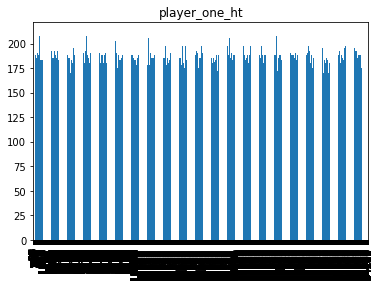

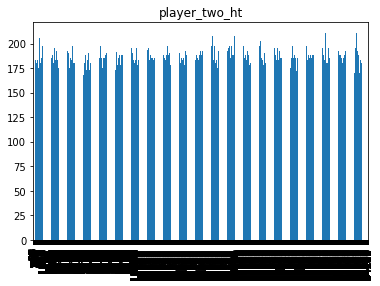

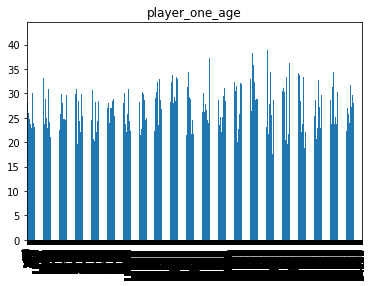

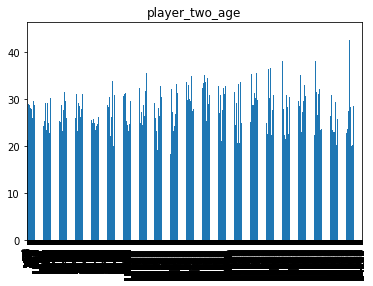

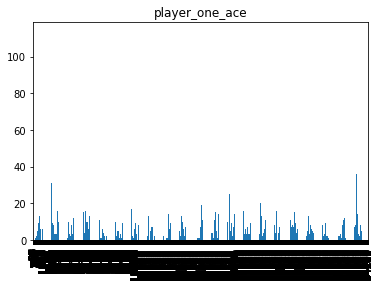

In [ ]:
#visualize_data(data)

In [1]:
def detect_outliers(dataframe, col_name, return_index=False):
    low, up = outlier(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if return_index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index


In [55]:
detect_outliers(data, "player_one_age", True)

      surface tourney_date    player_one      player_two  player_one_ht  \
24185    Hard   2018-02-12  Ivo Karlovic   Ryan Harrison          208.0   
24192    Hard   2018-02-12  Ivo Karlovic     Sam Querrey          208.0   
24504    Hard   2018-03-19  Ivo Karlovic  Vasek Pospisil          208.0   
24674    Clay   2018-04-09  Ivo Karlovic     Taro Daniel          208.0   
24691    Clay   2018-04-09  Ivo Karlovic    Nick Kyrgios          208.0   

       player_two_ht  player_one_age  player_two_age player_one_hand  \
24185          183.0       38.956879       25.768652               R   
24192          198.0       38.956879       30.351814               R   
24504          193.0       39.052704       27.737166               R   
24674          191.0       39.110198       25.196441               R   
24691          193.0       39.110198       22.951403               R   

      player_two_hand  ...  player_two_break_point_saved  \
24185               R  ...                           2.0

Int64Index([24185, 24192, 24504, 24674, 24691, 24694, 24791, 24807, 24913,
            25051, 25234, 25401, 25464, 26633, 26780, 26891, 26974, 27028,
            27252, 27372, 27400, 27858, 28567, 29015, 29547, 29788, 30109,
            30117, 30199, 30207, 30615, 30631, 30822, 30925, 30973, 31374,
            31678, 31766, 31967, 31997, 32007, 32154, 32720, 32804, 32899,
            33033, 33076, 33301, 33431, 33739, 34007, 34140],
           dtype='int64')

<AxesSubplot:xlabel='player_one_age'>

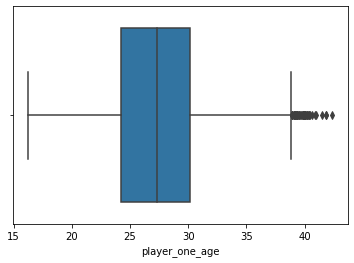

In [56]:
sns.boxplot(data["player_one_age"])

In [57]:
data.columns

Index(['surface', 'tourney_date', 'player_one', 'player_two', 'player_one_ht',
       'player_two_ht', 'player_one_age', 'player_two_age', 'player_one_hand',
       'player_two_hand', 'player_one_ace', 'player_two_ace', 'player_one_df',
       'player_two_df', 'player_one_break_point_saved',
       'player_two_break_point_saved', 'player_one_break_point_faced',
       'player_two_break_point_faced', 'player_one_rank', 'player_two_rank',
       'player_one_rank_points', 'player_two_rank_points', 'FTR',
       'player_one_win_percentage', 'player_two_win_percentage'],
      dtype='object')

<AxesSubplot:xlabel='player_two_ht'>

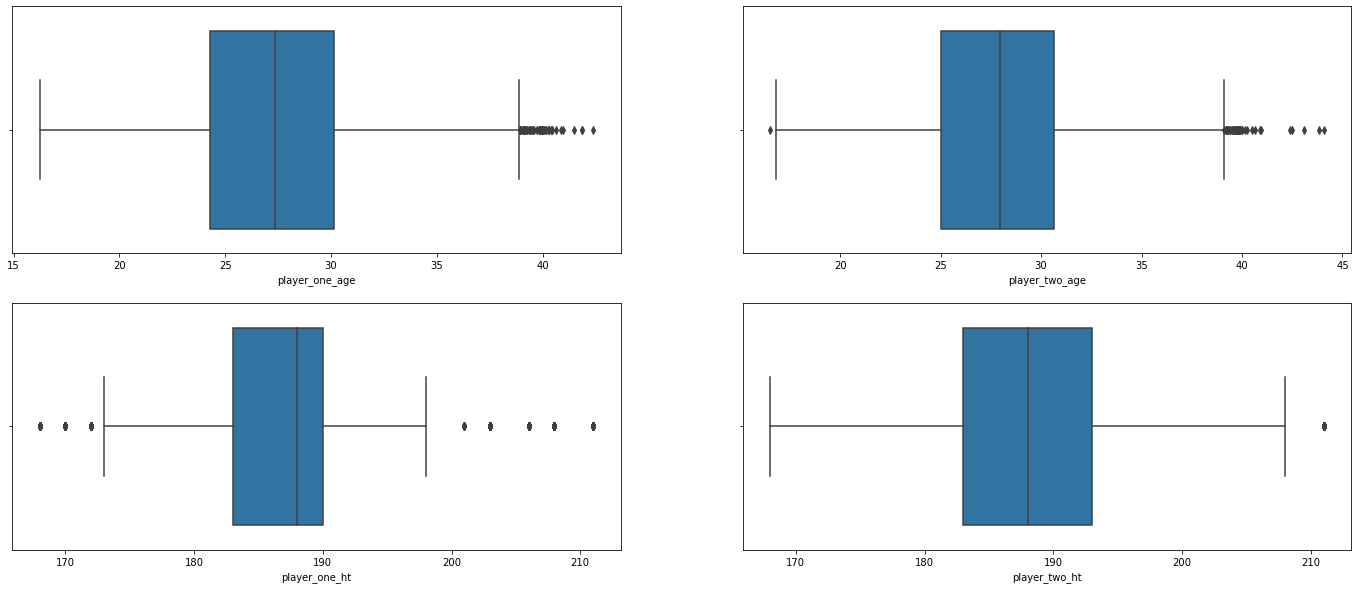

In [58]:
figbi, axesbi = plt.subplots(2, 2, figsize=(24, 10))
sns.boxplot(x="player_one_age", data=data, ax=axesbi[0, 0])
sns.boxplot(x="player_two_age", data=data, ax=axesbi[0, 1])
sns.boxplot(x="player_one_ht", data=data, ax=axesbi[1, 0])
sns.boxplot(x="player_two_ht", data=data, ax=axesbi[1, 1])



In [59]:
data.columns

Index(['surface', 'tourney_date', 'player_one', 'player_two', 'player_one_ht',
       'player_two_ht', 'player_one_age', 'player_two_age', 'player_one_hand',
       'player_two_hand', 'player_one_ace', 'player_two_ace', 'player_one_df',
       'player_two_df', 'player_one_break_point_saved',
       'player_two_break_point_saved', 'player_one_break_point_faced',
       'player_two_break_point_faced', 'player_one_rank', 'player_two_rank',
       'player_one_rank_points', 'player_two_rank_points', 'FTR',
       'player_one_win_percentage', 'player_two_win_percentage'],
      dtype='object')

<AxesSubplot:ylabel='player_two_break_point_faced'>

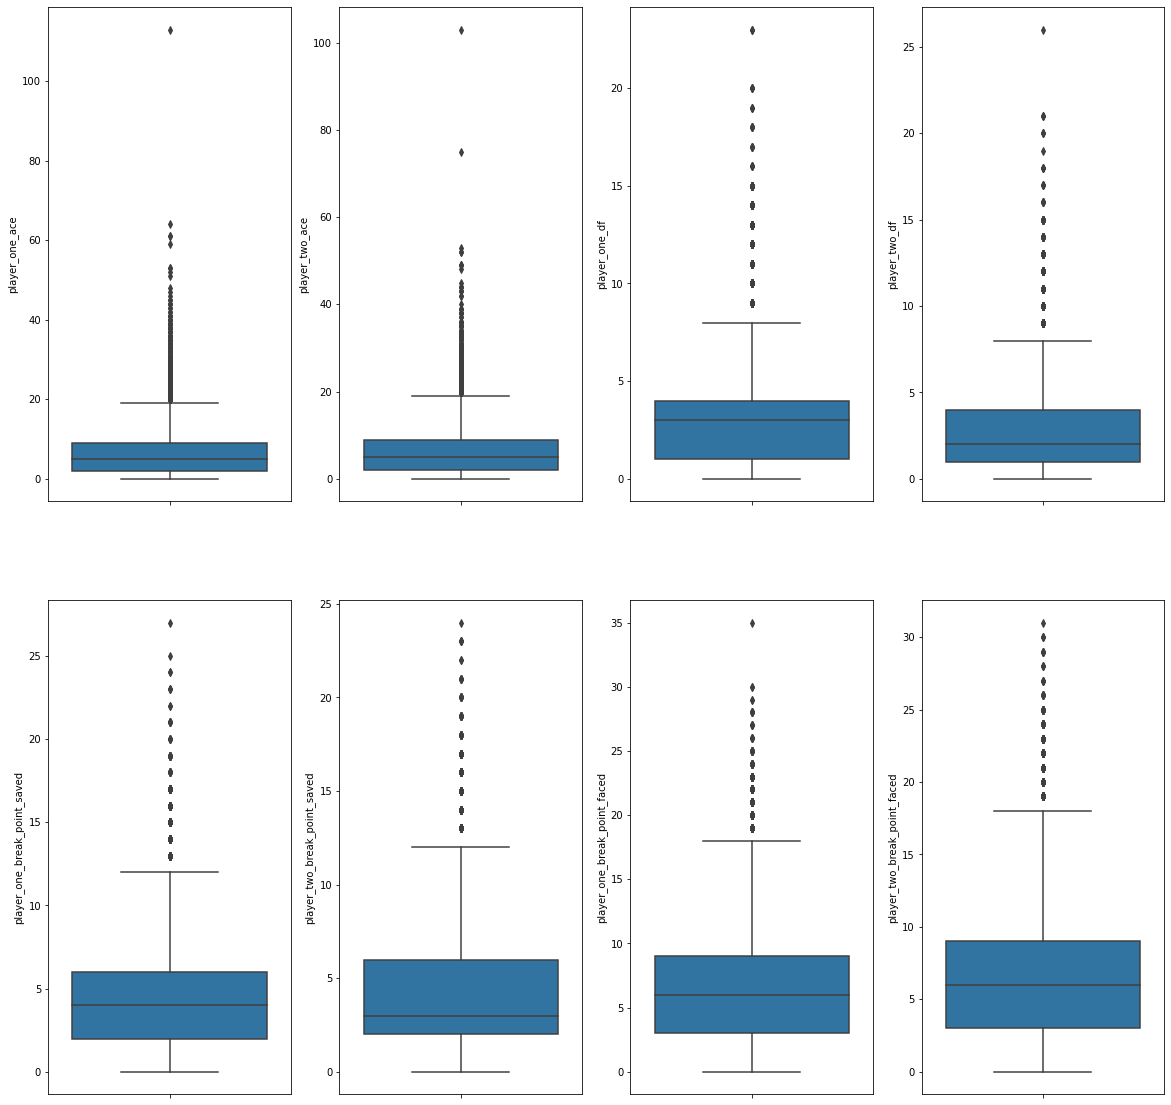

In [60]:
figbi, axesbi = plt.subplots(2, 4, figsize=(20, 20))
sns.boxplot(y="player_one_ace", data=data, orient="v", ax=axesbi[0, 0])
sns.boxplot(y="player_two_ace", data=data, orient="v", ax=axesbi[0, 1])
sns.boxplot(y="player_one_df", data=data, orient="v", ax=axesbi[0, 2])
sns.boxplot(y="player_two_df", data=data, orient="v", ax=axesbi[0, 3])
sns.boxplot(y="player_one_break_point_saved", data=data, orient="v", ax=axesbi[1, 0])
sns.boxplot(y="player_two_break_point_saved", data=data, orient="v", ax=axesbi[1, 1])
sns.boxplot(y="player_one_break_point_faced", data=data, orient="v", ax=axesbi[1, 2])
sns.boxplot(y="player_two_break_point_faced", data=data, orient="v", ax=axesbi[1, 3])


In [61]:
# Dropping the outlier data points
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

outlier_count = 0
for col in ["player_one_age", "player_two_age"]:
    new_df = remove_outlier(data, col)
    outlier_count += data.shape[0] - new_df.shape[0]

print(f"Number of outliers to be removed: {outlier_count}")


Number of outliers to be removed: 107


In [62]:
def replace_with_max_min_limit(dataframe, variable):
    low_limit, up_limit = outlier(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

print(remove_outlier(data, "player_one_age").shape)
print(replace_with_max_min_limit(data, "player_one_age"))
print(remove_outlier(data, "player_two_age").shape)
print(replace_with_max_min_limit(data, "player_two_age"))

(28385, 25)
None
(28382, 25)
None


In [63]:
for col in num_cols:
    remove_outlier(data, col).shape
    replace_with_max_min_limit(data, col)


<AxesSubplot:xlabel='player_two_ht'>

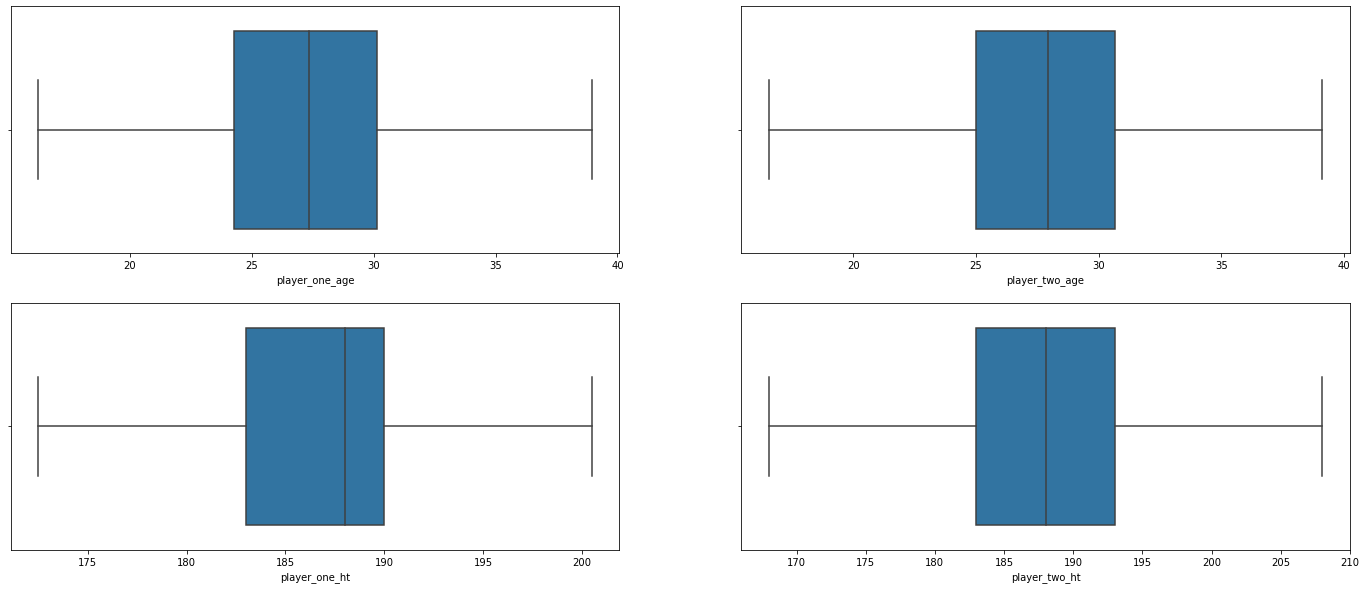

In [64]:
figbi, axesbi = plt.subplots(2, 2, figsize=(24, 10))
sns.boxplot(x="player_one_age", data=data, ax=axesbi[0, 0])
sns.boxplot(x="player_two_age", data=data, ax=axesbi[0, 1])
sns.boxplot(x="player_one_ht", data=data, ax=axesbi[1, 0])
sns.boxplot(x="player_two_ht", data=data, ax=axesbi[1, 1])



<AxesSubplot:ylabel='player_two_break_point_faced'>

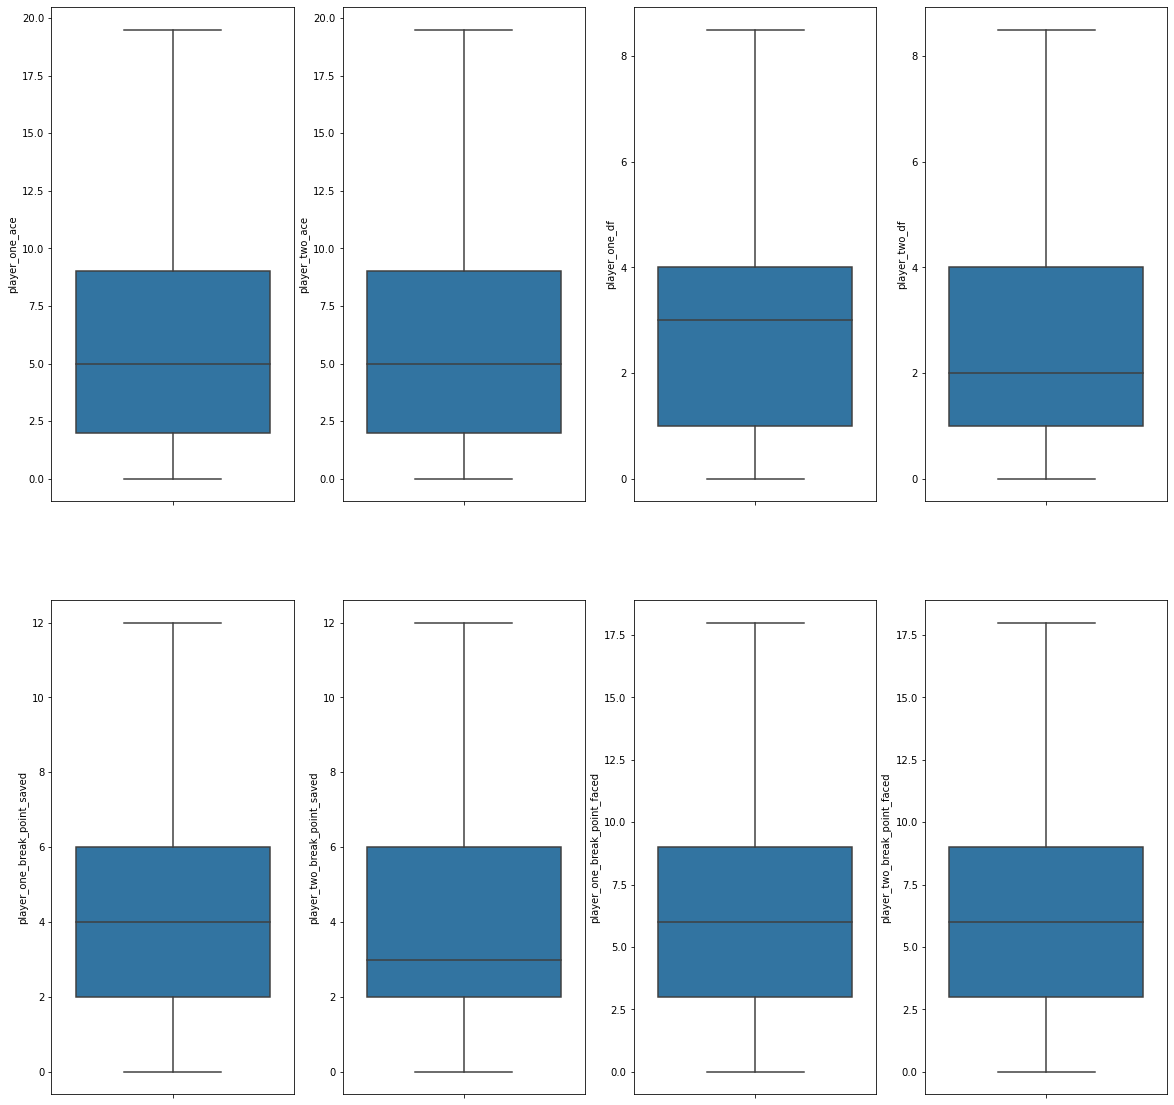

In [65]:
figbi, axesbi = plt.subplots(2, 4, figsize=(20, 20))
sns.boxplot(y="player_one_ace", data=data, orient="v", ax=axesbi[0, 0])
sns.boxplot(y="player_two_ace", data=data, orient="v", ax=axesbi[0, 1])
sns.boxplot(y="player_one_df", data=data, orient="v", ax=axesbi[0, 2])
sns.boxplot(y="player_two_df", data=data, orient="v", ax=axesbi[0, 3])
sns.boxplot(y="player_one_break_point_saved", data=data, orient="v", ax=axesbi[1, 0])
sns.boxplot(y="player_two_break_point_saved", data=data, orient="v", ax=axesbi[1, 1])
sns.boxplot(y="player_one_break_point_faced", data=data, orient="v", ax=axesbi[1, 2])
sns.boxplot(y="player_two_break_point_faced", data=data, orient="v", ax=axesbi[1, 3])


<AxesSubplot:xlabel='player_two_ht', ylabel='Count'>

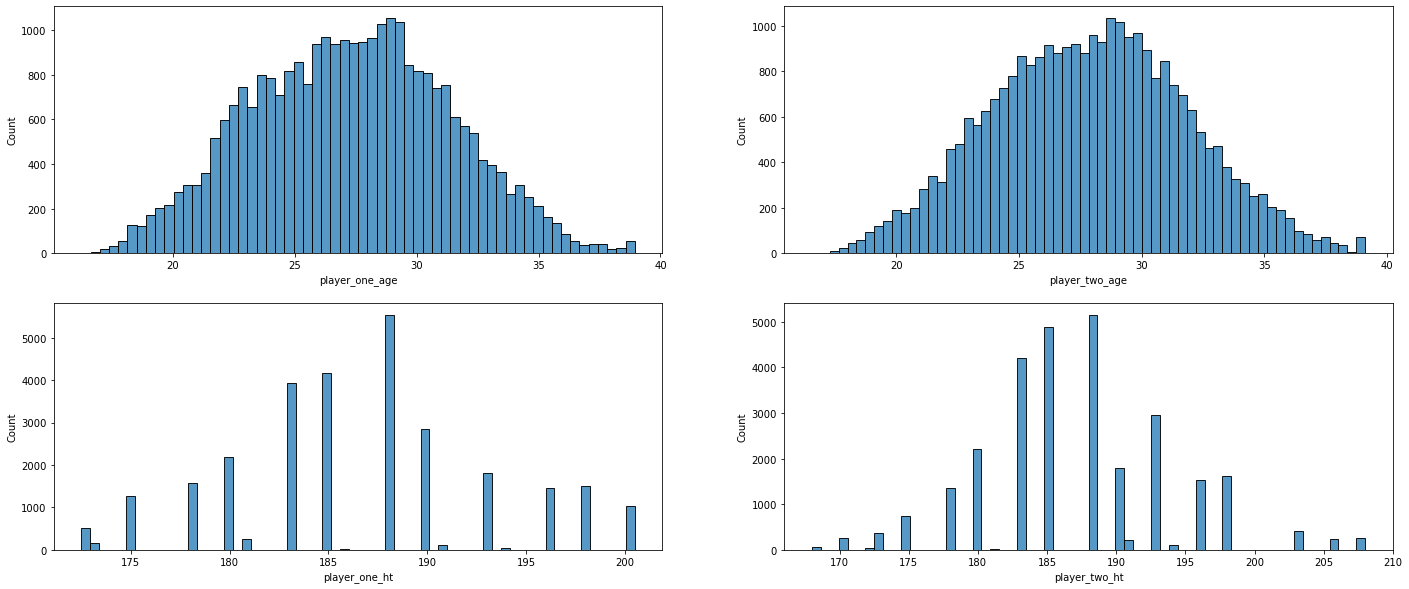

In [66]:
figbi, axesbi = plt.subplots(2, 2, figsize=(24, 10))
sns.histplot(x="player_one_age", data=data, ax=axesbi[0, 0])
sns.histplot(x="player_two_age", data=data, ax=axesbi[0, 1])
sns.histplot(x="player_one_ht", data=data, ax=axesbi[1, 0])
sns.histplot(x="player_two_ht", data=data, ax=axesbi[1, 1])



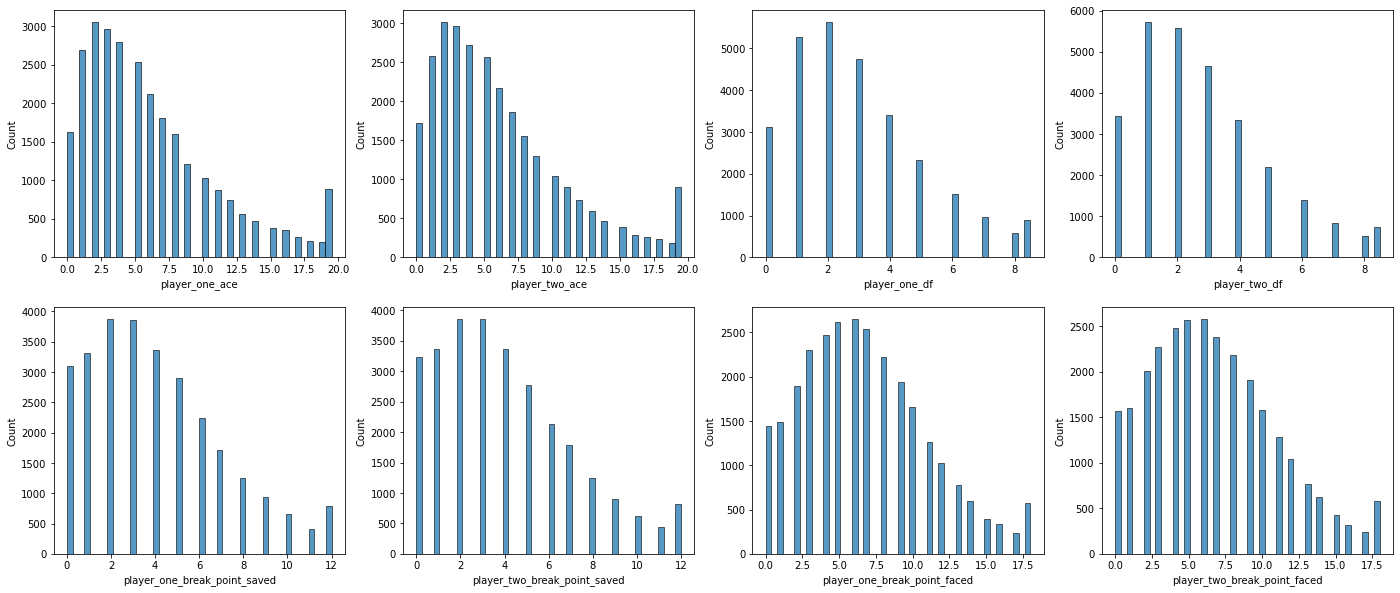

In [67]:
fig, axes = plt.subplots(2, 4, figsize=(24, 10))

# plot histograms of various tennis statistics for two players
sns.histplot(x="player_one_ace", data=data, ax=axes[0, 0])
sns.histplot(x="player_two_ace", data=data, ax=axes[0, 1])
sns.histplot(x="player_one_df", data=data, ax=axes[0, 2])
sns.histplot(x="player_two_df", data=data, ax=axes[0, 3])
sns.histplot(x="player_one_break_point_saved", data=data, ax=axes[1, 0])
sns.histplot(x="player_two_break_point_saved", data=data, ax=axes[1, 1])
sns.histplot(x="player_one_break_point_faced", data=data, ax=axes[1, 2])
sns.histplot(x="player_two_break_point_faced", data=data, ax=axes[1, 3])

# display the plot
plt.show()

## finally outliers has been removed for our data

In [68]:
data

surface tourney_date        player_one         player_two  \
0        Hard   2010-01-03      Andy Roddick       Peter Luczak   
1        Hard   2010-01-03      Carsten Ball      Mischa Zverev   
2        Hard   2010-01-03   Jarkko Nieminen    Richard Gasquet   
3        Hard   2010-01-03     Jurgen Melzer      Matthew Ebden   
4        Hard   2010-01-03      Nick Lindahl      Tomas Berdych   
...       ...          ...               ...                ...   
34241    Hard   2022-03-04       Casper Ruud  Mikhail Kukushkin   
34242    Hard   2022-03-04  Alexander Bublik   Viktor Durasovic   
34243    Hard   2022-03-04  Alexander Bublik        Casper Ruud   
34245    Hard   2022-03-04        Elias Ymer        Taro Daniel   
34252    Clay   2022-03-04         Blaz Rola      Nicolas Jarry   

       player_one_ht  player_two_ht  player_one_age  player_two_age  \
0              188.0          183.0       27.348392       30.346338   
1              198.0          190.0       22.543463       22.370979   
2              185.0          185.0       28.451745       23.548255   
3              183.0          188.0       28.621492       22.108145   
4              183.0          196.0       21.429158       24.298426   
...              ...            ...             ...             ...   
34241          183.0          183.0       23.186858       34.176591   
34242          196.0          185.0       24.700890       24.947296   
34243          196.0          183.0       24.700890       23.186858   
34245          183.0          191.0       25.886379       29.086927   
34252          193.0          198.0       31.400411       26.384668   

      player_one_hand player_two_hand  ...  player_two_break_point_saved  \
0                   R               R  ...                           3.0   
1                   L               L  ...                           7.0   
2                   L               R  ...                           5.0   
3                   L               R  ...                           3.0   
4                   R               R  ...                           1.0   
...               ...             ...  ...                           ...   
34241               R               R  ...                           2.0   
34242               R               R  ...                           1.0   
34243               R               R  ...                           2.0   
34245               R               R  ...                           5.0   
34252               L               R  ...                           3.0   

       player_one_break_point_faced  player_two_break_point_faced  \
0                               3.0                           5.0   
1                               0.0                          10.0   
2                              11.0                           8.0   
3                               5.0                           3.0   
4                               9.0                           1.0   
...                             ...                           ...   
34241                           1.0                           5.0   
34242                           0.0                           4.0   
34243                           5.0                           4.0   
34245                          10.0                           8.0   
34252                           8.0                           6.0   

       player_one_rank  player_two_rank  player_one_rank_points  \
0                  7.0             77.0                  3126.0   
1                134.0             78.0                   400.0   
2                 88.0             52.0                   568.0   
3                 28.0            181.0                  1260.0   
4                170.5             20.0                   179.0   
...                ...              ...                     ...   
34241              8.0            160.0                  3126.0   
34242             32.0            181.0                  1416.0   
342

In [69]:
def fillna_with_mean(df):
    num_cols = df.select_dtypes(include=["float64", "int64"]).columns
    for col in num_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

def fillna_with_median(df):
    num_cols = df.select_dtypes(include=["float64", "int64"]).columns
    for col in num_cols:
        df[col].fillna(df[col].median(), inplace=True)
    return df

def fill_na_with_o(df):
    return df.fillna(0)




In [70]:

for col in num_cols:
    fillna_with_median(data)
    
    
#for col in num_cols:
 #   fillna_with_mean(data)

In [71]:
data

surface tourney_date        player_one         player_two  \
0        Hard   2010-01-03      Andy Roddick       Peter Luczak   
1        Hard   2010-01-03      Carsten Ball      Mischa Zverev   
2        Hard   2010-01-03   Jarkko Nieminen    Richard Gasquet   
3        Hard   2010-01-03     Jurgen Melzer      Matthew Ebden   
4        Hard   2010-01-03      Nick Lindahl      Tomas Berdych   
...       ...          ...               ...                ...   
34241    Hard   2022-03-04       Casper Ruud  Mikhail Kukushkin   
34242    Hard   2022-03-04  Alexander Bublik   Viktor Durasovic   
34243    Hard   2022-03-04  Alexander Bublik        Casper Ruud   
34245    Hard   2022-03-04        Elias Ymer        Taro Daniel   
34252    Clay   2022-03-04         Blaz Rola      Nicolas Jarry   

       player_one_ht  player_two_ht  player_one_age  player_two_age  \
0              188.0          183.0       27.348392       30.346338   
1              198.0          190.0       22.543463       22.370979   
2              185.0          185.0       28.451745       23.548255   
3              183.0          188.0       28.621492       22.108145   
4              183.0          196.0       21.429158       24.298426   
...              ...            ...             ...             ...   
34241          183.0          183.0       23.186858       34.176591   
34242          196.0          185.0       24.700890       24.947296   
34243          196.0          183.0       24.700890       23.186858   
34245          183.0          191.0       25.886379       29.086927   
34252          193.0          198.0       31.400411       26.384668   

      player_one_hand player_two_hand  ...  player_two_break_point_saved  \
0                   R               R  ...                           3.0   
1                   L               L  ...                           7.0   
2                   L               R  ...                           5.0   
3                   L               R  ...                           3.0   
4                   R               R  ...                           1.0   
...               ...             ...  ...                           ...   
34241               R               R  ...                           2.0   
34242               R               R  ...                           1.0   
34243               R               R  ...                           2.0   
34245               R               R  ...                           5.0   
34252               L               R  ...                           3.0   

       player_one_break_point_faced  player_two_break_point_faced  \
0                               3.0                           5.0   
1                               0.0                          10.0   
2                              11.0                           8.0   
3                               5.0                           3.0   
4                               9.0                           1.0   
...                             ...                           ...   
34241                           1.0                           5.0   
34242                           0.0                           4.0   
34243                           5.0                           4.0   
34245                          10.0                           8.0   
34252                           8.0                           6.0   

       player_one_rank  player_two_rank  player_one_rank_points  \
0                  7.0             77.0                  3126.0   
1                134.0             78.0                   400.0   
2                 88.0             52.0                   568.0   
3                 28.0            181.0                  1260.0   
4                170.5             20.0                   179.0   
...                ...              ...                     ...   
34241              8.0            160.0                  3126.0   
34242             32.0            181.0                  1416.0   
342

In [72]:
data.isna().sum()

surface                         0
tourney_date                    0
player_one                      0
player_two                      0
player_one_ht                   0
player_two_ht                   0
player_one_age                  0
player_two_age                  0
player_one_hand                 0
player_two_hand                 0
player_one_ace                  0
player_two_ace                  0
player_one_df                   0
player_two_df                   0
player_one_break_point_saved    0
player_two_break_point_saved    0
player_one_break_point_faced    0
player_two_break_point_faced    0
player_one_rank                 0
player_two_rank                 0
player_one_rank_points          0
player_two_rank_points          0
FTR                             0
player_one_win_percentage       0
player_two_win_percentage       0
dtype: int64

In [73]:
def fillna_mode(df, cols):
   
    for col in cat_cols:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
    return df


<AxesSubplot:>

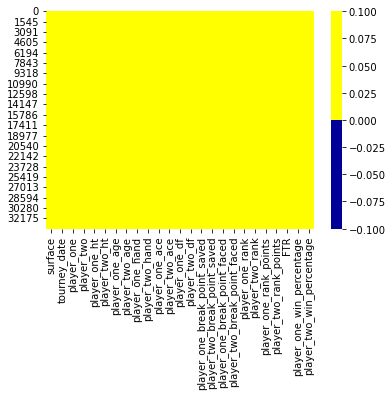

In [74]:
import seaborn as sns
cols = data.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

In [75]:
data["player_one_hand"].mode()

0    R
Name: player_one_hand, dtype: object

In [76]:
data["player_two_hand"].mode()

0    R
Name: player_two_hand, dtype: object

In [77]:
categorical_cols = ['player_one_hand', 'player_one_hand']

data = fillna_mode(data, categorical_cols)

<AxesSubplot:>

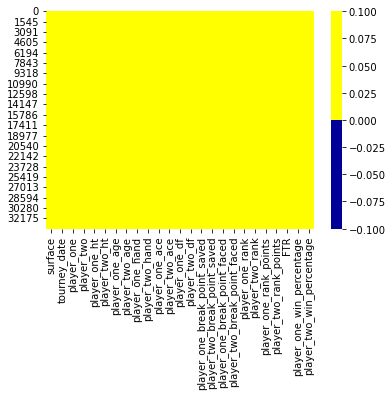

In [78]:
import seaborn as sns
cols = data.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

In [79]:
data.isna().sum()

surface                         0
tourney_date                    0
player_one                      0
player_two                      0
player_one_ht                   0
player_two_ht                   0
player_one_age                  0
player_two_age                  0
player_one_hand                 0
player_two_hand                 0
player_one_ace                  0
player_two_ace                  0
player_one_df                   0
player_two_df                   0
player_one_break_point_saved    0
player_two_break_point_saved    0
player_one_break_point_faced    0
player_two_break_point_faced    0
player_one_rank                 0
player_two_rank                 0
player_one_rank_points          0
player_two_rank_points          0
FTR                             0
player_one_win_percentage       0
player_two_win_percentage       0
dtype: int64

In [80]:
data.corr()

player_one_ht  player_two_ht  player_one_age  \
player_one_ht                      1.000000       0.014912       -0.130255   
player_two_ht                      0.014912       1.000000        0.006210   
player_one_age                    -0.130255       0.006210        1.000000   
player_two_age                     0.024683      -0.148296        0.022509   
player_one_ace                     0.412444      -0.001484        0.012457   
player_two_ace                     0.005073       0.422222        0.056025   
player_one_df                      0.071559       0.003025       -0.014218   
player_two_df                     -0.008206       0.044412        0.000595   
player_one_break_point_saved      -0.058633      -0.043824        0.006635   
player_two_break_point_saved      -0.030209      -0.079098       -0.015000   
player_one_break_point_faced      -0.109075      -0.072327        0.000678   
player_two_break_point_faced      -0.062673      -0.134892       -0.022842   
player_one_rank                   -0.109304      -0.038079       -0.052989   
player_two_rank                   -0.023297      -0.145903        0.023685   
player_one_rank_points             0.114242       0.039869        0.002042   
player_two_rank_points             0.038227       0.147083       -0.013644   
player_one_win_percentage          0.225145       0.064736        0.011827   
player_two_win_percentage          0.069685       0.256451        0.033221   

                              player_two_age  player_one_ace  player_two_ace  \
player_one_ht                       0.024683        0.412444        0.005073   
player_two_ht                      -0.148296       -0.001484        0.422222   
player_one_age                      0.022509        0.012457        0.056025   
player_two_age                      1.000000        0.046494       -0.031744   
player_one_ace                      0.046494        1.000000        0.245355   
player_two_ace                     -0.031744        0.245355        1.000000   
player_one_df                       0.005554        0.210201        0.169565   
player_two_df                      -0.017395        0.187592        0.202361   
player_one_break_point_saved       -0.000043        0.053160        0.134718   
player_two_break_point_saved       -0.012908        0.141833        0.031516   
player_one_break_point_faced       -0.001428       -0.049961        0.124254   
player_two_break_point_faced       -0.010478        0.133101       -0.070004   
player_one_rank                    -0.009254       -0.129407        0.038922   
player_two_rank                    -0.074158        0.050711       -0.116962   
player_one_rank_points              0.018667        0.139543       -0.047453   
player_two_rank_points              0.066707       -0.040702        0.121231   
player_one_win_percentage           0.003196        0.462514        0.071678   
player_two_win_percentage          -0.000051        0.067134        0.468287   

                              player_one_df  player_two_df  \
player_one_ht                      0.071559      -0.008206   
player_two_ht                      0.003025       0.044412   
player_one_age                    -0.014218       0.000595   
player_two_age                     0.005554      -0.017395   
player_one_ace                     0.210201       0.187592   
player_two_ace                     0.169565       0.202361   
player_one_df                      1.000000       0.217775   
player_two_df                      0.217775       1.000000   
player_one_break_point_saved       0.325416       0.142112   
player_two_break_point_saved       0.142533       0.312744   
player_one_break_point_faced       0.374329       0.133238   
player_two_break_point_faced       0.142644       0.367640   
player_one_rank                    0.050763       0.021872   
player_two_rank                    0.019346       0.088290   
player_one_rank_points            -0.057462      -0.015613   
player_two_rank_points            

<AxesSubplot:>

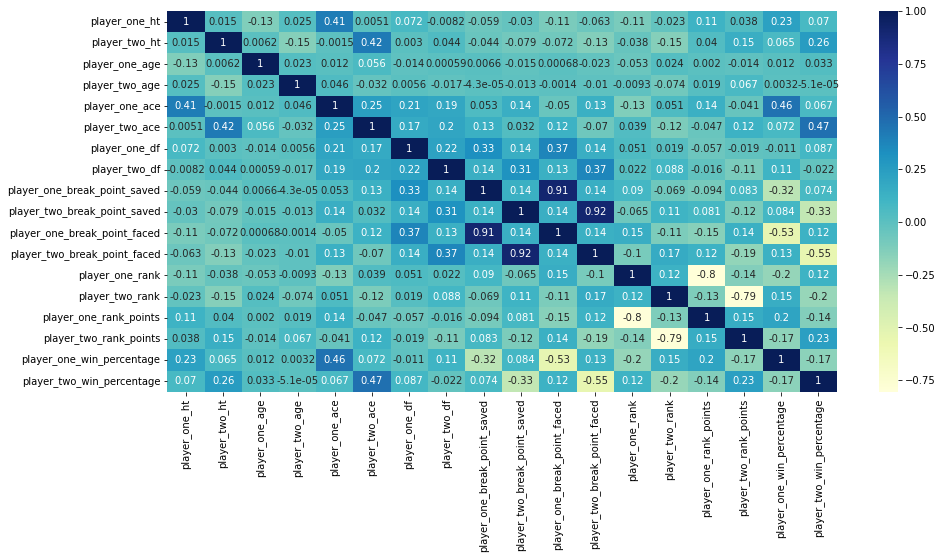

In [81]:
import seaborn as sns
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True,ax=ax)

In [82]:
from sklearn import preprocessing
data["FTR"] = preprocessing.LabelEncoder.fit_transform(data,data["FTR"])
data["surface"] = preprocessing.LabelEncoder.fit_transform(data,data["surface"])
data["player_one_hand"] = preprocessing.LabelEncoder.fit_transform(data,data["player_one_hand"])
data["player_two_hand"] = preprocessing.LabelEncoder.fit_transform(data,data["player_two_hand"])

In [83]:
data[data.columns[0:]].corr()['FTR'][:]

surface                         0.000035
player_one_ht                   0.042969
player_two_ht                  -0.061807
player_one_age                 -0.020743
player_two_age                  0.003352
player_one_hand                 0.019598
player_two_hand                 0.001513
player_one_ace                  0.188186
player_two_ace                 -0.186186
player_one_df                  -0.133548
player_two_df                   0.159056
player_one_break_point_saved   -0.197198
player_two_break_point_saved    0.221051
player_one_break_point_faced   -0.396849
player_two_break_point_faced    0.418083
player_one_rank                -0.196965
player_two_rank                 0.219024
player_one_rank_points          0.219653
player_two_rank_points         -0.250899
FTR                             1.000000
player_one_win_percentage       0.521063
player_two_win_percentage      -0.526197
Name: FTR, dtype: float64

In [84]:
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.feature_selection import chi2

In [85]:
data.columns

Index(['surface', 'tourney_date', 'player_one', 'player_two', 'player_one_ht',
       'player_two_ht', 'player_one_age', 'player_two_age', 'player_one_hand',
       'player_two_hand', 'player_one_ace', 'player_two_ace', 'player_one_df',
       'player_two_df', 'player_one_break_point_saved',
       'player_two_break_point_saved', 'player_one_break_point_faced',
       'player_two_break_point_faced', 'player_one_rank', 'player_two_rank',
       'player_one_rank_points', 'player_two_rank_points', 'FTR',
       'player_one_win_percentage', 'player_two_win_percentage'],
      dtype='object')

In [86]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

def select_features(data, target_col, method='chi2', k=10):
    # Split your data into features and labels
    X = data.drop(['tourney_date', 'player_one', 'player_two','FTR'],1)
    y = data[target_col]

    if method == 'chi2':
        # Create a SelectKBest object using the chi-squared scoring function
        selector = SelectKBest(chi2, k=k)
    elif method == 'f_classif':
        # Create a SelectKBest object using the ANOVA F-test scoring function
        selector = SelectKBest(f_classif, k=k)
    else:
        raise ValueError(f"Unsupported method '{method}', please choose 'chi2' or 'f_classif'.")

    # Fit the selector to your data
    selector.fit(X, y)

    # Obtain the selected feature indices
    selected_indices = selector.get_support(indices=True)

    # Obtain the selected feature names
    selected_features = list(X.columns[selected_indices])

    return selected_features


In [87]:
# Select the top 10 features using the chi-squared method
selected_features = select_features(data, 'FTR', method='chi2', k=10)

# Print the selected features
print(selected_features)

['player_one_ace', 'player_two_ace', 'player_one_break_point_faced', 'player_two_break_point_faced', 'player_one_rank', 'player_two_rank', 'player_one_rank_points', 'player_two_rank_points', 'player_one_win_percentage', 'player_two_win_percentage']


In [88]:
selected_features = select_features(data, 'FTR', method='f_classif', k=10)
print(selected_features)

['player_one_break_point_saved', 'player_two_break_point_saved', 'player_one_break_point_faced', 'player_two_break_point_faced', 'player_one_rank', 'player_two_rank', 'player_one_rank_points', 'player_two_rank_points', 'player_one_win_percentage', 'player_two_win_percentage']


In [89]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,Normalizer

def scale_dataframe(df, scaler_type):
 
    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    elif scaler_type == 'standard':
        scaler = StandardScaler()
    elif scaler_type == 'robust':
        scaler = RobustScaler()
    elif scaler_type == 'Normalizer':
        scaler = Normalizer()
    else:
        raise ValueError("Invalid scaler type. Must be one of 'minmax', 'standard', or 'robust'.")
        
    scaled_data = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
    return scaled_df


In [90]:
from sklearn.model_selection import train_test_split
X = data.drop(['tourney_date', 'player_one', 'player_two','FTR'],1)
y = data["FTR"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,shuffle =True)

In [91]:
X.columns

Index(['surface', 'player_one_ht', 'player_two_ht', 'player_one_age',
       'player_two_age', 'player_one_hand', 'player_two_hand',
       'player_one_ace', 'player_two_ace', 'player_one_df', 'player_two_df',
       'player_one_break_point_saved', 'player_two_break_point_saved',
       'player_one_break_point_faced', 'player_two_break_point_faced',
       'player_one_rank', 'player_two_rank', 'player_one_rank_points',
       'player_two_rank_points', 'player_one_win_percentage',
       'player_two_win_percentage'],
      dtype='object')

In [92]:
# Scale the DataFrame using StandardScaler
scaled_df_train = scale_dataframe(X_train, 'standard')

scaled_df_test = scale_dataframe(X_test, 'standard')



In [93]:
scaled_df_train

surface  player_one_ht  player_two_ht  player_one_age  player_two_age  \
0     -0.318241      -0.548349       0.848261        1.015825        0.144670   
1     -1.430887      -1.764648       0.123054        1.439226        0.901823   
2      0.794404       2.112305      -0.312070        1.280621       -0.303554   
3      0.794404       1.732212       1.573468       -0.954148        0.741842   
4      0.794404      -2.144742      -0.602153       -0.434767        1.216270   
...         ...            ...            ...             ...             ...   
21322 -1.430887       0.972025      -0.312070       -1.627369        0.330855   
21323  0.794404      -1.308536      -0.602153       -0.120279       -0.213910   
21324  0.794404       1.428137       0.848261       -0.007962       -2.105415   
21325 -0.318241      -0.548349       0.123054       -0.523259        0.050887   
21326  0.794404      -0.548349       2.298675       -0.654636        1.950668   

       player_one_hand  player_two_hand  player_one_ace  player_two_ace  \
0             0.442646         0.358106       -0.847346        0.987979   
1             0.442646        -2.771945       -0.232936       -0.238317   
2             0.442646         0.358106        2.429510       -0.033934   
3             0.442646         0.358106        2.634314       -0.442700   
4             0.442646         0.358106       -0.847346       -0.647083   
...                ...              ...             ...             ...   
21322         0.442646         0.358106        1.200689       -0.238317   
21323         0.442646         0.358106       -0.642543       -0.033934   
21324         0.442646         0.358106        0.176671        0.579214   
21325         0.442646         0.358106       -0.028132       -0.238317   
21326         0.442646         0.358106       -1.052150        0.579214   

       player_one_df  ...  player_one_break_point_saved  \
0          -0.886042  ...                      2.304005   
1          -1.339063  ...                      0.651657   
2           0.473020  ...                     -0.339751   
3          -0.886042  ...                     -1.331160   
4           0.473020  ...                     -0.339751   
...              ...  ...                           ...   
21322       1.832082  ...                     -0.339751   
21323      -1.339063  ...                      2.304005   
21324       2.285103  ...                      0.982127   
21325      -0.886042  ...                      0.651657   
21326       0.473020  ...                     -1.000690   

       player_two_break_point_saved  player_one_break_point_faced  \
0                         -0.981641                      2.433132   
1                          0.323664                      0.309452   
2                         -0.655315                     -0.870370   
3                         -0.981641                     -1.578263   
4                          0.323664                      0.309452   
...                             ...                           ...   
21322                      1.628969                      0.073488   
21323                     -0.002662                      1.725239   
21324                     -1.307967                      1.017346   
21325                      0.649990                      0.309452   
21326                      0.976316                     -1.342299   

       player_two_break_point_faced  player_one_rank  player_two_rank  \
0                         -1.073728        -0.346317         0.634377   
1                          0.320352        -1.122159        -0.454611   
2                         -0.841381        -1.166493        -0.789684   
3                         -1.073728        -1.077825        -0.894395   
4                          0.320352        -0.922657         0.885682   
...                             ...              ...              ...   
21322                      1.946779        -0.833989        -0.433669   
21323       

In [94]:
scaled_df_train_minimax = scale_dataframe(X_train, 'standard')

scaled_df_test_minimax = scale_dataframe(X_test, 'standard')

In [95]:
scaled_df_train_minimax

surface  player_one_ht  player_two_ht  player_one_age  player_two_age  \
0     -0.318241      -0.548349       0.848261        1.015825        0.144670   
1     -1.430887      -1.764648       0.123054        1.439226        0.901823   
2      0.794404       2.112305      -0.312070        1.280621       -0.303554   
3      0.794404       1.732212       1.573468       -0.954148        0.741842   
4      0.794404      -2.144742      -0.602153       -0.434767        1.216270   
...         ...            ...            ...             ...             ...   
21322 -1.430887       0.972025      -0.312070       -1.627369        0.330855   
21323  0.794404      -1.308536      -0.602153       -0.120279       -0.213910   
21324  0.794404       1.428137       0.848261       -0.007962       -2.105415   
21325 -0.318241      -0.548349       0.123054       -0.523259        0.050887   
21326  0.794404      -0.548349       2.298675       -0.654636        1.950668   

       player_one_hand  player_two_hand  player_one_ace  player_two_ace  \
0             0.442646         0.358106       -0.847346        0.987979   
1             0.442646        -2.771945       -0.232936       -0.238317   
2             0.442646         0.358106        2.429510       -0.033934   
3             0.442646         0.358106        2.634314       -0.442700   
4             0.442646         0.358106       -0.847346       -0.647083   
...                ...              ...             ...             ...   
21322         0.442646         0.358106        1.200689       -0.238317   
21323         0.442646         0.358106       -0.642543       -0.033934   
21324         0.442646         0.358106        0.176671        0.579214   
21325         0.442646         0.358106       -0.028132       -0.238317   
21326         0.442646         0.358106       -1.052150        0.579214   

       player_one_df  ...  player_one_break_point_saved  \
0          -0.886042  ...                      2.304005   
1          -1.339063  ...                      0.651657   
2           0.473020  ...                     -0.339751   
3          -0.886042  ...                     -1.331160   
4           0.473020  ...                     -0.339751   
...              ...  ...                           ...   
21322       1.832082  ...                     -0.339751   
21323      -1.339063  ...                      2.304005   
21324       2.285103  ...                      0.982127   
21325      -0.886042  ...                      0.651657   
21326       0.473020  ...                     -1.000690   

       player_two_break_point_saved  player_one_break_point_faced  \
0                         -0.981641                      2.433132   
1                          0.323664                      0.309452   
2                         -0.655315                     -0.870370   
3                         -0.981641                     -1.578263   
4                          0.323664                      0.309452   
...                             ...                           ...   
21322                      1.628969                      0.073488   
21323                     -0.002662                      1.725239   
21324                     -1.307967                      1.017346   
21325                      0.649990                      0.309452   
21326                      0.976316                     -1.342299   

       player_two_break_point_faced  player_one_rank  player_two_rank  \
0                         -1.073728        -0.346317         0.634377   
1                          0.320352        -1.122159        -0.454611   
2                         -0.841381        -1.166493        -0.789684   
3                         -1.073728        -1.077825        -0.894395   
4                          0.320352        -0.922657         0.885682   
...                             ...              ...              ...   
21322                      1.946779        -0.833989        -0.433669   
21323       

In [96]:
scaled_df_train_normal = scale_dataframe(X_train, 'Normalizer')

scaled_df_test_normal = scale_dataframe(X_test, 'Normalizer')

In [97]:
scaled_df_train_normal

surface  player_one_ht  player_two_ht  player_one_age  player_two_age  \
0      0.001641       0.150132       0.158336        0.025747        0.023348   
1      0.000301       0.052618       0.056526        0.009948        0.009461   
2      0.000833       0.055641       0.051339        0.009005        0.007404   
3      0.000915       0.060389       0.060389        0.007155        0.009403   
4      0.001299       0.074696       0.079243        0.011064        0.014166   
...         ...            ...            ...             ...             ...   
21322  0.000342       0.065997       0.063261        0.007097        0.009985   
21323  0.002441       0.144822       0.148891        0.021817        0.021997   
21324  0.001435       0.093775       0.092339        0.013045        0.009342   
21325  0.002143       0.196113       0.201471        0.026999        0.030100   
21326  0.002445       0.149148       0.165448        0.020103        0.029039   

       player_one_hand  player_two_hand  player_one_ace  player_two_ace  \
0             0.000820         0.000820        0.001641        0.009024   
1             0.000301         0.000000        0.001503        0.001503   
2             0.000278         0.000278        0.004995        0.001665   
3             0.000305         0.000305        0.005795        0.001220   
4             0.000433         0.000433        0.000866        0.001299   
...                ...              ...             ...             ...   
21322         0.000342         0.000342        0.004103        0.001710   
21323         0.000814         0.000814        0.002441        0.004882   
21324         0.000478         0.000478        0.003349        0.004306   
21325         0.001072         0.001072        0.006430        0.005358   
21326         0.000815         0.000815        0.000815        0.007335   

       player_one_df  ...  player_one_break_point_saved  \
0           0.000820  ...                      0.009024   
1           0.000000  ...                      0.001804   
2           0.001110  ...                      0.000833   
3           0.000305  ...                      0.000000   
4           0.001732  ...                      0.001299   
...              ...  ...                           ...   
21322       0.002394  ...                      0.001026   
21323       0.000000  ...                      0.008950   
21324       0.003828  ...                      0.003349   
21325       0.001072  ...                      0.006430   
21326       0.003260  ...                      0.000815   

       player_two_break_point_saved  player_one_break_point_faced  \
0                          0.000820                      0.013947   
1                          0.001503                      0.002405   
2                          0.000555                      0.000833   
3                          0.000305                      0.000000   
4                          0.002165                      0.003464   
...                             ...                           ...   
21322                      0.003078                      0.002394   
21323                      0.003254                      0.011391   
21324                      0.000000                      0.005263   
21325                      0.006430                      0.008573   
21326                      0.005705                      0.000815   

       player_two_break_point_faced  player_one_rank  player_two_rank  \
0                          0.001641         0.035277         0.073836   
1                          0.002405         0.002405         0.011426   
2                          0.000833         0.001665         0.006105   
3                          0.000610         0.003050         0.005185   
4                          0.003464         0.007361         0.044168   
...                             ...              ...              ...   
21322                      0.005129         0.007181         0.013336   
21323       

In [98]:
scaled_df_train

surface  player_one_ht  player_two_ht  player_one_age  player_two_age  \
0     -0.318241      -0.548349       0.848261        1.015825        0.144670   
1     -1.430887      -1.764648       0.123054        1.439226        0.901823   
2      0.794404       2.112305      -0.312070        1.280621       -0.303554   
3      0.794404       1.732212       1.573468       -0.954148        0.741842   
4      0.794404      -2.144742      -0.602153       -0.434767        1.216270   
...         ...            ...            ...             ...             ...   
21322 -1.430887       0.972025      -0.312070       -1.627369        0.330855   
21323  0.794404      -1.308536      -0.602153       -0.120279       -0.213910   
21324  0.794404       1.428137       0.848261       -0.007962       -2.105415   
21325 -0.318241      -0.548349       0.123054       -0.523259        0.050887   
21326  0.794404      -0.548349       2.298675       -0.654636        1.950668   

       player_one_hand  player_two_hand  player_one_ace  player_two_ace  \
0             0.442646         0.358106       -0.847346        0.987979   
1             0.442646        -2.771945       -0.232936       -0.238317   
2             0.442646         0.358106        2.429510       -0.033934   
3             0.442646         0.358106        2.634314       -0.442700   
4             0.442646         0.358106       -0.847346       -0.647083   
...                ...              ...             ...             ...   
21322         0.442646         0.358106        1.200689       -0.238317   
21323         0.442646         0.358106       -0.642543       -0.033934   
21324         0.442646         0.358106        0.176671        0.579214   
21325         0.442646         0.358106       -0.028132       -0.238317   
21326         0.442646         0.358106       -1.052150        0.579214   

       player_one_df  ...  player_one_break_point_saved  \
0          -0.886042  ...                      2.304005   
1          -1.339063  ...                      0.651657   
2           0.473020  ...                     -0.339751   
3          -0.886042  ...                     -1.331160   
4           0.473020  ...                     -0.339751   
...              ...  ...                           ...   
21322       1.832082  ...                     -0.339751   
21323      -1.339063  ...                      2.304005   
21324       2.285103  ...                      0.982127   
21325      -0.886042  ...                      0.651657   
21326       0.473020  ...                     -1.000690   

       player_two_break_point_saved  player_one_break_point_faced  \
0                         -0.981641                      2.433132   
1                          0.323664                      0.309452   
2                         -0.655315                     -0.870370   
3                         -0.981641                     -1.578263   
4                          0.323664                      0.309452   
...                             ...                           ...   
21322                      1.628969                      0.073488   
21323                     -0.002662                      1.725239   
21324                     -1.307967                      1.017346   
21325                      0.649990                      0.309452   
21326                      0.976316                     -1.342299   

       player_two_break_point_faced  player_one_rank  player_two_rank  \
0                         -1.073728        -0.346317         0.634377   
1                          0.320352        -1.122159        -0.454611   
2                         -0.841381        -1.166493        -0.789684   
3                         -1.073728        -1.077825        -0.894395   
4                          0.320352        -0.922657         0.885682   
...                             ...              ...              ...   
21322                      1.946779        -0.833989        -0.433669   
21323       

In [99]:
scaled_df_robust = scale_dataframe(X_train, 'robust')

In [100]:
scaled_df_robust

surface  player_one_ht  player_two_ht  player_one_age  player_two_age  \
0         -0.5      -0.714286            0.5        0.691641        0.089234   
1         -1.0      -1.857143            0.0        0.982908        0.621726   
2          0.0       1.785714           -0.3        0.873800       -0.225994   
3          0.0       1.428571            1.0       -0.663545        0.509214   
4          0.0      -2.214286           -0.5       -0.306251        0.842871   
...        ...            ...            ...             ...             ...   
21322     -1.0       0.714286           -0.3       -1.126668        0.220175   
21323      0.0      -1.428571           -0.5       -0.089909       -0.162949   
21324      0.0       1.142857            0.5       -0.012643       -1.493210   
21325     -0.5      -0.714286            0.0       -0.367127        0.023278   
21326      0.0      -0.714286            1.5       -0.457504        1.359360   

       player_one_hand  player_two_hand  player_one_ace  player_two_ace  \
0                  0.0              0.0       -0.428571        0.857143   
1                  0.0             -1.0        0.000000        0.000000   
2                  0.0              0.0        1.857143        0.142857   
3                  0.0              0.0        2.000000       -0.142857   
4                  0.0              0.0       -0.428571       -0.285714   
...                ...              ...             ...             ...   
21322              0.0              0.0        1.000000        0.000000   
21323              0.0              0.0       -0.285714        0.142857   
21324              0.0              0.0        0.285714        0.571429   
21325              0.0              0.0        0.142857        0.000000   
21326              0.0              0.0       -0.571429        0.571429   

       player_one_df  ...  player_one_break_point_saved  \
0          -0.666667  ...                          1.75   
1          -1.000000  ...                          0.50   
2           0.333333  ...                         -0.25   
3          -0.666667  ...                         -1.00   
4           0.333333  ...                         -0.25   
...              ...  ...                           ...   
21322       1.333333  ...                         -0.25   
21323      -1.000000  ...                          1.75   
21324       1.666667  ...                          0.75   
21325      -0.666667  ...                          0.50   
21326       0.333333  ...                         -0.75   

       player_two_break_point_saved  player_one_break_point_faced  \
0                             -0.50                      1.833333   
1                              0.50                      0.333333   
2                             -0.25                     -0.500000   
3                             -0.50                     -1.000000   
4                              0.50                      0.333333   
...                             ...                           ...   
21322                          1.50                      0.166667   
21323                          0.25                      1.333333   
21324                         -0.75                      0.833333   
21325                          0.75                      0.333333   
21326                          1.00                     -0.833333   

       player_two_break_point_faced  player_one_rank  player_two_rank  \
0                         -0.666667        -0.083333         0.640625   
1                          0.333333        -0.666667        -0.171875   
2                         -0.500000        -0.700000        -0.421875   
3                         -0.666667        -0.633333        -0.500000   
4                          0.333333        -0.516667         0.828125   
...                             ...              ...              ...   
21322                      1.500000        -0.450000        -0.156250   
21323                  

In [145]:
import xgboost
from xgboost import XGBClassifier

In [146]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter grid for the random search
param_dist = {
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(3, 10),
    'n_estimators': randint(50, 200),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 1),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# Create an XGBoost classifier object
xgb_model = xgb.XGBClassifier()

# Create a RandomizedSearchCV object with 5-fold cross-validation
rand_search = RandomizedSearchCV(estimator=xgb_model, 
                                 param_distributions=param_dist, 
                                 n_iter=10, 
                                 cv=5, 
                                 random_state=42, 
                                 n_jobs=-1)




In [152]:
# Fit the RandomizedSearchCV object to the training data
rand_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", rand_search.best_params_)
print("Best score:", rand_search.best_score_)

[07:34:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters: {'colsample_bytree': 0.749816047538945, 'gamma': 0.9507143064099162, 'learning_rate': 0.0831993941811405, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 152, 'reg_alpha': 0.44583275285359114, 'reg_lambda': 0.09997491581800289, 'subsample': 0.7836995567863468}
Best score: 0.9188819472268802


In [159]:
rand_search.best_params_

{'colsample_bytree': 0.749816047538945,
 'gamma': 0.9507143064099162,
 'learning_rate': 0.0831993941811405,
 'max_depth': 7,
 'min_child_weight': 5,
 'n_estimators': 152,
 'reg_alpha': 0.44583275285359114,
 'reg_lambda': 0.09997491581800289,
 'subsample': 0.7836995567863468}

In [162]:
xgb = XGBClassifier(colsample_bytree = 0.749816047538945, gamma = 0.9507143064099162, learning_rate = 0.0831993941811405, max_depth = 7, min_child_weight = 5, n_estimators = 152, reg_alpha = 0.44583275285359114, reg_lambda = 0.09997491581800289, subsample = 0.7836995567863468)

In [163]:
xgb

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.749816047538945,
              enable_categorical=False, gamma=0.9507143064099162, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.0831993941811405, max_delta_step=None,
              max_depth=7, min_child_weight=5, missing=nan,
              monotone_constraints=None, n_estimators=152, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=0.44583275285359114, reg_lambda=0.09997491581800289,
              scale_pos_weight=None, subsample=0.7836995567863468,
              tree_method=None, validate_parameters=None, verbosity=None)

In [164]:
xgb.fit(X_train,y_train)

[07:40:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.749816047538945,
              enable_categorical=False, gamma=0.9507143064099162, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.0831993941811405, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=152, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0.44583275285359114,
              reg_lambda=0.09997491581800289, scale_pos_weight=1,
              subsample=0.7836995567863468, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [165]:
y_pred_second_train = xgb.predict(X_train)

In [166]:
y_pred_second_train

array([0, 1, 1, ..., 0, 1, 1])

In [153]:
#y_pred_train = rand_search.predict(X_train)

In [167]:
#y_pred_train

In [168]:
accuracy_score(y_pred_second_train,y_train)

0.965302199090355

In [169]:
y_pred_second_test = xgb.predict(X_test)
#y_pred_test = rand_search.predict(X_test)

In [170]:
accuracy_score(y_pred_second_test,y_test)

0.9230661040787623

In [171]:
import pickle
file_name = "xgb_model_train.pkl"
# save
pickle.dump(xgb,open(file_name,"wb"))

In [172]:
pickle_read = pd.read_pickle("xgb_model_train.pkl")

In [174]:
pickle_read

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.749816047538945,
              enable_categorical=False, gamma=0.9507143064099162, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.0831993941811405, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=152, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0.44583275285359114,
              reg_lambda=0.09997491581800289, scale_pos_weight=1,
              subsample=0.7836995567863468, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [175]:
ls

 Volume in drive C has no label.
 Volume Serial Number is E0D4-CD26

 Directory of C:\Users\Admin\codes\atp_matches\tennis_matches

03-03-2023  07:42    <DIR>          .
03-03-2023  07:42    <DIR>          ..
01-03-2023  07:16    <DIR>          .ipynb_checkpoints
13-07-2022  13:46           667,991 atp_matches_2010.csv
13-07-2022  13:46           665,378 atp_matches_2011.csv
13-07-2022  13:46           663,572 atp_matches_2012.csv
13-07-2022  13:46           648,670 atp_matches_2013.csv
13-07-2022  13:46           640,297 atp_matches_2014.csv
13-07-2022  13:46           646,002 atp_matches_2015.csv
13-07-2022  13:46           668,615 atp_matches_2016.csv
13-07-2022  13:46           660,212 atp_matches_2017.csv
13-07-2022  13:46           657,339 atp_matches_2018.csv
13-07-2022  13:46           632,722 atp_matches_2019.csv
13-07-2022  13:46           332,201 atp_matches_2020.csv
13-07-2022  13:46           617,925 atp_matches_2021.csv
13-07-2022  13:46           162,431 atp_matches_2022

In [108]:
import pickle
file_name = "xgb_model.pkl"

# save
pickle.dump(rand_search.best_estimator_,open(file_name,"wb"))

In [109]:
import pickle
with open('xgb_model.pickle', 'wb') as file:
    pickle.dump(rand_search.best_estimator_, file)

In [110]:
df = pd.read_pickle('xgb_model.pickle')

In [129]:

predictions = df.predict(X_test)

In [130]:
predictions

array([1, 1, 1, ..., 1, 1, 0])

In [131]:
accuracy_score(predictions,y_test)

0.9230661040787623

### 90 percent of accuracy for test data has been achieved

In [132]:
df = pd.read_pickle("xgb_model.pkl")

In [133]:
predictions1 = df.predict(X_test)

In [134]:
predictions1

array([1, 1, 1, ..., 1, 1, 0])

In [135]:
prob = df.predict_proba(scaled_df_test)

In [136]:
prob

array([[0.17809767, 0.82190233],
       [0.06520379, 0.9347962 ],
       [0.20313704, 0.79686296],
       ...,
       [0.20313704, 0.79686296],
       [0.1764741 , 0.8235259 ],
       [0.23323381, 0.7667662 ]], dtype=float32)

In [137]:
predictions3 = df.predict(X_test)

In [138]:
predictions3

array([1, 1, 1, ..., 1, 1, 0])

In [139]:
fastapi_test = data.tail(100)

In [140]:
fast_api_test = fastapi_test.drop(["FTR"],1)

In [141]:
cols = ['tourney_date','player_one','player_two','surface', 'player_one_ht', 'player_two_ht', 'player_one_age',
       'player_two_age', 'player_one_hand', 'player_two_hand',
       'player_one_ace', 'player_two_ace', 'player_one_df', 'player_two_df',
       'player_one_break_point_saved', 'player_two_break_point_saved',
       'player_one_break_point_faced', 'player_two_break_point_faced',
       'player_one_rank', 'player_two_rank', 'player_one_rank_points',
       'player_two_rank_points', 'player_one_win_percentage',
       'player_two_win_percentage']

In [142]:
fast_api_test = fast_api_test[cols]

In [143]:
fast_api_test.to_csv("backtesting.csv",index=False)

In [144]:
fast_api_test

tourney_date                   player_one         player_two  surface  \
34064   2022-02-14                 David Goffin    Emil Ruusuvuori        3   
34066   2022-02-14                 Daniel Evans     Egor Gerasimov        3   
34067   2022-02-14  Alejandro Davidovich Fokina       Malek Jaziri        3   
34068   2022-02-14                  Andy Murray        Taro Daniel        3   
34069   2022-02-14               Carlos Alcaraz  Diego Schwartzman        1   
...            ...                          ...                ...      ...   
34241   2022-03-04                  Casper Ruud  Mikhail Kukushkin        3   
34242   2022-03-04             Alexander Bublik   Viktor Durasovic        3   
34243   2022-03-04             Alexander Bublik        Casper Ruud        3   
34245   2022-03-04                   Elias Ymer        Taro Daniel        3   
34252   2022-03-04                    Blaz Rola      Nicolas Jarry        1   

       player_one_ht  player_two_ht  player_one_age  player_two_age  \
34064          180.0          188.0       31.189596       22.872005   
34066          175.0          196.0       31.731691       29.259411   
34067          183.0          185.0       22.696783       38.069815   
34068          190.0          191.0       34.754278       29.048597   
34069          185.0          170.0       18.781656       29.497604   
...              ...            ...             ...             ...   
34241          183.0          183.0       23.186858       34.176591   
34242          196.0          185.0       24.700890       24.947296   
34243          196.0          183.0       24.700890       23.186858   
34245          183.0          191.0       25.886379       29.086927   
34252          193.0          198.0       31.400411       26.384668   

       player_one_hand  player_two_hand  ...  player_one_break_point_saved  \
34064                1                1  ...                          10.0   
34066                1                1  ...                           0.0   
34067                1                1  ...                           0.0   
34068                1                1  ...                           0.0   
34069                1                1  ...                           2.0   
...                ...              ...  ...                           ...   
34241                1                1  ...                           1.0   
34242                1                1  ...                           0.0   
34243                1                1  ...                           4.0   
34245                1                1  ...                           9.0   
34252                0                1  ...                           4.0   

       player_two_break_point_saved  player_one_break_point_faced  \
34064                          11.0                          15.0   
34066                           3.0                           0.0   
34067                           1.0                           0.0   
34068                           6.0                           1.0   
34069                           1.0                           4.0   
...                             ...                           ...   
34241                           2.0                           1.0   
34242                           1.0                           0.0   
34243                           2.0                           5.0   
34245                           5.0                          10.0   
34252                           3.0                           8.0   

       player_two_break_point_faced  player_one_rank  player_two_rank  \
34064                          14.0             48.0             71.0   
34066                           5.0             28.0            124.0   
34067                           5.0             47.0            181.0   
34068                          11.0             87.0            110.0   
34069                           6.0             29.0             14.0   


In [127]:
fast_api_test.to_json("backtesting.json")

In [128]:
from sklearn.preprocessing import StandardScaler
import pickle

# Load your training data into a DataFrame and select the columns to scale
train_data = X_train

cols_to_scale = [
        'surface', 'player_one_ht', 'player_two_ht', 'player_one_age',
        'player_two_age', 'player_one_hand', 'player_two_hand',
        'player_one_ace', 'player_two_ace', 'player_one_df', 'player_two_df',
        'player_one_break_point_saved', 'player_two_break_point_saved',
        'player_one_break_point_faced', 'player_two_break_point_faced',
        'player_one_rank', 'player_two_rank', 'player_one_rank_points',
        'player_two_rank_points', 'player_one_win_percentage',
        'player_two_win_percentage'
]

# Create a StandardScaler object and fit_transform on the training data
scaler = StandardScaler()
scaler.fit_transform(train_data[cols_to_scale])

# Save the scaler object using pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [ ]:
X_test.to_csv("backtesting.csv")